In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import sys
from pathlib import Path

if module_folder not in sys.path:
    sys.path.append(module_folder)

scr_folder = os.path.abspath('../scr')
if scr_folder not in sys.path:
    sys.path.insert(1, scr_folder)
from dataloaders import Cityscapes
from metrics import iou_coef, dice_coef, dice_loss
from unet import csbd_unet, manual_unet, TrainUnet
from training_write import TrainingParameters, TrainingResults
from training_plots import plot_predict_and_gt, plot_loss, plot_metric
from seggradcam import SegGradCAM, SuperRoI, ClassRoI, PixelRoI, BiasRoI
import matplotlib.pyplot as plt
from visualize_sgc import SegGradCAMplot

Using TensorFlow backend.


In [ ]:
# Prepare the dataset for the first training

In [2]:
#Path to the dataset
path = "C:\\Users\\vinograd\\Documents\\GitHub\\Seg-Grad-CAM\\inputs\\cityscapes\\leftImg8bit_trainvaltest\\leftImg8bit"
#path = "../../inputs/cityscapes/leftImg8bit_trainvaltest/leftImg8bit"
BATCH_SIZE = 4
trainparam = TrainingParameters(
epochs = 70,
    scale = 4,
    batch_size = BATCH_SIZE, 

    
    n_train= 10, #2975 max
n_val = 10 # 500 max #"""
,steps_per_epoch = 10 #int(3000/BATCH_SIZE) #1400
    ,validation_steps = 10 # int(500/BATCH_SIZE)
    
    )
#trainparam.saveToJson()

trainset = Cityscapes(n = trainparam.n_train, shuffle = True, scale = trainparam.scale, prefix = "train",normalize=True)
valset = Cityscapes(n = trainparam.n_val, shuffle = False, scale = trainparam.scale, prefix = "val",normalize=True)
#trainset.get_and_save_npz(path)
#valset.get_and_save_npz(path)
trainset.load_npz()
valset.load_npz()

"""n_train= 2975, #2975 max
n_val = 500 # 500 max #
,steps_per_epoch = int(3000/BATCH_SIZE) #1400
    ,validation_steps = int(500/BATCH_SIZE)
    
    )
trainparam.saveToJson()

trainset = Cityscapes(n = trainparam.n_train, shuffle = True, scale = trainparam.scale, prefix = "train",normalize=False)
valset = Cityscapes(n = trainparam.n_val, shuffle = False, scale = trainparam.scale, prefix = "val",normalize=False)
trainset.load_npz()
valset.load_npz()"""

'n_train= 2975, #2975 max\nn_val = 500 # 500 max #\n,steps_per_epoch = int(3000/BATCH_SIZE) #1400\n    ,validation_steps = int(500/BATCH_SIZE)\n    \n    )\ntrainparam.saveToJson()\n\ntrainset = Cityscapes(n = trainparam.n_train, shuffle = True, scale = trainparam.scale, prefix = "train",normalize=False)\nvalset = Cityscapes(n = trainparam.n_val, shuffle = False, scale = trainparam.scale, prefix = "val",normalize=False)\ntrainset.load_npz()\nvalset.load_npz()'

In [3]:
trainunet = TrainUnet(trainparam)
trainunet.csbdUnet()

In [4]:

fit_out = trainunet.fit_generator(trainset,valset)

trainingResults = TrainingResults(trainparam, fit_out)
trainingResults.modelSummaryTxt()
trainingResults.writeResultsTxt()

Epoch 1/70


105/750 [===>..........................] - ETA: 46:13 - loss: 2.2637 - acc: 0.1418 - iou_coef: 0.0739 - dice_coef: 0.137 - ETA: 24:45 - loss: 2.1197 - acc: 0.2346 - iou_coef: 0.0864 - dice_coef: 0.158 - ETA: 17:36 - loss: 1.9806 - acc: 0.3161 - iou_coef: 0.1024 - dice_coef: 0.184 - ETA: 14:00 - loss: 1.9383 - acc: 0.3370 - iou_coef: 0.1105 - dice_coef: 0.198 - ETA: 11:51 - loss: 1.8769 - acc: 0.3682 - iou_coef: 0.1199 - dice_coef: 0.212 - ETA: 10:25 - loss: 1.8266 - acc: 0.3909 - iou_coef: 0.1273 - dice_coef: 0.224 - ETA: 9:24 - loss: 1.7730 - acc: 0.4126 - iou_coef: 0.1369 - dice_coef: 0.238 - ETA: 8:37 - loss: 1.7150 - acc: 0.4384 - iou_coef: 0.1470 - dice_coef: 0.25 - ETA: 8:01 - loss: 1.6699 - acc: 0.4553 - iou_coef: 0.1560 - dice_coef: 0.26 - ETA: 7:32 - loss: 1.6286 - acc: 0.4735 - iou_coef: 0.1640 - dice_coef: 0.27 - ETA: 7:09 - loss: 1.6172 - acc: 0.4769 - iou_coef: 0.1678 - dice_coef: 0.28 - ETA: 6:49 - loss: 1.5921 - acc: 0.4849 - iou_coef: 0.1740 - dice_coef: 0.29 - ETA: 6:3

420/750 [===============>..............] - ETA: 2:01 - loss: 0.9689 - acc: 0.6908 - iou_coef: 0.3732 - dice_coef: 0.53 - ETA: 2:01 - loss: 0.9684 - acc: 0.6909 - iou_coef: 0.3733 - dice_coef: 0.53 - ETA: 2:01 - loss: 0.9681 - acc: 0.6910 - iou_coef: 0.3734 - dice_coef: 0.53 - ETA: 2:00 - loss: 0.9693 - acc: 0.6906 - iou_coef: 0.3733 - dice_coef: 0.53 - ETA: 2:00 - loss: 0.9692 - acc: 0.6907 - iou_coef: 0.3734 - dice_coef: 0.53 - ETA: 2:00 - loss: 0.9682 - acc: 0.6910 - iou_coef: 0.3737 - dice_coef: 0.53 - ETA: 1:59 - loss: 0.9674 - acc: 0.6911 - iou_coef: 0.3739 - dice_coef: 0.53 - ETA: 1:59 - loss: 0.9663 - acc: 0.6915 - iou_coef: 0.3742 - dice_coef: 0.53 - ETA: 1:59 - loss: 0.9657 - acc: 0.6917 - iou_coef: 0.3744 - dice_coef: 0.53 - ETA: 1:59 - loss: 0.9661 - acc: 0.6914 - iou_coef: 0.3743 - dice_coef: 0.53 - ETA: 1:58 - loss: 0.9650 - acc: 0.6919 - iou_coef: 0.3746 - dice_coef: 0.53 - ETA: 1:58 - loss: 0.9646 - acc: 0.6920 - iou_coef: 0.3748 - dice_coef: 0.53 - ETA: 1:58 - loss: 0.9

525/750 [====================>.........] - ETA: 1:31 - loss: 0.9311 - acc: 0.7020 - iou_coef: 0.3895 - dice_coef: 0.55 - ETA: 1:31 - loss: 0.9308 - acc: 0.7021 - iou_coef: 0.3896 - dice_coef: 0.55 - ETA: 1:30 - loss: 0.9306 - acc: 0.7022 - iou_coef: 0.3897 - dice_coef: 0.55 - ETA: 1:30 - loss: 0.9302 - acc: 0.7024 - iou_coef: 0.3899 - dice_coef: 0.55 - ETA: 1:30 - loss: 0.9297 - acc: 0.7025 - iou_coef: 0.3900 - dice_coef: 0.55 - ETA: 1:29 - loss: 0.9296 - acc: 0.7026 - iou_coef: 0.3901 - dice_coef: 0.55 - ETA: 1:29 - loss: 0.9288 - acc: 0.7030 - iou_coef: 0.3904 - dice_coef: 0.55 - ETA: 1:29 - loss: 0.9287 - acc: 0.7029 - iou_coef: 0.3904 - dice_coef: 0.55 - ETA: 1:29 - loss: 0.9289 - acc: 0.7028 - iou_coef: 0.3904 - dice_coef: 0.55 - ETA: 1:28 - loss: 0.9289 - acc: 0.7027 - iou_coef: 0.3904 - dice_coef: 0.55 - ETA: 1:28 - loss: 0.9284 - acc: 0.7029 - iou_coef: 0.3906 - dice_coef: 0.55 - ETA: 1:28 - loss: 0.9281 - acc: 0.7030 - iou_coef: 0.3908 - dice_coef: 0.55 - ETA: 1:27 - loss: 0.9

630/750 [========================>.....] - ETA: 1:02 - loss: 0.9130 - acc: 0.7063 - iou_coef: 0.3974 - dice_coef: 0.56 - ETA: 1:01 - loss: 0.9128 - acc: 0.7064 - iou_coef: 0.3975 - dice_coef: 0.56 - ETA: 1:01 - loss: 0.9123 - acc: 0.7066 - iou_coef: 0.3977 - dice_coef: 0.56 - ETA: 1:01 - loss: 0.9120 - acc: 0.7066 - iou_coef: 0.3978 - dice_coef: 0.56 - ETA: 1:01 - loss: 0.9117 - acc: 0.7067 - iou_coef: 0.3979 - dice_coef: 0.56 - ETA: 1:00 - loss: 0.9115 - acc: 0.7068 - iou_coef: 0.3980 - dice_coef: 0.56 - ETA: 1:00 - loss: 0.9113 - acc: 0.7068 - iou_coef: 0.3981 - dice_coef: 0.56 - ETA: 1:00 - loss: 0.9111 - acc: 0.7069 - iou_coef: 0.3981 - dice_coef: 0.56 - ETA: 59s - loss: 0.9111 - acc: 0.7069 - iou_coef: 0.3981 - dice_coef: 0.5629 - ETA: 59s - loss: 0.9122 - acc: 0.7065 - iou_coef: 0.3979 - dice_coef: 0.562 - ETA: 59s - loss: 0.9118 - acc: 0.7067 - iou_coef: 0.3980 - dice_coef: 0.562 - ETA: 59s - loss: 0.9119 - acc: 0.7066 - iou_coef: 0.3980 - dice_coef: 0.562 - ETA: 58s - loss: 0.9

736/750 [============================>.] - ETA: 32s - loss: 0.8972 - acc: 0.7104 - iou_coef: 0.4042 - dice_coef: 0.569 - ETA: 32s - loss: 0.8970 - acc: 0.7104 - iou_coef: 0.4042 - dice_coef: 0.569 - ETA: 32s - loss: 0.8974 - acc: 0.7101 - iou_coef: 0.4041 - dice_coef: 0.569 - ETA: 32s - loss: 0.8974 - acc: 0.7101 - iou_coef: 0.4042 - dice_coef: 0.569 - ETA: 31s - loss: 0.8972 - acc: 0.7102 - iou_coef: 0.4042 - dice_coef: 0.569 - ETA: 31s - loss: 0.8969 - acc: 0.7103 - iou_coef: 0.4044 - dice_coef: 0.569 - ETA: 31s - loss: 0.8970 - acc: 0.7103 - iou_coef: 0.4044 - dice_coef: 0.569 - ETA: 31s - loss: 0.8964 - acc: 0.7106 - iou_coef: 0.4046 - dice_coef: 0.569 - ETA: 30s - loss: 0.8962 - acc: 0.7106 - iou_coef: 0.4047 - dice_coef: 0.569 - ETA: 30s - loss: 0.8959 - acc: 0.7108 - iou_coef: 0.4048 - dice_coef: 0.569 - ETA: 30s - loss: 0.8959 - acc: 0.7108 - iou_coef: 0.4048 - dice_coef: 0.569 - ETA: 29s - loss: 0.8964 - acc: 0.7107 - iou_coef: 0.4047 - dice_coef: 0.569 - ETA: 29s - loss: 0.89

750/750 [==============================] - ETA: 3s - loss: 0.8795 - acc: 0.7158 - iou_coef: 0.4123 - dice_coef: 0.57 - ETA: 3s - loss: 0.8790 - acc: 0.7160 - iou_coef: 0.4124 - dice_coef: 0.57 - ETA: 3s - loss: 0.8788 - acc: 0.7161 - iou_coef: 0.4125 - dice_coef: 0.57 - ETA: 2s - loss: 0.8784 - acc: 0.7162 - iou_coef: 0.4127 - dice_coef: 0.57 - ETA: 2s - loss: 0.8785 - acc: 0.7161 - iou_coef: 0.4127 - dice_coef: 0.57 - ETA: 2s - loss: 0.8781 - acc: 0.7163 - iou_coef: 0.4128 - dice_coef: 0.57 - ETA: 1s - loss: 0.8783 - acc: 0.7163 - iou_coef: 0.4128 - dice_coef: 0.57 - ETA: 1s - loss: 0.8781 - acc: 0.7164 - iou_coef: 0.4129 - dice_coef: 0.57 - ETA: 1s - loss: 0.8776 - acc: 0.7166 - iou_coef: 0.4131 - dice_coef: 0.57 - ETA: 1s - loss: 0.8777 - acc: 0.7165 - iou_coef: 0.4132 - dice_coef: 0.57 - ETA: 0s - loss: 0.8775 - acc: 0.7166 - iou_coef: 0.4132 - dice_coef: 0.57 - ETA: 0s - loss: 0.8771 - acc: 0.7168 - iou_coef: 0.4134 - dice_coef: 0.57 - ETA: 0s - loss: 0.8768 - acc: 0.7169 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.6517 - acc: 0.7749 - iou_coef: 0.4889 - dice_coef: 0.65 - ETA: 3:23 - loss: 0.7605 - acc: 0.7354 - iou_coef: 0.4657 - dice_coef: 0.63 - ETA: 3:23 - loss: 0.8238 - acc: 0.7085 - iou_coef: 0.4440 - dice_coef: 0.61 - ETA: 3:23 - loss: 0.7769 - acc: 0.7308 - iou_coef: 0.4585 - dice_coef: 0.62 - ETA: 3:23 - loss: 0.7645 - acc: 0.7392 - iou_coef: 0.4645 - dice_coef: 0.63 - ETA: 3:23 - loss: 0.7618 - acc: 0.7401 - iou_coef: 0.4670 - dice_coef: 0.63 - ETA: 3:22 - loss: 0.7767 - acc: 0.7345 - iou_coef: 0.4636 - dice_coef: 0.63 - ETA: 3:23 - loss: 0.7653 - acc: 0.7417 - iou_coef: 0.4689 - dice_coef: 0.63 - ETA: 3:22 - loss: 0.7703 - acc: 0.7395 - iou_coef: 0.4672 - dice_coef: 0.63 - ETA: 3:22 - loss: 0.7591 - acc: 0.7444 - iou_coef: 0.4700 - dice_coef: 0.63 - ETA: 3:21 - loss: 0.7858 - acc: 0.7353 - iou_coef: 0.4637 - dice_coef: 0.62 - ETA: 3:21 - loss: 0.7716 - acc: 0.7390 - iou_coef: 0.4669 - dice_coef: 0.63 - ETA: 3:21 - loss: 0.7

420/750 [===============>..............] - ETA: 2:05 - loss: 0.7705 - acc: 0.7483 - iou_coef: 0.4632 - dice_coef: 0.62 - ETA: 2:05 - loss: 0.7710 - acc: 0.7482 - iou_coef: 0.4632 - dice_coef: 0.62 - ETA: 2:04 - loss: 0.7712 - acc: 0.7482 - iou_coef: 0.4632 - dice_coef: 0.62 - ETA: 2:04 - loss: 0.7711 - acc: 0.7482 - iou_coef: 0.4632 - dice_coef: 0.62 - ETA: 2:04 - loss: 0.7707 - acc: 0.7484 - iou_coef: 0.4634 - dice_coef: 0.62 - ETA: 2:03 - loss: 0.7702 - acc: 0.7485 - iou_coef: 0.4635 - dice_coef: 0.62 - ETA: 2:03 - loss: 0.7699 - acc: 0.7487 - iou_coef: 0.4636 - dice_coef: 0.62 - ETA: 2:03 - loss: 0.7693 - acc: 0.7489 - iou_coef: 0.4639 - dice_coef: 0.62 - ETA: 2:02 - loss: 0.7689 - acc: 0.7490 - iou_coef: 0.4640 - dice_coef: 0.62 - ETA: 2:02 - loss: 0.7695 - acc: 0.7489 - iou_coef: 0.4639 - dice_coef: 0.62 - ETA: 2:02 - loss: 0.7694 - acc: 0.7488 - iou_coef: 0.4639 - dice_coef: 0.62 - ETA: 2:02 - loss: 0.7699 - acc: 0.7486 - iou_coef: 0.4638 - dice_coef: 0.62 - ETA: 2:01 - loss: 0.7

525/750 [====================>.........] - ETA: 1:35 - loss: 0.7766 - acc: 0.7461 - iou_coef: 0.4612 - dice_coef: 0.62 - ETA: 1:34 - loss: 0.7763 - acc: 0.7462 - iou_coef: 0.4613 - dice_coef: 0.62 - ETA: 1:34 - loss: 0.7765 - acc: 0.7461 - iou_coef: 0.4612 - dice_coef: 0.62 - ETA: 1:34 - loss: 0.7766 - acc: 0.7461 - iou_coef: 0.4612 - dice_coef: 0.62 - ETA: 1:34 - loss: 0.7762 - acc: 0.7462 - iou_coef: 0.4613 - dice_coef: 0.62 - ETA: 1:33 - loss: 0.7756 - acc: 0.7465 - iou_coef: 0.4615 - dice_coef: 0.62 - ETA: 1:33 - loss: 0.7757 - acc: 0.7465 - iou_coef: 0.4614 - dice_coef: 0.62 - ETA: 1:33 - loss: 0.7754 - acc: 0.7466 - iou_coef: 0.4615 - dice_coef: 0.62 - ETA: 1:32 - loss: 0.7753 - acc: 0.7467 - iou_coef: 0.4615 - dice_coef: 0.62 - ETA: 1:32 - loss: 0.7752 - acc: 0.7466 - iou_coef: 0.4615 - dice_coef: 0.62 - ETA: 1:32 - loss: 0.7755 - acc: 0.7465 - iou_coef: 0.4615 - dice_coef: 0.62 - ETA: 1:32 - loss: 0.7750 - acc: 0.7467 - iou_coef: 0.4617 - dice_coef: 0.62 - ETA: 1:31 - loss: 0.7

630/750 [========================>.....] - ETA: 1:05 - loss: 0.7769 - acc: 0.7457 - iou_coef: 0.4607 - dice_coef: 0.62 - ETA: 1:05 - loss: 0.7764 - acc: 0.7459 - iou_coef: 0.4609 - dice_coef: 0.62 - ETA: 1:05 - loss: 0.7765 - acc: 0.7459 - iou_coef: 0.4608 - dice_coef: 0.62 - ETA: 1:04 - loss: 0.7765 - acc: 0.7459 - iou_coef: 0.4608 - dice_coef: 0.62 - ETA: 1:04 - loss: 0.7768 - acc: 0.7459 - iou_coef: 0.4608 - dice_coef: 0.62 - ETA: 1:04 - loss: 0.7769 - acc: 0.7458 - iou_coef: 0.4608 - dice_coef: 0.62 - ETA: 1:03 - loss: 0.7770 - acc: 0.7458 - iou_coef: 0.4608 - dice_coef: 0.62 - ETA: 1:03 - loss: 0.7767 - acc: 0.7458 - iou_coef: 0.4608 - dice_coef: 0.62 - ETA: 1:03 - loss: 0.7768 - acc: 0.7459 - iou_coef: 0.4608 - dice_coef: 0.62 - ETA: 1:02 - loss: 0.7775 - acc: 0.7456 - iou_coef: 0.4606 - dice_coef: 0.62 - ETA: 1:02 - loss: 0.7778 - acc: 0.7454 - iou_coef: 0.4605 - dice_coef: 0.62 - ETA: 1:02 - loss: 0.7777 - acc: 0.7454 - iou_coef: 0.4605 - dice_coef: 0.62 - ETA: 1:02 - loss: 0.7

735/750 [============================>.] - ETA: 34s - loss: 0.7732 - acc: 0.7469 - iou_coef: 0.4622 - dice_coef: 0.627 - ETA: 34s - loss: 0.7734 - acc: 0.7468 - iou_coef: 0.4622 - dice_coef: 0.627 - ETA: 34s - loss: 0.7735 - acc: 0.7467 - iou_coef: 0.4622 - dice_coef: 0.627 - ETA: 34s - loss: 0.7734 - acc: 0.7468 - iou_coef: 0.4622 - dice_coef: 0.627 - ETA: 33s - loss: 0.7734 - acc: 0.7467 - iou_coef: 0.4622 - dice_coef: 0.627 - ETA: 33s - loss: 0.7729 - acc: 0.7469 - iou_coef: 0.4623 - dice_coef: 0.627 - ETA: 33s - loss: 0.7728 - acc: 0.7469 - iou_coef: 0.4623 - dice_coef: 0.627 - ETA: 32s - loss: 0.7730 - acc: 0.7469 - iou_coef: 0.4623 - dice_coef: 0.627 - ETA: 32s - loss: 0.7731 - acc: 0.7469 - iou_coef: 0.4623 - dice_coef: 0.627 - ETA: 32s - loss: 0.7731 - acc: 0.7469 - iou_coef: 0.4623 - dice_coef: 0.627 - ETA: 31s - loss: 0.7732 - acc: 0.7468 - iou_coef: 0.4623 - dice_coef: 0.627 - ETA: 31s - loss: 0.7729 - acc: 0.7469 - iou_coef: 0.4623 - dice_coef: 0.627 - ETA: 31s - loss: 0.77

750/750 [==============================] - ETA: 4s - loss: 0.7690 - acc: 0.7484 - iou_coef: 0.4644 - dice_coef: 0.62 - ETA: 3s - loss: 0.7688 - acc: 0.7485 - iou_coef: 0.4645 - dice_coef: 0.62 - ETA: 3s - loss: 0.7688 - acc: 0.7486 - iou_coef: 0.4645 - dice_coef: 0.62 - ETA: 3s - loss: 0.7686 - acc: 0.7486 - iou_coef: 0.4646 - dice_coef: 0.62 - ETA: 2s - loss: 0.7685 - acc: 0.7487 - iou_coef: 0.4646 - dice_coef: 0.62 - ETA: 2s - loss: 0.7684 - acc: 0.7487 - iou_coef: 0.4646 - dice_coef: 0.62 - ETA: 2s - loss: 0.7686 - acc: 0.7485 - iou_coef: 0.4646 - dice_coef: 0.62 - ETA: 2s - loss: 0.7684 - acc: 0.7486 - iou_coef: 0.4647 - dice_coef: 0.62 - ETA: 1s - loss: 0.7685 - acc: 0.7486 - iou_coef: 0.4647 - dice_coef: 0.62 - ETA: 1s - loss: 0.7686 - acc: 0.7485 - iou_coef: 0.4646 - dice_coef: 0.62 - ETA: 1s - loss: 0.7684 - acc: 0.7486 - iou_coef: 0.4647 - dice_coef: 0.62 - ETA: 0s - loss: 0.7684 - acc: 0.7486 - iou_coef: 0.4647 - dice_coef: 0.62 - ETA: 0s - loss: 0.7687 - acc: 0.7485 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.5929 - acc: 0.8237 - iou_coef: 0.5300 - dice_coef: 0.68 - ETA: 3:21 - loss: 0.8371 - acc: 0.7178 - iou_coef: 0.4594 - dice_coef: 0.62 - ETA: 3:21 - loss: 0.8999 - acc: 0.6956 - iou_coef: 0.4381 - dice_coef: 0.60 - ETA: 3:22 - loss: 0.8861 - acc: 0.7059 - iou_coef: 0.4440 - dice_coef: 0.60 - ETA: 3:22 - loss: 0.8270 - acc: 0.7299 - iou_coef: 0.4586 - dice_coef: 0.62 - ETA: 3:21 - loss: 0.7849 - acc: 0.7478 - iou_coef: 0.4687 - dice_coef: 0.63 - ETA: 3:22 - loss: 0.7992 - acc: 0.7461 - iou_coef: 0.4665 - dice_coef: 0.62 - ETA: 3:22 - loss: 0.8261 - acc: 0.7330 - iou_coef: 0.4566 - dice_coef: 0.62 - ETA: 3:23 - loss: 0.7961 - acc: 0.7455 - iou_coef: 0.4634 - dice_coef: 0.62 - ETA: 3:23 - loss: 0.7676 - acc: 0.7558 - iou_coef: 0.4700 - dice_coef: 0.63 - ETA: 3:23 - loss: 0.7720 - acc: 0.7511 - iou_coef: 0.4669 - dice_coef: 0.63 - ETA: 3:23 - loss: 0.7722 - acc: 0.7485 - iou_coef: 0.4661 - dice_coef: 0.63 - ETA: 3:23 - loss: 0.7

420/750 [===============>..............] - ETA: 2:11 - loss: 0.7252 - acc: 0.7638 - iou_coef: 0.4864 - dice_coef: 0.64 - ETA: 2:11 - loss: 0.7247 - acc: 0.7639 - iou_coef: 0.4865 - dice_coef: 0.64 - ETA: 2:11 - loss: 0.7251 - acc: 0.7637 - iou_coef: 0.4864 - dice_coef: 0.64 - ETA: 2:10 - loss: 0.7257 - acc: 0.7636 - iou_coef: 0.4863 - dice_coef: 0.64 - ETA: 2:10 - loss: 0.7252 - acc: 0.7639 - iou_coef: 0.4864 - dice_coef: 0.64 - ETA: 2:10 - loss: 0.7260 - acc: 0.7636 - iou_coef: 0.4862 - dice_coef: 0.64 - ETA: 2:09 - loss: 0.7256 - acc: 0.7636 - iou_coef: 0.4863 - dice_coef: 0.64 - ETA: 2:09 - loss: 0.7251 - acc: 0.7639 - iou_coef: 0.4864 - dice_coef: 0.64 - ETA: 2:09 - loss: 0.7257 - acc: 0.7638 - iou_coef: 0.4863 - dice_coef: 0.64 - ETA: 2:09 - loss: 0.7252 - acc: 0.7640 - iou_coef: 0.4864 - dice_coef: 0.64 - ETA: 2:08 - loss: 0.7263 - acc: 0.7636 - iou_coef: 0.4861 - dice_coef: 0.64 - ETA: 2:08 - loss: 0.7269 - acc: 0.7635 - iou_coef: 0.4860 - dice_coef: 0.64 - ETA: 2:08 - loss: 0.7

525/750 [====================>.........] - ETA: 1:39 - loss: 0.7307 - acc: 0.7621 - iou_coef: 0.4845 - dice_coef: 0.64 - ETA: 1:39 - loss: 0.7309 - acc: 0.7622 - iou_coef: 0.4845 - dice_coef: 0.64 - ETA: 1:39 - loss: 0.7311 - acc: 0.7621 - iou_coef: 0.4844 - dice_coef: 0.64 - ETA: 1:38 - loss: 0.7312 - acc: 0.7619 - iou_coef: 0.4843 - dice_coef: 0.64 - ETA: 1:38 - loss: 0.7319 - acc: 0.7617 - iou_coef: 0.4841 - dice_coef: 0.64 - ETA: 1:38 - loss: 0.7323 - acc: 0.7616 - iou_coef: 0.4840 - dice_coef: 0.64 - ETA: 1:37 - loss: 0.7323 - acc: 0.7616 - iou_coef: 0.4840 - dice_coef: 0.64 - ETA: 1:37 - loss: 0.7329 - acc: 0.7613 - iou_coef: 0.4838 - dice_coef: 0.64 - ETA: 1:37 - loss: 0.7336 - acc: 0.7610 - iou_coef: 0.4836 - dice_coef: 0.64 - ETA: 1:37 - loss: 0.7337 - acc: 0.7610 - iou_coef: 0.4836 - dice_coef: 0.64 - ETA: 1:36 - loss: 0.7335 - acc: 0.7611 - iou_coef: 0.4836 - dice_coef: 0.64 - ETA: 1:36 - loss: 0.7332 - acc: 0.7612 - iou_coef: 0.4836 - dice_coef: 0.64 - ETA: 1:36 - loss: 0.7

630/750 [========================>.....] - ETA: 1:09 - loss: 0.7350 - acc: 0.7612 - iou_coef: 0.4830 - dice_coef: 0.64 - ETA: 1:09 - loss: 0.7353 - acc: 0.7611 - iou_coef: 0.4829 - dice_coef: 0.64 - ETA: 1:08 - loss: 0.7356 - acc: 0.7610 - iou_coef: 0.4828 - dice_coef: 0.64 - ETA: 1:08 - loss: 0.7350 - acc: 0.7612 - iou_coef: 0.4830 - dice_coef: 0.64 - ETA: 1:08 - loss: 0.7346 - acc: 0.7615 - iou_coef: 0.4832 - dice_coef: 0.64 - ETA: 1:07 - loss: 0.7345 - acc: 0.7615 - iou_coef: 0.4832 - dice_coef: 0.64 - ETA: 1:07 - loss: 0.7343 - acc: 0.7615 - iou_coef: 0.4833 - dice_coef: 0.64 - ETA: 1:07 - loss: 0.7345 - acc: 0.7615 - iou_coef: 0.4832 - dice_coef: 0.64 - ETA: 1:06 - loss: 0.7345 - acc: 0.7615 - iou_coef: 0.4833 - dice_coef: 0.64 - ETA: 1:06 - loss: 0.7342 - acc: 0.7616 - iou_coef: 0.4833 - dice_coef: 0.64 - ETA: 1:06 - loss: 0.7352 - acc: 0.7612 - iou_coef: 0.4831 - dice_coef: 0.64 - ETA: 1:05 - loss: 0.7352 - acc: 0.7612 - iou_coef: 0.4831 - dice_coef: 0.64 - ETA: 1:05 - loss: 0.7

735/750 [============================>.] - ETA: 36s - loss: 0.7379 - acc: 0.7601 - iou_coef: 0.4819 - dice_coef: 0.645 - ETA: 36s - loss: 0.7379 - acc: 0.7601 - iou_coef: 0.4819 - dice_coef: 0.645 - ETA: 36s - loss: 0.7382 - acc: 0.7599 - iou_coef: 0.4818 - dice_coef: 0.644 - ETA: 35s - loss: 0.7381 - acc: 0.7600 - iou_coef: 0.4818 - dice_coef: 0.644 - ETA: 35s - loss: 0.7382 - acc: 0.7599 - iou_coef: 0.4818 - dice_coef: 0.644 - ETA: 35s - loss: 0.7378 - acc: 0.7601 - iou_coef: 0.4819 - dice_coef: 0.645 - ETA: 34s - loss: 0.7379 - acc: 0.7601 - iou_coef: 0.4819 - dice_coef: 0.645 - ETA: 34s - loss: 0.7381 - acc: 0.7601 - iou_coef: 0.4819 - dice_coef: 0.645 - ETA: 34s - loss: 0.7379 - acc: 0.7601 - iou_coef: 0.4819 - dice_coef: 0.645 - ETA: 33s - loss: 0.7378 - acc: 0.7602 - iou_coef: 0.4819 - dice_coef: 0.645 - ETA: 33s - loss: 0.7378 - acc: 0.7602 - iou_coef: 0.4819 - dice_coef: 0.645 - ETA: 33s - loss: 0.7372 - acc: 0.7604 - iou_coef: 0.4821 - dice_coef: 0.645 - ETA: 33s - loss: 0.73

750/750 [==============================] - ETA: 4s - loss: 0.7374 - acc: 0.7601 - iou_coef: 0.4820 - dice_coef: 0.64 - ETA: 3s - loss: 0.7372 - acc: 0.7602 - iou_coef: 0.4821 - dice_coef: 0.64 - ETA: 3s - loss: 0.7370 - acc: 0.7602 - iou_coef: 0.4821 - dice_coef: 0.64 - ETA: 3s - loss: 0.7369 - acc: 0.7603 - iou_coef: 0.4821 - dice_coef: 0.64 - ETA: 3s - loss: 0.7367 - acc: 0.7603 - iou_coef: 0.4822 - dice_coef: 0.64 - ETA: 2s - loss: 0.7367 - acc: 0.7604 - iou_coef: 0.4822 - dice_coef: 0.64 - ETA: 2s - loss: 0.7367 - acc: 0.7603 - iou_coef: 0.4822 - dice_coef: 0.64 - ETA: 2s - loss: 0.7364 - acc: 0.7604 - iou_coef: 0.4822 - dice_coef: 0.64 - ETA: 1s - loss: 0.7367 - acc: 0.7603 - iou_coef: 0.4822 - dice_coef: 0.64 - ETA: 1s - loss: 0.7365 - acc: 0.7603 - iou_coef: 0.4822 - dice_coef: 0.64 - ETA: 1s - loss: 0.7367 - acc: 0.7603 - iou_coef: 0.4822 - dice_coef: 0.64 - ETA: 0s - loss: 0.7372 - acc: 0.7601 - iou_coef: 0.4820 - dice_coef: 0.64 - ETA: 0s - loss: 0.7370 - acc: 0.7602 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.8498 - acc: 0.7137 - iou_coef: 0.4453 - dice_coef: 0.60 - ETA: 3:21 - loss: 0.8501 - acc: 0.7107 - iou_coef: 0.4527 - dice_coef: 0.61 - ETA: 3:22 - loss: 0.7149 - acc: 0.7737 - iou_coef: 0.4929 - dice_coef: 0.65 - ETA: 3:23 - loss: 0.7148 - acc: 0.7742 - iou_coef: 0.4927 - dice_coef: 0.65 - ETA: 3:23 - loss: 0.7045 - acc: 0.7759 - iou_coef: 0.4913 - dice_coef: 0.65 - ETA: 3:23 - loss: 0.7454 - acc: 0.7642 - iou_coef: 0.4810 - dice_coef: 0.64 - ETA: 3:24 - loss: 0.7330 - acc: 0.7685 - iou_coef: 0.4849 - dice_coef: 0.64 - ETA: 3:25 - loss: 0.7517 - acc: 0.7579 - iou_coef: 0.4788 - dice_coef: 0.64 - ETA: 3:25 - loss: 0.7780 - acc: 0.7415 - iou_coef: 0.4699 - dice_coef: 0.63 - ETA: 3:25 - loss: 0.7652 - acc: 0.7455 - iou_coef: 0.4723 - dice_coef: 0.63 - ETA: 3:25 - loss: 0.7467 - acc: 0.7534 - iou_coef: 0.4760 - dice_coef: 0.64 - ETA: 3:25 - loss: 0.7360 - acc: 0.7593 - iou_coef: 0.4782 - dice_coef: 0.64 - ETA: 3:25 - loss: 0.7

420/750 [===============>..............] - ETA: 2:16 - loss: 0.7142 - acc: 0.7683 - iou_coef: 0.4944 - dice_coef: 0.65 - ETA: 2:16 - loss: 0.7146 - acc: 0.7681 - iou_coef: 0.4943 - dice_coef: 0.65 - ETA: 2:16 - loss: 0.7145 - acc: 0.7682 - iou_coef: 0.4943 - dice_coef: 0.65 - ETA: 2:16 - loss: 0.7148 - acc: 0.7680 - iou_coef: 0.4943 - dice_coef: 0.65 - ETA: 2:16 - loss: 0.7147 - acc: 0.7680 - iou_coef: 0.4942 - dice_coef: 0.65 - ETA: 2:15 - loss: 0.7145 - acc: 0.7682 - iou_coef: 0.4943 - dice_coef: 0.65 - ETA: 2:15 - loss: 0.7151 - acc: 0.7679 - iou_coef: 0.4941 - dice_coef: 0.65 - ETA: 2:15 - loss: 0.7148 - acc: 0.7681 - iou_coef: 0.4942 - dice_coef: 0.65 - ETA: 2:15 - loss: 0.7143 - acc: 0.7682 - iou_coef: 0.4943 - dice_coef: 0.65 - ETA: 2:15 - loss: 0.7154 - acc: 0.7679 - iou_coef: 0.4940 - dice_coef: 0.65 - ETA: 2:14 - loss: 0.7148 - acc: 0.7682 - iou_coef: 0.4942 - dice_coef: 0.65 - ETA: 2:14 - loss: 0.7143 - acc: 0.7684 - iou_coef: 0.4943 - dice_coef: 0.65 - ETA: 2:14 - loss: 0.7

525/750 [====================>.........] - ETA: 1:45 - loss: 0.7182 - acc: 0.7671 - iou_coef: 0.4927 - dice_coef: 0.65 - ETA: 1:44 - loss: 0.7179 - acc: 0.7673 - iou_coef: 0.4929 - dice_coef: 0.65 - ETA: 1:44 - loss: 0.7182 - acc: 0.7672 - iou_coef: 0.4928 - dice_coef: 0.65 - ETA: 1:44 - loss: 0.7178 - acc: 0.7674 - iou_coef: 0.4930 - dice_coef: 0.65 - ETA: 1:44 - loss: 0.7176 - acc: 0.7674 - iou_coef: 0.4930 - dice_coef: 0.65 - ETA: 1:43 - loss: 0.7182 - acc: 0.7673 - iou_coef: 0.4929 - dice_coef: 0.65 - ETA: 1:43 - loss: 0.7185 - acc: 0.7671 - iou_coef: 0.4927 - dice_coef: 0.65 - ETA: 1:43 - loss: 0.7182 - acc: 0.7672 - iou_coef: 0.4929 - dice_coef: 0.65 - ETA: 1:42 - loss: 0.7179 - acc: 0.7673 - iou_coef: 0.4930 - dice_coef: 0.65 - ETA: 1:42 - loss: 0.7173 - acc: 0.7676 - iou_coef: 0.4932 - dice_coef: 0.65 - ETA: 1:42 - loss: 0.7174 - acc: 0.7676 - iou_coef: 0.4932 - dice_coef: 0.65 - ETA: 1:41 - loss: 0.7182 - acc: 0.7673 - iou_coef: 0.4930 - dice_coef: 0.65 - ETA: 1:41 - loss: 0.7

630/750 [========================>.....] - ETA: 1:11 - loss: 0.7186 - acc: 0.7668 - iou_coef: 0.4923 - dice_coef: 0.65 - ETA: 1:11 - loss: 0.7185 - acc: 0.7668 - iou_coef: 0.4922 - dice_coef: 0.65 - ETA: 1:11 - loss: 0.7182 - acc: 0.7669 - iou_coef: 0.4923 - dice_coef: 0.65 - ETA: 1:10 - loss: 0.7178 - acc: 0.7671 - iou_coef: 0.4924 - dice_coef: 0.65 - ETA: 1:10 - loss: 0.7180 - acc: 0.7670 - iou_coef: 0.4923 - dice_coef: 0.65 - ETA: 1:10 - loss: 0.7179 - acc: 0.7670 - iou_coef: 0.4924 - dice_coef: 0.65 - ETA: 1:09 - loss: 0.7184 - acc: 0.7669 - iou_coef: 0.4923 - dice_coef: 0.65 - ETA: 1:09 - loss: 0.7182 - acc: 0.7670 - iou_coef: 0.4923 - dice_coef: 0.65 - ETA: 1:09 - loss: 0.7184 - acc: 0.7669 - iou_coef: 0.4922 - dice_coef: 0.65 - ETA: 1:08 - loss: 0.7183 - acc: 0.7669 - iou_coef: 0.4923 - dice_coef: 0.65 - ETA: 1:08 - loss: 0.7184 - acc: 0.7667 - iou_coef: 0.4922 - dice_coef: 0.65 - ETA: 1:08 - loss: 0.7184 - acc: 0.7667 - iou_coef: 0.4922 - dice_coef: 0.65 - ETA: 1:07 - loss: 0.7

735/750 [============================>.] - ETA: 38s - loss: 0.7173 - acc: 0.7679 - iou_coef: 0.4932 - dice_coef: 0.655 - ETA: 37s - loss: 0.7171 - acc: 0.7680 - iou_coef: 0.4932 - dice_coef: 0.655 - ETA: 37s - loss: 0.7172 - acc: 0.7679 - iou_coef: 0.4932 - dice_coef: 0.655 - ETA: 37s - loss: 0.7167 - acc: 0.7681 - iou_coef: 0.4934 - dice_coef: 0.655 - ETA: 36s - loss: 0.7165 - acc: 0.7681 - iou_coef: 0.4935 - dice_coef: 0.655 - ETA: 36s - loss: 0.7169 - acc: 0.7681 - iou_coef: 0.4934 - dice_coef: 0.655 - ETA: 36s - loss: 0.7175 - acc: 0.7679 - iou_coef: 0.4933 - dice_coef: 0.655 - ETA: 35s - loss: 0.7179 - acc: 0.7677 - iou_coef: 0.4932 - dice_coef: 0.655 - ETA: 35s - loss: 0.7182 - acc: 0.7676 - iou_coef: 0.4931 - dice_coef: 0.655 - ETA: 35s - loss: 0.7180 - acc: 0.7677 - iou_coef: 0.4932 - dice_coef: 0.655 - ETA: 35s - loss: 0.7175 - acc: 0.7679 - iou_coef: 0.4934 - dice_coef: 0.655 - ETA: 34s - loss: 0.7173 - acc: 0.7680 - iou_coef: 0.4934 - dice_coef: 0.655 - ETA: 34s - loss: 0.71

750/750 [==============================] - ETA: 4s - loss: 0.7175 - acc: 0.7679 - iou_coef: 0.4934 - dice_coef: 0.65 - ETA: 4s - loss: 0.7178 - acc: 0.7678 - iou_coef: 0.4933 - dice_coef: 0.65 - ETA: 3s - loss: 0.7177 - acc: 0.7679 - iou_coef: 0.4933 - dice_coef: 0.65 - ETA: 3s - loss: 0.7174 - acc: 0.7680 - iou_coef: 0.4934 - dice_coef: 0.65 - ETA: 3s - loss: 0.7171 - acc: 0.7681 - iou_coef: 0.4934 - dice_coef: 0.65 - ETA: 2s - loss: 0.7170 - acc: 0.7682 - iou_coef: 0.4935 - dice_coef: 0.65 - ETA: 2s - loss: 0.7169 - acc: 0.7682 - iou_coef: 0.4935 - dice_coef: 0.65 - ETA: 2s - loss: 0.7169 - acc: 0.7682 - iou_coef: 0.4935 - dice_coef: 0.65 - ETA: 1s - loss: 0.7171 - acc: 0.7681 - iou_coef: 0.4934 - dice_coef: 0.65 - ETA: 1s - loss: 0.7169 - acc: 0.7682 - iou_coef: 0.4935 - dice_coef: 0.65 - ETA: 1s - loss: 0.7172 - acc: 0.7681 - iou_coef: 0.4934 - dice_coef: 0.65 - ETA: 0s - loss: 0.7170 - acc: 0.7682 - iou_coef: 0.4935 - dice_coef: 0.65 - ETA: 0s - loss: 0.7170 - acc: 0.7682 - iou_co

105/750 [===>..........................] - ETA: 3:31 - loss: 0.9478 - acc: 0.6376 - iou_coef: 0.4178 - dice_coef: 0.58 - ETA: 3:33 - loss: 0.8712 - acc: 0.7003 - iou_coef: 0.4552 - dice_coef: 0.61 - ETA: 3:32 - loss: 0.7961 - acc: 0.7337 - iou_coef: 0.4777 - dice_coef: 0.64 - ETA: 3:32 - loss: 0.7972 - acc: 0.7344 - iou_coef: 0.4790 - dice_coef: 0.64 - ETA: 3:34 - loss: 0.8089 - acc: 0.7355 - iou_coef: 0.4790 - dice_coef: 0.64 - ETA: 3:33 - loss: 0.7769 - acc: 0.7448 - iou_coef: 0.4852 - dice_coef: 0.64 - ETA: 3:32 - loss: 0.7633 - acc: 0.7484 - iou_coef: 0.4863 - dice_coef: 0.64 - ETA: 3:32 - loss: 0.7620 - acc: 0.7479 - iou_coef: 0.4874 - dice_coef: 0.64 - ETA: 3:32 - loss: 0.7449 - acc: 0.7533 - iou_coef: 0.4911 - dice_coef: 0.65 - ETA: 3:31 - loss: 0.7499 - acc: 0.7519 - iou_coef: 0.4900 - dice_coef: 0.65 - ETA: 3:31 - loss: 0.7385 - acc: 0.7538 - iou_coef: 0.4925 - dice_coef: 0.65 - ETA: 3:30 - loss: 0.7212 - acc: 0.7614 - iou_coef: 0.4969 - dice_coef: 0.65 - ETA: 3:30 - loss: 0.7

420/750 [===============>..............] - ETA: 2:21 - loss: 0.7162 - acc: 0.7652 - iou_coef: 0.4924 - dice_coef: 0.65 - ETA: 2:21 - loss: 0.7163 - acc: 0.7652 - iou_coef: 0.4923 - dice_coef: 0.65 - ETA: 2:20 - loss: 0.7166 - acc: 0.7651 - iou_coef: 0.4922 - dice_coef: 0.65 - ETA: 2:20 - loss: 0.7165 - acc: 0.7651 - iou_coef: 0.4922 - dice_coef: 0.65 - ETA: 2:20 - loss: 0.7172 - acc: 0.7648 - iou_coef: 0.4920 - dice_coef: 0.65 - ETA: 2:19 - loss: 0.7168 - acc: 0.7650 - iou_coef: 0.4920 - dice_coef: 0.65 - ETA: 2:19 - loss: 0.7169 - acc: 0.7650 - iou_coef: 0.4920 - dice_coef: 0.65 - ETA: 2:19 - loss: 0.7173 - acc: 0.7649 - iou_coef: 0.4918 - dice_coef: 0.65 - ETA: 2:18 - loss: 0.7170 - acc: 0.7650 - iou_coef: 0.4919 - dice_coef: 0.65 - ETA: 2:18 - loss: 0.7169 - acc: 0.7649 - iou_coef: 0.4918 - dice_coef: 0.65 - ETA: 2:18 - loss: 0.7173 - acc: 0.7647 - iou_coef: 0.4917 - dice_coef: 0.65 - ETA: 2:17 - loss: 0.7166 - acc: 0.7649 - iou_coef: 0.4918 - dice_coef: 0.65 - ETA: 2:17 - loss: 0.7

525/750 [====================>.........] - ETA: 1:47 - loss: 0.7124 - acc: 0.7675 - iou_coef: 0.4943 - dice_coef: 0.65 - ETA: 1:46 - loss: 0.7124 - acc: 0.7676 - iou_coef: 0.4943 - dice_coef: 0.65 - ETA: 1:46 - loss: 0.7124 - acc: 0.7676 - iou_coef: 0.4943 - dice_coef: 0.65 - ETA: 1:46 - loss: 0.7124 - acc: 0.7676 - iou_coef: 0.4943 - dice_coef: 0.65 - ETA: 1:45 - loss: 0.7122 - acc: 0.7677 - iou_coef: 0.4944 - dice_coef: 0.65 - ETA: 1:45 - loss: 0.7119 - acc: 0.7677 - iou_coef: 0.4945 - dice_coef: 0.65 - ETA: 1:45 - loss: 0.7123 - acc: 0.7675 - iou_coef: 0.4944 - dice_coef: 0.65 - ETA: 1:44 - loss: 0.7121 - acc: 0.7675 - iou_coef: 0.4944 - dice_coef: 0.65 - ETA: 1:44 - loss: 0.7120 - acc: 0.7676 - iou_coef: 0.4946 - dice_coef: 0.65 - ETA: 1:44 - loss: 0.7113 - acc: 0.7679 - iou_coef: 0.4948 - dice_coef: 0.65 - ETA: 1:43 - loss: 0.7115 - acc: 0.7678 - iou_coef: 0.4947 - dice_coef: 0.65 - ETA: 1:43 - loss: 0.7111 - acc: 0.7679 - iou_coef: 0.4949 - dice_coef: 0.65 - ETA: 1:43 - loss: 0.7

630/750 [========================>.....] - ETA: 1:13 - loss: 0.7089 - acc: 0.7690 - iou_coef: 0.4965 - dice_coef: 0.65 - ETA: 1:13 - loss: 0.7093 - acc: 0.7688 - iou_coef: 0.4964 - dice_coef: 0.65 - ETA: 1:12 - loss: 0.7096 - acc: 0.7688 - iou_coef: 0.4964 - dice_coef: 0.65 - ETA: 1:12 - loss: 0.7098 - acc: 0.7688 - iou_coef: 0.4963 - dice_coef: 0.65 - ETA: 1:12 - loss: 0.7099 - acc: 0.7687 - iou_coef: 0.4963 - dice_coef: 0.65 - ETA: 1:11 - loss: 0.7097 - acc: 0.7688 - iou_coef: 0.4964 - dice_coef: 0.65 - ETA: 1:11 - loss: 0.7095 - acc: 0.7689 - iou_coef: 0.4964 - dice_coef: 0.65 - ETA: 1:11 - loss: 0.7096 - acc: 0.7689 - iou_coef: 0.4964 - dice_coef: 0.65 - ETA: 1:10 - loss: 0.7100 - acc: 0.7687 - iou_coef: 0.4963 - dice_coef: 0.65 - ETA: 1:10 - loss: 0.7103 - acc: 0.7685 - iou_coef: 0.4962 - dice_coef: 0.65 - ETA: 1:10 - loss: 0.7101 - acc: 0.7686 - iou_coef: 0.4962 - dice_coef: 0.65 - ETA: 1:09 - loss: 0.7099 - acc: 0.7687 - iou_coef: 0.4963 - dice_coef: 0.65 - ETA: 1:09 - loss: 0.7

735/750 [============================>.] - ETA: 38s - loss: 0.7086 - acc: 0.7698 - iou_coef: 0.4974 - dice_coef: 0.658 - ETA: 38s - loss: 0.7083 - acc: 0.7699 - iou_coef: 0.4975 - dice_coef: 0.658 - ETA: 38s - loss: 0.7085 - acc: 0.7698 - iou_coef: 0.4975 - dice_coef: 0.658 - ETA: 37s - loss: 0.7088 - acc: 0.7697 - iou_coef: 0.4974 - dice_coef: 0.658 - ETA: 37s - loss: 0.7088 - acc: 0.7697 - iou_coef: 0.4974 - dice_coef: 0.658 - ETA: 37s - loss: 0.7087 - acc: 0.7697 - iou_coef: 0.4974 - dice_coef: 0.658 - ETA: 36s - loss: 0.7082 - acc: 0.7699 - iou_coef: 0.4976 - dice_coef: 0.658 - ETA: 36s - loss: 0.7082 - acc: 0.7699 - iou_coef: 0.4976 - dice_coef: 0.658 - ETA: 36s - loss: 0.7084 - acc: 0.7699 - iou_coef: 0.4976 - dice_coef: 0.658 - ETA: 35s - loss: 0.7084 - acc: 0.7698 - iou_coef: 0.4976 - dice_coef: 0.658 - ETA: 35s - loss: 0.7088 - acc: 0.7697 - iou_coef: 0.4975 - dice_coef: 0.658 - ETA: 35s - loss: 0.7088 - acc: 0.7697 - iou_coef: 0.4975 - dice_coef: 0.658 - ETA: 34s - loss: 0.70

750/750 [==============================] - ETA: 4s - loss: 0.7057 - acc: 0.7714 - iou_coef: 0.4995 - dice_coef: 0.66 - ETA: 4s - loss: 0.7061 - acc: 0.7713 - iou_coef: 0.4994 - dice_coef: 0.66 - ETA: 3s - loss: 0.7056 - acc: 0.7714 - iou_coef: 0.4995 - dice_coef: 0.66 - ETA: 3s - loss: 0.7059 - acc: 0.7713 - iou_coef: 0.4995 - dice_coef: 0.66 - ETA: 3s - loss: 0.7058 - acc: 0.7714 - iou_coef: 0.4995 - dice_coef: 0.66 - ETA: 2s - loss: 0.7057 - acc: 0.7714 - iou_coef: 0.4996 - dice_coef: 0.66 - ETA: 2s - loss: 0.7059 - acc: 0.7713 - iou_coef: 0.4995 - dice_coef: 0.66 - ETA: 2s - loss: 0.7057 - acc: 0.7714 - iou_coef: 0.4995 - dice_coef: 0.66 - ETA: 1s - loss: 0.7059 - acc: 0.7713 - iou_coef: 0.4995 - dice_coef: 0.66 - ETA: 1s - loss: 0.7059 - acc: 0.7713 - iou_coef: 0.4995 - dice_coef: 0.66 - ETA: 1s - loss: 0.7060 - acc: 0.7713 - iou_coef: 0.4995 - dice_coef: 0.66 - ETA: 0s - loss: 0.7059 - acc: 0.7714 - iou_coef: 0.4995 - dice_coef: 0.66 - ETA: 0s - loss: 0.7060 - acc: 0.7713 - iou_co

105/750 [===>..........................] - ETA: 3:26 - loss: 0.6471 - acc: 0.7929 - iou_coef: 0.5069 - dice_coef: 0.67 - ETA: 3:25 - loss: 0.7840 - acc: 0.7335 - iou_coef: 0.4677 - dice_coef: 0.63 - ETA: 3:23 - loss: 0.6883 - acc: 0.7743 - iou_coef: 0.4917 - dice_coef: 0.65 - ETA: 3:23 - loss: 0.6667 - acc: 0.7811 - iou_coef: 0.4960 - dice_coef: 0.65 - ETA: 3:22 - loss: 0.6904 - acc: 0.7703 - iou_coef: 0.4889 - dice_coef: 0.65 - ETA: 3:22 - loss: 0.6957 - acc: 0.7739 - iou_coef: 0.4910 - dice_coef: 0.65 - ETA: 3:23 - loss: 0.6889 - acc: 0.7754 - iou_coef: 0.4946 - dice_coef: 0.65 - ETA: 3:22 - loss: 0.6753 - acc: 0.7790 - iou_coef: 0.4972 - dice_coef: 0.65 - ETA: 3:22 - loss: 0.6630 - acc: 0.7840 - iou_coef: 0.4999 - dice_coef: 0.66 - ETA: 3:23 - loss: 0.6886 - acc: 0.7803 - iou_coef: 0.4966 - dice_coef: 0.65 - ETA: 3:23 - loss: 0.6824 - acc: 0.7816 - iou_coef: 0.4981 - dice_coef: 0.66 - ETA: 3:23 - loss: 0.6779 - acc: 0.7837 - iou_coef: 0.4982 - dice_coef: 0.66 - ETA: 3:23 - loss: 0.6

420/750 [===============>..............] - ETA: 2:43 - loss: 0.6950 - acc: 0.7753 - iou_coef: 0.5049 - dice_coef: 0.66 - ETA: 2:42 - loss: 0.6948 - acc: 0.7754 - iou_coef: 0.5049 - dice_coef: 0.66 - ETA: 2:42 - loss: 0.6956 - acc: 0.7750 - iou_coef: 0.5047 - dice_coef: 0.66 - ETA: 2:41 - loss: 0.6957 - acc: 0.7749 - iou_coef: 0.5047 - dice_coef: 0.66 - ETA: 2:40 - loss: 0.6956 - acc: 0.7749 - iou_coef: 0.5047 - dice_coef: 0.66 - ETA: 2:40 - loss: 0.6951 - acc: 0.7750 - iou_coef: 0.5049 - dice_coef: 0.66 - ETA: 2:39 - loss: 0.6952 - acc: 0.7750 - iou_coef: 0.5049 - dice_coef: 0.66 - ETA: 2:39 - loss: 0.6952 - acc: 0.7750 - iou_coef: 0.5048 - dice_coef: 0.66 - ETA: 2:38 - loss: 0.6946 - acc: 0.7753 - iou_coef: 0.5050 - dice_coef: 0.66 - ETA: 2:38 - loss: 0.6940 - acc: 0.7755 - iou_coef: 0.5051 - dice_coef: 0.66 - ETA: 2:37 - loss: 0.6931 - acc: 0.7760 - iou_coef: 0.5054 - dice_coef: 0.66 - ETA: 2:37 - loss: 0.6933 - acc: 0.7758 - iou_coef: 0.5053 - dice_coef: 0.66 - ETA: 2:36 - loss: 0.6

525/750 [====================>.........] - ETA: 1:55 - loss: 0.6974 - acc: 0.7740 - iou_coef: 0.5035 - dice_coef: 0.66 - ETA: 1:54 - loss: 0.6973 - acc: 0.7740 - iou_coef: 0.5035 - dice_coef: 0.66 - ETA: 1:54 - loss: 0.6973 - acc: 0.7740 - iou_coef: 0.5035 - dice_coef: 0.66 - ETA: 1:53 - loss: 0.6971 - acc: 0.7740 - iou_coef: 0.5036 - dice_coef: 0.66 - ETA: 1:53 - loss: 0.6974 - acc: 0.7740 - iou_coef: 0.5035 - dice_coef: 0.66 - ETA: 1:52 - loss: 0.6974 - acc: 0.7740 - iou_coef: 0.5036 - dice_coef: 0.66 - ETA: 1:52 - loss: 0.6977 - acc: 0.7737 - iou_coef: 0.5034 - dice_coef: 0.66 - ETA: 1:52 - loss: 0.6978 - acc: 0.7737 - iou_coef: 0.5035 - dice_coef: 0.66 - ETA: 1:51 - loss: 0.6982 - acc: 0.7735 - iou_coef: 0.5033 - dice_coef: 0.66 - ETA: 1:51 - loss: 0.6983 - acc: 0.7735 - iou_coef: 0.5033 - dice_coef: 0.66 - ETA: 1:50 - loss: 0.6988 - acc: 0.7732 - iou_coef: 0.5031 - dice_coef: 0.66 - ETA: 1:50 - loss: 0.6994 - acc: 0.7730 - iou_coef: 0.5029 - dice_coef: 0.66 - ETA: 1:50 - loss: 0.6

630/750 [========================>.....] - ETA: 1:14 - loss: 0.6996 - acc: 0.7734 - iou_coef: 0.5028 - dice_coef: 0.66 - ETA: 1:14 - loss: 0.6997 - acc: 0.7733 - iou_coef: 0.5027 - dice_coef: 0.66 - ETA: 1:14 - loss: 0.6999 - acc: 0.7733 - iou_coef: 0.5027 - dice_coef: 0.66 - ETA: 1:13 - loss: 0.7000 - acc: 0.7732 - iou_coef: 0.5027 - dice_coef: 0.66 - ETA: 1:13 - loss: 0.6998 - acc: 0.7734 - iou_coef: 0.5028 - dice_coef: 0.66 - ETA: 1:13 - loss: 0.6995 - acc: 0.7734 - iou_coef: 0.5028 - dice_coef: 0.66 - ETA: 1:12 - loss: 0.6997 - acc: 0.7733 - iou_coef: 0.5028 - dice_coef: 0.66 - ETA: 1:12 - loss: 0.6996 - acc: 0.7734 - iou_coef: 0.5028 - dice_coef: 0.66 - ETA: 1:11 - loss: 0.6996 - acc: 0.7734 - iou_coef: 0.5028 - dice_coef: 0.66 - ETA: 1:11 - loss: 0.6996 - acc: 0.7734 - iou_coef: 0.5028 - dice_coef: 0.66 - ETA: 1:11 - loss: 0.6994 - acc: 0.7735 - iou_coef: 0.5029 - dice_coef: 0.66 - ETA: 1:10 - loss: 0.6994 - acc: 0.7734 - iou_coef: 0.5029 - dice_coef: 0.66 - ETA: 1:10 - loss: 0.6

735/750 [============================>.] - ETA: 38s - loss: 0.6938 - acc: 0.7757 - iou_coef: 0.5054 - dice_coef: 0.665 - ETA: 38s - loss: 0.6938 - acc: 0.7757 - iou_coef: 0.5054 - dice_coef: 0.665 - ETA: 37s - loss: 0.6937 - acc: 0.7757 - iou_coef: 0.5055 - dice_coef: 0.665 - ETA: 37s - loss: 0.6932 - acc: 0.7759 - iou_coef: 0.5057 - dice_coef: 0.665 - ETA: 37s - loss: 0.6938 - acc: 0.7756 - iou_coef: 0.5055 - dice_coef: 0.665 - ETA: 36s - loss: 0.6934 - acc: 0.7757 - iou_coef: 0.5056 - dice_coef: 0.665 - ETA: 36s - loss: 0.6933 - acc: 0.7758 - iou_coef: 0.5057 - dice_coef: 0.665 - ETA: 36s - loss: 0.6934 - acc: 0.7758 - iou_coef: 0.5057 - dice_coef: 0.665 - ETA: 35s - loss: 0.6935 - acc: 0.7758 - iou_coef: 0.5057 - dice_coef: 0.665 - ETA: 35s - loss: 0.6931 - acc: 0.7759 - iou_coef: 0.5058 - dice_coef: 0.665 - ETA: 35s - loss: 0.6927 - acc: 0.7761 - iou_coef: 0.5059 - dice_coef: 0.666 - ETA: 34s - loss: 0.6925 - acc: 0.7762 - iou_coef: 0.5060 - dice_coef: 0.666 - ETA: 34s - loss: 0.69

750/750 [==============================] - ETA: 4s - loss: 0.6931 - acc: 0.7761 - iou_coef: 0.5068 - dice_coef: 0.66 - ETA: 4s - loss: 0.6928 - acc: 0.7763 - iou_coef: 0.5069 - dice_coef: 0.66 - ETA: 3s - loss: 0.6928 - acc: 0.7762 - iou_coef: 0.5068 - dice_coef: 0.66 - ETA: 3s - loss: 0.6927 - acc: 0.7763 - iou_coef: 0.5069 - dice_coef: 0.66 - ETA: 3s - loss: 0.6925 - acc: 0.7763 - iou_coef: 0.5069 - dice_coef: 0.66 - ETA: 2s - loss: 0.6922 - acc: 0.7764 - iou_coef: 0.5070 - dice_coef: 0.66 - ETA: 2s - loss: 0.6923 - acc: 0.7764 - iou_coef: 0.5069 - dice_coef: 0.66 - ETA: 2s - loss: 0.6924 - acc: 0.7763 - iou_coef: 0.5069 - dice_coef: 0.66 - ETA: 1s - loss: 0.6927 - acc: 0.7761 - iou_coef: 0.5068 - dice_coef: 0.66 - ETA: 1s - loss: 0.6928 - acc: 0.7760 - iou_coef: 0.5067 - dice_coef: 0.66 - ETA: 1s - loss: 0.6929 - acc: 0.7760 - iou_coef: 0.5067 - dice_coef: 0.66 - ETA: 0s - loss: 0.6928 - acc: 0.7760 - iou_coef: 0.5067 - dice_coef: 0.66 - ETA: 0s - loss: 0.6926 - acc: 0.7761 - iou_co

105/750 [===>..........................] - ETA: 3:18 - loss: 0.5392 - acc: 0.8427 - iou_coef: 0.5520 - dice_coef: 0.70 - ETA: 3:19 - loss: 0.5534 - acc: 0.8248 - iou_coef: 0.5439 - dice_coef: 0.70 - ETA: 3:20 - loss: 0.5760 - acc: 0.8161 - iou_coef: 0.5329 - dice_coef: 0.69 - ETA: 3:22 - loss: 0.6621 - acc: 0.7868 - iou_coef: 0.5156 - dice_coef: 0.67 - ETA: 3:23 - loss: 0.6590 - acc: 0.7873 - iou_coef: 0.5118 - dice_coef: 0.67 - ETA: 3:23 - loss: 0.6580 - acc: 0.7879 - iou_coef: 0.5128 - dice_coef: 0.67 - ETA: 3:23 - loss: 0.6318 - acc: 0.8024 - iou_coef: 0.5213 - dice_coef: 0.68 - ETA: 3:22 - loss: 0.6047 - acc: 0.8150 - iou_coef: 0.5309 - dice_coef: 0.68 - ETA: 3:22 - loss: 0.6114 - acc: 0.8141 - iou_coef: 0.5310 - dice_coef: 0.68 - ETA: 3:22 - loss: 0.6306 - acc: 0.8088 - iou_coef: 0.5263 - dice_coef: 0.68 - ETA: 3:21 - loss: 0.6568 - acc: 0.7975 - iou_coef: 0.5181 - dice_coef: 0.67 - ETA: 3:21 - loss: 0.6652 - acc: 0.7934 - iou_coef: 0.5159 - dice_coef: 0.67 - ETA: 3:21 - loss: 0.6

420/750 [===============>..............] - ETA: 1:57 - loss: 0.6813 - acc: 0.7797 - iou_coef: 0.5117 - dice_coef: 0.67 - ETA: 1:57 - loss: 0.6828 - acc: 0.7793 - iou_coef: 0.5114 - dice_coef: 0.67 - ETA: 1:57 - loss: 0.6823 - acc: 0.7794 - iou_coef: 0.5116 - dice_coef: 0.67 - ETA: 1:57 - loss: 0.6821 - acc: 0.7795 - iou_coef: 0.5117 - dice_coef: 0.67 - ETA: 1:56 - loss: 0.6828 - acc: 0.7794 - iou_coef: 0.5116 - dice_coef: 0.67 - ETA: 1:56 - loss: 0.6826 - acc: 0.7795 - iou_coef: 0.5118 - dice_coef: 0.67 - ETA: 1:56 - loss: 0.6826 - acc: 0.7795 - iou_coef: 0.5118 - dice_coef: 0.67 - ETA: 1:56 - loss: 0.6829 - acc: 0.7793 - iou_coef: 0.5117 - dice_coef: 0.67 - ETA: 1:55 - loss: 0.6829 - acc: 0.7793 - iou_coef: 0.5117 - dice_coef: 0.67 - ETA: 1:55 - loss: 0.6822 - acc: 0.7796 - iou_coef: 0.5120 - dice_coef: 0.67 - ETA: 1:55 - loss: 0.6823 - acc: 0.7797 - iou_coef: 0.5119 - dice_coef: 0.67 - ETA: 1:54 - loss: 0.6817 - acc: 0.7799 - iou_coef: 0.5121 - dice_coef: 0.67 - ETA: 1:54 - loss: 0.6

525/750 [====================>.........] - ETA: 1:29 - loss: 0.6844 - acc: 0.7788 - iou_coef: 0.5112 - dice_coef: 0.67 - ETA: 1:29 - loss: 0.6848 - acc: 0.7786 - iou_coef: 0.5111 - dice_coef: 0.67 - ETA: 1:28 - loss: 0.6863 - acc: 0.7781 - iou_coef: 0.5107 - dice_coef: 0.66 - ETA: 1:28 - loss: 0.6860 - acc: 0.7782 - iou_coef: 0.5108 - dice_coef: 0.67 - ETA: 1:28 - loss: 0.6855 - acc: 0.7784 - iou_coef: 0.5109 - dice_coef: 0.67 - ETA: 1:28 - loss: 0.6855 - acc: 0.7784 - iou_coef: 0.5109 - dice_coef: 0.67 - ETA: 1:27 - loss: 0.6851 - acc: 0.7785 - iou_coef: 0.5110 - dice_coef: 0.67 - ETA: 1:27 - loss: 0.6851 - acc: 0.7785 - iou_coef: 0.5110 - dice_coef: 0.67 - ETA: 1:27 - loss: 0.6850 - acc: 0.7786 - iou_coef: 0.5110 - dice_coef: 0.67 - ETA: 1:26 - loss: 0.6852 - acc: 0.7785 - iou_coef: 0.5109 - dice_coef: 0.67 - ETA: 1:26 - loss: 0.6852 - acc: 0.7785 - iou_coef: 0.5108 - dice_coef: 0.67 - ETA: 1:26 - loss: 0.6848 - acc: 0.7786 - iou_coef: 0.5109 - dice_coef: 0.67 - ETA: 1:26 - loss: 0.6

630/750 [========================>.....] - ETA: 1:00 - loss: 0.6833 - acc: 0.7793 - iou_coef: 0.5114 - dice_coef: 0.67 - ETA: 1:00 - loss: 0.6830 - acc: 0.7795 - iou_coef: 0.5115 - dice_coef: 0.67 - ETA: 1:00 - loss: 0.6833 - acc: 0.7793 - iou_coef: 0.5114 - dice_coef: 0.67 - ETA: 1:00 - loss: 0.6830 - acc: 0.7794 - iou_coef: 0.5115 - dice_coef: 0.67 - ETA: 59s - loss: 0.6827 - acc: 0.7796 - iou_coef: 0.5116 - dice_coef: 0.6707 - ETA: 59s - loss: 0.6825 - acc: 0.7797 - iou_coef: 0.5117 - dice_coef: 0.670 - ETA: 59s - loss: 0.6825 - acc: 0.7797 - iou_coef: 0.5117 - dice_coef: 0.670 - ETA: 58s - loss: 0.6826 - acc: 0.7797 - iou_coef: 0.5118 - dice_coef: 0.670 - ETA: 58s - loss: 0.6822 - acc: 0.7799 - iou_coef: 0.5119 - dice_coef: 0.671 - ETA: 58s - loss: 0.6823 - acc: 0.7799 - iou_coef: 0.5119 - dice_coef: 0.671 - ETA: 58s - loss: 0.6823 - acc: 0.7799 - iou_coef: 0.5119 - dice_coef: 0.671 - ETA: 57s - loss: 0.6827 - acc: 0.7797 - iou_coef: 0.5118 - dice_coef: 0.670 - ETA: 57s - loss: 0.6

736/750 [============================>.] - ETA: 32s - loss: 0.6834 - acc: 0.7796 - iou_coef: 0.5126 - dice_coef: 0.671 - ETA: 32s - loss: 0.6838 - acc: 0.7795 - iou_coef: 0.5126 - dice_coef: 0.671 - ETA: 31s - loss: 0.6835 - acc: 0.7796 - iou_coef: 0.5126 - dice_coef: 0.671 - ETA: 31s - loss: 0.6839 - acc: 0.7794 - iou_coef: 0.5125 - dice_coef: 0.671 - ETA: 31s - loss: 0.6840 - acc: 0.7794 - iou_coef: 0.5124 - dice_coef: 0.671 - ETA: 30s - loss: 0.6840 - acc: 0.7794 - iou_coef: 0.5124 - dice_coef: 0.671 - ETA: 30s - loss: 0.6838 - acc: 0.7795 - iou_coef: 0.5125 - dice_coef: 0.671 - ETA: 30s - loss: 0.6835 - acc: 0.7797 - iou_coef: 0.5125 - dice_coef: 0.671 - ETA: 30s - loss: 0.6842 - acc: 0.7795 - iou_coef: 0.5124 - dice_coef: 0.671 - ETA: 29s - loss: 0.6843 - acc: 0.7794 - iou_coef: 0.5123 - dice_coef: 0.671 - ETA: 29s - loss: 0.6842 - acc: 0.7795 - iou_coef: 0.5124 - dice_coef: 0.671 - ETA: 29s - loss: 0.6845 - acc: 0.7793 - iou_coef: 0.5122 - dice_coef: 0.671 - ETA: 29s - loss: 0.68

750/750 [==============================] - ETA: 3s - loss: 0.6839 - acc: 0.7796 - iou_coef: 0.5121 - dice_coef: 0.67 - ETA: 3s - loss: 0.6839 - acc: 0.7796 - iou_coef: 0.5121 - dice_coef: 0.67 - ETA: 2s - loss: 0.6840 - acc: 0.7795 - iou_coef: 0.5121 - dice_coef: 0.67 - ETA: 2s - loss: 0.6840 - acc: 0.7796 - iou_coef: 0.5121 - dice_coef: 0.67 - ETA: 2s - loss: 0.6840 - acc: 0.7795 - iou_coef: 0.5122 - dice_coef: 0.67 - ETA: 2s - loss: 0.6838 - acc: 0.7796 - iou_coef: 0.5123 - dice_coef: 0.67 - ETA: 1s - loss: 0.6843 - acc: 0.7795 - iou_coef: 0.5121 - dice_coef: 0.67 - ETA: 1s - loss: 0.6840 - acc: 0.7796 - iou_coef: 0.5122 - dice_coef: 0.67 - ETA: 1s - loss: 0.6843 - acc: 0.7795 - iou_coef: 0.5122 - dice_coef: 0.67 - ETA: 1s - loss: 0.6845 - acc: 0.7794 - iou_coef: 0.5121 - dice_coef: 0.67 - ETA: 0s - loss: 0.6846 - acc: 0.7794 - iou_coef: 0.5121 - dice_coef: 0.67 - ETA: 0s - loss: 0.6844 - acc: 0.7795 - iou_coef: 0.5122 - dice_coef: 0.67 - ETA: 0s - loss: 0.6842 - acc: 0.7796 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.5304 - acc: 0.8439 - iou_coef: 0.5655 - dice_coef: 0.71 - ETA: 3:22 - loss: 0.6508 - acc: 0.8007 - iou_coef: 0.5333 - dice_coef: 0.69 - ETA: 3:23 - loss: 0.7023 - acc: 0.7656 - iou_coef: 0.5122 - dice_coef: 0.67 - ETA: 3:23 - loss: 0.7450 - acc: 0.7527 - iou_coef: 0.4988 - dice_coef: 0.65 - ETA: 3:23 - loss: 0.7256 - acc: 0.7558 - iou_coef: 0.5002 - dice_coef: 0.65 - ETA: 3:22 - loss: 0.7242 - acc: 0.7582 - iou_coef: 0.5028 - dice_coef: 0.66 - ETA: 3:22 - loss: 0.7236 - acc: 0.7564 - iou_coef: 0.5025 - dice_coef: 0.66 - ETA: 3:22 - loss: 0.6920 - acc: 0.7685 - iou_coef: 0.5132 - dice_coef: 0.67 - ETA: 3:22 - loss: 0.7108 - acc: 0.7611 - iou_coef: 0.5070 - dice_coef: 0.66 - ETA: 3:22 - loss: 0.7475 - acc: 0.7517 - iou_coef: 0.4970 - dice_coef: 0.65 - ETA: 3:21 - loss: 0.7241 - acc: 0.7617 - iou_coef: 0.5032 - dice_coef: 0.66 - ETA: 3:21 - loss: 0.7202 - acc: 0.7623 - iou_coef: 0.5019 - dice_coef: 0.66 - ETA: 3:21 - loss: 0.7

420/750 [===============>..............] - ETA: 1:59 - loss: 0.6790 - acc: 0.7819 - iou_coef: 0.5163 - dice_coef: 0.67 - ETA: 1:59 - loss: 0.6786 - acc: 0.7821 - iou_coef: 0.5164 - dice_coef: 0.67 - ETA: 1:59 - loss: 0.6783 - acc: 0.7822 - iou_coef: 0.5165 - dice_coef: 0.67 - ETA: 1:58 - loss: 0.6786 - acc: 0.7820 - iou_coef: 0.5163 - dice_coef: 0.67 - ETA: 1:58 - loss: 0.6782 - acc: 0.7822 - iou_coef: 0.5164 - dice_coef: 0.67 - ETA: 1:58 - loss: 0.6779 - acc: 0.7823 - iou_coef: 0.5165 - dice_coef: 0.67 - ETA: 1:58 - loss: 0.6779 - acc: 0.7822 - iou_coef: 0.5165 - dice_coef: 0.67 - ETA: 1:57 - loss: 0.6776 - acc: 0.7824 - iou_coef: 0.5166 - dice_coef: 0.67 - ETA: 1:57 - loss: 0.6782 - acc: 0.7823 - iou_coef: 0.5164 - dice_coef: 0.67 - ETA: 1:57 - loss: 0.6784 - acc: 0.7822 - iou_coef: 0.5164 - dice_coef: 0.67 - ETA: 1:56 - loss: 0.6781 - acc: 0.7823 - iou_coef: 0.5164 - dice_coef: 0.67 - ETA: 1:56 - loss: 0.6784 - acc: 0.7821 - iou_coef: 0.5163 - dice_coef: 0.67 - ETA: 1:56 - loss: 0.6

525/750 [====================>.........] - ETA: 1:31 - loss: 0.6786 - acc: 0.7812 - iou_coef: 0.5157 - dice_coef: 0.67 - ETA: 1:30 - loss: 0.6781 - acc: 0.7815 - iou_coef: 0.5159 - dice_coef: 0.67 - ETA: 1:30 - loss: 0.6788 - acc: 0.7813 - iou_coef: 0.5157 - dice_coef: 0.67 - ETA: 1:30 - loss: 0.6790 - acc: 0.7812 - iou_coef: 0.5157 - dice_coef: 0.67 - ETA: 1:29 - loss: 0.6786 - acc: 0.7813 - iou_coef: 0.5158 - dice_coef: 0.67 - ETA: 1:29 - loss: 0.6783 - acc: 0.7814 - iou_coef: 0.5158 - dice_coef: 0.67 - ETA: 1:29 - loss: 0.6790 - acc: 0.7812 - iou_coef: 0.5156 - dice_coef: 0.67 - ETA: 1:29 - loss: 0.6800 - acc: 0.7808 - iou_coef: 0.5154 - dice_coef: 0.67 - ETA: 1:28 - loss: 0.6798 - acc: 0.7809 - iou_coef: 0.5154 - dice_coef: 0.67 - ETA: 1:28 - loss: 0.6805 - acc: 0.7807 - iou_coef: 0.5152 - dice_coef: 0.67 - ETA: 1:28 - loss: 0.6804 - acc: 0.7807 - iou_coef: 0.5152 - dice_coef: 0.67 - ETA: 1:27 - loss: 0.6807 - acc: 0.7806 - iou_coef: 0.5151 - dice_coef: 0.67 - ETA: 1:27 - loss: 0.6

630/750 [========================>.....] - ETA: 1:01 - loss: 0.6797 - acc: 0.7805 - iou_coef: 0.5151 - dice_coef: 0.67 - ETA: 1:01 - loss: 0.6795 - acc: 0.7806 - iou_coef: 0.5151 - dice_coef: 0.67 - ETA: 1:01 - loss: 0.6797 - acc: 0.7805 - iou_coef: 0.5151 - dice_coef: 0.67 - ETA: 1:01 - loss: 0.6798 - acc: 0.7804 - iou_coef: 0.5150 - dice_coef: 0.67 - ETA: 1:00 - loss: 0.6802 - acc: 0.7803 - iou_coef: 0.5149 - dice_coef: 0.67 - ETA: 1:00 - loss: 0.6800 - acc: 0.7804 - iou_coef: 0.5149 - dice_coef: 0.67 - ETA: 1:00 - loss: 0.6800 - acc: 0.7804 - iou_coef: 0.5149 - dice_coef: 0.67 - ETA: 1:00 - loss: 0.6799 - acc: 0.7804 - iou_coef: 0.5150 - dice_coef: 0.67 - ETA: 59s - loss: 0.6798 - acc: 0.7804 - iou_coef: 0.5150 - dice_coef: 0.6734 - ETA: 59s - loss: 0.6795 - acc: 0.7805 - iou_coef: 0.5151 - dice_coef: 0.673 - ETA: 59s - loss: 0.6793 - acc: 0.7806 - iou_coef: 0.5151 - dice_coef: 0.673 - ETA: 58s - loss: 0.6792 - acc: 0.7805 - iou_coef: 0.5151 - dice_coef: 0.673 - ETA: 58s - loss: 0.6

736/750 [============================>.] - ETA: 32s - loss: 0.6784 - acc: 0.7808 - iou_coef: 0.5149 - dice_coef: 0.673 - ETA: 32s - loss: 0.6784 - acc: 0.7808 - iou_coef: 0.5149 - dice_coef: 0.673 - ETA: 32s - loss: 0.6784 - acc: 0.7808 - iou_coef: 0.5149 - dice_coef: 0.673 - ETA: 32s - loss: 0.6785 - acc: 0.7807 - iou_coef: 0.5149 - dice_coef: 0.673 - ETA: 31s - loss: 0.6782 - acc: 0.7809 - iou_coef: 0.5150 - dice_coef: 0.673 - ETA: 31s - loss: 0.6779 - acc: 0.7810 - iou_coef: 0.5151 - dice_coef: 0.673 - ETA: 31s - loss: 0.6779 - acc: 0.7810 - iou_coef: 0.5151 - dice_coef: 0.673 - ETA: 31s - loss: 0.6778 - acc: 0.7811 - iou_coef: 0.5152 - dice_coef: 0.673 - ETA: 30s - loss: 0.6777 - acc: 0.7811 - iou_coef: 0.5152 - dice_coef: 0.673 - ETA: 30s - loss: 0.6776 - acc: 0.7812 - iou_coef: 0.5153 - dice_coef: 0.673 - ETA: 30s - loss: 0.6777 - acc: 0.7811 - iou_coef: 0.5153 - dice_coef: 0.673 - ETA: 29s - loss: 0.6778 - acc: 0.7811 - iou_coef: 0.5153 - dice_coef: 0.673 - ETA: 29s - loss: 0.67

750/750 [==============================] - ETA: 3s - loss: 0.6765 - acc: 0.7813 - iou_coef: 0.5159 - dice_coef: 0.67 - ETA: 3s - loss: 0.6765 - acc: 0.7813 - iou_coef: 0.5158 - dice_coef: 0.67 - ETA: 3s - loss: 0.6765 - acc: 0.7813 - iou_coef: 0.5158 - dice_coef: 0.67 - ETA: 2s - loss: 0.6765 - acc: 0.7813 - iou_coef: 0.5158 - dice_coef: 0.67 - ETA: 2s - loss: 0.6767 - acc: 0.7812 - iou_coef: 0.5158 - dice_coef: 0.67 - ETA: 2s - loss: 0.6768 - acc: 0.7811 - iou_coef: 0.5157 - dice_coef: 0.67 - ETA: 1s - loss: 0.6768 - acc: 0.7811 - iou_coef: 0.5157 - dice_coef: 0.67 - ETA: 1s - loss: 0.6766 - acc: 0.7812 - iou_coef: 0.5158 - dice_coef: 0.67 - ETA: 1s - loss: 0.6766 - acc: 0.7812 - iou_coef: 0.5157 - dice_coef: 0.67 - ETA: 1s - loss: 0.6765 - acc: 0.7812 - iou_coef: 0.5157 - dice_coef: 0.67 - ETA: 0s - loss: 0.6766 - acc: 0.7811 - iou_coef: 0.5157 - dice_coef: 0.67 - ETA: 0s - loss: 0.6763 - acc: 0.7813 - iou_coef: 0.5158 - dice_coef: 0.67 - ETA: 0s - loss: 0.6763 - acc: 0.7812 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.8435 - acc: 0.7412 - iou_coef: 0.4521 - dice_coef: 0.61 - ETA: 3:21 - loss: 0.9712 - acc: 0.6675 - iou_coef: 0.4129 - dice_coef: 0.57 - ETA: 3:21 - loss: 0.8416 - acc: 0.7149 - iou_coef: 0.4541 - dice_coef: 0.61 - ETA: 3:21 - loss: 0.7923 - acc: 0.7338 - iou_coef: 0.4668 - dice_coef: 0.62 - ETA: 3:21 - loss: 0.8329 - acc: 0.7251 - iou_coef: 0.4600 - dice_coef: 0.61 - ETA: 3:21 - loss: 0.8030 - acc: 0.7351 - iou_coef: 0.4708 - dice_coef: 0.63 - ETA: 3:21 - loss: 0.8135 - acc: 0.7318 - iou_coef: 0.4694 - dice_coef: 0.62 - ETA: 3:21 - loss: 0.8440 - acc: 0.7153 - iou_coef: 0.4586 - dice_coef: 0.61 - ETA: 3:21 - loss: 0.8096 - acc: 0.7298 - iou_coef: 0.4664 - dice_coef: 0.62 - ETA: 3:20 - loss: 0.7974 - acc: 0.7360 - iou_coef: 0.4702 - dice_coef: 0.63 - ETA: 3:20 - loss: 0.7876 - acc: 0.7389 - iou_coef: 0.4732 - dice_coef: 0.63 - ETA: 3:20 - loss: 0.7830 - acc: 0.7393 - iou_coef: 0.4738 - dice_coef: 0.63 - ETA: 3:19 - loss: 0.7

420/750 [===============>..............] - ETA: 2:01 - loss: 0.6531 - acc: 0.7888 - iou_coef: 0.5276 - dice_coef: 0.68 - ETA: 2:01 - loss: 0.6528 - acc: 0.7889 - iou_coef: 0.5277 - dice_coef: 0.68 - ETA: 2:00 - loss: 0.6527 - acc: 0.7889 - iou_coef: 0.5277 - dice_coef: 0.68 - ETA: 2:00 - loss: 0.6524 - acc: 0.7890 - iou_coef: 0.5278 - dice_coef: 0.68 - ETA: 2:00 - loss: 0.6521 - acc: 0.7892 - iou_coef: 0.5279 - dice_coef: 0.68 - ETA: 1:59 - loss: 0.6518 - acc: 0.7893 - iou_coef: 0.5281 - dice_coef: 0.68 - ETA: 1:59 - loss: 0.6516 - acc: 0.7892 - iou_coef: 0.5281 - dice_coef: 0.68 - ETA: 1:59 - loss: 0.6524 - acc: 0.7890 - iou_coef: 0.5280 - dice_coef: 0.68 - ETA: 1:59 - loss: 0.6523 - acc: 0.7890 - iou_coef: 0.5281 - dice_coef: 0.68 - ETA: 1:58 - loss: 0.6521 - acc: 0.7891 - iou_coef: 0.5282 - dice_coef: 0.68 - ETA: 1:58 - loss: 0.6525 - acc: 0.7888 - iou_coef: 0.5281 - dice_coef: 0.68 - ETA: 1:58 - loss: 0.6526 - acc: 0.7888 - iou_coef: 0.5281 - dice_coef: 0.68 - ETA: 1:57 - loss: 0.6

525/750 [====================>.........] - ETA: 1:32 - loss: 0.6588 - acc: 0.7869 - iou_coef: 0.5254 - dice_coef: 0.68 - ETA: 1:31 - loss: 0.6583 - acc: 0.7871 - iou_coef: 0.5256 - dice_coef: 0.68 - ETA: 1:31 - loss: 0.6585 - acc: 0.7871 - iou_coef: 0.5255 - dice_coef: 0.68 - ETA: 1:31 - loss: 0.6583 - acc: 0.7871 - iou_coef: 0.5256 - dice_coef: 0.68 - ETA: 1:30 - loss: 0.6582 - acc: 0.7872 - iou_coef: 0.5256 - dice_coef: 0.68 - ETA: 1:30 - loss: 0.6585 - acc: 0.7870 - iou_coef: 0.5255 - dice_coef: 0.68 - ETA: 1:30 - loss: 0.6584 - acc: 0.7870 - iou_coef: 0.5255 - dice_coef: 0.68 - ETA: 1:30 - loss: 0.6579 - acc: 0.7872 - iou_coef: 0.5257 - dice_coef: 0.68 - ETA: 1:29 - loss: 0.6573 - acc: 0.7875 - iou_coef: 0.5259 - dice_coef: 0.68 - ETA: 1:29 - loss: 0.6577 - acc: 0.7873 - iou_coef: 0.5257 - dice_coef: 0.68 - ETA: 1:29 - loss: 0.6573 - acc: 0.7874 - iou_coef: 0.5258 - dice_coef: 0.68 - ETA: 1:29 - loss: 0.6569 - acc: 0.7876 - iou_coef: 0.5259 - dice_coef: 0.68 - ETA: 1:28 - loss: 0.6

630/750 [========================>.....] - ETA: 1:03 - loss: 0.6531 - acc: 0.7892 - iou_coef: 0.5284 - dice_coef: 0.68 - ETA: 1:02 - loss: 0.6533 - acc: 0.7891 - iou_coef: 0.5284 - dice_coef: 0.68 - ETA: 1:02 - loss: 0.6532 - acc: 0.7891 - iou_coef: 0.5284 - dice_coef: 0.68 - ETA: 1:02 - loss: 0.6539 - acc: 0.7889 - iou_coef: 0.5282 - dice_coef: 0.68 - ETA: 1:01 - loss: 0.6534 - acc: 0.7891 - iou_coef: 0.5284 - dice_coef: 0.68 - ETA: 1:01 - loss: 0.6532 - acc: 0.7892 - iou_coef: 0.5284 - dice_coef: 0.68 - ETA: 1:01 - loss: 0.6528 - acc: 0.7893 - iou_coef: 0.5285 - dice_coef: 0.68 - ETA: 1:01 - loss: 0.6524 - acc: 0.7895 - iou_coef: 0.5286 - dice_coef: 0.68 - ETA: 1:00 - loss: 0.6529 - acc: 0.7894 - iou_coef: 0.5285 - dice_coef: 0.68 - ETA: 1:00 - loss: 0.6527 - acc: 0.7894 - iou_coef: 0.5285 - dice_coef: 0.68 - ETA: 1:00 - loss: 0.6530 - acc: 0.7893 - iou_coef: 0.5285 - dice_coef: 0.68 - ETA: 59s - loss: 0.6526 - acc: 0.7895 - iou_coef: 0.5286 - dice_coef: 0.6850 - ETA: 59s - loss: 0.6

736/750 [============================>.] - ETA: 33s - loss: 0.6563 - acc: 0.7881 - iou_coef: 0.5271 - dice_coef: 0.683 - ETA: 33s - loss: 0.6564 - acc: 0.7881 - iou_coef: 0.5271 - dice_coef: 0.683 - ETA: 32s - loss: 0.6562 - acc: 0.7882 - iou_coef: 0.5271 - dice_coef: 0.683 - ETA: 32s - loss: 0.6559 - acc: 0.7884 - iou_coef: 0.5272 - dice_coef: 0.683 - ETA: 32s - loss: 0.6559 - acc: 0.7883 - iou_coef: 0.5271 - dice_coef: 0.683 - ETA: 32s - loss: 0.6557 - acc: 0.7884 - iou_coef: 0.5272 - dice_coef: 0.683 - ETA: 31s - loss: 0.6561 - acc: 0.7883 - iou_coef: 0.5271 - dice_coef: 0.683 - ETA: 31s - loss: 0.6560 - acc: 0.7884 - iou_coef: 0.5271 - dice_coef: 0.683 - ETA: 31s - loss: 0.6563 - acc: 0.7882 - iou_coef: 0.5270 - dice_coef: 0.683 - ETA: 30s - loss: 0.6561 - acc: 0.7883 - iou_coef: 0.5271 - dice_coef: 0.683 - ETA: 30s - loss: 0.6559 - acc: 0.7884 - iou_coef: 0.5271 - dice_coef: 0.683 - ETA: 30s - loss: 0.6558 - acc: 0.7884 - iou_coef: 0.5271 - dice_coef: 0.683 - ETA: 30s - loss: 0.65

750/750 [==============================] - ETA: 3s - loss: 0.6580 - acc: 0.7877 - iou_coef: 0.5263 - dice_coef: 0.68 - ETA: 3s - loss: 0.6580 - acc: 0.7877 - iou_coef: 0.5263 - dice_coef: 0.68 - ETA: 3s - loss: 0.6578 - acc: 0.7878 - iou_coef: 0.5264 - dice_coef: 0.68 - ETA: 2s - loss: 0.6577 - acc: 0.7878 - iou_coef: 0.5264 - dice_coef: 0.68 - ETA: 2s - loss: 0.6580 - acc: 0.7877 - iou_coef: 0.5262 - dice_coef: 0.68 - ETA: 2s - loss: 0.6579 - acc: 0.7877 - iou_coef: 0.5263 - dice_coef: 0.68 - ETA: 1s - loss: 0.6577 - acc: 0.7878 - iou_coef: 0.5263 - dice_coef: 0.68 - ETA: 1s - loss: 0.6578 - acc: 0.7878 - iou_coef: 0.5263 - dice_coef: 0.68 - ETA: 1s - loss: 0.6576 - acc: 0.7879 - iou_coef: 0.5263 - dice_coef: 0.68 - ETA: 1s - loss: 0.6573 - acc: 0.7880 - iou_coef: 0.5264 - dice_coef: 0.68 - ETA: 0s - loss: 0.6575 - acc: 0.7878 - iou_coef: 0.5263 - dice_coef: 0.68 - ETA: 0s - loss: 0.6574 - acc: 0.7879 - iou_coef: 0.5263 - dice_coef: 0.68 - ETA: 0s - loss: 0.6574 - acc: 0.7879 - iou_co

105/750 [===>..........................] - ETA: 3:18 - loss: 0.4540 - acc: 0.8706 - iou_coef: 0.5902 - dice_coef: 0.73 - ETA: 3:20 - loss: 0.5048 - acc: 0.8428 - iou_coef: 0.5742 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.6294 - acc: 0.7897 - iou_coef: 0.5286 - dice_coef: 0.68 - ETA: 3:22 - loss: 0.5763 - acc: 0.8135 - iou_coef: 0.5450 - dice_coef: 0.69 - ETA: 3:23 - loss: 0.5609 - acc: 0.8202 - iou_coef: 0.5521 - dice_coef: 0.70 - ETA: 3:23 - loss: 0.5629 - acc: 0.8218 - iou_coef: 0.5519 - dice_coef: 0.70 - ETA: 3:22 - loss: 0.5557 - acc: 0.8251 - iou_coef: 0.5567 - dice_coef: 0.70 - ETA: 3:22 - loss: 0.5876 - acc: 0.8157 - iou_coef: 0.5491 - dice_coef: 0.70 - ETA: 3:22 - loss: 0.5888 - acc: 0.8152 - iou_coef: 0.5514 - dice_coef: 0.70 - ETA: 3:21 - loss: 0.5769 - acc: 0.8194 - iou_coef: 0.5558 - dice_coef: 0.70 - ETA: 3:21 - loss: 0.6074 - acc: 0.8071 - iou_coef: 0.5477 - dice_coef: 0.70 - ETA: 3:21 - loss: 0.6061 - acc: 0.8062 - iou_coef: 0.5472 - dice_coef: 0.70 - ETA: 3:20 - loss: 0.6

420/750 [===============>..............] - ETA: 2:02 - loss: 0.6448 - acc: 0.7948 - iou_coef: 0.5361 - dice_coef: 0.69 - ETA: 2:02 - loss: 0.6442 - acc: 0.7951 - iou_coef: 0.5363 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6438 - acc: 0.7953 - iou_coef: 0.5364 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6441 - acc: 0.7953 - iou_coef: 0.5365 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6445 - acc: 0.7952 - iou_coef: 0.5365 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6452 - acc: 0.7950 - iou_coef: 0.5363 - dice_coef: 0.69 - ETA: 2:00 - loss: 0.6442 - acc: 0.7954 - iou_coef: 0.5368 - dice_coef: 0.69 - ETA: 2:00 - loss: 0.6438 - acc: 0.7955 - iou_coef: 0.5369 - dice_coef: 0.69 - ETA: 2:00 - loss: 0.6446 - acc: 0.7952 - iou_coef: 0.5366 - dice_coef: 0.69 - ETA: 1:59 - loss: 0.6442 - acc: 0.7953 - iou_coef: 0.5368 - dice_coef: 0.69 - ETA: 1:59 - loss: 0.6440 - acc: 0.7953 - iou_coef: 0.5369 - dice_coef: 0.69 - ETA: 1:59 - loss: 0.6438 - acc: 0.7955 - iou_coef: 0.5370 - dice_coef: 0.69 - ETA: 1:59 - loss: 0.6

525/750 [====================>.........] - ETA: 1:33 - loss: 0.6386 - acc: 0.7970 - iou_coef: 0.5393 - dice_coef: 0.69 - ETA: 1:32 - loss: 0.6389 - acc: 0.7969 - iou_coef: 0.5392 - dice_coef: 0.69 - ETA: 1:32 - loss: 0.6391 - acc: 0.7967 - iou_coef: 0.5391 - dice_coef: 0.69 - ETA: 1:32 - loss: 0.6395 - acc: 0.7966 - iou_coef: 0.5390 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6396 - acc: 0.7965 - iou_coef: 0.5390 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6390 - acc: 0.7967 - iou_coef: 0.5392 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6389 - acc: 0.7968 - iou_coef: 0.5392 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6392 - acc: 0.7967 - iou_coef: 0.5391 - dice_coef: 0.69 - ETA: 1:30 - loss: 0.6394 - acc: 0.7966 - iou_coef: 0.5390 - dice_coef: 0.69 - ETA: 1:30 - loss: 0.6393 - acc: 0.7966 - iou_coef: 0.5390 - dice_coef: 0.69 - ETA: 1:30 - loss: 0.6395 - acc: 0.7966 - iou_coef: 0.5389 - dice_coef: 0.69 - ETA: 1:29 - loss: 0.6397 - acc: 0.7964 - iou_coef: 0.5388 - dice_coef: 0.69 - ETA: 1:29 - loss: 0.6

630/750 [========================>.....] - ETA: 1:03 - loss: 0.6445 - acc: 0.7933 - iou_coef: 0.5353 - dice_coef: 0.69 - ETA: 1:03 - loss: 0.6448 - acc: 0.7931 - iou_coef: 0.5351 - dice_coef: 0.69 - ETA: 1:02 - loss: 0.6449 - acc: 0.7929 - iou_coef: 0.5350 - dice_coef: 0.69 - ETA: 1:02 - loss: 0.6453 - acc: 0.7928 - iou_coef: 0.5349 - dice_coef: 0.69 - ETA: 1:02 - loss: 0.6452 - acc: 0.7929 - iou_coef: 0.5348 - dice_coef: 0.69 - ETA: 1:01 - loss: 0.6454 - acc: 0.7927 - iou_coef: 0.5347 - dice_coef: 0.68 - ETA: 1:01 - loss: 0.6455 - acc: 0.7927 - iou_coef: 0.5346 - dice_coef: 0.68 - ETA: 1:01 - loss: 0.6458 - acc: 0.7926 - iou_coef: 0.5345 - dice_coef: 0.68 - ETA: 1:01 - loss: 0.6458 - acc: 0.7926 - iou_coef: 0.5344 - dice_coef: 0.68 - ETA: 1:00 - loss: 0.6456 - acc: 0.7926 - iou_coef: 0.5345 - dice_coef: 0.68 - ETA: 1:00 - loss: 0.6458 - acc: 0.7926 - iou_coef: 0.5344 - dice_coef: 0.68 - ETA: 1:00 - loss: 0.6455 - acc: 0.7927 - iou_coef: 0.5345 - dice_coef: 0.68 - ETA: 59s - loss: 0.64

736/750 [============================>.] - ETA: 33s - loss: 0.6464 - acc: 0.7923 - iou_coef: 0.5337 - dice_coef: 0.689 - ETA: 33s - loss: 0.6465 - acc: 0.7922 - iou_coef: 0.5336 - dice_coef: 0.688 - ETA: 33s - loss: 0.6461 - acc: 0.7924 - iou_coef: 0.5337 - dice_coef: 0.689 - ETA: 32s - loss: 0.6462 - acc: 0.7923 - iou_coef: 0.5337 - dice_coef: 0.689 - ETA: 32s - loss: 0.6466 - acc: 0.7921 - iou_coef: 0.5335 - dice_coef: 0.688 - ETA: 32s - loss: 0.6463 - acc: 0.7922 - iou_coef: 0.5336 - dice_coef: 0.688 - ETA: 31s - loss: 0.6463 - acc: 0.7922 - iou_coef: 0.5336 - dice_coef: 0.688 - ETA: 31s - loss: 0.6466 - acc: 0.7920 - iou_coef: 0.5335 - dice_coef: 0.688 - ETA: 31s - loss: 0.6464 - acc: 0.7921 - iou_coef: 0.5335 - dice_coef: 0.688 - ETA: 31s - loss: 0.6462 - acc: 0.7922 - iou_coef: 0.5335 - dice_coef: 0.688 - ETA: 30s - loss: 0.6466 - acc: 0.7920 - iou_coef: 0.5333 - dice_coef: 0.688 - ETA: 30s - loss: 0.6467 - acc: 0.7919 - iou_coef: 0.5332 - dice_coef: 0.688 - ETA: 30s - loss: 0.64

750/750 [==============================] - ETA: 3s - loss: 0.6436 - acc: 0.7929 - iou_coef: 0.5347 - dice_coef: 0.68 - ETA: 3s - loss: 0.6437 - acc: 0.7929 - iou_coef: 0.5347 - dice_coef: 0.68 - ETA: 3s - loss: 0.6437 - acc: 0.7929 - iou_coef: 0.5347 - dice_coef: 0.68 - ETA: 2s - loss: 0.6437 - acc: 0.7929 - iou_coef: 0.5347 - dice_coef: 0.68 - ETA: 2s - loss: 0.6433 - acc: 0.7931 - iou_coef: 0.5349 - dice_coef: 0.69 - ETA: 2s - loss: 0.6430 - acc: 0.7932 - iou_coef: 0.5350 - dice_coef: 0.69 - ETA: 1s - loss: 0.6434 - acc: 0.7931 - iou_coef: 0.5350 - dice_coef: 0.69 - ETA: 1s - loss: 0.6431 - acc: 0.7932 - iou_coef: 0.5351 - dice_coef: 0.69 - ETA: 1s - loss: 0.6431 - acc: 0.7931 - iou_coef: 0.5351 - dice_coef: 0.69 - ETA: 1s - loss: 0.6428 - acc: 0.7933 - iou_coef: 0.5353 - dice_coef: 0.69 - ETA: 0s - loss: 0.6433 - acc: 0.7931 - iou_coef: 0.5351 - dice_coef: 0.69 - ETA: 0s - loss: 0.6435 - acc: 0.7930 - iou_coef: 0.5351 - dice_coef: 0.69 - ETA: 0s - loss: 0.6438 - acc: 0.7929 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.3978 - acc: 0.8927 - iou_coef: 0.6505 - dice_coef: 0.78 - ETA: 3:23 - loss: 0.5245 - acc: 0.8405 - iou_coef: 0.5843 - dice_coef: 0.73 - ETA: 3:23 - loss: 0.5387 - acc: 0.8326 - iou_coef: 0.5757 - dice_coef: 0.72 - ETA: 3:23 - loss: 0.5677 - acc: 0.8196 - iou_coef: 0.5653 - dice_coef: 0.71 - ETA: 3:23 - loss: 0.6128 - acc: 0.8010 - iou_coef: 0.5488 - dice_coef: 0.70 - ETA: 3:23 - loss: 0.6225 - acc: 0.7984 - iou_coef: 0.5424 - dice_coef: 0.69 - ETA: 3:22 - loss: 0.6223 - acc: 0.8032 - iou_coef: 0.5453 - dice_coef: 0.69 - ETA: 3:22 - loss: 0.6576 - acc: 0.7849 - iou_coef: 0.5334 - dice_coef: 0.68 - ETA: 3:22 - loss: 0.6344 - acc: 0.7961 - iou_coef: 0.5403 - dice_coef: 0.69 - ETA: 3:22 - loss: 0.6583 - acc: 0.7891 - iou_coef: 0.5321 - dice_coef: 0.68 - ETA: 3:22 - loss: 0.6619 - acc: 0.7873 - iou_coef: 0.5289 - dice_coef: 0.68 - ETA: 3:21 - loss: 0.6473 - acc: 0.7930 - iou_coef: 0.5336 - dice_coef: 0.68 - ETA: 3:21 - loss: 0.6

420/750 [===============>..............] - ETA: 2:03 - loss: 0.6412 - acc: 0.7903 - iou_coef: 0.5347 - dice_coef: 0.68 - ETA: 2:02 - loss: 0.6411 - acc: 0.7904 - iou_coef: 0.5348 - dice_coef: 0.68 - ETA: 2:02 - loss: 0.6424 - acc: 0.7899 - iou_coef: 0.5344 - dice_coef: 0.68 - ETA: 2:02 - loss: 0.6431 - acc: 0.7897 - iou_coef: 0.5342 - dice_coef: 0.68 - ETA: 2:01 - loss: 0.6431 - acc: 0.7897 - iou_coef: 0.5341 - dice_coef: 0.68 - ETA: 2:01 - loss: 0.6434 - acc: 0.7896 - iou_coef: 0.5340 - dice_coef: 0.68 - ETA: 2:01 - loss: 0.6439 - acc: 0.7894 - iou_coef: 0.5338 - dice_coef: 0.68 - ETA: 2:01 - loss: 0.6441 - acc: 0.7892 - iou_coef: 0.5336 - dice_coef: 0.68 - ETA: 2:00 - loss: 0.6441 - acc: 0.7891 - iou_coef: 0.5334 - dice_coef: 0.68 - ETA: 2:00 - loss: 0.6449 - acc: 0.7888 - iou_coef: 0.5331 - dice_coef: 0.68 - ETA: 2:00 - loss: 0.6446 - acc: 0.7889 - iou_coef: 0.5331 - dice_coef: 0.68 - ETA: 1:59 - loss: 0.6447 - acc: 0.7888 - iou_coef: 0.5330 - dice_coef: 0.68 - ETA: 1:59 - loss: 0.6

525/750 [====================>.........] - ETA: 1:33 - loss: 0.6517 - acc: 0.7870 - iou_coef: 0.5293 - dice_coef: 0.68 - ETA: 1:33 - loss: 0.6517 - acc: 0.7871 - iou_coef: 0.5293 - dice_coef: 0.68 - ETA: 1:32 - loss: 0.6518 - acc: 0.7870 - iou_coef: 0.5293 - dice_coef: 0.68 - ETA: 1:32 - loss: 0.6518 - acc: 0.7871 - iou_coef: 0.5293 - dice_coef: 0.68 - ETA: 1:32 - loss: 0.6519 - acc: 0.7870 - iou_coef: 0.5293 - dice_coef: 0.68 - ETA: 1:32 - loss: 0.6521 - acc: 0.7869 - iou_coef: 0.5292 - dice_coef: 0.68 - ETA: 1:31 - loss: 0.6526 - acc: 0.7867 - iou_coef: 0.5290 - dice_coef: 0.68 - ETA: 1:31 - loss: 0.6524 - acc: 0.7868 - iou_coef: 0.5290 - dice_coef: 0.68 - ETA: 1:31 - loss: 0.6533 - acc: 0.7865 - iou_coef: 0.5288 - dice_coef: 0.68 - ETA: 1:31 - loss: 0.6533 - acc: 0.7865 - iou_coef: 0.5288 - dice_coef: 0.68 - ETA: 1:30 - loss: 0.6526 - acc: 0.7868 - iou_coef: 0.5291 - dice_coef: 0.68 - ETA: 1:30 - loss: 0.6521 - acc: 0.7870 - iou_coef: 0.5293 - dice_coef: 0.68 - ETA: 1:30 - loss: 0.6

630/750 [========================>.....] - ETA: 1:03 - loss: 0.6527 - acc: 0.7864 - iou_coef: 0.5291 - dice_coef: 0.68 - ETA: 1:03 - loss: 0.6527 - acc: 0.7863 - iou_coef: 0.5290 - dice_coef: 0.68 - ETA: 1:03 - loss: 0.6530 - acc: 0.7862 - iou_coef: 0.5289 - dice_coef: 0.68 - ETA: 1:02 - loss: 0.6531 - acc: 0.7862 - iou_coef: 0.5288 - dice_coef: 0.68 - ETA: 1:02 - loss: 0.6531 - acc: 0.7862 - iou_coef: 0.5288 - dice_coef: 0.68 - ETA: 1:02 - loss: 0.6527 - acc: 0.7864 - iou_coef: 0.5289 - dice_coef: 0.68 - ETA: 1:02 - loss: 0.6524 - acc: 0.7865 - iou_coef: 0.5289 - dice_coef: 0.68 - ETA: 1:01 - loss: 0.6523 - acc: 0.7865 - iou_coef: 0.5290 - dice_coef: 0.68 - ETA: 1:01 - loss: 0.6518 - acc: 0.7867 - iou_coef: 0.5292 - dice_coef: 0.68 - ETA: 1:01 - loss: 0.6511 - acc: 0.7870 - iou_coef: 0.5295 - dice_coef: 0.68 - ETA: 1:00 - loss: 0.6508 - acc: 0.7872 - iou_coef: 0.5296 - dice_coef: 0.68 - ETA: 1:00 - loss: 0.6510 - acc: 0.7871 - iou_coef: 0.5296 - dice_coef: 0.68 - ETA: 1:00 - loss: 0.6

736/750 [============================>.] - ETA: 33s - loss: 0.6518 - acc: 0.7867 - iou_coef: 0.5294 - dice_coef: 0.685 - ETA: 33s - loss: 0.6516 - acc: 0.7868 - iou_coef: 0.5295 - dice_coef: 0.685 - ETA: 33s - loss: 0.6516 - acc: 0.7868 - iou_coef: 0.5295 - dice_coef: 0.685 - ETA: 32s - loss: 0.6520 - acc: 0.7866 - iou_coef: 0.5293 - dice_coef: 0.685 - ETA: 32s - loss: 0.6520 - acc: 0.7866 - iou_coef: 0.5293 - dice_coef: 0.685 - ETA: 32s - loss: 0.6515 - acc: 0.7868 - iou_coef: 0.5295 - dice_coef: 0.685 - ETA: 32s - loss: 0.6515 - acc: 0.7868 - iou_coef: 0.5295 - dice_coef: 0.685 - ETA: 31s - loss: 0.6513 - acc: 0.7869 - iou_coef: 0.5295 - dice_coef: 0.685 - ETA: 31s - loss: 0.6513 - acc: 0.7869 - iou_coef: 0.5296 - dice_coef: 0.685 - ETA: 31s - loss: 0.6516 - acc: 0.7868 - iou_coef: 0.5295 - dice_coef: 0.685 - ETA: 31s - loss: 0.6511 - acc: 0.7870 - iou_coef: 0.5298 - dice_coef: 0.685 - ETA: 30s - loss: 0.6511 - acc: 0.7870 - iou_coef: 0.5298 - dice_coef: 0.685 - ETA: 30s - loss: 0.65

750/750 [==============================] - ETA: 3s - loss: 0.6502 - acc: 0.7868 - iou_coef: 0.5301 - dice_coef: 0.68 - ETA: 3s - loss: 0.6501 - acc: 0.7868 - iou_coef: 0.5301 - dice_coef: 0.68 - ETA: 3s - loss: 0.6501 - acc: 0.7868 - iou_coef: 0.5301 - dice_coef: 0.68 - ETA: 2s - loss: 0.6500 - acc: 0.7868 - iou_coef: 0.5301 - dice_coef: 0.68 - ETA: 2s - loss: 0.6500 - acc: 0.7868 - iou_coef: 0.5301 - dice_coef: 0.68 - ETA: 2s - loss: 0.6497 - acc: 0.7869 - iou_coef: 0.5302 - dice_coef: 0.68 - ETA: 1s - loss: 0.6495 - acc: 0.7870 - iou_coef: 0.5303 - dice_coef: 0.68 - ETA: 1s - loss: 0.6495 - acc: 0.7870 - iou_coef: 0.5303 - dice_coef: 0.68 - ETA: 1s - loss: 0.6494 - acc: 0.7870 - iou_coef: 0.5304 - dice_coef: 0.68 - ETA: 1s - loss: 0.6494 - acc: 0.7870 - iou_coef: 0.5304 - dice_coef: 0.68 - ETA: 0s - loss: 0.6492 - acc: 0.7871 - iou_coef: 0.5305 - dice_coef: 0.68 - ETA: 0s - loss: 0.6497 - acc: 0.7869 - iou_coef: 0.5304 - dice_coef: 0.68 - ETA: 0s - loss: 0.6501 - acc: 0.7867 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.9423 - acc: 0.6866 - iou_coef: 0.4571 - dice_coef: 0.61 - ETA: 3:20 - loss: 0.8385 - acc: 0.7141 - iou_coef: 0.4809 - dice_coef: 0.64 - ETA: 3:21 - loss: 0.7437 - acc: 0.7468 - iou_coef: 0.5086 - dice_coef: 0.66 - ETA: 3:21 - loss: 0.8210 - acc: 0.7241 - iou_coef: 0.4861 - dice_coef: 0.64 - ETA: 3:21 - loss: 0.7705 - acc: 0.7414 - iou_coef: 0.4952 - dice_coef: 0.65 - ETA: 3:21 - loss: 0.7134 - acc: 0.7653 - iou_coef: 0.5156 - dice_coef: 0.67 - ETA: 3:21 - loss: 0.7051 - acc: 0.7689 - iou_coef: 0.5157 - dice_coef: 0.67 - ETA: 3:21 - loss: 0.7114 - acc: 0.7643 - iou_coef: 0.5112 - dice_coef: 0.66 - ETA: 3:21 - loss: 0.6762 - acc: 0.7785 - iou_coef: 0.5223 - dice_coef: 0.67 - ETA: 3:21 - loss: 0.6489 - acc: 0.7901 - iou_coef: 0.5348 - dice_coef: 0.68 - ETA: 3:21 - loss: 0.6616 - acc: 0.7861 - iou_coef: 0.5275 - dice_coef: 0.68 - ETA: 3:20 - loss: 0.6634 - acc: 0.7838 - iou_coef: 0.5260 - dice_coef: 0.68 - ETA: 3:20 - loss: 0.6

420/750 [===============>..............] - ETA: 2:04 - loss: 0.6380 - acc: 0.7894 - iou_coef: 0.5359 - dice_coef: 0.69 - ETA: 2:03 - loss: 0.6377 - acc: 0.7895 - iou_coef: 0.5360 - dice_coef: 0.69 - ETA: 2:03 - loss: 0.6370 - acc: 0.7898 - iou_coef: 0.5363 - dice_coef: 0.69 - ETA: 2:03 - loss: 0.6378 - acc: 0.7895 - iou_coef: 0.5360 - dice_coef: 0.69 - ETA: 2:02 - loss: 0.6376 - acc: 0.7896 - iou_coef: 0.5361 - dice_coef: 0.69 - ETA: 2:02 - loss: 0.6371 - acc: 0.7898 - iou_coef: 0.5362 - dice_coef: 0.69 - ETA: 2:02 - loss: 0.6369 - acc: 0.7898 - iou_coef: 0.5363 - dice_coef: 0.69 - ETA: 2:02 - loss: 0.6364 - acc: 0.7901 - iou_coef: 0.5365 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6373 - acc: 0.7898 - iou_coef: 0.5364 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6363 - acc: 0.7902 - iou_coef: 0.5369 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6361 - acc: 0.7903 - iou_coef: 0.5369 - dice_coef: 0.69 - ETA: 2:00 - loss: 0.6362 - acc: 0.7901 - iou_coef: 0.5367 - dice_coef: 0.69 - ETA: 2:00 - loss: 0.6

525/750 [====================>.........] - ETA: 1:33 - loss: 0.6351 - acc: 0.7909 - iou_coef: 0.5379 - dice_coef: 0.69 - ETA: 1:33 - loss: 0.6344 - acc: 0.7912 - iou_coef: 0.5383 - dice_coef: 0.69 - ETA: 1:33 - loss: 0.6346 - acc: 0.7911 - iou_coef: 0.5381 - dice_coef: 0.69 - ETA: 1:33 - loss: 0.6346 - acc: 0.7911 - iou_coef: 0.5382 - dice_coef: 0.69 - ETA: 1:32 - loss: 0.6346 - acc: 0.7911 - iou_coef: 0.5382 - dice_coef: 0.69 - ETA: 1:32 - loss: 0.6347 - acc: 0.7910 - iou_coef: 0.5382 - dice_coef: 0.69 - ETA: 1:32 - loss: 0.6345 - acc: 0.7911 - iou_coef: 0.5382 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6340 - acc: 0.7913 - iou_coef: 0.5384 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6342 - acc: 0.7913 - iou_coef: 0.5383 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6341 - acc: 0.7913 - iou_coef: 0.5384 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6340 - acc: 0.7914 - iou_coef: 0.5385 - dice_coef: 0.69 - ETA: 1:30 - loss: 0.6342 - acc: 0.7912 - iou_coef: 0.5384 - dice_coef: 0.69 - ETA: 1:30 - loss: 0.6

630/750 [========================>.....] - ETA: 1:04 - loss: 0.6358 - acc: 0.7910 - iou_coef: 0.5385 - dice_coef: 0.69 - ETA: 1:03 - loss: 0.6357 - acc: 0.7910 - iou_coef: 0.5385 - dice_coef: 0.69 - ETA: 1:03 - loss: 0.6354 - acc: 0.7912 - iou_coef: 0.5386 - dice_coef: 0.69 - ETA: 1:03 - loss: 0.6354 - acc: 0.7912 - iou_coef: 0.5385 - dice_coef: 0.69 - ETA: 1:03 - loss: 0.6352 - acc: 0.7912 - iou_coef: 0.5385 - dice_coef: 0.69 - ETA: 1:02 - loss: 0.6351 - acc: 0.7912 - iou_coef: 0.5386 - dice_coef: 0.69 - ETA: 1:02 - loss: 0.6352 - acc: 0.7912 - iou_coef: 0.5385 - dice_coef: 0.69 - ETA: 1:02 - loss: 0.6348 - acc: 0.7914 - iou_coef: 0.5387 - dice_coef: 0.69 - ETA: 1:01 - loss: 0.6344 - acc: 0.7915 - iou_coef: 0.5388 - dice_coef: 0.69 - ETA: 1:01 - loss: 0.6341 - acc: 0.7916 - iou_coef: 0.5390 - dice_coef: 0.69 - ETA: 1:01 - loss: 0.6342 - acc: 0.7916 - iou_coef: 0.5390 - dice_coef: 0.69 - ETA: 1:01 - loss: 0.6338 - acc: 0.7918 - iou_coef: 0.5391 - dice_coef: 0.69 - ETA: 1:00 - loss: 0.6

735/750 [============================>.] - ETA: 34s - loss: 0.6323 - acc: 0.7928 - iou_coef: 0.5407 - dice_coef: 0.694 - ETA: 33s - loss: 0.6322 - acc: 0.7928 - iou_coef: 0.5406 - dice_coef: 0.694 - ETA: 33s - loss: 0.6324 - acc: 0.7927 - iou_coef: 0.5405 - dice_coef: 0.694 - ETA: 33s - loss: 0.6323 - acc: 0.7927 - iou_coef: 0.5405 - dice_coef: 0.694 - ETA: 33s - loss: 0.6322 - acc: 0.7928 - iou_coef: 0.5407 - dice_coef: 0.694 - ETA: 32s - loss: 0.6325 - acc: 0.7927 - iou_coef: 0.5405 - dice_coef: 0.694 - ETA: 32s - loss: 0.6326 - acc: 0.7927 - iou_coef: 0.5405 - dice_coef: 0.694 - ETA: 32s - loss: 0.6327 - acc: 0.7927 - iou_coef: 0.5405 - dice_coef: 0.694 - ETA: 31s - loss: 0.6325 - acc: 0.7927 - iou_coef: 0.5405 - dice_coef: 0.694 - ETA: 31s - loss: 0.6324 - acc: 0.7928 - iou_coef: 0.5406 - dice_coef: 0.694 - ETA: 31s - loss: 0.6325 - acc: 0.7928 - iou_coef: 0.5405 - dice_coef: 0.694 - ETA: 30s - loss: 0.6327 - acc: 0.7927 - iou_coef: 0.5405 - dice_coef: 0.694 - ETA: 30s - loss: 0.63

750/750 [==============================] - ETA: 4s - loss: 0.6331 - acc: 0.7930 - iou_coef: 0.5408 - dice_coef: 0.69 - ETA: 3s - loss: 0.6331 - acc: 0.7929 - iou_coef: 0.5407 - dice_coef: 0.69 - ETA: 3s - loss: 0.6329 - acc: 0.7930 - iou_coef: 0.5408 - dice_coef: 0.69 - ETA: 3s - loss: 0.6328 - acc: 0.7931 - iou_coef: 0.5409 - dice_coef: 0.69 - ETA: 2s - loss: 0.6326 - acc: 0.7931 - iou_coef: 0.5410 - dice_coef: 0.69 - ETA: 2s - loss: 0.6321 - acc: 0.7933 - iou_coef: 0.5413 - dice_coef: 0.69 - ETA: 2s - loss: 0.6319 - acc: 0.7934 - iou_coef: 0.5413 - dice_coef: 0.69 - ETA: 2s - loss: 0.6320 - acc: 0.7934 - iou_coef: 0.5413 - dice_coef: 0.69 - ETA: 1s - loss: 0.6319 - acc: 0.7934 - iou_coef: 0.5414 - dice_coef: 0.69 - ETA: 1s - loss: 0.6320 - acc: 0.7933 - iou_coef: 0.5413 - dice_coef: 0.69 - ETA: 1s - loss: 0.6318 - acc: 0.7934 - iou_coef: 0.5414 - dice_coef: 0.69 - ETA: 0s - loss: 0.6320 - acc: 0.7933 - iou_coef: 0.5413 - dice_coef: 0.69 - ETA: 0s - loss: 0.6316 - acc: 0.7934 - iou_co

105/750 [===>..........................] - ETA: 3:22 - loss: 0.7897 - acc: 0.7149 - iou_coef: 0.4927 - dice_coef: 0.65 - ETA: 3:23 - loss: 0.7751 - acc: 0.7256 - iou_coef: 0.4905 - dice_coef: 0.65 - ETA: 3:23 - loss: 0.7090 - acc: 0.7567 - iou_coef: 0.5205 - dice_coef: 0.67 - ETA: 3:23 - loss: 0.6487 - acc: 0.7791 - iou_coef: 0.5465 - dice_coef: 0.69 - ETA: 3:22 - loss: 0.6670 - acc: 0.7731 - iou_coef: 0.5313 - dice_coef: 0.68 - ETA: 3:22 - loss: 0.6495 - acc: 0.7794 - iou_coef: 0.5390 - dice_coef: 0.69 - ETA: 3:22 - loss: 0.6327 - acc: 0.7856 - iou_coef: 0.5441 - dice_coef: 0.69 - ETA: 3:22 - loss: 0.6275 - acc: 0.7903 - iou_coef: 0.5428 - dice_coef: 0.69 - ETA: 3:21 - loss: 0.6560 - acc: 0.7795 - iou_coef: 0.5294 - dice_coef: 0.68 - ETA: 3:21 - loss: 0.6598 - acc: 0.7775 - iou_coef: 0.5242 - dice_coef: 0.68 - ETA: 3:21 - loss: 0.6571 - acc: 0.7783 - iou_coef: 0.5255 - dice_coef: 0.68 - ETA: 3:20 - loss: 0.6543 - acc: 0.7803 - iou_coef: 0.5276 - dice_coef: 0.68 - ETA: 3:20 - loss: 0.6

420/750 [===============>..............] - ETA: 2:04 - loss: 0.6323 - acc: 0.7899 - iou_coef: 0.5401 - dice_coef: 0.69 - ETA: 2:04 - loss: 0.6325 - acc: 0.7899 - iou_coef: 0.5400 - dice_coef: 0.69 - ETA: 2:03 - loss: 0.6319 - acc: 0.7902 - iou_coef: 0.5402 - dice_coef: 0.69 - ETA: 2:03 - loss: 0.6317 - acc: 0.7901 - iou_coef: 0.5402 - dice_coef: 0.69 - ETA: 2:03 - loss: 0.6319 - acc: 0.7899 - iou_coef: 0.5401 - dice_coef: 0.69 - ETA: 2:03 - loss: 0.6325 - acc: 0.7896 - iou_coef: 0.5399 - dice_coef: 0.69 - ETA: 2:02 - loss: 0.6329 - acc: 0.7895 - iou_coef: 0.5398 - dice_coef: 0.69 - ETA: 2:02 - loss: 0.6333 - acc: 0.7894 - iou_coef: 0.5395 - dice_coef: 0.69 - ETA: 2:02 - loss: 0.6333 - acc: 0.7894 - iou_coef: 0.5394 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6326 - acc: 0.7897 - iou_coef: 0.5397 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6328 - acc: 0.7896 - iou_coef: 0.5396 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6334 - acc: 0.7892 - iou_coef: 0.5392 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6

525/750 [====================>.........] - ETA: 1:34 - loss: 0.6270 - acc: 0.7920 - iou_coef: 0.5436 - dice_coef: 0.69 - ETA: 1:34 - loss: 0.6276 - acc: 0.7917 - iou_coef: 0.5433 - dice_coef: 0.69 - ETA: 1:33 - loss: 0.6272 - acc: 0.7919 - iou_coef: 0.5434 - dice_coef: 0.69 - ETA: 1:33 - loss: 0.6265 - acc: 0.7922 - iou_coef: 0.5438 - dice_coef: 0.69 - ETA: 1:33 - loss: 0.6268 - acc: 0.7920 - iou_coef: 0.5437 - dice_coef: 0.69 - ETA: 1:33 - loss: 0.6269 - acc: 0.7920 - iou_coef: 0.5436 - dice_coef: 0.69 - ETA: 1:32 - loss: 0.6270 - acc: 0.7919 - iou_coef: 0.5435 - dice_coef: 0.69 - ETA: 1:32 - loss: 0.6273 - acc: 0.7917 - iou_coef: 0.5433 - dice_coef: 0.69 - ETA: 1:32 - loss: 0.6269 - acc: 0.7919 - iou_coef: 0.5435 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6274 - acc: 0.7916 - iou_coef: 0.5433 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6268 - acc: 0.7919 - iou_coef: 0.5436 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6270 - acc: 0.7919 - iou_coef: 0.5435 - dice_coef: 0.69 - ETA: 1:31 - loss: 0.6

630/750 [========================>.....] - ETA: 1:04 - loss: 0.6262 - acc: 0.7922 - iou_coef: 0.5443 - dice_coef: 0.69 - ETA: 1:04 - loss: 0.6264 - acc: 0.7921 - iou_coef: 0.5441 - dice_coef: 0.69 - ETA: 1:03 - loss: 0.6262 - acc: 0.7922 - iou_coef: 0.5442 - dice_coef: 0.69 - ETA: 1:03 - loss: 0.6262 - acc: 0.7921 - iou_coef: 0.5442 - dice_coef: 0.69 - ETA: 1:03 - loss: 0.6262 - acc: 0.7921 - iou_coef: 0.5441 - dice_coef: 0.69 - ETA: 1:02 - loss: 0.6260 - acc: 0.7922 - iou_coef: 0.5443 - dice_coef: 0.69 - ETA: 1:02 - loss: 0.6259 - acc: 0.7923 - iou_coef: 0.5443 - dice_coef: 0.69 - ETA: 1:02 - loss: 0.6257 - acc: 0.7923 - iou_coef: 0.5443 - dice_coef: 0.69 - ETA: 1:02 - loss: 0.6259 - acc: 0.7922 - iou_coef: 0.5441 - dice_coef: 0.69 - ETA: 1:01 - loss: 0.6260 - acc: 0.7921 - iou_coef: 0.5440 - dice_coef: 0.69 - ETA: 1:01 - loss: 0.6261 - acc: 0.7922 - iou_coef: 0.5440 - dice_coef: 0.69 - ETA: 1:01 - loss: 0.6263 - acc: 0.7921 - iou_coef: 0.5439 - dice_coef: 0.69 - ETA: 1:00 - loss: 0.6

735/750 [============================>.] - ETA: 34s - loss: 0.6258 - acc: 0.7925 - iou_coef: 0.5452 - dice_coef: 0.697 - ETA: 33s - loss: 0.6259 - acc: 0.7924 - iou_coef: 0.5451 - dice_coef: 0.697 - ETA: 33s - loss: 0.6260 - acc: 0.7924 - iou_coef: 0.5451 - dice_coef: 0.697 - ETA: 33s - loss: 0.6255 - acc: 0.7926 - iou_coef: 0.5453 - dice_coef: 0.697 - ETA: 32s - loss: 0.6258 - acc: 0.7925 - iou_coef: 0.5452 - dice_coef: 0.697 - ETA: 32s - loss: 0.6258 - acc: 0.7925 - iou_coef: 0.5452 - dice_coef: 0.697 - ETA: 32s - loss: 0.6259 - acc: 0.7924 - iou_coef: 0.5451 - dice_coef: 0.697 - ETA: 32s - loss: 0.6262 - acc: 0.7923 - iou_coef: 0.5450 - dice_coef: 0.697 - ETA: 31s - loss: 0.6260 - acc: 0.7924 - iou_coef: 0.5451 - dice_coef: 0.697 - ETA: 31s - loss: 0.6260 - acc: 0.7924 - iou_coef: 0.5450 - dice_coef: 0.697 - ETA: 31s - loss: 0.6258 - acc: 0.7925 - iou_coef: 0.5450 - dice_coef: 0.697 - ETA: 30s - loss: 0.6257 - acc: 0.7925 - iou_coef: 0.5450 - dice_coef: 0.697 - ETA: 30s - loss: 0.62

750/750 [==============================] - ETA: 4s - loss: 0.6240 - acc: 0.7933 - iou_coef: 0.5461 - dice_coef: 0.69 - ETA: 3s - loss: 0.6241 - acc: 0.7933 - iou_coef: 0.5460 - dice_coef: 0.69 - ETA: 3s - loss: 0.6242 - acc: 0.7932 - iou_coef: 0.5460 - dice_coef: 0.69 - ETA: 3s - loss: 0.6244 - acc: 0.7932 - iou_coef: 0.5459 - dice_coef: 0.69 - ETA: 2s - loss: 0.6246 - acc: 0.7931 - iou_coef: 0.5458 - dice_coef: 0.69 - ETA: 2s - loss: 0.6244 - acc: 0.7932 - iou_coef: 0.5458 - dice_coef: 0.69 - ETA: 2s - loss: 0.6244 - acc: 0.7932 - iou_coef: 0.5457 - dice_coef: 0.69 - ETA: 2s - loss: 0.6240 - acc: 0.7933 - iou_coef: 0.5460 - dice_coef: 0.69 - ETA: 1s - loss: 0.6239 - acc: 0.7934 - iou_coef: 0.5460 - dice_coef: 0.69 - ETA: 1s - loss: 0.6239 - acc: 0.7934 - iou_coef: 0.5461 - dice_coef: 0.69 - ETA: 1s - loss: 0.6237 - acc: 0.7935 - iou_coef: 0.5461 - dice_coef: 0.69 - ETA: 0s - loss: 0.6239 - acc: 0.7934 - iou_coef: 0.5460 - dice_coef: 0.69 - ETA: 0s - loss: 0.6241 - acc: 0.7934 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.9232 - acc: 0.6646 - iou_coef: 0.4263 - dice_coef: 0.59 - ETA: 3:21 - loss: 0.8293 - acc: 0.7118 - iou_coef: 0.4758 - dice_coef: 0.63 - ETA: 3:21 - loss: 0.7815 - acc: 0.7288 - iou_coef: 0.4888 - dice_coef: 0.64 - ETA: 3:21 - loss: 0.7950 - acc: 0.7207 - iou_coef: 0.4738 - dice_coef: 0.63 - ETA: 3:21 - loss: 0.7298 - acc: 0.7474 - iou_coef: 0.5045 - dice_coef: 0.66 - ETA: 3:21 - loss: 0.7275 - acc: 0.7508 - iou_coef: 0.4990 - dice_coef: 0.65 - ETA: 3:21 - loss: 0.7195 - acc: 0.7543 - iou_coef: 0.5019 - dice_coef: 0.66 - ETA: 3:20 - loss: 0.6906 - acc: 0.7669 - iou_coef: 0.5172 - dice_coef: 0.67 - ETA: 3:20 - loss: 0.6760 - acc: 0.7730 - iou_coef: 0.5225 - dice_coef: 0.67 - ETA: 3:20 - loss: 0.6676 - acc: 0.7792 - iou_coef: 0.5253 - dice_coef: 0.68 - ETA: 3:20 - loss: 0.6508 - acc: 0.7842 - iou_coef: 0.5305 - dice_coef: 0.68 - ETA: 3:20 - loss: 0.6378 - acc: 0.7913 - iou_coef: 0.5321 - dice_coef: 0.68 - ETA: 3:19 - loss: 0.6

420/750 [===============>..............] - ETA: 2:05 - loss: 0.6245 - acc: 0.7935 - iou_coef: 0.5462 - dice_coef: 0.69 - ETA: 2:05 - loss: 0.6234 - acc: 0.7939 - iou_coef: 0.5468 - dice_coef: 0.69 - ETA: 2:04 - loss: 0.6234 - acc: 0.7939 - iou_coef: 0.5469 - dice_coef: 0.69 - ETA: 2:04 - loss: 0.6234 - acc: 0.7937 - iou_coef: 0.5468 - dice_coef: 0.69 - ETA: 2:04 - loss: 0.6224 - acc: 0.7942 - iou_coef: 0.5472 - dice_coef: 0.69 - ETA: 2:03 - loss: 0.6223 - acc: 0.7942 - iou_coef: 0.5473 - dice_coef: 0.69 - ETA: 2:03 - loss: 0.6223 - acc: 0.7942 - iou_coef: 0.5474 - dice_coef: 0.69 - ETA: 2:03 - loss: 0.6213 - acc: 0.7946 - iou_coef: 0.5479 - dice_coef: 0.69 - ETA: 2:03 - loss: 0.6218 - acc: 0.7943 - iou_coef: 0.5477 - dice_coef: 0.69 - ETA: 2:02 - loss: 0.6215 - acc: 0.7943 - iou_coef: 0.5478 - dice_coef: 0.69 - ETA: 2:02 - loss: 0.6216 - acc: 0.7942 - iou_coef: 0.5477 - dice_coef: 0.69 - ETA: 2:02 - loss: 0.6215 - acc: 0.7942 - iou_coef: 0.5478 - dice_coef: 0.69 - ETA: 2:01 - loss: 0.6

525/750 [====================>.........] - ETA: 1:35 - loss: 0.6182 - acc: 0.7949 - iou_coef: 0.5497 - dice_coef: 0.70 - ETA: 1:34 - loss: 0.6179 - acc: 0.7950 - iou_coef: 0.5499 - dice_coef: 0.70 - ETA: 1:34 - loss: 0.6176 - acc: 0.7951 - iou_coef: 0.5500 - dice_coef: 0.70 - ETA: 1:34 - loss: 0.6173 - acc: 0.7952 - iou_coef: 0.5501 - dice_coef: 0.70 - ETA: 1:33 - loss: 0.6173 - acc: 0.7951 - iou_coef: 0.5499 - dice_coef: 0.70 - ETA: 1:33 - loss: 0.6172 - acc: 0.7952 - iou_coef: 0.5500 - dice_coef: 0.70 - ETA: 1:33 - loss: 0.6174 - acc: 0.7951 - iou_coef: 0.5499 - dice_coef: 0.70 - ETA: 1:33 - loss: 0.6172 - acc: 0.7952 - iou_coef: 0.5500 - dice_coef: 0.70 - ETA: 1:32 - loss: 0.6178 - acc: 0.7949 - iou_coef: 0.5498 - dice_coef: 0.70 - ETA: 1:32 - loss: 0.6175 - acc: 0.7951 - iou_coef: 0.5500 - dice_coef: 0.70 - ETA: 1:32 - loss: 0.6169 - acc: 0.7953 - iou_coef: 0.5502 - dice_coef: 0.70 - ETA: 1:31 - loss: 0.6169 - acc: 0.7953 - iou_coef: 0.5502 - dice_coef: 0.70 - ETA: 1:31 - loss: 0.6

630/750 [========================>.....] - ETA: 1:04 - loss: 0.6182 - acc: 0.7942 - iou_coef: 0.5490 - dice_coef: 0.70 - ETA: 1:04 - loss: 0.6180 - acc: 0.7943 - iou_coef: 0.5491 - dice_coef: 0.70 - ETA: 1:04 - loss: 0.6181 - acc: 0.7942 - iou_coef: 0.5490 - dice_coef: 0.70 - ETA: 1:03 - loss: 0.6182 - acc: 0.7943 - iou_coef: 0.5491 - dice_coef: 0.70 - ETA: 1:03 - loss: 0.6178 - acc: 0.7944 - iou_coef: 0.5493 - dice_coef: 0.70 - ETA: 1:03 - loss: 0.6178 - acc: 0.7944 - iou_coef: 0.5493 - dice_coef: 0.70 - ETA: 1:03 - loss: 0.6174 - acc: 0.7946 - iou_coef: 0.5495 - dice_coef: 0.70 - ETA: 1:02 - loss: 0.6176 - acc: 0.7946 - iou_coef: 0.5494 - dice_coef: 0.70 - ETA: 1:02 - loss: 0.6179 - acc: 0.7944 - iou_coef: 0.5493 - dice_coef: 0.70 - ETA: 1:02 - loss: 0.6183 - acc: 0.7942 - iou_coef: 0.5490 - dice_coef: 0.70 - ETA: 1:01 - loss: 0.6185 - acc: 0.7942 - iou_coef: 0.5490 - dice_coef: 0.70 - ETA: 1:01 - loss: 0.6187 - acc: 0.7941 - iou_coef: 0.5489 - dice_coef: 0.70 - ETA: 1:01 - loss: 0.6

735/750 [============================>.] - ETA: 34s - loss: 0.6219 - acc: 0.7934 - iou_coef: 0.5482 - dice_coef: 0.699 - ETA: 34s - loss: 0.6221 - acc: 0.7934 - iou_coef: 0.5481 - dice_coef: 0.699 - ETA: 33s - loss: 0.6218 - acc: 0.7935 - iou_coef: 0.5483 - dice_coef: 0.699 - ETA: 33s - loss: 0.6217 - acc: 0.7935 - iou_coef: 0.5483 - dice_coef: 0.699 - ETA: 33s - loss: 0.6217 - acc: 0.7935 - iou_coef: 0.5484 - dice_coef: 0.699 - ETA: 32s - loss: 0.6215 - acc: 0.7936 - iou_coef: 0.5485 - dice_coef: 0.699 - ETA: 32s - loss: 0.6214 - acc: 0.7937 - iou_coef: 0.5486 - dice_coef: 0.699 - ETA: 32s - loss: 0.6211 - acc: 0.7938 - iou_coef: 0.5488 - dice_coef: 0.699 - ETA: 32s - loss: 0.6212 - acc: 0.7938 - iou_coef: 0.5487 - dice_coef: 0.699 - ETA: 31s - loss: 0.6213 - acc: 0.7937 - iou_coef: 0.5488 - dice_coef: 0.699 - ETA: 31s - loss: 0.6212 - acc: 0.7938 - iou_coef: 0.5488 - dice_coef: 0.699 - ETA: 31s - loss: 0.6214 - acc: 0.7936 - iou_coef: 0.5487 - dice_coef: 0.699 - ETA: 30s - loss: 0.62

750/750 [==============================] - ETA: 4s - loss: 0.6192 - acc: 0.7943 - iou_coef: 0.5498 - dice_coef: 0.70 - ETA: 3s - loss: 0.6192 - acc: 0.7942 - iou_coef: 0.5498 - dice_coef: 0.70 - ETA: 3s - loss: 0.6191 - acc: 0.7942 - iou_coef: 0.5498 - dice_coef: 0.70 - ETA: 3s - loss: 0.6190 - acc: 0.7942 - iou_coef: 0.5498 - dice_coef: 0.70 - ETA: 2s - loss: 0.6190 - acc: 0.7942 - iou_coef: 0.5498 - dice_coef: 0.70 - ETA: 2s - loss: 0.6193 - acc: 0.7941 - iou_coef: 0.5497 - dice_coef: 0.70 - ETA: 2s - loss: 0.6190 - acc: 0.7942 - iou_coef: 0.5498 - dice_coef: 0.70 - ETA: 2s - loss: 0.6189 - acc: 0.7942 - iou_coef: 0.5498 - dice_coef: 0.70 - ETA: 1s - loss: 0.6187 - acc: 0.7943 - iou_coef: 0.5499 - dice_coef: 0.70 - ETA: 1s - loss: 0.6190 - acc: 0.7941 - iou_coef: 0.5497 - dice_coef: 0.70 - ETA: 1s - loss: 0.6194 - acc: 0.7940 - iou_coef: 0.5496 - dice_coef: 0.70 - ETA: 0s - loss: 0.6194 - acc: 0.7940 - iou_coef: 0.5495 - dice_coef: 0.70 - ETA: 0s - loss: 0.6199 - acc: 0.7938 - iou_co

105/750 [===>..........................] - ETA: 3:23 - loss: 0.7967 - acc: 0.6916 - iou_coef: 0.4380 - dice_coef: 0.60 - ETA: 3:22 - loss: 0.6004 - acc: 0.7818 - iou_coef: 0.5305 - dice_coef: 0.68 - ETA: 3:23 - loss: 0.5903 - acc: 0.7964 - iou_coef: 0.5407 - dice_coef: 0.69 - ETA: 3:23 - loss: 0.5616 - acc: 0.8091 - iou_coef: 0.5546 - dice_coef: 0.70 - ETA: 3:23 - loss: 0.5445 - acc: 0.8161 - iou_coef: 0.5646 - dice_coef: 0.71 - ETA: 3:22 - loss: 0.5046 - acc: 0.8341 - iou_coef: 0.5907 - dice_coef: 0.73 - ETA: 3:22 - loss: 0.5353 - acc: 0.8227 - iou_coef: 0.5790 - dice_coef: 0.72 - ETA: 3:22 - loss: 0.5261 - acc: 0.8270 - iou_coef: 0.5834 - dice_coef: 0.73 - ETA: 3:22 - loss: 0.5492 - acc: 0.8163 - iou_coef: 0.5725 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.5438 - acc: 0.8181 - iou_coef: 0.5731 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.5622 - acc: 0.8109 - iou_coef: 0.5656 - dice_coef: 0.71 - ETA: 3:20 - loss: 0.5716 - acc: 0.8090 - iou_coef: 0.5648 - dice_coef: 0.71 - ETA: 3:20 - loss: 0.5

420/750 [===============>..............] - ETA: 2:05 - loss: 0.6093 - acc: 0.7969 - iou_coef: 0.5535 - dice_coef: 0.70 - ETA: 2:04 - loss: 0.6082 - acc: 0.7974 - iou_coef: 0.5541 - dice_coef: 0.70 - ETA: 2:04 - loss: 0.6079 - acc: 0.7974 - iou_coef: 0.5542 - dice_coef: 0.70 - ETA: 2:04 - loss: 0.6070 - acc: 0.7978 - iou_coef: 0.5546 - dice_coef: 0.70 - ETA: 2:04 - loss: 0.6070 - acc: 0.7978 - iou_coef: 0.5545 - dice_coef: 0.70 - ETA: 2:03 - loss: 0.6072 - acc: 0.7978 - iou_coef: 0.5544 - dice_coef: 0.70 - ETA: 2:03 - loss: 0.6082 - acc: 0.7975 - iou_coef: 0.5540 - dice_coef: 0.70 - ETA: 2:03 - loss: 0.6084 - acc: 0.7975 - iou_coef: 0.5540 - dice_coef: 0.70 - ETA: 2:02 - loss: 0.6100 - acc: 0.7969 - iou_coef: 0.5534 - dice_coef: 0.70 - ETA: 2:02 - loss: 0.6099 - acc: 0.7969 - iou_coef: 0.5534 - dice_coef: 0.70 - ETA: 2:02 - loss: 0.6098 - acc: 0.7968 - iou_coef: 0.5533 - dice_coef: 0.70 - ETA: 2:02 - loss: 0.6097 - acc: 0.7968 - iou_coef: 0.5534 - dice_coef: 0.70 - ETA: 2:01 - loss: 0.6

525/750 [====================>.........] - ETA: 1:34 - loss: 0.6079 - acc: 0.7976 - iou_coef: 0.5552 - dice_coef: 0.70 - ETA: 1:34 - loss: 0.6084 - acc: 0.7975 - iou_coef: 0.5551 - dice_coef: 0.70 - ETA: 1:34 - loss: 0.6084 - acc: 0.7974 - iou_coef: 0.5550 - dice_coef: 0.70 - ETA: 1:34 - loss: 0.6093 - acc: 0.7971 - iou_coef: 0.5547 - dice_coef: 0.70 - ETA: 1:33 - loss: 0.6095 - acc: 0.7970 - iou_coef: 0.5546 - dice_coef: 0.70 - ETA: 1:33 - loss: 0.6093 - acc: 0.7971 - iou_coef: 0.5547 - dice_coef: 0.70 - ETA: 1:33 - loss: 0.6090 - acc: 0.7973 - iou_coef: 0.5549 - dice_coef: 0.70 - ETA: 1:32 - loss: 0.6094 - acc: 0.7970 - iou_coef: 0.5546 - dice_coef: 0.70 - ETA: 1:32 - loss: 0.6095 - acc: 0.7970 - iou_coef: 0.5545 - dice_coef: 0.70 - ETA: 1:32 - loss: 0.6102 - acc: 0.7968 - iou_coef: 0.5542 - dice_coef: 0.70 - ETA: 1:32 - loss: 0.6104 - acc: 0.7966 - iou_coef: 0.5540 - dice_coef: 0.70 - ETA: 1:31 - loss: 0.6107 - acc: 0.7965 - iou_coef: 0.5539 - dice_coef: 0.70 - ETA: 1:31 - loss: 0.6

630/750 [========================>.....] - ETA: 1:04 - loss: 0.6063 - acc: 0.7986 - iou_coef: 0.5565 - dice_coef: 0.70 - ETA: 1:04 - loss: 0.6059 - acc: 0.7988 - iou_coef: 0.5566 - dice_coef: 0.70 - ETA: 1:04 - loss: 0.6062 - acc: 0.7987 - iou_coef: 0.5564 - dice_coef: 0.70 - ETA: 1:03 - loss: 0.6064 - acc: 0.7987 - iou_coef: 0.5564 - dice_coef: 0.70 - ETA: 1:03 - loss: 0.6061 - acc: 0.7988 - iou_coef: 0.5566 - dice_coef: 0.70 - ETA: 1:03 - loss: 0.6059 - acc: 0.7989 - iou_coef: 0.5567 - dice_coef: 0.70 - ETA: 1:02 - loss: 0.6058 - acc: 0.7989 - iou_coef: 0.5568 - dice_coef: 0.70 - ETA: 1:02 - loss: 0.6058 - acc: 0.7989 - iou_coef: 0.5568 - dice_coef: 0.70 - ETA: 1:02 - loss: 0.6061 - acc: 0.7988 - iou_coef: 0.5567 - dice_coef: 0.70 - ETA: 1:02 - loss: 0.6064 - acc: 0.7987 - iou_coef: 0.5566 - dice_coef: 0.70 - ETA: 1:01 - loss: 0.6059 - acc: 0.7989 - iou_coef: 0.5568 - dice_coef: 0.70 - ETA: 1:01 - loss: 0.6061 - acc: 0.7989 - iou_coef: 0.5567 - dice_coef: 0.70 - ETA: 1:01 - loss: 0.6

735/750 [============================>.] - ETA: 34s - loss: 0.6066 - acc: 0.7986 - iou_coef: 0.5566 - dice_coef: 0.706 - ETA: 34s - loss: 0.6067 - acc: 0.7986 - iou_coef: 0.5565 - dice_coef: 0.706 - ETA: 33s - loss: 0.6069 - acc: 0.7985 - iou_coef: 0.5564 - dice_coef: 0.706 - ETA: 33s - loss: 0.6073 - acc: 0.7983 - iou_coef: 0.5561 - dice_coef: 0.706 - ETA: 33s - loss: 0.6068 - acc: 0.7985 - iou_coef: 0.5565 - dice_coef: 0.706 - ETA: 32s - loss: 0.6063 - acc: 0.7986 - iou_coef: 0.5567 - dice_coef: 0.706 - ETA: 32s - loss: 0.6062 - acc: 0.7987 - iou_coef: 0.5568 - dice_coef: 0.706 - ETA: 32s - loss: 0.6057 - acc: 0.7989 - iou_coef: 0.5571 - dice_coef: 0.706 - ETA: 32s - loss: 0.6054 - acc: 0.7990 - iou_coef: 0.5573 - dice_coef: 0.706 - ETA: 31s - loss: 0.6056 - acc: 0.7989 - iou_coef: 0.5572 - dice_coef: 0.706 - ETA: 31s - loss: 0.6055 - acc: 0.7990 - iou_coef: 0.5573 - dice_coef: 0.706 - ETA: 31s - loss: 0.6056 - acc: 0.7989 - iou_coef: 0.5572 - dice_coef: 0.706 - ETA: 30s - loss: 0.60

750/750 [==============================] - ETA: 4s - loss: 0.6048 - acc: 0.7992 - iou_coef: 0.5580 - dice_coef: 0.70 - ETA: 3s - loss: 0.6050 - acc: 0.7992 - iou_coef: 0.5579 - dice_coef: 0.70 - ETA: 3s - loss: 0.6049 - acc: 0.7993 - iou_coef: 0.5579 - dice_coef: 0.70 - ETA: 3s - loss: 0.6051 - acc: 0.7991 - iou_coef: 0.5577 - dice_coef: 0.70 - ETA: 2s - loss: 0.6051 - acc: 0.7992 - iou_coef: 0.5577 - dice_coef: 0.70 - ETA: 2s - loss: 0.6055 - acc: 0.7989 - iou_coef: 0.5575 - dice_coef: 0.70 - ETA: 2s - loss: 0.6053 - acc: 0.7990 - iou_coef: 0.5575 - dice_coef: 0.70 - ETA: 2s - loss: 0.6055 - acc: 0.7990 - iou_coef: 0.5575 - dice_coef: 0.70 - ETA: 1s - loss: 0.6054 - acc: 0.7990 - iou_coef: 0.5574 - dice_coef: 0.70 - ETA: 1s - loss: 0.6055 - acc: 0.7990 - iou_coef: 0.5574 - dice_coef: 0.70 - ETA: 1s - loss: 0.6055 - acc: 0.7990 - iou_coef: 0.5574 - dice_coef: 0.70 - ETA: 0s - loss: 0.6055 - acc: 0.7990 - iou_coef: 0.5574 - dice_coef: 0.70 - ETA: 0s - loss: 0.6056 - acc: 0.7989 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.7243 - acc: 0.7362 - iou_coef: 0.4608 - dice_coef: 0.63 - ETA: 3:21 - loss: 0.7705 - acc: 0.7256 - iou_coef: 0.4716 - dice_coef: 0.63 - ETA: 3:21 - loss: 0.7106 - acc: 0.7592 - iou_coef: 0.4988 - dice_coef: 0.66 - ETA: 3:22 - loss: 0.7034 - acc: 0.7498 - iou_coef: 0.4969 - dice_coef: 0.66 - ETA: 3:23 - loss: 0.6777 - acc: 0.7631 - iou_coef: 0.5121 - dice_coef: 0.67 - ETA: 3:23 - loss: 0.6086 - acc: 0.7915 - iou_coef: 0.5511 - dice_coef: 0.70 - ETA: 3:22 - loss: 0.6217 - acc: 0.7804 - iou_coef: 0.5408 - dice_coef: 0.69 - ETA: 3:22 - loss: 0.6014 - acc: 0.7922 - iou_coef: 0.5503 - dice_coef: 0.70 - ETA: 3:21 - loss: 0.6250 - acc: 0.7837 - iou_coef: 0.5397 - dice_coef: 0.69 - ETA: 3:21 - loss: 0.6302 - acc: 0.7814 - iou_coef: 0.5376 - dice_coef: 0.69 - ETA: 3:21 - loss: 0.6577 - acc: 0.7721 - iou_coef: 0.5284 - dice_coef: 0.68 - ETA: 3:20 - loss: 0.6723 - acc: 0.7666 - iou_coef: 0.5225 - dice_coef: 0.67 - ETA: 3:20 - loss: 0.6

420/750 [===============>..............] - ETA: 2:04 - loss: 0.5901 - acc: 0.8038 - iou_coef: 0.5666 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5904 - acc: 0.8037 - iou_coef: 0.5664 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5904 - acc: 0.8038 - iou_coef: 0.5665 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5905 - acc: 0.8038 - iou_coef: 0.5664 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5906 - acc: 0.8037 - iou_coef: 0.5664 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5902 - acc: 0.8039 - iou_coef: 0.5666 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5904 - acc: 0.8038 - iou_coef: 0.5664 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5903 - acc: 0.8037 - iou_coef: 0.5664 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5910 - acc: 0.8034 - iou_coef: 0.5659 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5900 - acc: 0.8038 - iou_coef: 0.5664 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5900 - acc: 0.8038 - iou_coef: 0.5662 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5894 - acc: 0.8040 - iou_coef: 0.5665 - dice_coef: 0.71 - ETA: 2:00 - loss: 0.5

525/750 [====================>.........] - ETA: 1:34 - loss: 0.5910 - acc: 0.8036 - iou_coef: 0.5667 - dice_coef: 0.71 - ETA: 1:34 - loss: 0.5915 - acc: 0.8034 - iou_coef: 0.5664 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5914 - acc: 0.8035 - iou_coef: 0.5665 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5918 - acc: 0.8033 - iou_coef: 0.5663 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5915 - acc: 0.8034 - iou_coef: 0.5663 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5915 - acc: 0.8035 - iou_coef: 0.5661 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5916 - acc: 0.8035 - iou_coef: 0.5661 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5916 - acc: 0.8034 - iou_coef: 0.5660 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5916 - acc: 0.8034 - iou_coef: 0.5659 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5915 - acc: 0.8035 - iou_coef: 0.5661 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5908 - acc: 0.8037 - iou_coef: 0.5664 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5910 - acc: 0.8038 - iou_coef: 0.5665 - dice_coef: 0.71 - ETA: 1:30 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5970 - acc: 0.8013 - iou_coef: 0.5632 - dice_coef: 0.71 - ETA: 1:04 - loss: 0.5971 - acc: 0.8013 - iou_coef: 0.5631 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5973 - acc: 0.8012 - iou_coef: 0.5629 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5970 - acc: 0.8013 - iou_coef: 0.5630 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5965 - acc: 0.8015 - iou_coef: 0.5633 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5967 - acc: 0.8014 - iou_coef: 0.5633 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5963 - acc: 0.8016 - iou_coef: 0.5634 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5965 - acc: 0.8016 - iou_coef: 0.5634 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5965 - acc: 0.8016 - iou_coef: 0.5635 - dice_coef: 0.71 - ETA: 1:01 - loss: 0.5963 - acc: 0.8017 - iou_coef: 0.5636 - dice_coef: 0.71 - ETA: 1:01 - loss: 0.5960 - acc: 0.8018 - iou_coef: 0.5637 - dice_coef: 0.71 - ETA: 1:01 - loss: 0.5964 - acc: 0.8016 - iou_coef: 0.5635 - dice_coef: 0.71 - ETA: 1:00 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5944 - acc: 0.8024 - iou_coef: 0.5649 - dice_coef: 0.712 - ETA: 33s - loss: 0.5943 - acc: 0.8024 - iou_coef: 0.5650 - dice_coef: 0.712 - ETA: 33s - loss: 0.5947 - acc: 0.8022 - iou_coef: 0.5648 - dice_coef: 0.712 - ETA: 33s - loss: 0.5949 - acc: 0.8022 - iou_coef: 0.5648 - dice_coef: 0.712 - ETA: 33s - loss: 0.5949 - acc: 0.8021 - iou_coef: 0.5647 - dice_coef: 0.712 - ETA: 32s - loss: 0.5945 - acc: 0.8023 - iou_coef: 0.5649 - dice_coef: 0.712 - ETA: 32s - loss: 0.5941 - acc: 0.8024 - iou_coef: 0.5651 - dice_coef: 0.712 - ETA: 32s - loss: 0.5941 - acc: 0.8024 - iou_coef: 0.5651 - dice_coef: 0.713 - ETA: 31s - loss: 0.5942 - acc: 0.8024 - iou_coef: 0.5651 - dice_coef: 0.712 - ETA: 31s - loss: 0.5941 - acc: 0.8024 - iou_coef: 0.5651 - dice_coef: 0.712 - ETA: 31s - loss: 0.5944 - acc: 0.8023 - iou_coef: 0.5649 - dice_coef: 0.712 - ETA: 31s - loss: 0.5945 - acc: 0.8023 - iou_coef: 0.5649 - dice_coef: 0.712 - ETA: 30s - loss: 0.59

750/750 [==============================] - ETA: 4s - loss: 0.5950 - acc: 0.8024 - iou_coef: 0.5649 - dice_coef: 0.71 - ETA: 3s - loss: 0.5949 - acc: 0.8024 - iou_coef: 0.5649 - dice_coef: 0.71 - ETA: 3s - loss: 0.5949 - acc: 0.8024 - iou_coef: 0.5649 - dice_coef: 0.71 - ETA: 3s - loss: 0.5949 - acc: 0.8025 - iou_coef: 0.5649 - dice_coef: 0.71 - ETA: 2s - loss: 0.5944 - acc: 0.8027 - iou_coef: 0.5652 - dice_coef: 0.71 - ETA: 2s - loss: 0.5942 - acc: 0.8027 - iou_coef: 0.5652 - dice_coef: 0.71 - ETA: 2s - loss: 0.5942 - acc: 0.8027 - iou_coef: 0.5652 - dice_coef: 0.71 - ETA: 2s - loss: 0.5938 - acc: 0.8029 - iou_coef: 0.5654 - dice_coef: 0.71 - ETA: 1s - loss: 0.5938 - acc: 0.8029 - iou_coef: 0.5654 - dice_coef: 0.71 - ETA: 1s - loss: 0.5939 - acc: 0.8028 - iou_coef: 0.5654 - dice_coef: 0.71 - ETA: 1s - loss: 0.5941 - acc: 0.8027 - iou_coef: 0.5653 - dice_coef: 0.71 - ETA: 0s - loss: 0.5942 - acc: 0.8027 - iou_coef: 0.5653 - dice_coef: 0.71 - ETA: 0s - loss: 0.5942 - acc: 0.8027 - iou_co

105/750 [===>..........................] - ETA: 3:17 - loss: 0.7412 - acc: 0.7614 - iou_coef: 0.5204 - dice_coef: 0.67 - ETA: 3:19 - loss: 0.6696 - acc: 0.7769 - iou_coef: 0.5352 - dice_coef: 0.68 - ETA: 3:20 - loss: 0.6290 - acc: 0.7879 - iou_coef: 0.5666 - dice_coef: 0.71 - ETA: 3:21 - loss: 0.5863 - acc: 0.8018 - iou_coef: 0.5834 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.6323 - acc: 0.7880 - iou_coef: 0.5552 - dice_coef: 0.70 - ETA: 3:21 - loss: 0.6088 - acc: 0.7985 - iou_coef: 0.5622 - dice_coef: 0.70 - ETA: 3:21 - loss: 0.6414 - acc: 0.7817 - iou_coef: 0.5461 - dice_coef: 0.69 - ETA: 3:21 - loss: 0.6402 - acc: 0.7832 - iou_coef: 0.5408 - dice_coef: 0.69 - ETA: 3:21 - loss: 0.6409 - acc: 0.7841 - iou_coef: 0.5402 - dice_coef: 0.69 - ETA: 3:21 - loss: 0.6437 - acc: 0.7817 - iou_coef: 0.5378 - dice_coef: 0.68 - ETA: 3:20 - loss: 0.6337 - acc: 0.7859 - iou_coef: 0.5383 - dice_coef: 0.69 - ETA: 3:20 - loss: 0.6456 - acc: 0.7799 - iou_coef: 0.5312 - dice_coef: 0.68 - ETA: 3:20 - loss: 0.6

420/750 [===============>..............] - ETA: 2:05 - loss: 0.5793 - acc: 0.8072 - iou_coef: 0.5729 - dice_coef: 0.71 - ETA: 2:05 - loss: 0.5799 - acc: 0.8070 - iou_coef: 0.5727 - dice_coef: 0.71 - ETA: 2:04 - loss: 0.5799 - acc: 0.8069 - iou_coef: 0.5725 - dice_coef: 0.71 - ETA: 2:04 - loss: 0.5790 - acc: 0.8072 - iou_coef: 0.5730 - dice_coef: 0.71 - ETA: 2:04 - loss: 0.5792 - acc: 0.8072 - iou_coef: 0.5731 - dice_coef: 0.71 - ETA: 2:04 - loss: 0.5792 - acc: 0.8071 - iou_coef: 0.5731 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5811 - acc: 0.8063 - iou_coef: 0.5725 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5810 - acc: 0.8065 - iou_coef: 0.5725 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5802 - acc: 0.8067 - iou_coef: 0.5730 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5797 - acc: 0.8068 - iou_coef: 0.5732 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5797 - acc: 0.8069 - iou_coef: 0.5731 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5799 - acc: 0.8068 - iou_coef: 0.5731 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5

525/750 [====================>.........] - ETA: 1:35 - loss: 0.5783 - acc: 0.8079 - iou_coef: 0.5742 - dice_coef: 0.71 - ETA: 1:34 - loss: 0.5782 - acc: 0.8078 - iou_coef: 0.5743 - dice_coef: 0.72 - ETA: 1:34 - loss: 0.5787 - acc: 0.8077 - iou_coef: 0.5743 - dice_coef: 0.71 - ETA: 1:34 - loss: 0.5786 - acc: 0.8077 - iou_coef: 0.5742 - dice_coef: 0.71 - ETA: 1:34 - loss: 0.5791 - acc: 0.8075 - iou_coef: 0.5740 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5793 - acc: 0.8074 - iou_coef: 0.5738 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5785 - acc: 0.8076 - iou_coef: 0.5742 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5785 - acc: 0.8076 - iou_coef: 0.5741 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5781 - acc: 0.8078 - iou_coef: 0.5743 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5786 - acc: 0.8076 - iou_coef: 0.5741 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5784 - acc: 0.8077 - iou_coef: 0.5741 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5781 - acc: 0.8078 - iou_coef: 0.5741 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5806 - acc: 0.8075 - iou_coef: 0.5732 - dice_coef: 0.71 - ETA: 1:04 - loss: 0.5805 - acc: 0.8075 - iou_coef: 0.5732 - dice_coef: 0.71 - ETA: 1:04 - loss: 0.5807 - acc: 0.8075 - iou_coef: 0.5732 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5809 - acc: 0.8075 - iou_coef: 0.5732 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5812 - acc: 0.8074 - iou_coef: 0.5730 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5811 - acc: 0.8075 - iou_coef: 0.5731 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5814 - acc: 0.8074 - iou_coef: 0.5730 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5812 - acc: 0.8074 - iou_coef: 0.5731 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5810 - acc: 0.8075 - iou_coef: 0.5731 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5808 - acc: 0.8076 - iou_coef: 0.5732 - dice_coef: 0.71 - ETA: 1:01 - loss: 0.5812 - acc: 0.8075 - iou_coef: 0.5730 - dice_coef: 0.71 - ETA: 1:01 - loss: 0.5811 - acc: 0.8075 - iou_coef: 0.5731 - dice_coef: 0.71 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5826 - acc: 0.8068 - iou_coef: 0.5722 - dice_coef: 0.718 - ETA: 34s - loss: 0.5824 - acc: 0.8068 - iou_coef: 0.5723 - dice_coef: 0.718 - ETA: 33s - loss: 0.5819 - acc: 0.8070 - iou_coef: 0.5726 - dice_coef: 0.718 - ETA: 33s - loss: 0.5817 - acc: 0.8071 - iou_coef: 0.5727 - dice_coef: 0.718 - ETA: 33s - loss: 0.5820 - acc: 0.8070 - iou_coef: 0.5725 - dice_coef: 0.718 - ETA: 32s - loss: 0.5814 - acc: 0.8072 - iou_coef: 0.5728 - dice_coef: 0.718 - ETA: 32s - loss: 0.5813 - acc: 0.8072 - iou_coef: 0.5729 - dice_coef: 0.718 - ETA: 32s - loss: 0.5815 - acc: 0.8072 - iou_coef: 0.5728 - dice_coef: 0.718 - ETA: 32s - loss: 0.5824 - acc: 0.8068 - iou_coef: 0.5726 - dice_coef: 0.718 - ETA: 31s - loss: 0.5822 - acc: 0.8069 - iou_coef: 0.5727 - dice_coef: 0.718 - ETA: 31s - loss: 0.5817 - acc: 0.8071 - iou_coef: 0.5729 - dice_coef: 0.718 - ETA: 31s - loss: 0.5818 - acc: 0.8071 - iou_coef: 0.5730 - dice_coef: 0.718 - ETA: 30s - loss: 0.58

750/750 [==============================] - ETA: 4s - loss: 0.5785 - acc: 0.8081 - iou_coef: 0.5750 - dice_coef: 0.72 - ETA: 3s - loss: 0.5792 - acc: 0.8080 - iou_coef: 0.5748 - dice_coef: 0.72 - ETA: 3s - loss: 0.5790 - acc: 0.8080 - iou_coef: 0.5750 - dice_coef: 0.72 - ETA: 3s - loss: 0.5792 - acc: 0.8079 - iou_coef: 0.5748 - dice_coef: 0.72 - ETA: 2s - loss: 0.5794 - acc: 0.8079 - iou_coef: 0.5748 - dice_coef: 0.72 - ETA: 2s - loss: 0.5795 - acc: 0.8079 - iou_coef: 0.5748 - dice_coef: 0.72 - ETA: 2s - loss: 0.5795 - acc: 0.8079 - iou_coef: 0.5748 - dice_coef: 0.72 - ETA: 2s - loss: 0.5796 - acc: 0.8079 - iou_coef: 0.5747 - dice_coef: 0.72 - ETA: 1s - loss: 0.5794 - acc: 0.8079 - iou_coef: 0.5748 - dice_coef: 0.72 - ETA: 1s - loss: 0.5795 - acc: 0.8079 - iou_coef: 0.5748 - dice_coef: 0.72 - ETA: 1s - loss: 0.5796 - acc: 0.8079 - iou_coef: 0.5746 - dice_coef: 0.72 - ETA: 0s - loss: 0.5796 - acc: 0.8079 - iou_coef: 0.5746 - dice_coef: 0.72 - ETA: 0s - loss: 0.5798 - acc: 0.8078 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.6240 - acc: 0.7830 - iou_coef: 0.5467 - dice_coef: 0.69 - ETA: 3:21 - loss: 0.4138 - acc: 0.8634 - iou_coef: 0.6644 - dice_coef: 0.78 - ETA: 3:21 - loss: 0.4536 - acc: 0.8432 - iou_coef: 0.6352 - dice_coef: 0.76 - ETA: 3:22 - loss: 0.4030 - acc: 0.8645 - iou_coef: 0.6678 - dice_coef: 0.79 - ETA: 3:22 - loss: 0.4602 - acc: 0.8404 - iou_coef: 0.6289 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.4687 - acc: 0.8401 - iou_coef: 0.6206 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.4401 - acc: 0.8518 - iou_coef: 0.6368 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.4744 - acc: 0.8372 - iou_coef: 0.6228 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.4874 - acc: 0.8303 - iou_coef: 0.6187 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.5011 - acc: 0.8250 - iou_coef: 0.6130 - dice_coef: 0.74 - ETA: 3:20 - loss: 0.5039 - acc: 0.8255 - iou_coef: 0.6150 - dice_coef: 0.74 - ETA: 3:20 - loss: 0.4994 - acc: 0.8289 - iou_coef: 0.6198 - dice_coef: 0.75 - ETA: 3:20 - loss: 0.4

420/750 [===============>..............] - ETA: 2:04 - loss: 0.5794 - acc: 0.8077 - iou_coef: 0.5751 - dice_coef: 0.72 - ETA: 2:04 - loss: 0.5795 - acc: 0.8076 - iou_coef: 0.5751 - dice_coef: 0.72 - ETA: 2:04 - loss: 0.5794 - acc: 0.8077 - iou_coef: 0.5751 - dice_coef: 0.72 - ETA: 2:04 - loss: 0.5792 - acc: 0.8079 - iou_coef: 0.5752 - dice_coef: 0.72 - ETA: 2:03 - loss: 0.5790 - acc: 0.8079 - iou_coef: 0.5753 - dice_coef: 0.72 - ETA: 2:03 - loss: 0.5800 - acc: 0.8073 - iou_coef: 0.5748 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5795 - acc: 0.8075 - iou_coef: 0.5751 - dice_coef: 0.72 - ETA: 2:02 - loss: 0.5792 - acc: 0.8076 - iou_coef: 0.5752 - dice_coef: 0.72 - ETA: 2:02 - loss: 0.5795 - acc: 0.8075 - iou_coef: 0.5751 - dice_coef: 0.72 - ETA: 2:02 - loss: 0.5802 - acc: 0.8071 - iou_coef: 0.5747 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5806 - acc: 0.8070 - iou_coef: 0.5745 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5806 - acc: 0.8070 - iou_coef: 0.5744 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:34 - loss: 0.5807 - acc: 0.8069 - iou_coef: 0.5743 - dice_coef: 0.71 - ETA: 1:34 - loss: 0.5805 - acc: 0.8070 - iou_coef: 0.5742 - dice_coef: 0.71 - ETA: 1:34 - loss: 0.5808 - acc: 0.8068 - iou_coef: 0.5739 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5808 - acc: 0.8068 - iou_coef: 0.5739 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5806 - acc: 0.8068 - iou_coef: 0.5739 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5804 - acc: 0.8069 - iou_coef: 0.5740 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5800 - acc: 0.8071 - iou_coef: 0.5742 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5804 - acc: 0.8069 - iou_coef: 0.5739 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5804 - acc: 0.8069 - iou_coef: 0.5739 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5808 - acc: 0.8068 - iou_coef: 0.5737 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5802 - acc: 0.8070 - iou_coef: 0.5740 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5803 - acc: 0.8070 - iou_coef: 0.5739 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5818 - acc: 0.8067 - iou_coef: 0.5738 - dice_coef: 0.71 - ETA: 1:04 - loss: 0.5816 - acc: 0.8068 - iou_coef: 0.5739 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5811 - acc: 0.8070 - iou_coef: 0.5742 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5811 - acc: 0.8070 - iou_coef: 0.5743 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5809 - acc: 0.8071 - iou_coef: 0.5744 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5803 - acc: 0.8072 - iou_coef: 0.5747 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5801 - acc: 0.8073 - iou_coef: 0.5747 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5798 - acc: 0.8074 - iou_coef: 0.5750 - dice_coef: 0.72 - ETA: 1:02 - loss: 0.5794 - acc: 0.8076 - iou_coef: 0.5752 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5798 - acc: 0.8074 - iou_coef: 0.5751 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5797 - acc: 0.8075 - iou_coef: 0.5751 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5793 - acc: 0.8076 - iou_coef: 0.5753 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5796 - acc: 0.8069 - iou_coef: 0.5747 - dice_coef: 0.719 - ETA: 34s - loss: 0.5794 - acc: 0.8070 - iou_coef: 0.5748 - dice_coef: 0.720 - ETA: 33s - loss: 0.5796 - acc: 0.8069 - iou_coef: 0.5746 - dice_coef: 0.719 - ETA: 33s - loss: 0.5800 - acc: 0.8067 - iou_coef: 0.5745 - dice_coef: 0.719 - ETA: 33s - loss: 0.5803 - acc: 0.8067 - iou_coef: 0.5744 - dice_coef: 0.719 - ETA: 32s - loss: 0.5804 - acc: 0.8066 - iou_coef: 0.5742 - dice_coef: 0.719 - ETA: 32s - loss: 0.5800 - acc: 0.8067 - iou_coef: 0.5744 - dice_coef: 0.719 - ETA: 32s - loss: 0.5803 - acc: 0.8066 - iou_coef: 0.5743 - dice_coef: 0.719 - ETA: 32s - loss: 0.5809 - acc: 0.8064 - iou_coef: 0.5741 - dice_coef: 0.719 - ETA: 31s - loss: 0.5809 - acc: 0.8064 - iou_coef: 0.5741 - dice_coef: 0.719 - ETA: 31s - loss: 0.5812 - acc: 0.8063 - iou_coef: 0.5740 - dice_coef: 0.719 - ETA: 31s - loss: 0.5814 - acc: 0.8063 - iou_coef: 0.5739 - dice_coef: 0.719 - ETA: 30s - loss: 0.58

750/750 [==============================] - ETA: 4s - loss: 0.5810 - acc: 0.8063 - iou_coef: 0.5739 - dice_coef: 0.71 - ETA: 3s - loss: 0.5815 - acc: 0.8061 - iou_coef: 0.5737 - dice_coef: 0.71 - ETA: 3s - loss: 0.5815 - acc: 0.8061 - iou_coef: 0.5738 - dice_coef: 0.71 - ETA: 3s - loss: 0.5812 - acc: 0.8062 - iou_coef: 0.5739 - dice_coef: 0.71 - ETA: 2s - loss: 0.5814 - acc: 0.8062 - iou_coef: 0.5738 - dice_coef: 0.71 - ETA: 2s - loss: 0.5812 - acc: 0.8062 - iou_coef: 0.5739 - dice_coef: 0.71 - ETA: 2s - loss: 0.5817 - acc: 0.8060 - iou_coef: 0.5737 - dice_coef: 0.71 - ETA: 2s - loss: 0.5819 - acc: 0.8060 - iou_coef: 0.5736 - dice_coef: 0.71 - ETA: 1s - loss: 0.5819 - acc: 0.8060 - iou_coef: 0.5736 - dice_coef: 0.71 - ETA: 1s - loss: 0.5823 - acc: 0.8058 - iou_coef: 0.5734 - dice_coef: 0.71 - ETA: 1s - loss: 0.5823 - acc: 0.8058 - iou_coef: 0.5734 - dice_coef: 0.71 - ETA: 0s - loss: 0.5819 - acc: 0.8059 - iou_coef: 0.5737 - dice_coef: 0.71 - ETA: 0s - loss: 0.5822 - acc: 0.8059 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.6774 - acc: 0.7574 - iou_coef: 0.5112 - dice_coef: 0.67 - ETA: 3:20 - loss: 0.6376 - acc: 0.7627 - iou_coef: 0.5140 - dice_coef: 0.67 - ETA: 3:21 - loss: 0.6438 - acc: 0.7606 - iou_coef: 0.5044 - dice_coef: 0.66 - ETA: 3:22 - loss: 0.6350 - acc: 0.7716 - iou_coef: 0.5019 - dice_coef: 0.66 - ETA: 3:22 - loss: 0.6531 - acc: 0.7620 - iou_coef: 0.4975 - dice_coef: 0.66 - ETA: 3:22 - loss: 0.6253 - acc: 0.7770 - iou_coef: 0.5166 - dice_coef: 0.67 - ETA: 3:22 - loss: 0.6046 - acc: 0.7852 - iou_coef: 0.5247 - dice_coef: 0.68 - ETA: 3:22 - loss: 0.5977 - acc: 0.7866 - iou_coef: 0.5317 - dice_coef: 0.68 - ETA: 3:21 - loss: 0.6033 - acc: 0.7855 - iou_coef: 0.5357 - dice_coef: 0.69 - ETA: 3:21 - loss: 0.6178 - acc: 0.7852 - iou_coef: 0.5315 - dice_coef: 0.68 - ETA: 3:21 - loss: 0.6068 - acc: 0.7903 - iou_coef: 0.5397 - dice_coef: 0.69 - ETA: 3:20 - loss: 0.5964 - acc: 0.7951 - iou_coef: 0.5446 - dice_coef: 0.69 - ETA: 3:20 - loss: 0.5

420/750 [===============>..............] - ETA: 2:04 - loss: 0.5841 - acc: 0.8021 - iou_coef: 0.5690 - dice_coef: 0.71 - ETA: 2:04 - loss: 0.5850 - acc: 0.8016 - iou_coef: 0.5686 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5845 - acc: 0.8019 - iou_coef: 0.5688 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5843 - acc: 0.8020 - iou_coef: 0.5689 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5843 - acc: 0.8019 - iou_coef: 0.5687 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5842 - acc: 0.8021 - iou_coef: 0.5688 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5841 - acc: 0.8022 - iou_coef: 0.5688 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5835 - acc: 0.8025 - iou_coef: 0.5690 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5839 - acc: 0.8024 - iou_coef: 0.5689 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5850 - acc: 0.8020 - iou_coef: 0.5685 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5854 - acc: 0.8019 - iou_coef: 0.5685 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5846 - acc: 0.8022 - iou_coef: 0.5690 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:34 - loss: 0.5803 - acc: 0.8038 - iou_coef: 0.5714 - dice_coef: 0.71 - ETA: 1:34 - loss: 0.5802 - acc: 0.8038 - iou_coef: 0.5714 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5802 - acc: 0.8039 - iou_coef: 0.5714 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5803 - acc: 0.8038 - iou_coef: 0.5714 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5807 - acc: 0.8036 - iou_coef: 0.5711 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5813 - acc: 0.8034 - iou_coef: 0.5709 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5810 - acc: 0.8035 - iou_coef: 0.5711 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5803 - acc: 0.8038 - iou_coef: 0.5715 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5807 - acc: 0.8036 - iou_coef: 0.5714 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5803 - acc: 0.8038 - iou_coef: 0.5716 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5804 - acc: 0.8038 - iou_coef: 0.5714 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5797 - acc: 0.8040 - iou_coef: 0.5718 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5750 - acc: 0.8066 - iou_coef: 0.5756 - dice_coef: 0.72 - ETA: 1:04 - loss: 0.5755 - acc: 0.8063 - iou_coef: 0.5753 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5752 - acc: 0.8065 - iou_coef: 0.5754 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5752 - acc: 0.8065 - iou_coef: 0.5754 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5752 - acc: 0.8065 - iou_coef: 0.5754 - dice_coef: 0.72 - ETA: 1:02 - loss: 0.5747 - acc: 0.8067 - iou_coef: 0.5756 - dice_coef: 0.72 - ETA: 1:02 - loss: 0.5741 - acc: 0.8069 - iou_coef: 0.5759 - dice_coef: 0.72 - ETA: 1:02 - loss: 0.5740 - acc: 0.8069 - iou_coef: 0.5760 - dice_coef: 0.72 - ETA: 1:02 - loss: 0.5744 - acc: 0.8068 - iou_coef: 0.5759 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5746 - acc: 0.8068 - iou_coef: 0.5759 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5741 - acc: 0.8070 - iou_coef: 0.5761 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5745 - acc: 0.8068 - iou_coef: 0.5759 - dice_coef: 0.72 - ETA: 1:00 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5749 - acc: 0.8071 - iou_coef: 0.5761 - dice_coef: 0.721 - ETA: 33s - loss: 0.5745 - acc: 0.8072 - iou_coef: 0.5763 - dice_coef: 0.721 - ETA: 33s - loss: 0.5747 - acc: 0.8071 - iou_coef: 0.5762 - dice_coef: 0.721 - ETA: 33s - loss: 0.5753 - acc: 0.8069 - iou_coef: 0.5760 - dice_coef: 0.721 - ETA: 33s - loss: 0.5756 - acc: 0.8068 - iou_coef: 0.5759 - dice_coef: 0.721 - ETA: 32s - loss: 0.5757 - acc: 0.8067 - iou_coef: 0.5758 - dice_coef: 0.721 - ETA: 32s - loss: 0.5756 - acc: 0.8068 - iou_coef: 0.5758 - dice_coef: 0.721 - ETA: 32s - loss: 0.5753 - acc: 0.8068 - iou_coef: 0.5759 - dice_coef: 0.721 - ETA: 31s - loss: 0.5753 - acc: 0.8068 - iou_coef: 0.5759 - dice_coef: 0.721 - ETA: 31s - loss: 0.5758 - acc: 0.8066 - iou_coef: 0.5756 - dice_coef: 0.720 - ETA: 31s - loss: 0.5754 - acc: 0.8067 - iou_coef: 0.5759 - dice_coef: 0.721 - ETA: 31s - loss: 0.5752 - acc: 0.8068 - iou_coef: 0.5759 - dice_coef: 0.721 - ETA: 30s - loss: 0.57

750/750 [==============================] - ETA: 4s - loss: 0.5761 - acc: 0.8063 - iou_coef: 0.5757 - dice_coef: 0.72 - ETA: 3s - loss: 0.5763 - acc: 0.8062 - iou_coef: 0.5755 - dice_coef: 0.72 - ETA: 3s - loss: 0.5762 - acc: 0.8062 - iou_coef: 0.5756 - dice_coef: 0.72 - ETA: 3s - loss: 0.5758 - acc: 0.8063 - iou_coef: 0.5758 - dice_coef: 0.72 - ETA: 2s - loss: 0.5759 - acc: 0.8063 - iou_coef: 0.5758 - dice_coef: 0.72 - ETA: 2s - loss: 0.5759 - acc: 0.8062 - iou_coef: 0.5757 - dice_coef: 0.72 - ETA: 2s - loss: 0.5757 - acc: 0.8063 - iou_coef: 0.5758 - dice_coef: 0.72 - ETA: 2s - loss: 0.5758 - acc: 0.8063 - iou_coef: 0.5758 - dice_coef: 0.72 - ETA: 1s - loss: 0.5753 - acc: 0.8065 - iou_coef: 0.5760 - dice_coef: 0.72 - ETA: 1s - loss: 0.5754 - acc: 0.8065 - iou_coef: 0.5759 - dice_coef: 0.72 - ETA: 1s - loss: 0.5751 - acc: 0.8066 - iou_coef: 0.5761 - dice_coef: 0.72 - ETA: 0s - loss: 0.5753 - acc: 0.8065 - iou_coef: 0.5760 - dice_coef: 0.72 - ETA: 0s - loss: 0.5755 - acc: 0.8065 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.5684 - acc: 0.8237 - iou_coef: 0.5959 - dice_coef: 0.73 - ETA: 3:19 - loss: 0.5509 - acc: 0.8256 - iou_coef: 0.5929 - dice_coef: 0.73 - ETA: 3:20 - loss: 0.6141 - acc: 0.7869 - iou_coef: 0.5679 - dice_coef: 0.71 - ETA: 3:20 - loss: 0.5923 - acc: 0.7938 - iou_coef: 0.5704 - dice_coef: 0.71 - ETA: 3:20 - loss: 0.6579 - acc: 0.7618 - iou_coef: 0.5381 - dice_coef: 0.68 - ETA: 3:21 - loss: 0.6607 - acc: 0.7622 - iou_coef: 0.5366 - dice_coef: 0.68 - ETA: 3:20 - loss: 0.6345 - acc: 0.7738 - iou_coef: 0.5500 - dice_coef: 0.69 - ETA: 3:21 - loss: 0.6230 - acc: 0.7804 - iou_coef: 0.5551 - dice_coef: 0.70 - ETA: 3:20 - loss: 0.6008 - acc: 0.7912 - iou_coef: 0.5592 - dice_coef: 0.70 - ETA: 3:21 - loss: 0.5941 - acc: 0.7948 - iou_coef: 0.5616 - dice_coef: 0.70 - ETA: 3:22 - loss: 0.5754 - acc: 0.8016 - iou_coef: 0.5705 - dice_coef: 0.71 - ETA: 3:23 - loss: 0.5905 - acc: 0.7996 - iou_coef: 0.5665 - dice_coef: 0.71 - ETA: 3:23 - loss: 0.5

420/750 [===============>..............] - ETA: 2:05 - loss: 0.5990 - acc: 0.7976 - iou_coef: 0.5632 - dice_coef: 0.71 - ETA: 2:04 - loss: 0.5987 - acc: 0.7977 - iou_coef: 0.5633 - dice_coef: 0.71 - ETA: 2:04 - loss: 0.5989 - acc: 0.7976 - iou_coef: 0.5632 - dice_coef: 0.71 - ETA: 2:04 - loss: 0.5992 - acc: 0.7976 - iou_coef: 0.5630 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5987 - acc: 0.7977 - iou_coef: 0.5633 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5988 - acc: 0.7977 - iou_coef: 0.5633 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5986 - acc: 0.7977 - iou_coef: 0.5634 - dice_coef: 0.71 - ETA: 2:03 - loss: 0.5986 - acc: 0.7977 - iou_coef: 0.5633 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5982 - acc: 0.7978 - iou_coef: 0.5634 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5989 - acc: 0.7975 - iou_coef: 0.5631 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5992 - acc: 0.7974 - iou_coef: 0.5629 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5992 - acc: 0.7973 - iou_coef: 0.5627 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:35 - loss: 0.5924 - acc: 0.8002 - iou_coef: 0.5671 - dice_coef: 0.71 - ETA: 1:34 - loss: 0.5922 - acc: 0.8003 - iou_coef: 0.5672 - dice_coef: 0.71 - ETA: 1:34 - loss: 0.5922 - acc: 0.8003 - iou_coef: 0.5671 - dice_coef: 0.71 - ETA: 1:34 - loss: 0.5919 - acc: 0.8004 - iou_coef: 0.5672 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5922 - acc: 0.8003 - iou_coef: 0.5671 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5923 - acc: 0.8003 - iou_coef: 0.5671 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5914 - acc: 0.8006 - iou_coef: 0.5675 - dice_coef: 0.71 - ETA: 1:33 - loss: 0.5913 - acc: 0.8007 - iou_coef: 0.5675 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5905 - acc: 0.8010 - iou_coef: 0.5680 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5909 - acc: 0.8008 - iou_coef: 0.5678 - dice_coef: 0.71 - ETA: 1:32 - loss: 0.5905 - acc: 0.8010 - iou_coef: 0.5681 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5910 - acc: 0.8009 - iou_coef: 0.5678 - dice_coef: 0.71 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5856 - acc: 0.8026 - iou_coef: 0.5705 - dice_coef: 0.71 - ETA: 1:04 - loss: 0.5858 - acc: 0.8024 - iou_coef: 0.5703 - dice_coef: 0.71 - ETA: 1:04 - loss: 0.5855 - acc: 0.8026 - iou_coef: 0.5705 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5856 - acc: 0.8024 - iou_coef: 0.5703 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5852 - acc: 0.8026 - iou_coef: 0.5705 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5851 - acc: 0.8026 - iou_coef: 0.5705 - dice_coef: 0.71 - ETA: 1:03 - loss: 0.5850 - acc: 0.8027 - iou_coef: 0.5706 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5848 - acc: 0.8027 - iou_coef: 0.5707 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5843 - acc: 0.8029 - iou_coef: 0.5710 - dice_coef: 0.71 - ETA: 1:02 - loss: 0.5837 - acc: 0.8031 - iou_coef: 0.5713 - dice_coef: 0.71 - ETA: 1:01 - loss: 0.5838 - acc: 0.8031 - iou_coef: 0.5712 - dice_coef: 0.71 - ETA: 1:01 - loss: 0.5831 - acc: 0.8033 - iou_coef: 0.5716 - dice_coef: 0.71 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5751 - acc: 0.8064 - iou_coef: 0.5765 - dice_coef: 0.721 - ETA: 34s - loss: 0.5747 - acc: 0.8065 - iou_coef: 0.5767 - dice_coef: 0.721 - ETA: 33s - loss: 0.5746 - acc: 0.8065 - iou_coef: 0.5768 - dice_coef: 0.721 - ETA: 33s - loss: 0.5745 - acc: 0.8065 - iou_coef: 0.5767 - dice_coef: 0.721 - ETA: 33s - loss: 0.5745 - acc: 0.8065 - iou_coef: 0.5767 - dice_coef: 0.721 - ETA: 32s - loss: 0.5746 - acc: 0.8064 - iou_coef: 0.5767 - dice_coef: 0.721 - ETA: 32s - loss: 0.5748 - acc: 0.8063 - iou_coef: 0.5766 - dice_coef: 0.721 - ETA: 32s - loss: 0.5744 - acc: 0.8065 - iou_coef: 0.5769 - dice_coef: 0.721 - ETA: 32s - loss: 0.5741 - acc: 0.8066 - iou_coef: 0.5771 - dice_coef: 0.721 - ETA: 31s - loss: 0.5739 - acc: 0.8066 - iou_coef: 0.5772 - dice_coef: 0.721 - ETA: 31s - loss: 0.5738 - acc: 0.8067 - iou_coef: 0.5773 - dice_coef: 0.722 - ETA: 31s - loss: 0.5740 - acc: 0.8066 - iou_coef: 0.5772 - dice_coef: 0.721 - ETA: 30s - loss: 0.57

750/750 [==============================] - ETA: 4s - loss: 0.5742 - acc: 0.8063 - iou_coef: 0.5771 - dice_coef: 0.72 - ETA: 3s - loss: 0.5744 - acc: 0.8062 - iou_coef: 0.5770 - dice_coef: 0.72 - ETA: 3s - loss: 0.5744 - acc: 0.8062 - iou_coef: 0.5770 - dice_coef: 0.72 - ETA: 3s - loss: 0.5744 - acc: 0.8062 - iou_coef: 0.5769 - dice_coef: 0.72 - ETA: 2s - loss: 0.5741 - acc: 0.8063 - iou_coef: 0.5770 - dice_coef: 0.72 - ETA: 2s - loss: 0.5741 - acc: 0.8063 - iou_coef: 0.5771 - dice_coef: 0.72 - ETA: 2s - loss: 0.5741 - acc: 0.8063 - iou_coef: 0.5771 - dice_coef: 0.72 - ETA: 2s - loss: 0.5739 - acc: 0.8064 - iou_coef: 0.5772 - dice_coef: 0.72 - ETA: 1s - loss: 0.5735 - acc: 0.8065 - iou_coef: 0.5773 - dice_coef: 0.72 - ETA: 1s - loss: 0.5736 - acc: 0.8066 - iou_coef: 0.5774 - dice_coef: 0.72 - ETA: 1s - loss: 0.5735 - acc: 0.8066 - iou_coef: 0.5775 - dice_coef: 0.72 - ETA: 0s - loss: 0.5733 - acc: 0.8067 - iou_coef: 0.5776 - dice_coef: 0.72 - ETA: 0s - loss: 0.5729 - acc: 0.8068 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.5155 - acc: 0.8168 - iou_coef: 0.6285 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.6602 - acc: 0.7850 - iou_coef: 0.5969 - dice_coef: 0.73 - ETA: 3:22 - loss: 0.5686 - acc: 0.8143 - iou_coef: 0.6191 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.6530 - acc: 0.7764 - iou_coef: 0.5652 - dice_coef: 0.70 - ETA: 3:21 - loss: 0.6259 - acc: 0.7859 - iou_coef: 0.5691 - dice_coef: 0.71 - ETA: 3:21 - loss: 0.5815 - acc: 0.8037 - iou_coef: 0.5897 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.5982 - acc: 0.7968 - iou_coef: 0.5777 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.5909 - acc: 0.8008 - iou_coef: 0.5787 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.6095 - acc: 0.7878 - iou_coef: 0.5640 - dice_coef: 0.70 - ETA: 3:21 - loss: 0.6425 - acc: 0.7756 - iou_coef: 0.5498 - dice_coef: 0.69 - ETA: 3:20 - loss: 0.6226 - acc: 0.7841 - iou_coef: 0.5595 - dice_coef: 0.70 - ETA: 3:20 - loss: 0.5941 - acc: 0.7952 - iou_coef: 0.5749 - dice_coef: 0.71 - ETA: 3:21 - loss: 0.5

420/750 [===============>..............] - ETA: 2:04 - loss: 0.5766 - acc: 0.8054 - iou_coef: 0.5762 - dice_coef: 0.72 - ETA: 2:04 - loss: 0.5758 - acc: 0.8057 - iou_coef: 0.5766 - dice_coef: 0.72 - ETA: 2:04 - loss: 0.5762 - acc: 0.8054 - iou_coef: 0.5763 - dice_coef: 0.72 - ETA: 2:04 - loss: 0.5770 - acc: 0.8050 - iou_coef: 0.5758 - dice_coef: 0.72 - ETA: 2:03 - loss: 0.5766 - acc: 0.8052 - iou_coef: 0.5760 - dice_coef: 0.72 - ETA: 2:03 - loss: 0.5770 - acc: 0.8050 - iou_coef: 0.5757 - dice_coef: 0.72 - ETA: 2:03 - loss: 0.5771 - acc: 0.8050 - iou_coef: 0.5756 - dice_coef: 0.72 - ETA: 2:02 - loss: 0.5770 - acc: 0.8051 - iou_coef: 0.5757 - dice_coef: 0.72 - ETA: 2:02 - loss: 0.5774 - acc: 0.8049 - iou_coef: 0.5755 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5777 - acc: 0.8048 - iou_coef: 0.5754 - dice_coef: 0.71 - ETA: 2:02 - loss: 0.5776 - acc: 0.8049 - iou_coef: 0.5755 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5774 - acc: 0.8049 - iou_coef: 0.5755 - dice_coef: 0.71 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:34 - loss: 0.5761 - acc: 0.8056 - iou_coef: 0.5762 - dice_coef: 0.72 - ETA: 1:34 - loss: 0.5759 - acc: 0.8057 - iou_coef: 0.5762 - dice_coef: 0.72 - ETA: 1:34 - loss: 0.5759 - acc: 0.8056 - iou_coef: 0.5761 - dice_coef: 0.72 - ETA: 1:33 - loss: 0.5761 - acc: 0.8055 - iou_coef: 0.5761 - dice_coef: 0.72 - ETA: 1:33 - loss: 0.5760 - acc: 0.8056 - iou_coef: 0.5761 - dice_coef: 0.72 - ETA: 1:33 - loss: 0.5760 - acc: 0.8056 - iou_coef: 0.5762 - dice_coef: 0.72 - ETA: 1:33 - loss: 0.5760 - acc: 0.8056 - iou_coef: 0.5761 - dice_coef: 0.72 - ETA: 1:32 - loss: 0.5763 - acc: 0.8055 - iou_coef: 0.5760 - dice_coef: 0.72 - ETA: 1:32 - loss: 0.5767 - acc: 0.8053 - iou_coef: 0.5758 - dice_coef: 0.72 - ETA: 1:32 - loss: 0.5765 - acc: 0.8054 - iou_coef: 0.5760 - dice_coef: 0.72 - ETA: 1:31 - loss: 0.5769 - acc: 0.8052 - iou_coef: 0.5758 - dice_coef: 0.72 - ETA: 1:31 - loss: 0.5765 - acc: 0.8054 - iou_coef: 0.5759 - dice_coef: 0.72 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5748 - acc: 0.8063 - iou_coef: 0.5775 - dice_coef: 0.72 - ETA: 1:04 - loss: 0.5745 - acc: 0.8064 - iou_coef: 0.5777 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5746 - acc: 0.8064 - iou_coef: 0.5777 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5749 - acc: 0.8063 - iou_coef: 0.5775 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5752 - acc: 0.8062 - iou_coef: 0.5773 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5751 - acc: 0.8062 - iou_coef: 0.5773 - dice_coef: 0.72 - ETA: 1:02 - loss: 0.5748 - acc: 0.8063 - iou_coef: 0.5775 - dice_coef: 0.72 - ETA: 1:02 - loss: 0.5749 - acc: 0.8062 - iou_coef: 0.5773 - dice_coef: 0.72 - ETA: 1:02 - loss: 0.5751 - acc: 0.8062 - iou_coef: 0.5773 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5753 - acc: 0.8061 - iou_coef: 0.5771 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5753 - acc: 0.8061 - iou_coef: 0.5771 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5747 - acc: 0.8063 - iou_coef: 0.5774 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5767 - acc: 0.8056 - iou_coef: 0.5762 - dice_coef: 0.720 - ETA: 34s - loss: 0.5764 - acc: 0.8057 - iou_coef: 0.5764 - dice_coef: 0.720 - ETA: 33s - loss: 0.5762 - acc: 0.8058 - iou_coef: 0.5765 - dice_coef: 0.721 - ETA: 33s - loss: 0.5762 - acc: 0.8058 - iou_coef: 0.5764 - dice_coef: 0.720 - ETA: 33s - loss: 0.5762 - acc: 0.8058 - iou_coef: 0.5765 - dice_coef: 0.720 - ETA: 32s - loss: 0.5767 - acc: 0.8056 - iou_coef: 0.5763 - dice_coef: 0.720 - ETA: 32s - loss: 0.5770 - acc: 0.8055 - iou_coef: 0.5761 - dice_coef: 0.720 - ETA: 32s - loss: 0.5772 - acc: 0.8055 - iou_coef: 0.5761 - dice_coef: 0.720 - ETA: 32s - loss: 0.5769 - acc: 0.8055 - iou_coef: 0.5762 - dice_coef: 0.720 - ETA: 31s - loss: 0.5767 - acc: 0.8056 - iou_coef: 0.5764 - dice_coef: 0.720 - ETA: 31s - loss: 0.5766 - acc: 0.8056 - iou_coef: 0.5764 - dice_coef: 0.720 - ETA: 31s - loss: 0.5761 - acc: 0.8058 - iou_coef: 0.5767 - dice_coef: 0.721 - ETA: 30s - loss: 0.57

750/750 [==============================] - ETA: 4s - loss: 0.5714 - acc: 0.8073 - iou_coef: 0.5794 - dice_coef: 0.72 - ETA: 3s - loss: 0.5715 - acc: 0.8073 - iou_coef: 0.5793 - dice_coef: 0.72 - ETA: 3s - loss: 0.5716 - acc: 0.8072 - iou_coef: 0.5793 - dice_coef: 0.72 - ETA: 3s - loss: 0.5715 - acc: 0.8073 - iou_coef: 0.5793 - dice_coef: 0.72 - ETA: 2s - loss: 0.5718 - acc: 0.8071 - iou_coef: 0.5792 - dice_coef: 0.72 - ETA: 2s - loss: 0.5716 - acc: 0.8072 - iou_coef: 0.5793 - dice_coef: 0.72 - ETA: 2s - loss: 0.5716 - acc: 0.8072 - iou_coef: 0.5793 - dice_coef: 0.72 - ETA: 2s - loss: 0.5719 - acc: 0.8071 - iou_coef: 0.5791 - dice_coef: 0.72 - ETA: 1s - loss: 0.5720 - acc: 0.8070 - iou_coef: 0.5790 - dice_coef: 0.72 - ETA: 1s - loss: 0.5719 - acc: 0.8070 - iou_coef: 0.5790 - dice_coef: 0.72 - ETA: 1s - loss: 0.5717 - acc: 0.8071 - iou_coef: 0.5791 - dice_coef: 0.72 - ETA: 0s - loss: 0.5717 - acc: 0.8072 - iou_coef: 0.5790 - dice_coef: 0.72 - ETA: 0s - loss: 0.5716 - acc: 0.8072 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.6847 - acc: 0.7420 - iou_coef: 0.5285 - dice_coef: 0.67 - ETA: 3:24 - loss: 0.6717 - acc: 0.7614 - iou_coef: 0.5342 - dice_coef: 0.68 - ETA: 3:24 - loss: 0.6322 - acc: 0.7822 - iou_coef: 0.5542 - dice_coef: 0.70 - ETA: 3:24 - loss: 0.6556 - acc: 0.7671 - iou_coef: 0.5400 - dice_coef: 0.69 - ETA: 3:23 - loss: 0.6310 - acc: 0.7790 - iou_coef: 0.5503 - dice_coef: 0.69 - ETA: 3:24 - loss: 0.7030 - acc: 0.7528 - iou_coef: 0.5218 - dice_coef: 0.67 - ETA: 3:23 - loss: 0.6565 - acc: 0.7740 - iou_coef: 0.5426 - dice_coef: 0.69 - ETA: 3:23 - loss: 0.6242 - acc: 0.7873 - iou_coef: 0.5537 - dice_coef: 0.70 - ETA: 3:23 - loss: 0.6372 - acc: 0.7780 - iou_coef: 0.5400 - dice_coef: 0.68 - ETA: 3:23 - loss: 0.6284 - acc: 0.7811 - iou_coef: 0.5388 - dice_coef: 0.68 - ETA: 3:22 - loss: 0.6452 - acc: 0.7739 - iou_coef: 0.5324 - dice_coef: 0.68 - ETA: 3:23 - loss: 0.6299 - acc: 0.7793 - iou_coef: 0.5398 - dice_coef: 0.68 - ETA: 3:23 - loss: 0.6

420/750 [===============>..............] - ETA: 2:05 - loss: 0.5702 - acc: 0.8060 - iou_coef: 0.5779 - dice_coef: 0.72 - ETA: 2:05 - loss: 0.5708 - acc: 0.8057 - iou_coef: 0.5776 - dice_coef: 0.72 - ETA: 2:04 - loss: 0.5698 - acc: 0.8061 - iou_coef: 0.5781 - dice_coef: 0.72 - ETA: 2:04 - loss: 0.5701 - acc: 0.8061 - iou_coef: 0.5781 - dice_coef: 0.72 - ETA: 2:04 - loss: 0.5700 - acc: 0.8062 - iou_coef: 0.5779 - dice_coef: 0.72 - ETA: 2:03 - loss: 0.5702 - acc: 0.8060 - iou_coef: 0.5777 - dice_coef: 0.72 - ETA: 2:03 - loss: 0.5701 - acc: 0.8061 - iou_coef: 0.5778 - dice_coef: 0.72 - ETA: 2:03 - loss: 0.5713 - acc: 0.8056 - iou_coef: 0.5773 - dice_coef: 0.72 - ETA: 2:03 - loss: 0.5714 - acc: 0.8055 - iou_coef: 0.5772 - dice_coef: 0.72 - ETA: 2:02 - loss: 0.5716 - acc: 0.8054 - iou_coef: 0.5771 - dice_coef: 0.72 - ETA: 2:02 - loss: 0.5717 - acc: 0.8054 - iou_coef: 0.5769 - dice_coef: 0.72 - ETA: 2:02 - loss: 0.5722 - acc: 0.8053 - iou_coef: 0.5766 - dice_coef: 0.72 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:35 - loss: 0.5707 - acc: 0.8056 - iou_coef: 0.5773 - dice_coef: 0.72 - ETA: 1:34 - loss: 0.5709 - acc: 0.8056 - iou_coef: 0.5771 - dice_coef: 0.72 - ETA: 1:34 - loss: 0.5708 - acc: 0.8056 - iou_coef: 0.5772 - dice_coef: 0.72 - ETA: 1:34 - loss: 0.5715 - acc: 0.8053 - iou_coef: 0.5768 - dice_coef: 0.72 - ETA: 1:33 - loss: 0.5712 - acc: 0.8055 - iou_coef: 0.5771 - dice_coef: 0.72 - ETA: 1:33 - loss: 0.5714 - acc: 0.8054 - iou_coef: 0.5770 - dice_coef: 0.72 - ETA: 1:33 - loss: 0.5713 - acc: 0.8055 - iou_coef: 0.5772 - dice_coef: 0.72 - ETA: 1:33 - loss: 0.5705 - acc: 0.8058 - iou_coef: 0.5777 - dice_coef: 0.72 - ETA: 1:32 - loss: 0.5703 - acc: 0.8058 - iou_coef: 0.5778 - dice_coef: 0.72 - ETA: 1:32 - loss: 0.5704 - acc: 0.8058 - iou_coef: 0.5778 - dice_coef: 0.72 - ETA: 1:32 - loss: 0.5703 - acc: 0.8059 - iou_coef: 0.5780 - dice_coef: 0.72 - ETA: 1:31 - loss: 0.5699 - acc: 0.8060 - iou_coef: 0.5783 - dice_coef: 0.72 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5642 - acc: 0.8084 - iou_coef: 0.5822 - dice_coef: 0.72 - ETA: 1:04 - loss: 0.5646 - acc: 0.8083 - iou_coef: 0.5820 - dice_coef: 0.72 - ETA: 1:04 - loss: 0.5643 - acc: 0.8084 - iou_coef: 0.5821 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5643 - acc: 0.8085 - iou_coef: 0.5821 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5646 - acc: 0.8084 - iou_coef: 0.5820 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5643 - acc: 0.8085 - iou_coef: 0.5821 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5645 - acc: 0.8085 - iou_coef: 0.5819 - dice_coef: 0.72 - ETA: 1:02 - loss: 0.5648 - acc: 0.8084 - iou_coef: 0.5819 - dice_coef: 0.72 - ETA: 1:02 - loss: 0.5654 - acc: 0.8082 - iou_coef: 0.5817 - dice_coef: 0.72 - ETA: 1:02 - loss: 0.5661 - acc: 0.8079 - iou_coef: 0.5813 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5660 - acc: 0.8080 - iou_coef: 0.5813 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5659 - acc: 0.8080 - iou_coef: 0.5814 - dice_coef: 0.72 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5675 - acc: 0.8072 - iou_coef: 0.5803 - dice_coef: 0.724 - ETA: 34s - loss: 0.5674 - acc: 0.8073 - iou_coef: 0.5804 - dice_coef: 0.724 - ETA: 33s - loss: 0.5671 - acc: 0.8074 - iou_coef: 0.5805 - dice_coef: 0.724 - ETA: 33s - loss: 0.5669 - acc: 0.8075 - iou_coef: 0.5806 - dice_coef: 0.724 - ETA: 33s - loss: 0.5676 - acc: 0.8072 - iou_coef: 0.5803 - dice_coef: 0.724 - ETA: 32s - loss: 0.5675 - acc: 0.8073 - iou_coef: 0.5803 - dice_coef: 0.724 - ETA: 32s - loss: 0.5675 - acc: 0.8073 - iou_coef: 0.5803 - dice_coef: 0.724 - ETA: 32s - loss: 0.5675 - acc: 0.8072 - iou_coef: 0.5803 - dice_coef: 0.724 - ETA: 32s - loss: 0.5672 - acc: 0.8074 - iou_coef: 0.5805 - dice_coef: 0.724 - ETA: 31s - loss: 0.5672 - acc: 0.8074 - iou_coef: 0.5805 - dice_coef: 0.724 - ETA: 31s - loss: 0.5670 - acc: 0.8074 - iou_coef: 0.5806 - dice_coef: 0.724 - ETA: 31s - loss: 0.5671 - acc: 0.8074 - iou_coef: 0.5806 - dice_coef: 0.724 - ETA: 30s - loss: 0.56

750/750 [==============================] - ETA: 4s - loss: 0.5662 - acc: 0.8073 - iou_coef: 0.5807 - dice_coef: 0.72 - ETA: 3s - loss: 0.5662 - acc: 0.8072 - iou_coef: 0.5806 - dice_coef: 0.72 - ETA: 3s - loss: 0.5658 - acc: 0.8074 - iou_coef: 0.5808 - dice_coef: 0.72 - ETA: 3s - loss: 0.5658 - acc: 0.8074 - iou_coef: 0.5808 - dice_coef: 0.72 - ETA: 2s - loss: 0.5659 - acc: 0.8073 - iou_coef: 0.5807 - dice_coef: 0.72 - ETA: 2s - loss: 0.5659 - acc: 0.8073 - iou_coef: 0.5806 - dice_coef: 0.72 - ETA: 2s - loss: 0.5660 - acc: 0.8073 - iou_coef: 0.5806 - dice_coef: 0.72 - ETA: 2s - loss: 0.5659 - acc: 0.8073 - iou_coef: 0.5806 - dice_coef: 0.72 - ETA: 1s - loss: 0.5660 - acc: 0.8073 - iou_coef: 0.5805 - dice_coef: 0.72 - ETA: 1s - loss: 0.5659 - acc: 0.8073 - iou_coef: 0.5806 - dice_coef: 0.72 - ETA: 1s - loss: 0.5657 - acc: 0.8074 - iou_coef: 0.5807 - dice_coef: 0.72 - ETA: 0s - loss: 0.5658 - acc: 0.8074 - iou_coef: 0.5806 - dice_coef: 0.72 - ETA: 0s - loss: 0.5656 - acc: 0.8075 - iou_co

105/750 [===>..........................] - ETA: 3:22 - loss: 0.3540 - acc: 0.8975 - iou_coef: 0.7232 - dice_coef: 0.83 - ETA: 3:23 - loss: 0.4767 - acc: 0.8532 - iou_coef: 0.6631 - dice_coef: 0.78 - ETA: 3:22 - loss: 0.5835 - acc: 0.8149 - iou_coef: 0.6000 - dice_coef: 0.73 - ETA: 3:22 - loss: 0.5563 - acc: 0.8239 - iou_coef: 0.6176 - dice_coef: 0.75 - ETA: 3:22 - loss: 0.5286 - acc: 0.8319 - iou_coef: 0.6216 - dice_coef: 0.75 - ETA: 3:22 - loss: 0.4986 - acc: 0.8425 - iou_coef: 0.6355 - dice_coef: 0.76 - ETA: 3:22 - loss: 0.5211 - acc: 0.8338 - iou_coef: 0.6183 - dice_coef: 0.75 - ETA: 3:22 - loss: 0.5551 - acc: 0.8200 - iou_coef: 0.5999 - dice_coef: 0.73 - ETA: 3:21 - loss: 0.5381 - acc: 0.8246 - iou_coef: 0.6074 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.5622 - acc: 0.8160 - iou_coef: 0.5977 - dice_coef: 0.73 - ETA: 3:21 - loss: 0.5514 - acc: 0.8210 - iou_coef: 0.5996 - dice_coef: 0.73 - ETA: 3:20 - loss: 0.5581 - acc: 0.8190 - iou_coef: 0.5950 - dice_coef: 0.73 - ETA: 3:20 - loss: 0.5

420/750 [===============>..............] - ETA: 2:04 - loss: 0.5501 - acc: 0.8134 - iou_coef: 0.5933 - dice_coef: 0.73 - ETA: 2:04 - loss: 0.5513 - acc: 0.8129 - iou_coef: 0.5927 - dice_coef: 0.73 - ETA: 2:04 - loss: 0.5507 - acc: 0.8132 - iou_coef: 0.5930 - dice_coef: 0.73 - ETA: 2:04 - loss: 0.5509 - acc: 0.8131 - iou_coef: 0.5927 - dice_coef: 0.73 - ETA: 2:03 - loss: 0.5518 - acc: 0.8127 - iou_coef: 0.5922 - dice_coef: 0.73 - ETA: 2:03 - loss: 0.5514 - acc: 0.8129 - iou_coef: 0.5922 - dice_coef: 0.73 - ETA: 2:03 - loss: 0.5516 - acc: 0.8128 - iou_coef: 0.5921 - dice_coef: 0.73 - ETA: 2:02 - loss: 0.5511 - acc: 0.8131 - iou_coef: 0.5923 - dice_coef: 0.73 - ETA: 2:02 - loss: 0.5513 - acc: 0.8131 - iou_coef: 0.5922 - dice_coef: 0.73 - ETA: 2:02 - loss: 0.5520 - acc: 0.8129 - iou_coef: 0.5918 - dice_coef: 0.73 - ETA: 2:02 - loss: 0.5521 - acc: 0.8129 - iou_coef: 0.5919 - dice_coef: 0.73 - ETA: 2:01 - loss: 0.5521 - acc: 0.8129 - iou_coef: 0.5920 - dice_coef: 0.73 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:34 - loss: 0.5570 - acc: 0.8108 - iou_coef: 0.5892 - dice_coef: 0.73 - ETA: 1:34 - loss: 0.5568 - acc: 0.8109 - iou_coef: 0.5894 - dice_coef: 0.73 - ETA: 1:34 - loss: 0.5571 - acc: 0.8107 - iou_coef: 0.5892 - dice_coef: 0.73 - ETA: 1:34 - loss: 0.5569 - acc: 0.8108 - iou_coef: 0.5893 - dice_coef: 0.73 - ETA: 1:33 - loss: 0.5568 - acc: 0.8109 - iou_coef: 0.5894 - dice_coef: 0.73 - ETA: 1:33 - loss: 0.5569 - acc: 0.8108 - iou_coef: 0.5894 - dice_coef: 0.73 - ETA: 1:33 - loss: 0.5573 - acc: 0.8106 - iou_coef: 0.5890 - dice_coef: 0.73 - ETA: 1:32 - loss: 0.5575 - acc: 0.8106 - iou_coef: 0.5890 - dice_coef: 0.73 - ETA: 1:32 - loss: 0.5577 - acc: 0.8106 - iou_coef: 0.5889 - dice_coef: 0.73 - ETA: 1:32 - loss: 0.5578 - acc: 0.8106 - iou_coef: 0.5890 - dice_coef: 0.73 - ETA: 1:32 - loss: 0.5575 - acc: 0.8108 - iou_coef: 0.5890 - dice_coef: 0.73 - ETA: 1:31 - loss: 0.5579 - acc: 0.8106 - iou_coef: 0.5888 - dice_coef: 0.73 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5569 - acc: 0.8107 - iou_coef: 0.5885 - dice_coef: 0.73 - ETA: 1:04 - loss: 0.5569 - acc: 0.8107 - iou_coef: 0.5885 - dice_coef: 0.73 - ETA: 1:04 - loss: 0.5566 - acc: 0.8108 - iou_coef: 0.5888 - dice_coef: 0.73 - ETA: 1:03 - loss: 0.5574 - acc: 0.8106 - iou_coef: 0.5885 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5575 - acc: 0.8106 - iou_coef: 0.5885 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5577 - acc: 0.8105 - iou_coef: 0.5884 - dice_coef: 0.72 - ETA: 1:03 - loss: 0.5573 - acc: 0.8107 - iou_coef: 0.5886 - dice_coef: 0.73 - ETA: 1:02 - loss: 0.5572 - acc: 0.8107 - iou_coef: 0.5886 - dice_coef: 0.73 - ETA: 1:02 - loss: 0.5572 - acc: 0.8107 - iou_coef: 0.5887 - dice_coef: 0.73 - ETA: 1:02 - loss: 0.5571 - acc: 0.8108 - iou_coef: 0.5887 - dice_coef: 0.73 - ETA: 1:01 - loss: 0.5572 - acc: 0.8108 - iou_coef: 0.5887 - dice_coef: 0.73 - ETA: 1:01 - loss: 0.5569 - acc: 0.8109 - iou_coef: 0.5889 - dice_coef: 0.73 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5576 - acc: 0.8102 - iou_coef: 0.5881 - dice_coef: 0.729 - ETA: 34s - loss: 0.5578 - acc: 0.8101 - iou_coef: 0.5881 - dice_coef: 0.729 - ETA: 33s - loss: 0.5578 - acc: 0.8100 - iou_coef: 0.5880 - dice_coef: 0.729 - ETA: 33s - loss: 0.5578 - acc: 0.8100 - iou_coef: 0.5881 - dice_coef: 0.729 - ETA: 33s - loss: 0.5575 - acc: 0.8101 - iou_coef: 0.5882 - dice_coef: 0.729 - ETA: 32s - loss: 0.5574 - acc: 0.8102 - iou_coef: 0.5883 - dice_coef: 0.729 - ETA: 32s - loss: 0.5575 - acc: 0.8101 - iou_coef: 0.5882 - dice_coef: 0.729 - ETA: 32s - loss: 0.5579 - acc: 0.8099 - iou_coef: 0.5881 - dice_coef: 0.729 - ETA: 32s - loss: 0.5581 - acc: 0.8098 - iou_coef: 0.5880 - dice_coef: 0.729 - ETA: 31s - loss: 0.5577 - acc: 0.8099 - iou_coef: 0.5882 - dice_coef: 0.729 - ETA: 31s - loss: 0.5575 - acc: 0.8100 - iou_coef: 0.5882 - dice_coef: 0.729 - ETA: 31s - loss: 0.5571 - acc: 0.8102 - iou_coef: 0.5885 - dice_coef: 0.729 - ETA: 30s - loss: 0.55

750/750 [==============================] - ETA: 4s - loss: 0.5542 - acc: 0.8112 - iou_coef: 0.5899 - dice_coef: 0.73 - ETA: 3s - loss: 0.5538 - acc: 0.8114 - iou_coef: 0.5901 - dice_coef: 0.73 - ETA: 3s - loss: 0.5538 - acc: 0.8114 - iou_coef: 0.5901 - dice_coef: 0.73 - ETA: 3s - loss: 0.5536 - acc: 0.8115 - iou_coef: 0.5903 - dice_coef: 0.73 - ETA: 2s - loss: 0.5536 - acc: 0.8115 - iou_coef: 0.5902 - dice_coef: 0.73 - ETA: 2s - loss: 0.5535 - acc: 0.8115 - iou_coef: 0.5902 - dice_coef: 0.73 - ETA: 2s - loss: 0.5534 - acc: 0.8115 - iou_coef: 0.5903 - dice_coef: 0.73 - ETA: 2s - loss: 0.5537 - acc: 0.8114 - iou_coef: 0.5901 - dice_coef: 0.73 - ETA: 1s - loss: 0.5537 - acc: 0.8114 - iou_coef: 0.5901 - dice_coef: 0.73 - ETA: 1s - loss: 0.5538 - acc: 0.8113 - iou_coef: 0.5901 - dice_coef: 0.73 - ETA: 1s - loss: 0.5537 - acc: 0.8114 - iou_coef: 0.5901 - dice_coef: 0.73 - ETA: 0s - loss: 0.5538 - acc: 0.8113 - iou_coef: 0.5901 - dice_coef: 0.73 - ETA: 0s - loss: 0.5534 - acc: 0.8115 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.2736 - acc: 0.9141 - iou_coef: 0.7344 - dice_coef: 0.84 - ETA: 3:21 - loss: 0.5861 - acc: 0.7862 - iou_coef: 0.5890 - dice_coef: 0.72 - ETA: 3:22 - loss: 0.5788 - acc: 0.7993 - iou_coef: 0.5797 - dice_coef: 0.72 - ETA: 3:24 - loss: 0.5107 - acc: 0.8246 - iou_coef: 0.6116 - dice_coef: 0.74 - ETA: 3:23 - loss: 0.5223 - acc: 0.8220 - iou_coef: 0.6095 - dice_coef: 0.74 - ETA: 3:23 - loss: 0.5206 - acc: 0.8156 - iou_coef: 0.6091 - dice_coef: 0.74 - ETA: 3:23 - loss: 0.5384 - acc: 0.8111 - iou_coef: 0.5924 - dice_coef: 0.73 - ETA: 3:23 - loss: 0.5574 - acc: 0.8009 - iou_coef: 0.5783 - dice_coef: 0.72 - ETA: 3:22 - loss: 0.5658 - acc: 0.7987 - iou_coef: 0.5746 - dice_coef: 0.71 - ETA: 3:22 - loss: 0.5536 - acc: 0.8071 - iou_coef: 0.5842 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.5535 - acc: 0.8087 - iou_coef: 0.5882 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.5681 - acc: 0.8009 - iou_coef: 0.5770 - dice_coef: 0.71 - ETA: 3:21 - loss: 0.5

420/750 [===============>..............] - ETA: 2:04 - loss: 0.5345 - acc: 0.8184 - iou_coef: 0.6014 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5345 - acc: 0.8184 - iou_coef: 0.6014 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5338 - acc: 0.8187 - iou_coef: 0.6018 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5342 - acc: 0.8185 - iou_coef: 0.6017 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5338 - acc: 0.8187 - iou_coef: 0.6020 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5334 - acc: 0.8189 - iou_coef: 0.6023 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5334 - acc: 0.8190 - iou_coef: 0.6024 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5332 - acc: 0.8191 - iou_coef: 0.6025 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5337 - acc: 0.8188 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5336 - acc: 0.8188 - iou_coef: 0.6024 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5341 - acc: 0.8186 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 2:01 - loss: 0.5346 - acc: 0.8185 - iou_coef: 0.6017 - dice_coef: 0.74 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:34 - loss: 0.5412 - acc: 0.8160 - iou_coef: 0.5974 - dice_coef: 0.73 - ETA: 1:34 - loss: 0.5409 - acc: 0.8161 - iou_coef: 0.5976 - dice_coef: 0.73 - ETA: 1:34 - loss: 0.5409 - acc: 0.8161 - iou_coef: 0.5976 - dice_coef: 0.73 - ETA: 1:33 - loss: 0.5412 - acc: 0.8160 - iou_coef: 0.5974 - dice_coef: 0.73 - ETA: 1:33 - loss: 0.5414 - acc: 0.8159 - iou_coef: 0.5974 - dice_coef: 0.73 - ETA: 1:33 - loss: 0.5414 - acc: 0.8159 - iou_coef: 0.5974 - dice_coef: 0.73 - ETA: 1:33 - loss: 0.5414 - acc: 0.8160 - iou_coef: 0.5974 - dice_coef: 0.73 - ETA: 1:32 - loss: 0.5413 - acc: 0.8160 - iou_coef: 0.5975 - dice_coef: 0.73 - ETA: 1:32 - loss: 0.5412 - acc: 0.8161 - iou_coef: 0.5976 - dice_coef: 0.73 - ETA: 1:32 - loss: 0.5414 - acc: 0.8160 - iou_coef: 0.5976 - dice_coef: 0.73 - ETA: 1:31 - loss: 0.5414 - acc: 0.8160 - iou_coef: 0.5976 - dice_coef: 0.73 - ETA: 1:31 - loss: 0.5411 - acc: 0.8162 - iou_coef: 0.5979 - dice_coef: 0.73 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5480 - acc: 0.8133 - iou_coef: 0.5932 - dice_coef: 0.73 - ETA: 1:04 - loss: 0.5485 - acc: 0.8131 - iou_coef: 0.5930 - dice_coef: 0.73 - ETA: 1:04 - loss: 0.5491 - acc: 0.8128 - iou_coef: 0.5926 - dice_coef: 0.73 - ETA: 1:03 - loss: 0.5493 - acc: 0.8128 - iou_coef: 0.5925 - dice_coef: 0.73 - ETA: 1:03 - loss: 0.5491 - acc: 0.8128 - iou_coef: 0.5926 - dice_coef: 0.73 - ETA: 1:03 - loss: 0.5487 - acc: 0.8130 - iou_coef: 0.5927 - dice_coef: 0.73 - ETA: 1:02 - loss: 0.5487 - acc: 0.8130 - iou_coef: 0.5927 - dice_coef: 0.73 - ETA: 1:02 - loss: 0.5487 - acc: 0.8131 - iou_coef: 0.5927 - dice_coef: 0.73 - ETA: 1:02 - loss: 0.5491 - acc: 0.8129 - iou_coef: 0.5925 - dice_coef: 0.73 - ETA: 1:02 - loss: 0.5490 - acc: 0.8129 - iou_coef: 0.5925 - dice_coef: 0.73 - ETA: 1:01 - loss: 0.5489 - acc: 0.8129 - iou_coef: 0.5925 - dice_coef: 0.73 - ETA: 1:01 - loss: 0.5487 - acc: 0.8130 - iou_coef: 0.5926 - dice_coef: 0.73 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5472 - acc: 0.8138 - iou_coef: 0.5938 - dice_coef: 0.734 - ETA: 34s - loss: 0.5475 - acc: 0.8136 - iou_coef: 0.5937 - dice_coef: 0.734 - ETA: 33s - loss: 0.5474 - acc: 0.8137 - iou_coef: 0.5937 - dice_coef: 0.734 - ETA: 33s - loss: 0.5476 - acc: 0.8136 - iou_coef: 0.5936 - dice_coef: 0.734 - ETA: 33s - loss: 0.5475 - acc: 0.8137 - iou_coef: 0.5936 - dice_coef: 0.734 - ETA: 32s - loss: 0.5474 - acc: 0.8137 - iou_coef: 0.5937 - dice_coef: 0.734 - ETA: 32s - loss: 0.5475 - acc: 0.8136 - iou_coef: 0.5937 - dice_coef: 0.734 - ETA: 32s - loss: 0.5473 - acc: 0.8137 - iou_coef: 0.5937 - dice_coef: 0.734 - ETA: 32s - loss: 0.5473 - acc: 0.8137 - iou_coef: 0.5937 - dice_coef: 0.734 - ETA: 31s - loss: 0.5473 - acc: 0.8137 - iou_coef: 0.5937 - dice_coef: 0.734 - ETA: 31s - loss: 0.5473 - acc: 0.8136 - iou_coef: 0.5937 - dice_coef: 0.734 - ETA: 31s - loss: 0.5475 - acc: 0.8136 - iou_coef: 0.5936 - dice_coef: 0.734 - ETA: 30s - loss: 0.54

750/750 [==============================] - ETA: 4s - loss: 0.5477 - acc: 0.8132 - iou_coef: 0.5931 - dice_coef: 0.73 - ETA: 3s - loss: 0.5475 - acc: 0.8133 - iou_coef: 0.5932 - dice_coef: 0.73 - ETA: 3s - loss: 0.5471 - acc: 0.8135 - iou_coef: 0.5934 - dice_coef: 0.73 - ETA: 3s - loss: 0.5469 - acc: 0.8135 - iou_coef: 0.5935 - dice_coef: 0.73 - ETA: 2s - loss: 0.5471 - acc: 0.8135 - iou_coef: 0.5934 - dice_coef: 0.73 - ETA: 2s - loss: 0.5474 - acc: 0.8134 - iou_coef: 0.5933 - dice_coef: 0.73 - ETA: 2s - loss: 0.5470 - acc: 0.8135 - iou_coef: 0.5936 - dice_coef: 0.73 - ETA: 2s - loss: 0.5469 - acc: 0.8136 - iou_coef: 0.5935 - dice_coef: 0.73 - ETA: 1s - loss: 0.5473 - acc: 0.8134 - iou_coef: 0.5934 - dice_coef: 0.73 - ETA: 1s - loss: 0.5472 - acc: 0.8135 - iou_coef: 0.5934 - dice_coef: 0.73 - ETA: 1s - loss: 0.5470 - acc: 0.8136 - iou_coef: 0.5935 - dice_coef: 0.73 - ETA: 0s - loss: 0.5467 - acc: 0.8137 - iou_coef: 0.5937 - dice_coef: 0.73 - ETA: 0s - loss: 0.5465 - acc: 0.8138 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.6740 - acc: 0.7762 - iou_coef: 0.5733 - dice_coef: 0.71 - ETA: 3:21 - loss: 0.5529 - acc: 0.8189 - iou_coef: 0.5929 - dice_coef: 0.73 - ETA: 3:23 - loss: 0.5055 - acc: 0.8332 - iou_coef: 0.6290 - dice_coef: 0.75 - ETA: 3:22 - loss: 0.5224 - acc: 0.8263 - iou_coef: 0.6155 - dice_coef: 0.75 - ETA: 3:22 - loss: 0.5210 - acc: 0.8250 - iou_coef: 0.6090 - dice_coef: 0.74 - ETA: 3:22 - loss: 0.5534 - acc: 0.8093 - iou_coef: 0.5834 - dice_coef: 0.72 - ETA: 3:24 - loss: 0.5547 - acc: 0.8116 - iou_coef: 0.5844 - dice_coef: 0.72 - ETA: 3:25 - loss: 0.5735 - acc: 0.8054 - iou_coef: 0.5745 - dice_coef: 0.72 - ETA: 3:26 - loss: 0.5791 - acc: 0.8027 - iou_coef: 0.5708 - dice_coef: 0.71 - ETA: 3:26 - loss: 0.5953 - acc: 0.7967 - iou_coef: 0.5631 - dice_coef: 0.71 - ETA: 3:26 - loss: 0.5976 - acc: 0.7954 - iou_coef: 0.5619 - dice_coef: 0.70 - ETA: 3:27 - loss: 0.6108 - acc: 0.7910 - iou_coef: 0.5578 - dice_coef: 0.70 - ETA: 3:27 - loss: 0.6

420/750 [===============>..............] - ETA: 2:05 - loss: 0.5338 - acc: 0.8186 - iou_coef: 0.6034 - dice_coef: 0.74 - ETA: 2:05 - loss: 0.5346 - acc: 0.8183 - iou_coef: 0.6029 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5343 - acc: 0.8185 - iou_coef: 0.6031 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5344 - acc: 0.8183 - iou_coef: 0.6031 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5337 - acc: 0.8186 - iou_coef: 0.6034 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5334 - acc: 0.8187 - iou_coef: 0.6036 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5334 - acc: 0.8187 - iou_coef: 0.6035 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5333 - acc: 0.8187 - iou_coef: 0.6035 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5330 - acc: 0.8187 - iou_coef: 0.6035 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5334 - acc: 0.8187 - iou_coef: 0.6034 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5331 - acc: 0.8188 - iou_coef: 0.6036 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5332 - acc: 0.8188 - iou_coef: 0.6034 - dice_coef: 0.74 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:35 - loss: 0.5399 - acc: 0.8157 - iou_coef: 0.5988 - dice_coef: 0.73 - ETA: 1:34 - loss: 0.5399 - acc: 0.8157 - iou_coef: 0.5987 - dice_coef: 0.73 - ETA: 1:34 - loss: 0.5402 - acc: 0.8156 - iou_coef: 0.5985 - dice_coef: 0.73 - ETA: 1:34 - loss: 0.5399 - acc: 0.8157 - iou_coef: 0.5986 - dice_coef: 0.73 - ETA: 1:33 - loss: 0.5400 - acc: 0.8157 - iou_coef: 0.5985 - dice_coef: 0.73 - ETA: 1:33 - loss: 0.5397 - acc: 0.8158 - iou_coef: 0.5987 - dice_coef: 0.73 - ETA: 1:33 - loss: 0.5396 - acc: 0.8158 - iou_coef: 0.5986 - dice_coef: 0.73 - ETA: 1:33 - loss: 0.5398 - acc: 0.8157 - iou_coef: 0.5985 - dice_coef: 0.73 - ETA: 1:32 - loss: 0.5391 - acc: 0.8160 - iou_coef: 0.5989 - dice_coef: 0.73 - ETA: 1:32 - loss: 0.5385 - acc: 0.8162 - iou_coef: 0.5992 - dice_coef: 0.73 - ETA: 1:32 - loss: 0.5385 - acc: 0.8161 - iou_coef: 0.5991 - dice_coef: 0.73 - ETA: 1:31 - loss: 0.5378 - acc: 0.8164 - iou_coef: 0.5996 - dice_coef: 0.73 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5353 - acc: 0.8178 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 1:04 - loss: 0.5352 - acc: 0.8178 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 1:04 - loss: 0.5354 - acc: 0.8178 - iou_coef: 0.6020 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5349 - acc: 0.8179 - iou_coef: 0.6023 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5349 - acc: 0.8179 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5349 - acc: 0.8179 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5353 - acc: 0.8178 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5352 - acc: 0.8178 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5356 - acc: 0.8176 - iou_coef: 0.6018 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5357 - acc: 0.8175 - iou_coef: 0.6017 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5356 - acc: 0.8176 - iou_coef: 0.6017 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5357 - acc: 0.8175 - iou_coef: 0.6016 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5372 - acc: 0.8166 - iou_coef: 0.6003 - dice_coef: 0.739 - ETA: 34s - loss: 0.5371 - acc: 0.8167 - iou_coef: 0.6004 - dice_coef: 0.739 - ETA: 33s - loss: 0.5373 - acc: 0.8166 - iou_coef: 0.6003 - dice_coef: 0.739 - ETA: 33s - loss: 0.5374 - acc: 0.8165 - iou_coef: 0.6002 - dice_coef: 0.739 - ETA: 33s - loss: 0.5373 - acc: 0.8166 - iou_coef: 0.6002 - dice_coef: 0.739 - ETA: 32s - loss: 0.5370 - acc: 0.8167 - iou_coef: 0.6003 - dice_coef: 0.739 - ETA: 32s - loss: 0.5372 - acc: 0.8166 - iou_coef: 0.6001 - dice_coef: 0.739 - ETA: 32s - loss: 0.5373 - acc: 0.8165 - iou_coef: 0.6001 - dice_coef: 0.738 - ETA: 32s - loss: 0.5373 - acc: 0.8165 - iou_coef: 0.6001 - dice_coef: 0.738 - ETA: 31s - loss: 0.5371 - acc: 0.8165 - iou_coef: 0.6002 - dice_coef: 0.739 - ETA: 31s - loss: 0.5368 - acc: 0.8166 - iou_coef: 0.6003 - dice_coef: 0.739 - ETA: 31s - loss: 0.5369 - acc: 0.8166 - iou_coef: 0.6002 - dice_coef: 0.739 - ETA: 30s - loss: 0.53

750/750 [==============================] - ETA: 4s - loss: 0.5336 - acc: 0.8183 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 3s - loss: 0.5337 - acc: 0.8182 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 3s - loss: 0.5337 - acc: 0.8182 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 3s - loss: 0.5336 - acc: 0.8182 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 2s - loss: 0.5336 - acc: 0.8182 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 2s - loss: 0.5336 - acc: 0.8182 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 2s - loss: 0.5331 - acc: 0.8184 - iou_coef: 0.6023 - dice_coef: 0.74 - ETA: 2s - loss: 0.5333 - acc: 0.8183 - iou_coef: 0.6023 - dice_coef: 0.74 - ETA: 1s - loss: 0.5335 - acc: 0.8183 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 1s - loss: 0.5333 - acc: 0.8183 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 1s - loss: 0.5329 - acc: 0.8185 - iou_coef: 0.6025 - dice_coef: 0.74 - ETA: 0s - loss: 0.5327 - acc: 0.8186 - iou_coef: 0.6026 - dice_coef: 0.74 - ETA: 0s - loss: 0.5328 - acc: 0.8185 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.7529 - acc: 0.7449 - iou_coef: 0.5085 - dice_coef: 0.67 - ETA: 3:21 - loss: 0.4983 - acc: 0.8375 - iou_coef: 0.6345 - dice_coef: 0.76 - ETA: 3:20 - loss: 0.4867 - acc: 0.8409 - iou_coef: 0.6414 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.5522 - acc: 0.8164 - iou_coef: 0.6144 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.5389 - acc: 0.8224 - iou_coef: 0.6279 - dice_coef: 0.75 - ETA: 3:22 - loss: 0.4787 - acc: 0.8431 - iou_coef: 0.6626 - dice_coef: 0.78 - ETA: 3:21 - loss: 0.5047 - acc: 0.8376 - iou_coef: 0.6440 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.4943 - acc: 0.8369 - iou_coef: 0.6417 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.4887 - acc: 0.8385 - iou_coef: 0.6402 - dice_coef: 0.76 - ETA: 3:20 - loss: 0.4788 - acc: 0.8445 - iou_coef: 0.6443 - dice_coef: 0.77 - ETA: 3:20 - loss: 0.4832 - acc: 0.8418 - iou_coef: 0.6406 - dice_coef: 0.77 - ETA: 3:20 - loss: 0.4940 - acc: 0.8365 - iou_coef: 0.6373 - dice_coef: 0.76 - ETA: 3:20 - loss: 0.5

420/750 [===============>..............] - ETA: 2:05 - loss: 0.5284 - acc: 0.8197 - iou_coef: 0.6034 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5279 - acc: 0.8199 - iou_coef: 0.6037 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5282 - acc: 0.8199 - iou_coef: 0.6037 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5276 - acc: 0.8201 - iou_coef: 0.6040 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5268 - acc: 0.8204 - iou_coef: 0.6045 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5261 - acc: 0.8206 - iou_coef: 0.6048 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5258 - acc: 0.8207 - iou_coef: 0.6051 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5261 - acc: 0.8206 - iou_coef: 0.6049 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5257 - acc: 0.8207 - iou_coef: 0.6051 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5260 - acc: 0.8206 - iou_coef: 0.6048 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5264 - acc: 0.8205 - iou_coef: 0.6046 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5253 - acc: 0.8209 - iou_coef: 0.6053 - dice_coef: 0.74 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:35 - loss: 0.5334 - acc: 0.8178 - iou_coef: 0.6014 - dice_coef: 0.74 - ETA: 1:34 - loss: 0.5331 - acc: 0.8179 - iou_coef: 0.6016 - dice_coef: 0.74 - ETA: 1:34 - loss: 0.5334 - acc: 0.8177 - iou_coef: 0.6013 - dice_coef: 0.74 - ETA: 1:34 - loss: 0.5333 - acc: 0.8177 - iou_coef: 0.6013 - dice_coef: 0.74 - ETA: 1:33 - loss: 0.5335 - acc: 0.8176 - iou_coef: 0.6011 - dice_coef: 0.74 - ETA: 1:33 - loss: 0.5338 - acc: 0.8175 - iou_coef: 0.6009 - dice_coef: 0.74 - ETA: 1:33 - loss: 0.5334 - acc: 0.8176 - iou_coef: 0.6011 - dice_coef: 0.74 - ETA: 1:33 - loss: 0.5331 - acc: 0.8178 - iou_coef: 0.6012 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5330 - acc: 0.8178 - iou_coef: 0.6012 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5322 - acc: 0.8181 - iou_coef: 0.6017 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5328 - acc: 0.8179 - iou_coef: 0.6014 - dice_coef: 0.74 - ETA: 1:31 - loss: 0.5329 - acc: 0.8179 - iou_coef: 0.6013 - dice_coef: 0.74 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5313 - acc: 0.8184 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 1:04 - loss: 0.5311 - acc: 0.8184 - iou_coef: 0.6023 - dice_coef: 0.74 - ETA: 1:04 - loss: 0.5314 - acc: 0.8184 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5313 - acc: 0.8184 - iou_coef: 0.6023 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5317 - acc: 0.8182 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5319 - acc: 0.8182 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5316 - acc: 0.8183 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5326 - acc: 0.8179 - iou_coef: 0.6017 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5325 - acc: 0.8180 - iou_coef: 0.6017 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5326 - acc: 0.8179 - iou_coef: 0.6016 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5325 - acc: 0.8180 - iou_coef: 0.6017 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5328 - acc: 0.8179 - iou_coef: 0.6016 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5332 - acc: 0.8175 - iou_coef: 0.6018 - dice_coef: 0.740 - ETA: 34s - loss: 0.5333 - acc: 0.8175 - iou_coef: 0.6017 - dice_coef: 0.740 - ETA: 33s - loss: 0.5333 - acc: 0.8175 - iou_coef: 0.6017 - dice_coef: 0.740 - ETA: 33s - loss: 0.5334 - acc: 0.8174 - iou_coef: 0.6016 - dice_coef: 0.740 - ETA: 33s - loss: 0.5331 - acc: 0.8175 - iou_coef: 0.6019 - dice_coef: 0.740 - ETA: 32s - loss: 0.5331 - acc: 0.8175 - iou_coef: 0.6018 - dice_coef: 0.740 - ETA: 32s - loss: 0.5329 - acc: 0.8176 - iou_coef: 0.6020 - dice_coef: 0.740 - ETA: 32s - loss: 0.5328 - acc: 0.8176 - iou_coef: 0.6021 - dice_coef: 0.741 - ETA: 32s - loss: 0.5329 - acc: 0.8175 - iou_coef: 0.6020 - dice_coef: 0.740 - ETA: 31s - loss: 0.5332 - acc: 0.8174 - iou_coef: 0.6019 - dice_coef: 0.740 - ETA: 31s - loss: 0.5330 - acc: 0.8175 - iou_coef: 0.6020 - dice_coef: 0.740 - ETA: 31s - loss: 0.5330 - acc: 0.8174 - iou_coef: 0.6020 - dice_coef: 0.740 - ETA: 30s - loss: 0.53

750/750 [==============================] - ETA: 4s - loss: 0.5320 - acc: 0.8175 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 3s - loss: 0.5317 - acc: 0.8177 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 3s - loss: 0.5318 - acc: 0.8176 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 3s - loss: 0.5316 - acc: 0.8177 - iou_coef: 0.6024 - dice_coef: 0.74 - ETA: 2s - loss: 0.5317 - acc: 0.8177 - iou_coef: 0.6023 - dice_coef: 0.74 - ETA: 2s - loss: 0.5319 - acc: 0.8176 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 2s - loss: 0.5319 - acc: 0.8176 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 2s - loss: 0.5321 - acc: 0.8175 - iou_coef: 0.6020 - dice_coef: 0.74 - ETA: 1s - loss: 0.5321 - acc: 0.8176 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 1s - loss: 0.5324 - acc: 0.8174 - iou_coef: 0.6019 - dice_coef: 0.74 - ETA: 1s - loss: 0.5322 - acc: 0.8175 - iou_coef: 0.6021 - dice_coef: 0.74 - ETA: 0s - loss: 0.5321 - acc: 0.8176 - iou_coef: 0.6022 - dice_coef: 0.74 - ETA: 0s - loss: 0.5319 - acc: 0.8176 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.2623 - acc: 0.9171 - iou_coef: 0.7631 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.5533 - acc: 0.8155 - iou_coef: 0.6024 - dice_coef: 0.73 - ETA: 3:21 - loss: 0.4771 - acc: 0.8457 - iou_coef: 0.6368 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.5153 - acc: 0.8357 - iou_coef: 0.6130 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.5535 - acc: 0.8205 - iou_coef: 0.5909 - dice_coef: 0.73 - ETA: 3:22 - loss: 0.5700 - acc: 0.8141 - iou_coef: 0.5814 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.5636 - acc: 0.8183 - iou_coef: 0.5805 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.5746 - acc: 0.8133 - iou_coef: 0.5691 - dice_coef: 0.71 - ETA: 3:21 - loss: 0.5766 - acc: 0.8134 - iou_coef: 0.5653 - dice_coef: 0.71 - ETA: 3:20 - loss: 0.5775 - acc: 0.8122 - iou_coef: 0.5658 - dice_coef: 0.71 - ETA: 3:20 - loss: 0.6033 - acc: 0.8016 - iou_coef: 0.5537 - dice_coef: 0.70 - ETA: 3:20 - loss: 0.6034 - acc: 0.8000 - iou_coef: 0.5517 - dice_coef: 0.70 - ETA: 3:19 - loss: 0.6

420/750 [===============>..............] - ETA: 2:04 - loss: 0.5324 - acc: 0.8168 - iou_coef: 0.6002 - dice_coef: 0.73 - ETA: 2:04 - loss: 0.5327 - acc: 0.8166 - iou_coef: 0.5999 - dice_coef: 0.73 - ETA: 2:04 - loss: 0.5319 - acc: 0.8169 - iou_coef: 0.6004 - dice_coef: 0.73 - ETA: 2:04 - loss: 0.5319 - acc: 0.8169 - iou_coef: 0.6002 - dice_coef: 0.73 - ETA: 2:03 - loss: 0.5321 - acc: 0.8168 - iou_coef: 0.6000 - dice_coef: 0.73 - ETA: 2:03 - loss: 0.5316 - acc: 0.8170 - iou_coef: 0.6002 - dice_coef: 0.73 - ETA: 2:03 - loss: 0.5323 - acc: 0.8167 - iou_coef: 0.5998 - dice_coef: 0.73 - ETA: 2:02 - loss: 0.5323 - acc: 0.8166 - iou_coef: 0.5997 - dice_coef: 0.73 - ETA: 2:02 - loss: 0.5323 - acc: 0.8168 - iou_coef: 0.5998 - dice_coef: 0.73 - ETA: 2:02 - loss: 0.5317 - acc: 0.8170 - iou_coef: 0.6000 - dice_coef: 0.73 - ETA: 2:02 - loss: 0.5316 - acc: 0.8170 - iou_coef: 0.6000 - dice_coef: 0.73 - ETA: 2:01 - loss: 0.5315 - acc: 0.8170 - iou_coef: 0.6000 - dice_coef: 0.73 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:34 - loss: 0.5288 - acc: 0.8183 - iou_coef: 0.6027 - dice_coef: 0.74 - ETA: 1:34 - loss: 0.5280 - acc: 0.8186 - iou_coef: 0.6031 - dice_coef: 0.74 - ETA: 1:34 - loss: 0.5276 - acc: 0.8188 - iou_coef: 0.6033 - dice_coef: 0.74 - ETA: 1:33 - loss: 0.5275 - acc: 0.8188 - iou_coef: 0.6033 - dice_coef: 0.74 - ETA: 1:33 - loss: 0.5279 - acc: 0.8187 - iou_coef: 0.6031 - dice_coef: 0.74 - ETA: 1:33 - loss: 0.5283 - acc: 0.8185 - iou_coef: 0.6029 - dice_coef: 0.74 - ETA: 1:33 - loss: 0.5285 - acc: 0.8184 - iou_coef: 0.6027 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5288 - acc: 0.8183 - iou_coef: 0.6027 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5287 - acc: 0.8183 - iou_coef: 0.6027 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5287 - acc: 0.8183 - iou_coef: 0.6026 - dice_coef: 0.74 - ETA: 1:31 - loss: 0.5282 - acc: 0.8185 - iou_coef: 0.6028 - dice_coef: 0.74 - ETA: 1:31 - loss: 0.5284 - acc: 0.8185 - iou_coef: 0.6027 - dice_coef: 0.74 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5263 - acc: 0.8190 - iou_coef: 0.6045 - dice_coef: 0.74 - ETA: 1:04 - loss: 0.5264 - acc: 0.8189 - iou_coef: 0.6045 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5263 - acc: 0.8190 - iou_coef: 0.6046 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5269 - acc: 0.8188 - iou_coef: 0.6044 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5268 - acc: 0.8188 - iou_coef: 0.6044 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5270 - acc: 0.8188 - iou_coef: 0.6042 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5274 - acc: 0.8187 - iou_coef: 0.6042 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5276 - acc: 0.8186 - iou_coef: 0.6041 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5269 - acc: 0.8188 - iou_coef: 0.6045 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5270 - acc: 0.8188 - iou_coef: 0.6044 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5269 - acc: 0.8188 - iou_coef: 0.6045 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5273 - acc: 0.8187 - iou_coef: 0.6042 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5271 - acc: 0.8185 - iou_coef: 0.6042 - dice_coef: 0.742 - ETA: 34s - loss: 0.5271 - acc: 0.8185 - iou_coef: 0.6041 - dice_coef: 0.742 - ETA: 33s - loss: 0.5271 - acc: 0.8184 - iou_coef: 0.6040 - dice_coef: 0.742 - ETA: 33s - loss: 0.5267 - acc: 0.8186 - iou_coef: 0.6043 - dice_coef: 0.742 - ETA: 33s - loss: 0.5266 - acc: 0.8186 - iou_coef: 0.6043 - dice_coef: 0.742 - ETA: 32s - loss: 0.5264 - acc: 0.8187 - iou_coef: 0.6045 - dice_coef: 0.742 - ETA: 32s - loss: 0.5265 - acc: 0.8187 - iou_coef: 0.6044 - dice_coef: 0.742 - ETA: 32s - loss: 0.5263 - acc: 0.8187 - iou_coef: 0.6046 - dice_coef: 0.742 - ETA: 32s - loss: 0.5261 - acc: 0.8188 - iou_coef: 0.6046 - dice_coef: 0.742 - ETA: 31s - loss: 0.5261 - acc: 0.8188 - iou_coef: 0.6046 - dice_coef: 0.742 - ETA: 31s - loss: 0.5260 - acc: 0.8188 - iou_coef: 0.6046 - dice_coef: 0.742 - ETA: 31s - loss: 0.5257 - acc: 0.8189 - iou_coef: 0.6048 - dice_coef: 0.742 - ETA: 30s - loss: 0.52

750/750 [==============================] - ETA: 4s - loss: 0.5277 - acc: 0.8184 - iou_coef: 0.6038 - dice_coef: 0.74 - ETA: 3s - loss: 0.5275 - acc: 0.8184 - iou_coef: 0.6039 - dice_coef: 0.74 - ETA: 3s - loss: 0.5272 - acc: 0.8186 - iou_coef: 0.6040 - dice_coef: 0.74 - ETA: 3s - loss: 0.5274 - acc: 0.8185 - iou_coef: 0.6039 - dice_coef: 0.74 - ETA: 2s - loss: 0.5272 - acc: 0.8186 - iou_coef: 0.6041 - dice_coef: 0.74 - ETA: 2s - loss: 0.5270 - acc: 0.8186 - iou_coef: 0.6042 - dice_coef: 0.74 - ETA: 2s - loss: 0.5269 - acc: 0.8186 - iou_coef: 0.6042 - dice_coef: 0.74 - ETA: 2s - loss: 0.5272 - acc: 0.8185 - iou_coef: 0.6041 - dice_coef: 0.74 - ETA: 1s - loss: 0.5269 - acc: 0.8186 - iou_coef: 0.6042 - dice_coef: 0.74 - ETA: 1s - loss: 0.5272 - acc: 0.8185 - iou_coef: 0.6041 - dice_coef: 0.74 - ETA: 1s - loss: 0.5275 - acc: 0.8184 - iou_coef: 0.6039 - dice_coef: 0.74 - ETA: 0s - loss: 0.5276 - acc: 0.8183 - iou_coef: 0.6038 - dice_coef: 0.74 - ETA: 0s - loss: 0.5277 - acc: 0.8183 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.4385 - acc: 0.8549 - iou_coef: 0.6567 - dice_coef: 0.78 - ETA: 3:22 - loss: 0.4272 - acc: 0.8552 - iou_coef: 0.6579 - dice_coef: 0.78 - ETA: 3:22 - loss: 0.4534 - acc: 0.8412 - iou_coef: 0.6344 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.4015 - acc: 0.8609 - iou_coef: 0.6710 - dice_coef: 0.79 - ETA: 3:22 - loss: 0.4307 - acc: 0.8471 - iou_coef: 0.6474 - dice_coef: 0.77 - ETA: 3:22 - loss: 0.4494 - acc: 0.8452 - iou_coef: 0.6504 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.4425 - acc: 0.8458 - iou_coef: 0.6561 - dice_coef: 0.78 - ETA: 3:21 - loss: 0.4814 - acc: 0.8352 - iou_coef: 0.6399 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.5097 - acc: 0.8280 - iou_coef: 0.6252 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.5164 - acc: 0.8252 - iou_coef: 0.6272 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.5458 - acc: 0.8161 - iou_coef: 0.6187 - dice_coef: 0.74 - ETA: 3:20 - loss: 0.5381 - acc: 0.8202 - iou_coef: 0.6182 - dice_coef: 0.74 - ETA: 3:20 - loss: 0.5

420/750 [===============>..............] - ETA: 2:05 - loss: 0.5198 - acc: 0.8218 - iou_coef: 0.6110 - dice_coef: 0.74 - ETA: 2:05 - loss: 0.5196 - acc: 0.8218 - iou_coef: 0.6112 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5191 - acc: 0.8220 - iou_coef: 0.6114 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5186 - acc: 0.8222 - iou_coef: 0.6117 - dice_coef: 0.74 - ETA: 2:04 - loss: 0.5190 - acc: 0.8221 - iou_coef: 0.6114 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5188 - acc: 0.8221 - iou_coef: 0.6116 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5184 - acc: 0.8223 - iou_coef: 0.6116 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5180 - acc: 0.8225 - iou_coef: 0.6118 - dice_coef: 0.74 - ETA: 2:03 - loss: 0.5180 - acc: 0.8224 - iou_coef: 0.6118 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5187 - acc: 0.8223 - iou_coef: 0.6116 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5178 - acc: 0.8226 - iou_coef: 0.6122 - dice_coef: 0.74 - ETA: 2:02 - loss: 0.5175 - acc: 0.8227 - iou_coef: 0.6123 - dice_coef: 0.74 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:34 - loss: 0.5165 - acc: 0.8225 - iou_coef: 0.6122 - dice_coef: 0.74 - ETA: 1:34 - loss: 0.5165 - acc: 0.8225 - iou_coef: 0.6123 - dice_coef: 0.74 - ETA: 1:34 - loss: 0.5161 - acc: 0.8226 - iou_coef: 0.6124 - dice_coef: 0.74 - ETA: 1:34 - loss: 0.5164 - acc: 0.8226 - iou_coef: 0.6123 - dice_coef: 0.74 - ETA: 1:33 - loss: 0.5163 - acc: 0.8226 - iou_coef: 0.6123 - dice_coef: 0.74 - ETA: 1:33 - loss: 0.5161 - acc: 0.8227 - iou_coef: 0.6124 - dice_coef: 0.74 - ETA: 1:33 - loss: 0.5159 - acc: 0.8228 - iou_coef: 0.6124 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5153 - acc: 0.8230 - iou_coef: 0.6127 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5147 - acc: 0.8232 - iou_coef: 0.6130 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5148 - acc: 0.8232 - iou_coef: 0.6130 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5147 - acc: 0.8232 - iou_coef: 0.6130 - dice_coef: 0.74 - ETA: 1:31 - loss: 0.5145 - acc: 0.8232 - iou_coef: 0.6131 - dice_coef: 0.74 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5208 - acc: 0.8208 - iou_coef: 0.6091 - dice_coef: 0.74 - ETA: 1:04 - loss: 0.5202 - acc: 0.8210 - iou_coef: 0.6095 - dice_coef: 0.74 - ETA: 1:04 - loss: 0.5202 - acc: 0.8210 - iou_coef: 0.6095 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5210 - acc: 0.8207 - iou_coef: 0.6092 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5209 - acc: 0.8208 - iou_coef: 0.6092 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5213 - acc: 0.8206 - iou_coef: 0.6089 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5208 - acc: 0.8208 - iou_coef: 0.6093 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5209 - acc: 0.8208 - iou_coef: 0.6092 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5208 - acc: 0.8209 - iou_coef: 0.6093 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5209 - acc: 0.8209 - iou_coef: 0.6092 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5206 - acc: 0.8209 - iou_coef: 0.6094 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5201 - acc: 0.8211 - iou_coef: 0.6097 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5188 - acc: 0.8215 - iou_coef: 0.6108 - dice_coef: 0.747 - ETA: 34s - loss: 0.5187 - acc: 0.8215 - iou_coef: 0.6108 - dice_coef: 0.747 - ETA: 33s - loss: 0.5190 - acc: 0.8214 - iou_coef: 0.6107 - dice_coef: 0.747 - ETA: 33s - loss: 0.5189 - acc: 0.8214 - iou_coef: 0.6106 - dice_coef: 0.747 - ETA: 33s - loss: 0.5188 - acc: 0.8214 - iou_coef: 0.6107 - dice_coef: 0.747 - ETA: 32s - loss: 0.5190 - acc: 0.8214 - iou_coef: 0.6107 - dice_coef: 0.747 - ETA: 32s - loss: 0.5195 - acc: 0.8212 - iou_coef: 0.6105 - dice_coef: 0.746 - ETA: 32s - loss: 0.5192 - acc: 0.8213 - iou_coef: 0.6106 - dice_coef: 0.747 - ETA: 32s - loss: 0.5193 - acc: 0.8213 - iou_coef: 0.6105 - dice_coef: 0.746 - ETA: 31s - loss: 0.5192 - acc: 0.8213 - iou_coef: 0.6105 - dice_coef: 0.746 - ETA: 31s - loss: 0.5196 - acc: 0.8211 - iou_coef: 0.6102 - dice_coef: 0.746 - ETA: 31s - loss: 0.5196 - acc: 0.8212 - iou_coef: 0.6103 - dice_coef: 0.746 - ETA: 30s - loss: 0.51

750/750 [==============================] - ETA: 4s - loss: 0.5173 - acc: 0.8220 - iou_coef: 0.6117 - dice_coef: 0.74 - ETA: 3s - loss: 0.5174 - acc: 0.8220 - iou_coef: 0.6116 - dice_coef: 0.74 - ETA: 3s - loss: 0.5172 - acc: 0.8221 - iou_coef: 0.6117 - dice_coef: 0.74 - ETA: 3s - loss: 0.5169 - acc: 0.8222 - iou_coef: 0.6118 - dice_coef: 0.74 - ETA: 2s - loss: 0.5169 - acc: 0.8222 - iou_coef: 0.6118 - dice_coef: 0.74 - ETA: 2s - loss: 0.5167 - acc: 0.8223 - iou_coef: 0.6119 - dice_coef: 0.74 - ETA: 2s - loss: 0.5169 - acc: 0.8222 - iou_coef: 0.6118 - dice_coef: 0.74 - ETA: 2s - loss: 0.5164 - acc: 0.8224 - iou_coef: 0.6120 - dice_coef: 0.74 - ETA: 1s - loss: 0.5159 - acc: 0.8226 - iou_coef: 0.6124 - dice_coef: 0.74 - ETA: 1s - loss: 0.5159 - acc: 0.8226 - iou_coef: 0.6124 - dice_coef: 0.74 - ETA: 1s - loss: 0.5158 - acc: 0.8226 - iou_coef: 0.6123 - dice_coef: 0.74 - ETA: 0s - loss: 0.5158 - acc: 0.8226 - iou_coef: 0.6124 - dice_coef: 0.74 - ETA: 0s - loss: 0.5158 - acc: 0.8226 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.5844 - acc: 0.7950 - iou_coef: 0.6029 - dice_coef: 0.73 - ETA: 3:23 - loss: 0.6444 - acc: 0.7744 - iou_coef: 0.5630 - dice_coef: 0.70 - ETA: 3:22 - loss: 0.6039 - acc: 0.7860 - iou_coef: 0.5757 - dice_coef: 0.71 - ETA: 3:22 - loss: 0.5434 - acc: 0.8086 - iou_coef: 0.6039 - dice_coef: 0.74 - ETA: 3:22 - loss: 0.4660 - acc: 0.8371 - iou_coef: 0.6505 - dice_coef: 0.77 - ETA: 3:22 - loss: 0.4806 - acc: 0.8295 - iou_coef: 0.6358 - dice_coef: 0.76 - ETA: 3:22 - loss: 0.4873 - acc: 0.8291 - iou_coef: 0.6352 - dice_coef: 0.76 - ETA: 3:22 - loss: 0.4933 - acc: 0.8253 - iou_coef: 0.6297 - dice_coef: 0.75 - ETA: 3:22 - loss: 0.4915 - acc: 0.8278 - iou_coef: 0.6315 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.5122 - acc: 0.8224 - iou_coef: 0.6219 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.5193 - acc: 0.8203 - iou_coef: 0.6144 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.5290 - acc: 0.8159 - iou_coef: 0.6063 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.5

420/750 [===============>..............] - ETA: 2:04 - loss: 0.5101 - acc: 0.8258 - iou_coef: 0.6171 - dice_coef: 0.75 - ETA: 2:04 - loss: 0.5098 - acc: 0.8259 - iou_coef: 0.6173 - dice_coef: 0.75 - ETA: 2:04 - loss: 0.5109 - acc: 0.8256 - iou_coef: 0.6169 - dice_coef: 0.75 - ETA: 2:03 - loss: 0.5111 - acc: 0.8254 - iou_coef: 0.6166 - dice_coef: 0.75 - ETA: 2:03 - loss: 0.5113 - acc: 0.8254 - iou_coef: 0.6166 - dice_coef: 0.75 - ETA: 2:03 - loss: 0.5109 - acc: 0.8255 - iou_coef: 0.6169 - dice_coef: 0.75 - ETA: 2:03 - loss: 0.5103 - acc: 0.8258 - iou_coef: 0.6172 - dice_coef: 0.75 - ETA: 2:02 - loss: 0.5106 - acc: 0.8257 - iou_coef: 0.6169 - dice_coef: 0.75 - ETA: 2:02 - loss: 0.5102 - acc: 0.8259 - iou_coef: 0.6172 - dice_coef: 0.75 - ETA: 2:02 - loss: 0.5103 - acc: 0.8258 - iou_coef: 0.6171 - dice_coef: 0.75 - ETA: 2:01 - loss: 0.5106 - acc: 0.8257 - iou_coef: 0.6168 - dice_coef: 0.75 - ETA: 2:01 - loss: 0.5103 - acc: 0.8258 - iou_coef: 0.6169 - dice_coef: 0.75 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:34 - loss: 0.5033 - acc: 0.8282 - iou_coef: 0.6211 - dice_coef: 0.75 - ETA: 1:34 - loss: 0.5027 - acc: 0.8284 - iou_coef: 0.6215 - dice_coef: 0.75 - ETA: 1:34 - loss: 0.5023 - acc: 0.8286 - iou_coef: 0.6218 - dice_coef: 0.75 - ETA: 1:33 - loss: 0.5020 - acc: 0.8287 - iou_coef: 0.6220 - dice_coef: 0.75 - ETA: 1:33 - loss: 0.5018 - acc: 0.8288 - iou_coef: 0.6221 - dice_coef: 0.75 - ETA: 1:33 - loss: 0.5014 - acc: 0.8290 - iou_coef: 0.6224 - dice_coef: 0.75 - ETA: 1:33 - loss: 0.5019 - acc: 0.8287 - iou_coef: 0.6220 - dice_coef: 0.75 - ETA: 1:32 - loss: 0.5017 - acc: 0.8287 - iou_coef: 0.6222 - dice_coef: 0.75 - ETA: 1:32 - loss: 0.5017 - acc: 0.8287 - iou_coef: 0.6221 - dice_coef: 0.75 - ETA: 1:32 - loss: 0.5018 - acc: 0.8287 - iou_coef: 0.6220 - dice_coef: 0.75 - ETA: 1:31 - loss: 0.5021 - acc: 0.8286 - iou_coef: 0.6218 - dice_coef: 0.75 - ETA: 1:31 - loss: 0.5018 - acc: 0.8287 - iou_coef: 0.6219 - dice_coef: 0.75 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5044 - acc: 0.8274 - iou_coef: 0.6210 - dice_coef: 0.75 - ETA: 1:04 - loss: 0.5046 - acc: 0.8273 - iou_coef: 0.6208 - dice_coef: 0.75 - ETA: 1:03 - loss: 0.5040 - acc: 0.8275 - iou_coef: 0.6211 - dice_coef: 0.75 - ETA: 1:03 - loss: 0.5043 - acc: 0.8274 - iou_coef: 0.6209 - dice_coef: 0.75 - ETA: 1:03 - loss: 0.5039 - acc: 0.8275 - iou_coef: 0.6211 - dice_coef: 0.75 - ETA: 1:03 - loss: 0.5041 - acc: 0.8274 - iou_coef: 0.6209 - dice_coef: 0.75 - ETA: 1:02 - loss: 0.5040 - acc: 0.8275 - iou_coef: 0.6211 - dice_coef: 0.75 - ETA: 1:02 - loss: 0.5038 - acc: 0.8276 - iou_coef: 0.6212 - dice_coef: 0.75 - ETA: 1:02 - loss: 0.5033 - acc: 0.8278 - iou_coef: 0.6215 - dice_coef: 0.75 - ETA: 1:01 - loss: 0.5032 - acc: 0.8278 - iou_coef: 0.6215 - dice_coef: 0.75 - ETA: 1:01 - loss: 0.5026 - acc: 0.8280 - iou_coef: 0.6219 - dice_coef: 0.75 - ETA: 1:01 - loss: 0.5027 - acc: 0.8280 - iou_coef: 0.6217 - dice_coef: 0.75 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5084 - acc: 0.8257 - iou_coef: 0.6180 - dice_coef: 0.752 - ETA: 34s - loss: 0.5083 - acc: 0.8257 - iou_coef: 0.6180 - dice_coef: 0.752 - ETA: 33s - loss: 0.5082 - acc: 0.8258 - iou_coef: 0.6181 - dice_coef: 0.752 - ETA: 33s - loss: 0.5078 - acc: 0.8259 - iou_coef: 0.6183 - dice_coef: 0.752 - ETA: 33s - loss: 0.5080 - acc: 0.8258 - iou_coef: 0.6182 - dice_coef: 0.752 - ETA: 32s - loss: 0.5080 - acc: 0.8258 - iou_coef: 0.6182 - dice_coef: 0.752 - ETA: 32s - loss: 0.5076 - acc: 0.8260 - iou_coef: 0.6185 - dice_coef: 0.753 - ETA: 32s - loss: 0.5078 - acc: 0.8259 - iou_coef: 0.6184 - dice_coef: 0.753 - ETA: 32s - loss: 0.5080 - acc: 0.8259 - iou_coef: 0.6183 - dice_coef: 0.752 - ETA: 31s - loss: 0.5081 - acc: 0.8259 - iou_coef: 0.6183 - dice_coef: 0.752 - ETA: 31s - loss: 0.5082 - acc: 0.8258 - iou_coef: 0.6183 - dice_coef: 0.752 - ETA: 31s - loss: 0.5081 - acc: 0.8259 - iou_coef: 0.6184 - dice_coef: 0.753 - ETA: 30s - loss: 0.50

750/750 [==============================] - ETA: 4s - loss: 0.5080 - acc: 0.8256 - iou_coef: 0.6182 - dice_coef: 0.75 - ETA: 3s - loss: 0.5080 - acc: 0.8256 - iou_coef: 0.6182 - dice_coef: 0.75 - ETA: 3s - loss: 0.5079 - acc: 0.8256 - iou_coef: 0.6182 - dice_coef: 0.75 - ETA: 3s - loss: 0.5083 - acc: 0.8255 - iou_coef: 0.6181 - dice_coef: 0.75 - ETA: 2s - loss: 0.5085 - acc: 0.8254 - iou_coef: 0.6179 - dice_coef: 0.75 - ETA: 2s - loss: 0.5086 - acc: 0.8254 - iou_coef: 0.6178 - dice_coef: 0.75 - ETA: 2s - loss: 0.5086 - acc: 0.8254 - iou_coef: 0.6178 - dice_coef: 0.75 - ETA: 2s - loss: 0.5084 - acc: 0.8254 - iou_coef: 0.6179 - dice_coef: 0.75 - ETA: 1s - loss: 0.5086 - acc: 0.8254 - iou_coef: 0.6177 - dice_coef: 0.75 - ETA: 1s - loss: 0.5087 - acc: 0.8253 - iou_coef: 0.6176 - dice_coef: 0.75 - ETA: 1s - loss: 0.5089 - acc: 0.8252 - iou_coef: 0.6175 - dice_coef: 0.75 - ETA: 0s - loss: 0.5090 - acc: 0.8252 - iou_coef: 0.6174 - dice_coef: 0.75 - ETA: 0s - loss: 0.5088 - acc: 0.8253 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.4566 - acc: 0.8318 - iou_coef: 0.6406 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.4455 - acc: 0.8352 - iou_coef: 0.6455 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.5469 - acc: 0.8015 - iou_coef: 0.5937 - dice_coef: 0.73 - ETA: 3:21 - loss: 0.5926 - acc: 0.7905 - iou_coef: 0.5849 - dice_coef: 0.72 - ETA: 3:22 - loss: 0.5702 - acc: 0.8027 - iou_coef: 0.5943 - dice_coef: 0.73 - ETA: 3:22 - loss: 0.5474 - acc: 0.8106 - iou_coef: 0.5995 - dice_coef: 0.73 - ETA: 3:21 - loss: 0.5534 - acc: 0.8069 - iou_coef: 0.5920 - dice_coef: 0.73 - ETA: 3:21 - loss: 0.5291 - acc: 0.8181 - iou_coef: 0.6081 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.5444 - acc: 0.8123 - iou_coef: 0.6020 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.5342 - acc: 0.8155 - iou_coef: 0.6062 - dice_coef: 0.74 - ETA: 3:20 - loss: 0.5613 - acc: 0.8089 - iou_coef: 0.5988 - dice_coef: 0.73 - ETA: 3:20 - loss: 0.5812 - acc: 0.8021 - iou_coef: 0.5876 - dice_coef: 0.72 - ETA: 3:20 - loss: 0.5

420/750 [===============>..............] - ETA: 2:05 - loss: 0.5077 - acc: 0.8261 - iou_coef: 0.6178 - dice_coef: 0.75 - ETA: 2:04 - loss: 0.5079 - acc: 0.8259 - iou_coef: 0.6176 - dice_coef: 0.75 - ETA: 2:04 - loss: 0.5070 - acc: 0.8262 - iou_coef: 0.6181 - dice_coef: 0.75 - ETA: 2:04 - loss: 0.5076 - acc: 0.8259 - iou_coef: 0.6176 - dice_coef: 0.75 - ETA: 2:04 - loss: 0.5076 - acc: 0.8259 - iou_coef: 0.6175 - dice_coef: 0.75 - ETA: 2:03 - loss: 0.5088 - acc: 0.8254 - iou_coef: 0.6169 - dice_coef: 0.75 - ETA: 2:03 - loss: 0.5082 - acc: 0.8256 - iou_coef: 0.6173 - dice_coef: 0.75 - ETA: 2:03 - loss: 0.5086 - acc: 0.8255 - iou_coef: 0.6169 - dice_coef: 0.75 - ETA: 2:02 - loss: 0.5076 - acc: 0.8259 - iou_coef: 0.6175 - dice_coef: 0.75 - ETA: 2:02 - loss: 0.5075 - acc: 0.8259 - iou_coef: 0.6175 - dice_coef: 0.75 - ETA: 2:02 - loss: 0.5072 - acc: 0.8260 - iou_coef: 0.6176 - dice_coef: 0.75 - ETA: 2:02 - loss: 0.5074 - acc: 0.8259 - iou_coef: 0.6175 - dice_coef: 0.75 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:35 - loss: 0.5104 - acc: 0.8250 - iou_coef: 0.6158 - dice_coef: 0.75 - ETA: 1:34 - loss: 0.5104 - acc: 0.8250 - iou_coef: 0.6157 - dice_coef: 0.75 - ETA: 1:34 - loss: 0.5106 - acc: 0.8249 - iou_coef: 0.6156 - dice_coef: 0.75 - ETA: 1:34 - loss: 0.5117 - acc: 0.8244 - iou_coef: 0.6151 - dice_coef: 0.75 - ETA: 1:33 - loss: 0.5119 - acc: 0.8243 - iou_coef: 0.6149 - dice_coef: 0.75 - ETA: 1:33 - loss: 0.5121 - acc: 0.8242 - iou_coef: 0.6147 - dice_coef: 0.75 - ETA: 1:33 - loss: 0.5126 - acc: 0.8240 - iou_coef: 0.6144 - dice_coef: 0.75 - ETA: 1:32 - loss: 0.5132 - acc: 0.8238 - iou_coef: 0.6141 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5133 - acc: 0.8237 - iou_coef: 0.6140 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5136 - acc: 0.8236 - iou_coef: 0.6138 - dice_coef: 0.74 - ETA: 1:32 - loss: 0.5135 - acc: 0.8236 - iou_coef: 0.6139 - dice_coef: 0.74 - ETA: 1:31 - loss: 0.5132 - acc: 0.8237 - iou_coef: 0.6140 - dice_coef: 0.74 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5145 - acc: 0.8231 - iou_coef: 0.6134 - dice_coef: 0.74 - ETA: 1:04 - loss: 0.5149 - acc: 0.8229 - iou_coef: 0.6131 - dice_coef: 0.74 - ETA: 1:04 - loss: 0.5151 - acc: 0.8229 - iou_coef: 0.6131 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5155 - acc: 0.8227 - iou_coef: 0.6128 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5158 - acc: 0.8226 - iou_coef: 0.6127 - dice_coef: 0.74 - ETA: 1:03 - loss: 0.5156 - acc: 0.8227 - iou_coef: 0.6128 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5157 - acc: 0.8227 - iou_coef: 0.6128 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5156 - acc: 0.8227 - iou_coef: 0.6128 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5156 - acc: 0.8227 - iou_coef: 0.6127 - dice_coef: 0.74 - ETA: 1:02 - loss: 0.5157 - acc: 0.8227 - iou_coef: 0.6127 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5156 - acc: 0.8227 - iou_coef: 0.6127 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5154 - acc: 0.8228 - iou_coef: 0.6128 - dice_coef: 0.74 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5107 - acc: 0.8243 - iou_coef: 0.6156 - dice_coef: 0.750 - ETA: 34s - loss: 0.5102 - acc: 0.8244 - iou_coef: 0.6159 - dice_coef: 0.751 - ETA: 33s - loss: 0.5099 - acc: 0.8245 - iou_coef: 0.6160 - dice_coef: 0.751 - ETA: 33s - loss: 0.5096 - acc: 0.8246 - iou_coef: 0.6162 - dice_coef: 0.751 - ETA: 33s - loss: 0.5096 - acc: 0.8246 - iou_coef: 0.6161 - dice_coef: 0.751 - ETA: 32s - loss: 0.5098 - acc: 0.8245 - iou_coef: 0.6160 - dice_coef: 0.751 - ETA: 32s - loss: 0.5098 - acc: 0.8245 - iou_coef: 0.6160 - dice_coef: 0.751 - ETA: 32s - loss: 0.5100 - acc: 0.8244 - iou_coef: 0.6159 - dice_coef: 0.751 - ETA: 32s - loss: 0.5098 - acc: 0.8245 - iou_coef: 0.6160 - dice_coef: 0.751 - ETA: 31s - loss: 0.5097 - acc: 0.8245 - iou_coef: 0.6160 - dice_coef: 0.751 - ETA: 31s - loss: 0.5094 - acc: 0.8246 - iou_coef: 0.6162 - dice_coef: 0.751 - ETA: 31s - loss: 0.5093 - acc: 0.8246 - iou_coef: 0.6162 - dice_coef: 0.751 - ETA: 30s - loss: 0.50

750/750 [==============================] - ETA: 4s - loss: 0.5103 - acc: 0.8245 - iou_coef: 0.6159 - dice_coef: 0.75 - ETA: 3s - loss: 0.5107 - acc: 0.8244 - iou_coef: 0.6157 - dice_coef: 0.75 - ETA: 3s - loss: 0.5107 - acc: 0.8244 - iou_coef: 0.6157 - dice_coef: 0.75 - ETA: 3s - loss: 0.5106 - acc: 0.8244 - iou_coef: 0.6157 - dice_coef: 0.75 - ETA: 2s - loss: 0.5106 - acc: 0.8244 - iou_coef: 0.6156 - dice_coef: 0.75 - ETA: 2s - loss: 0.5104 - acc: 0.8245 - iou_coef: 0.6157 - dice_coef: 0.75 - ETA: 2s - loss: 0.5102 - acc: 0.8245 - iou_coef: 0.6158 - dice_coef: 0.75 - ETA: 2s - loss: 0.5101 - acc: 0.8246 - iou_coef: 0.6159 - dice_coef: 0.75 - ETA: 1s - loss: 0.5100 - acc: 0.8246 - iou_coef: 0.6159 - dice_coef: 0.75 - ETA: 1s - loss: 0.5098 - acc: 0.8247 - iou_coef: 0.6160 - dice_coef: 0.75 - ETA: 1s - loss: 0.5097 - acc: 0.8247 - iou_coef: 0.6160 - dice_coef: 0.75 - ETA: 0s - loss: 0.5097 - acc: 0.8248 - iou_coef: 0.6161 - dice_coef: 0.75 - ETA: 0s - loss: 0.5097 - acc: 0.8248 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.2883 - acc: 0.8986 - iou_coef: 0.7550 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.3610 - acc: 0.8769 - iou_coef: 0.7014 - dice_coef: 0.81 - ETA: 3:21 - loss: 0.4039 - acc: 0.8671 - iou_coef: 0.6718 - dice_coef: 0.79 - ETA: 3:21 - loss: 0.4554 - acc: 0.8495 - iou_coef: 0.6609 - dice_coef: 0.78 - ETA: 3:21 - loss: 0.4696 - acc: 0.8425 - iou_coef: 0.6490 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.4430 - acc: 0.8521 - iou_coef: 0.6654 - dice_coef: 0.79 - ETA: 3:21 - loss: 0.4349 - acc: 0.8552 - iou_coef: 0.6695 - dice_coef: 0.79 - ETA: 3:20 - loss: 0.4675 - acc: 0.8431 - iou_coef: 0.6510 - dice_coef: 0.77 - ETA: 3:20 - loss: 0.4776 - acc: 0.8407 - iou_coef: 0.6471 - dice_coef: 0.77 - ETA: 3:20 - loss: 0.5039 - acc: 0.8280 - iou_coef: 0.6345 - dice_coef: 0.76 - ETA: 3:20 - loss: 0.5109 - acc: 0.8251 - iou_coef: 0.6308 - dice_coef: 0.76 - ETA: 3:20 - loss: 0.5036 - acc: 0.8270 - iou_coef: 0.6308 - dice_coef: 0.76 - ETA: 3:20 - loss: 0.5

420/750 [===============>..............] - ETA: 2:05 - loss: 0.5006 - acc: 0.8283 - iou_coef: 0.6210 - dice_coef: 0.75 - ETA: 2:05 - loss: 0.5007 - acc: 0.8282 - iou_coef: 0.6208 - dice_coef: 0.75 - ETA: 2:04 - loss: 0.5011 - acc: 0.8281 - iou_coef: 0.6205 - dice_coef: 0.75 - ETA: 2:04 - loss: 0.5009 - acc: 0.8281 - iou_coef: 0.6205 - dice_coef: 0.75 - ETA: 2:04 - loss: 0.5007 - acc: 0.8282 - iou_coef: 0.6206 - dice_coef: 0.75 - ETA: 2:03 - loss: 0.5003 - acc: 0.8283 - iou_coef: 0.6208 - dice_coef: 0.75 - ETA: 2:03 - loss: 0.5001 - acc: 0.8284 - iou_coef: 0.6208 - dice_coef: 0.75 - ETA: 2:03 - loss: 0.5004 - acc: 0.8283 - iou_coef: 0.6207 - dice_coef: 0.75 - ETA: 2:03 - loss: 0.5001 - acc: 0.8284 - iou_coef: 0.6207 - dice_coef: 0.75 - ETA: 2:02 - loss: 0.5010 - acc: 0.8281 - iou_coef: 0.6204 - dice_coef: 0.75 - ETA: 2:02 - loss: 0.5012 - acc: 0.8280 - iou_coef: 0.6203 - dice_coef: 0.75 - ETA: 2:02 - loss: 0.5015 - acc: 0.8279 - iou_coef: 0.6201 - dice_coef: 0.75 - ETA: 2:01 - loss: 0.5

525/750 [====================>.........] - ETA: 1:35 - loss: 0.5084 - acc: 0.8248 - iou_coef: 0.6156 - dice_coef: 0.75 - ETA: 1:34 - loss: 0.5081 - acc: 0.8249 - iou_coef: 0.6157 - dice_coef: 0.75 - ETA: 1:34 - loss: 0.5081 - acc: 0.8249 - iou_coef: 0.6157 - dice_coef: 0.75 - ETA: 1:34 - loss: 0.5078 - acc: 0.8251 - iou_coef: 0.6159 - dice_coef: 0.75 - ETA: 1:33 - loss: 0.5080 - acc: 0.8249 - iou_coef: 0.6156 - dice_coef: 0.75 - ETA: 1:33 - loss: 0.5081 - acc: 0.8249 - iou_coef: 0.6156 - dice_coef: 0.75 - ETA: 1:33 - loss: 0.5081 - acc: 0.8249 - iou_coef: 0.6156 - dice_coef: 0.75 - ETA: 1:33 - loss: 0.5084 - acc: 0.8248 - iou_coef: 0.6155 - dice_coef: 0.75 - ETA: 1:32 - loss: 0.5085 - acc: 0.8247 - iou_coef: 0.6154 - dice_coef: 0.75 - ETA: 1:32 - loss: 0.5078 - acc: 0.8250 - iou_coef: 0.6158 - dice_coef: 0.75 - ETA: 1:32 - loss: 0.5078 - acc: 0.8250 - iou_coef: 0.6159 - dice_coef: 0.75 - ETA: 1:31 - loss: 0.5076 - acc: 0.8250 - iou_coef: 0.6160 - dice_coef: 0.75 - ETA: 1:31 - loss: 0.5

630/750 [========================>.....] - ETA: 1:04 - loss: 0.5085 - acc: 0.8251 - iou_coef: 0.6159 - dice_coef: 0.75 - ETA: 1:04 - loss: 0.5079 - acc: 0.8253 - iou_coef: 0.6163 - dice_coef: 0.75 - ETA: 1:04 - loss: 0.5077 - acc: 0.8254 - iou_coef: 0.6163 - dice_coef: 0.75 - ETA: 1:03 - loss: 0.5083 - acc: 0.8252 - iou_coef: 0.6160 - dice_coef: 0.75 - ETA: 1:03 - loss: 0.5084 - acc: 0.8251 - iou_coef: 0.6159 - dice_coef: 0.75 - ETA: 1:03 - loss: 0.5082 - acc: 0.8252 - iou_coef: 0.6161 - dice_coef: 0.75 - ETA: 1:03 - loss: 0.5082 - acc: 0.8252 - iou_coef: 0.6161 - dice_coef: 0.75 - ETA: 1:02 - loss: 0.5080 - acc: 0.8253 - iou_coef: 0.6161 - dice_coef: 0.75 - ETA: 1:02 - loss: 0.5079 - acc: 0.8253 - iou_coef: 0.6162 - dice_coef: 0.75 - ETA: 1:02 - loss: 0.5079 - acc: 0.8253 - iou_coef: 0.6161 - dice_coef: 0.75 - ETA: 1:01 - loss: 0.5081 - acc: 0.8252 - iou_coef: 0.6160 - dice_coef: 0.75 - ETA: 1:01 - loss: 0.5084 - acc: 0.8252 - iou_coef: 0.6160 - dice_coef: 0.75 - ETA: 1:01 - loss: 0.5

735/750 [============================>.] - ETA: 34s - loss: 0.5076 - acc: 0.8252 - iou_coef: 0.6162 - dice_coef: 0.752 - ETA: 34s - loss: 0.5075 - acc: 0.8252 - iou_coef: 0.6162 - dice_coef: 0.752 - ETA: 33s - loss: 0.5073 - acc: 0.8253 - iou_coef: 0.6163 - dice_coef: 0.752 - ETA: 33s - loss: 0.5071 - acc: 0.8254 - iou_coef: 0.6164 - dice_coef: 0.752 - ETA: 33s - loss: 0.5073 - acc: 0.8254 - iou_coef: 0.6164 - dice_coef: 0.752 - ETA: 32s - loss: 0.5076 - acc: 0.8253 - iou_coef: 0.6162 - dice_coef: 0.752 - ETA: 32s - loss: 0.5071 - acc: 0.8254 - iou_coef: 0.6165 - dice_coef: 0.752 - ETA: 32s - loss: 0.5070 - acc: 0.8255 - iou_coef: 0.6166 - dice_coef: 0.752 - ETA: 32s - loss: 0.5072 - acc: 0.8254 - iou_coef: 0.6164 - dice_coef: 0.752 - ETA: 31s - loss: 0.5070 - acc: 0.8255 - iou_coef: 0.6166 - dice_coef: 0.752 - ETA: 31s - loss: 0.5066 - acc: 0.8257 - iou_coef: 0.6168 - dice_coef: 0.752 - ETA: 31s - loss: 0.5067 - acc: 0.8256 - iou_coef: 0.6167 - dice_coef: 0.752 - ETA: 30s - loss: 0.50

750/750 [==============================] - ETA: 4s - loss: 0.5055 - acc: 0.8259 - iou_coef: 0.6172 - dice_coef: 0.75 - ETA: 3s - loss: 0.5053 - acc: 0.8260 - iou_coef: 0.6173 - dice_coef: 0.75 - ETA: 3s - loss: 0.5051 - acc: 0.8261 - iou_coef: 0.6174 - dice_coef: 0.75 - ETA: 3s - loss: 0.5050 - acc: 0.8261 - iou_coef: 0.6175 - dice_coef: 0.75 - ETA: 2s - loss: 0.5050 - acc: 0.8261 - iou_coef: 0.6175 - dice_coef: 0.75 - ETA: 2s - loss: 0.5048 - acc: 0.8262 - iou_coef: 0.6176 - dice_coef: 0.75 - ETA: 2s - loss: 0.5050 - acc: 0.8261 - iou_coef: 0.6175 - dice_coef: 0.75 - ETA: 2s - loss: 0.5052 - acc: 0.8260 - iou_coef: 0.6174 - dice_coef: 0.75 - ETA: 1s - loss: 0.5053 - acc: 0.8260 - iou_coef: 0.6174 - dice_coef: 0.75 - ETA: 1s - loss: 0.5054 - acc: 0.8259 - iou_coef: 0.6172 - dice_coef: 0.75 - ETA: 1s - loss: 0.5057 - acc: 0.8258 - iou_coef: 0.6171 - dice_coef: 0.75 - ETA: 0s - loss: 0.5058 - acc: 0.8257 - iou_coef: 0.6171 - dice_coef: 0.75 - ETA: 0s - loss: 0.5060 - acc: 0.8257 - iou_co

105/750 [===>..........................] - ETA: 3:22 - loss: 0.3870 - acc: 0.8763 - iou_coef: 0.6585 - dice_coef: 0.78 - ETA: 3:21 - loss: 0.4315 - acc: 0.8488 - iou_coef: 0.6346 - dice_coef: 0.76 - ETA: 3:20 - loss: 0.3936 - acc: 0.8697 - iou_coef: 0.6636 - dice_coef: 0.79 - ETA: 3:21 - loss: 0.4695 - acc: 0.8424 - iou_coef: 0.6266 - dice_coef: 0.76 - ETA: 3:22 - loss: 0.4933 - acc: 0.8307 - iou_coef: 0.6106 - dice_coef: 0.74 - ETA: 3:22 - loss: 0.4590 - acc: 0.8429 - iou_coef: 0.6320 - dice_coef: 0.76 - ETA: 3:22 - loss: 0.4339 - acc: 0.8526 - iou_coef: 0.6506 - dice_coef: 0.77 - ETA: 3:22 - loss: 0.4234 - acc: 0.8563 - iou_coef: 0.6569 - dice_coef: 0.78 - ETA: 3:21 - loss: 0.4356 - acc: 0.8519 - iou_coef: 0.6488 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.4408 - acc: 0.8507 - iou_coef: 0.6465 - dice_coef: 0.77 - ETA: 3:20 - loss: 0.4454 - acc: 0.8473 - iou_coef: 0.6452 - dice_coef: 0.77 - ETA: 3:20 - loss: 0.4411 - acc: 0.8487 - iou_coef: 0.6502 - dice_coef: 0.77 - ETA: 3:20 - loss: 0.4

420/750 [===============>..............] - ETA: 2:05 - loss: 0.4869 - acc: 0.8345 - iou_coef: 0.6313 - dice_coef: 0.76 - ETA: 2:04 - loss: 0.4865 - acc: 0.8347 - iou_coef: 0.6315 - dice_coef: 0.76 - ETA: 2:04 - loss: 0.4870 - acc: 0.8345 - iou_coef: 0.6312 - dice_coef: 0.76 - ETA: 2:04 - loss: 0.4870 - acc: 0.8345 - iou_coef: 0.6312 - dice_coef: 0.76 - ETA: 2:03 - loss: 0.4869 - acc: 0.8346 - iou_coef: 0.6313 - dice_coef: 0.76 - ETA: 2:03 - loss: 0.4876 - acc: 0.8343 - iou_coef: 0.6309 - dice_coef: 0.76 - ETA: 2:03 - loss: 0.4877 - acc: 0.8342 - iou_coef: 0.6309 - dice_coef: 0.76 - ETA: 2:03 - loss: 0.4873 - acc: 0.8344 - iou_coef: 0.6312 - dice_coef: 0.76 - ETA: 2:02 - loss: 0.4877 - acc: 0.8343 - iou_coef: 0.6311 - dice_coef: 0.76 - ETA: 2:02 - loss: 0.4881 - acc: 0.8341 - iou_coef: 0.6307 - dice_coef: 0.76 - ETA: 2:02 - loss: 0.4873 - acc: 0.8343 - iou_coef: 0.6312 - dice_coef: 0.76 - ETA: 2:01 - loss: 0.4870 - acc: 0.8345 - iou_coef: 0.6314 - dice_coef: 0.76 - ETA: 2:01 - loss: 0.4

525/750 [====================>.........] - ETA: 1:34 - loss: 0.4884 - acc: 0.8335 - iou_coef: 0.6300 - dice_coef: 0.76 - ETA: 1:34 - loss: 0.4882 - acc: 0.8336 - iou_coef: 0.6300 - dice_coef: 0.76 - ETA: 1:34 - loss: 0.4882 - acc: 0.8337 - iou_coef: 0.6301 - dice_coef: 0.76 - ETA: 1:33 - loss: 0.4878 - acc: 0.8338 - iou_coef: 0.6303 - dice_coef: 0.76 - ETA: 1:33 - loss: 0.4876 - acc: 0.8339 - iou_coef: 0.6303 - dice_coef: 0.76 - ETA: 1:33 - loss: 0.4875 - acc: 0.8339 - iou_coef: 0.6303 - dice_coef: 0.76 - ETA: 1:33 - loss: 0.4874 - acc: 0.8339 - iou_coef: 0.6303 - dice_coef: 0.76 - ETA: 1:32 - loss: 0.4872 - acc: 0.8339 - iou_coef: 0.6304 - dice_coef: 0.76 - ETA: 1:32 - loss: 0.4869 - acc: 0.8341 - iou_coef: 0.6305 - dice_coef: 0.76 - ETA: 1:32 - loss: 0.4867 - acc: 0.8341 - iou_coef: 0.6306 - dice_coef: 0.76 - ETA: 1:31 - loss: 0.4865 - acc: 0.8342 - iou_coef: 0.6307 - dice_coef: 0.76 - ETA: 1:31 - loss: 0.4865 - acc: 0.8342 - iou_coef: 0.6306 - dice_coef: 0.76 - ETA: 1:31 - loss: 0.4

630/750 [========================>.....] - ETA: 1:04 - loss: 0.4878 - acc: 0.8336 - iou_coef: 0.6303 - dice_coef: 0.76 - ETA: 1:04 - loss: 0.4876 - acc: 0.8338 - iou_coef: 0.6305 - dice_coef: 0.76 - ETA: 1:04 - loss: 0.4875 - acc: 0.8338 - iou_coef: 0.6305 - dice_coef: 0.76 - ETA: 1:03 - loss: 0.4879 - acc: 0.8336 - iou_coef: 0.6302 - dice_coef: 0.76 - ETA: 1:03 - loss: 0.4878 - acc: 0.8336 - iou_coef: 0.6303 - dice_coef: 0.76 - ETA: 1:03 - loss: 0.4877 - acc: 0.8336 - iou_coef: 0.6303 - dice_coef: 0.76 - ETA: 1:02 - loss: 0.4874 - acc: 0.8337 - iou_coef: 0.6305 - dice_coef: 0.76 - ETA: 1:02 - loss: 0.4876 - acc: 0.8337 - iou_coef: 0.6304 - dice_coef: 0.76 - ETA: 1:02 - loss: 0.4882 - acc: 0.8335 - iou_coef: 0.6302 - dice_coef: 0.76 - ETA: 1:02 - loss: 0.4883 - acc: 0.8335 - iou_coef: 0.6301 - dice_coef: 0.76 - ETA: 1:01 - loss: 0.4883 - acc: 0.8335 - iou_coef: 0.6302 - dice_coef: 0.76 - ETA: 1:01 - loss: 0.4883 - acc: 0.8335 - iou_coef: 0.6302 - dice_coef: 0.76 - ETA: 1:01 - loss: 0.4

735/750 [============================>.] - ETA: 34s - loss: 0.4888 - acc: 0.8332 - iou_coef: 0.6297 - dice_coef: 0.762 - ETA: 34s - loss: 0.4889 - acc: 0.8332 - iou_coef: 0.6296 - dice_coef: 0.762 - ETA: 33s - loss: 0.4887 - acc: 0.8332 - iou_coef: 0.6297 - dice_coef: 0.762 - ETA: 33s - loss: 0.4889 - acc: 0.8332 - iou_coef: 0.6296 - dice_coef: 0.762 - ETA: 33s - loss: 0.4891 - acc: 0.8331 - iou_coef: 0.6294 - dice_coef: 0.762 - ETA: 32s - loss: 0.4891 - acc: 0.8331 - iou_coef: 0.6294 - dice_coef: 0.762 - ETA: 32s - loss: 0.4892 - acc: 0.8330 - iou_coef: 0.6294 - dice_coef: 0.762 - ETA: 32s - loss: 0.4890 - acc: 0.8331 - iou_coef: 0.6295 - dice_coef: 0.762 - ETA: 31s - loss: 0.4890 - acc: 0.8331 - iou_coef: 0.6295 - dice_coef: 0.762 - ETA: 31s - loss: 0.4887 - acc: 0.8332 - iou_coef: 0.6296 - dice_coef: 0.762 - ETA: 31s - loss: 0.4887 - acc: 0.8333 - iou_coef: 0.6296 - dice_coef: 0.762 - ETA: 31s - loss: 0.4889 - acc: 0.8332 - iou_coef: 0.6295 - dice_coef: 0.762 - ETA: 30s - loss: 0.48

750/750 [==============================] - ETA: 4s - loss: 0.4887 - acc: 0.8331 - iou_coef: 0.6295 - dice_coef: 0.76 - ETA: 3s - loss: 0.4888 - acc: 0.8331 - iou_coef: 0.6295 - dice_coef: 0.76 - ETA: 3s - loss: 0.4884 - acc: 0.8332 - iou_coef: 0.6297 - dice_coef: 0.76 - ETA: 3s - loss: 0.4889 - acc: 0.8330 - iou_coef: 0.6294 - dice_coef: 0.76 - ETA: 2s - loss: 0.4889 - acc: 0.8330 - iou_coef: 0.6295 - dice_coef: 0.76 - ETA: 2s - loss: 0.4889 - acc: 0.8330 - iou_coef: 0.6294 - dice_coef: 0.76 - ETA: 2s - loss: 0.4888 - acc: 0.8330 - iou_coef: 0.6295 - dice_coef: 0.76 - ETA: 2s - loss: 0.4886 - acc: 0.8331 - iou_coef: 0.6295 - dice_coef: 0.76 - ETA: 1s - loss: 0.4884 - acc: 0.8332 - iou_coef: 0.6296 - dice_coef: 0.76 - ETA: 1s - loss: 0.4886 - acc: 0.8331 - iou_coef: 0.6295 - dice_coef: 0.76 - ETA: 1s - loss: 0.4884 - acc: 0.8332 - iou_coef: 0.6296 - dice_coef: 0.76 - ETA: 0s - loss: 0.4885 - acc: 0.8331 - iou_coef: 0.6295 - dice_coef: 0.76 - ETA: 0s - loss: 0.4882 - acc: 0.8332 - iou_co

105/750 [===>..........................] - ETA: 3:22 - loss: 0.5495 - acc: 0.8310 - iou_coef: 0.6449 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.5168 - acc: 0.8425 - iou_coef: 0.6441 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.4912 - acc: 0.8454 - iou_coef: 0.6500 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.5297 - acc: 0.8334 - iou_coef: 0.6260 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.5218 - acc: 0.8335 - iou_coef: 0.6217 - dice_coef: 0.75 - ETA: 3:22 - loss: 0.5388 - acc: 0.8227 - iou_coef: 0.6071 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.5167 - acc: 0.8286 - iou_coef: 0.6178 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.5404 - acc: 0.8179 - iou_coef: 0.6060 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.5363 - acc: 0.8204 - iou_coef: 0.6086 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.5183 - acc: 0.8255 - iou_coef: 0.6164 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.5172 - acc: 0.8277 - iou_coef: 0.6157 - dice_coef: 0.75 - ETA: 3:20 - loss: 0.5045 - acc: 0.8302 - iou_coef: 0.6210 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.4

420/750 [===============>..............] - ETA: 2:05 - loss: 0.4811 - acc: 0.8356 - iou_coef: 0.6329 - dice_coef: 0.76 - ETA: 2:04 - loss: 0.4813 - acc: 0.8355 - iou_coef: 0.6326 - dice_coef: 0.76 - ETA: 2:04 - loss: 0.4813 - acc: 0.8354 - iou_coef: 0.6326 - dice_coef: 0.76 - ETA: 2:04 - loss: 0.4817 - acc: 0.8353 - iou_coef: 0.6325 - dice_coef: 0.76 - ETA: 2:04 - loss: 0.4817 - acc: 0.8353 - iou_coef: 0.6324 - dice_coef: 0.76 - ETA: 2:03 - loss: 0.4818 - acc: 0.8352 - iou_coef: 0.6322 - dice_coef: 0.76 - ETA: 2:03 - loss: 0.4814 - acc: 0.8353 - iou_coef: 0.6325 - dice_coef: 0.76 - ETA: 2:03 - loss: 0.4813 - acc: 0.8354 - iou_coef: 0.6325 - dice_coef: 0.76 - ETA: 2:02 - loss: 0.4809 - acc: 0.8356 - iou_coef: 0.6328 - dice_coef: 0.76 - ETA: 2:02 - loss: 0.4810 - acc: 0.8356 - iou_coef: 0.6328 - dice_coef: 0.76 - ETA: 2:02 - loss: 0.4807 - acc: 0.8357 - iou_coef: 0.6330 - dice_coef: 0.76 - ETA: 2:02 - loss: 0.4806 - acc: 0.8357 - iou_coef: 0.6331 - dice_coef: 0.76 - ETA: 2:01 - loss: 0.4

525/750 [====================>.........] - ETA: 1:35 - loss: 0.4812 - acc: 0.8360 - iou_coef: 0.6339 - dice_coef: 0.76 - ETA: 1:34 - loss: 0.4805 - acc: 0.8363 - iou_coef: 0.6344 - dice_coef: 0.76 - ETA: 1:34 - loss: 0.4805 - acc: 0.8363 - iou_coef: 0.6343 - dice_coef: 0.76 - ETA: 1:34 - loss: 0.4802 - acc: 0.8364 - iou_coef: 0.6344 - dice_coef: 0.76 - ETA: 1:33 - loss: 0.4807 - acc: 0.8362 - iou_coef: 0.6342 - dice_coef: 0.76 - ETA: 1:33 - loss: 0.4811 - acc: 0.8361 - iou_coef: 0.6339 - dice_coef: 0.76 - ETA: 1:33 - loss: 0.4813 - acc: 0.8360 - iou_coef: 0.6338 - dice_coef: 0.76 - ETA: 1:32 - loss: 0.4807 - acc: 0.8363 - iou_coef: 0.6342 - dice_coef: 0.76 - ETA: 1:32 - loss: 0.4807 - acc: 0.8362 - iou_coef: 0.6341 - dice_coef: 0.76 - ETA: 1:32 - loss: 0.4809 - acc: 0.8361 - iou_coef: 0.6339 - dice_coef: 0.76 - ETA: 1:32 - loss: 0.4804 - acc: 0.8362 - iou_coef: 0.6342 - dice_coef: 0.76 - ETA: 1:31 - loss: 0.4801 - acc: 0.8363 - iou_coef: 0.6345 - dice_coef: 0.76 - ETA: 1:31 - loss: 0.4

634/750 [========================>.....] - ETA: 1:04 - loss: 0.4813 - acc: 0.8359 - iou_coef: 0.6339 - dice_coef: 0.76 - ETA: 1:04 - loss: 0.4819 - acc: 0.8357 - iou_coef: 0.6336 - dice_coef: 0.76 - ETA: 1:04 - loss: 0.4819 - acc: 0.8356 - iou_coef: 0.6335 - dice_coef: 0.76 - ETA: 1:03 - loss: 0.4817 - acc: 0.8358 - iou_coef: 0.6336 - dice_coef: 0.76 - ETA: 1:03 - loss: 0.4814 - acc: 0.8359 - iou_coef: 0.6338 - dice_coef: 0.76 - ETA: 1:03 - loss: 0.4815 - acc: 0.8359 - iou_coef: 0.6337 - dice_coef: 0.76 - ETA: 1:02 - loss: 0.4817 - acc: 0.8358 - iou_coef: 0.6336 - dice_coef: 0.76 - ETA: 1:02 - loss: 0.4819 - acc: 0.8357 - iou_coef: 0.6334 - dice_coef: 0.76 - ETA: 1:02 - loss: 0.4818 - acc: 0.8358 - iou_coef: 0.6336 - dice_coef: 0.76 - ETA: 1:02 - loss: 0.4818 - acc: 0.8358 - iou_coef: 0.6335 - dice_coef: 0.76 - ETA: 1:01 - loss: 0.4819 - acc: 0.8357 - iou_coef: 0.6335 - dice_coef: 0.76 - ETA: 1:01 - loss: 0.4819 - acc: 0.8357 - iou_coef: 0.6334 - dice_coef: 0.76 - ETA: 1:01 - loss: 0.4

740/750 [============================>.] - ETA: 33s - loss: 0.4818 - acc: 0.8357 - iou_coef: 0.6337 - dice_coef: 0.765 - ETA: 32s - loss: 0.4820 - acc: 0.8357 - iou_coef: 0.6335 - dice_coef: 0.765 - ETA: 32s - loss: 0.4821 - acc: 0.8356 - iou_coef: 0.6334 - dice_coef: 0.765 - ETA: 32s - loss: 0.4822 - acc: 0.8355 - iou_coef: 0.6333 - dice_coef: 0.765 - ETA: 31s - loss: 0.4824 - acc: 0.8355 - iou_coef: 0.6332 - dice_coef: 0.765 - ETA: 31s - loss: 0.4821 - acc: 0.8356 - iou_coef: 0.6333 - dice_coef: 0.765 - ETA: 31s - loss: 0.4821 - acc: 0.8356 - iou_coef: 0.6333 - dice_coef: 0.765 - ETA: 31s - loss: 0.4817 - acc: 0.8357 - iou_coef: 0.6336 - dice_coef: 0.765 - ETA: 30s - loss: 0.4815 - acc: 0.8357 - iou_coef: 0.6337 - dice_coef: 0.765 - ETA: 30s - loss: 0.4813 - acc: 0.8358 - iou_coef: 0.6337 - dice_coef: 0.765 - ETA: 30s - loss: 0.4814 - acc: 0.8358 - iou_coef: 0.6336 - dice_coef: 0.765 - ETA: 29s - loss: 0.4817 - acc: 0.8357 - iou_coef: 0.6334 - dice_coef: 0.765 - ETA: 29s - loss: 0.48

750/750 [==============================] - ETA: 2s - loss: 0.4792 - acc: 0.8365 - iou_coef: 0.6352 - dice_coef: 0.76 - ETA: 2s - loss: 0.4791 - acc: 0.8365 - iou_coef: 0.6352 - dice_coef: 0.76 - ETA: 2s - loss: 0.4787 - acc: 0.8367 - iou_coef: 0.6355 - dice_coef: 0.76 - ETA: 1s - loss: 0.4785 - acc: 0.8368 - iou_coef: 0.6356 - dice_coef: 0.76 - ETA: 1s - loss: 0.4782 - acc: 0.8369 - iou_coef: 0.6358 - dice_coef: 0.76 - ETA: 1s - loss: 0.4781 - acc: 0.8369 - iou_coef: 0.6359 - dice_coef: 0.76 - ETA: 0s - loss: 0.4783 - acc: 0.8368 - iou_coef: 0.6358 - dice_coef: 0.76 - ETA: 0s - loss: 0.4784 - acc: 0.8368 - iou_coef: 0.6357 - dice_coef: 0.76 - ETA: 0s - loss: 0.4783 - acc: 0.8369 - iou_coef: 0.6358 - dice_coef: 0.76 - 228s 304ms/step - loss: 0.4784 - acc: 0.8368 - iou_coef: 0.6357 - dice_coef: 0.7672 - val_loss: 0.6628 - val_acc: 0.7861 - val_iou_coef: 0.5790 - val_dice_coef: 0.7207
Epoch 34/70


105/750 [===>..........................] - ETA: 3:18 - loss: 0.3902 - acc: 0.8785 - iou_coef: 0.6534 - dice_coef: 0.78 - ETA: 3:20 - loss: 0.4425 - acc: 0.8487 - iou_coef: 0.6190 - dice_coef: 0.75 - ETA: 3:21 - loss: 0.4033 - acc: 0.8615 - iou_coef: 0.6502 - dice_coef: 0.78 - ETA: 3:21 - loss: 0.4762 - acc: 0.8373 - iou_coef: 0.6199 - dice_coef: 0.75 - ETA: 3:22 - loss: 0.4608 - acc: 0.8386 - iou_coef: 0.6330 - dice_coef: 0.76 - ETA: 3:22 - loss: 0.4691 - acc: 0.8363 - iou_coef: 0.6326 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.4652 - acc: 0.8394 - iou_coef: 0.6352 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.4777 - acc: 0.8349 - iou_coef: 0.6298 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.4688 - acc: 0.8397 - iou_coef: 0.6361 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.4649 - acc: 0.8400 - iou_coef: 0.6391 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.4713 - acc: 0.8361 - iou_coef: 0.6314 - dice_coef: 0.76 - ETA: 3:21 - loss: 0.4692 - acc: 0.8362 - iou_coef: 0.6309 - dice_coef: 0.76 - ETA: 3:22 - loss: 0.4

420/750 [===============>..............] - ETA: 2:05 - loss: 0.4689 - acc: 0.8394 - iou_coef: 0.6406 - dice_coef: 0.77 - ETA: 2:04 - loss: 0.4694 - acc: 0.8392 - iou_coef: 0.6403 - dice_coef: 0.77 - ETA: 2:04 - loss: 0.4692 - acc: 0.8393 - iou_coef: 0.6403 - dice_coef: 0.77 - ETA: 2:04 - loss: 0.4691 - acc: 0.8394 - iou_coef: 0.6405 - dice_coef: 0.77 - ETA: 2:04 - loss: 0.4696 - acc: 0.8393 - iou_coef: 0.6403 - dice_coef: 0.77 - ETA: 2:03 - loss: 0.4696 - acc: 0.8392 - iou_coef: 0.6403 - dice_coef: 0.77 - ETA: 2:03 - loss: 0.4700 - acc: 0.8391 - iou_coef: 0.6400 - dice_coef: 0.77 - ETA: 2:03 - loss: 0.4694 - acc: 0.8393 - iou_coef: 0.6404 - dice_coef: 0.77 - ETA: 2:02 - loss: 0.4693 - acc: 0.8393 - iou_coef: 0.6405 - dice_coef: 0.77 - ETA: 2:02 - loss: 0.4700 - acc: 0.8391 - iou_coef: 0.6402 - dice_coef: 0.77 - ETA: 2:02 - loss: 0.4694 - acc: 0.8393 - iou_coef: 0.6406 - dice_coef: 0.77 - ETA: 2:02 - loss: 0.4691 - acc: 0.8394 - iou_coef: 0.6407 - dice_coef: 0.77 - ETA: 2:01 - loss: 0.4

525/750 [====================>.........] - ETA: 1:35 - loss: 0.4686 - acc: 0.8399 - iou_coef: 0.6411 - dice_coef: 0.77 - ETA: 1:34 - loss: 0.4689 - acc: 0.8397 - iou_coef: 0.6409 - dice_coef: 0.77 - ETA: 1:34 - loss: 0.4697 - acc: 0.8395 - iou_coef: 0.6405 - dice_coef: 0.77 - ETA: 1:34 - loss: 0.4698 - acc: 0.8394 - iou_coef: 0.6404 - dice_coef: 0.77 - ETA: 1:33 - loss: 0.4700 - acc: 0.8394 - iou_coef: 0.6403 - dice_coef: 0.77 - ETA: 1:33 - loss: 0.4696 - acc: 0.8396 - iou_coef: 0.6406 - dice_coef: 0.77 - ETA: 1:33 - loss: 0.4697 - acc: 0.8396 - iou_coef: 0.6405 - dice_coef: 0.77 - ETA: 1:33 - loss: 0.4697 - acc: 0.8396 - iou_coef: 0.6405 - dice_coef: 0.77 - ETA: 1:32 - loss: 0.4701 - acc: 0.8395 - iou_coef: 0.6403 - dice_coef: 0.77 - ETA: 1:32 - loss: 0.4695 - acc: 0.8397 - iou_coef: 0.6407 - dice_coef: 0.77 - ETA: 1:32 - loss: 0.4696 - acc: 0.8397 - iou_coef: 0.6407 - dice_coef: 0.77 - ETA: 1:31 - loss: 0.4695 - acc: 0.8397 - iou_coef: 0.6407 - dice_coef: 0.77 - ETA: 1:31 - loss: 0.4

630/750 [========================>.....] - ETA: 1:04 - loss: 0.4700 - acc: 0.8395 - iou_coef: 0.6406 - dice_coef: 0.77 - ETA: 1:04 - loss: 0.4700 - acc: 0.8395 - iou_coef: 0.6406 - dice_coef: 0.77 - ETA: 1:04 - loss: 0.4702 - acc: 0.8394 - iou_coef: 0.6404 - dice_coef: 0.77 - ETA: 1:03 - loss: 0.4702 - acc: 0.8394 - iou_coef: 0.6403 - dice_coef: 0.77 - ETA: 1:03 - loss: 0.4701 - acc: 0.8395 - iou_coef: 0.6404 - dice_coef: 0.77 - ETA: 1:03 - loss: 0.4706 - acc: 0.8394 - iou_coef: 0.6402 - dice_coef: 0.77 - ETA: 1:03 - loss: 0.4704 - acc: 0.8395 - iou_coef: 0.6403 - dice_coef: 0.77 - ETA: 1:02 - loss: 0.4699 - acc: 0.8396 - iou_coef: 0.6406 - dice_coef: 0.77 - ETA: 1:02 - loss: 0.4703 - acc: 0.8395 - iou_coef: 0.6403 - dice_coef: 0.77 - ETA: 1:02 - loss: 0.4710 - acc: 0.8393 - iou_coef: 0.6400 - dice_coef: 0.77 - ETA: 1:01 - loss: 0.4708 - acc: 0.8394 - iou_coef: 0.6401 - dice_coef: 0.77 - ETA: 1:01 - loss: 0.4713 - acc: 0.8391 - iou_coef: 0.6398 - dice_coef: 0.77 - ETA: 1:01 - loss: 0.4

735/750 [============================>.] - ETA: 34s - loss: 0.4684 - acc: 0.8401 - iou_coef: 0.6413 - dice_coef: 0.771 - ETA: 34s - loss: 0.4679 - acc: 0.8402 - iou_coef: 0.6416 - dice_coef: 0.771 - ETA: 33s - loss: 0.4679 - acc: 0.8402 - iou_coef: 0.6416 - dice_coef: 0.771 - ETA: 33s - loss: 0.4681 - acc: 0.8402 - iou_coef: 0.6415 - dice_coef: 0.771 - ETA: 33s - loss: 0.4681 - acc: 0.8402 - iou_coef: 0.6415 - dice_coef: 0.771 - ETA: 32s - loss: 0.4679 - acc: 0.8402 - iou_coef: 0.6416 - dice_coef: 0.771 - ETA: 32s - loss: 0.4683 - acc: 0.8401 - iou_coef: 0.6414 - dice_coef: 0.771 - ETA: 32s - loss: 0.4684 - acc: 0.8401 - iou_coef: 0.6413 - dice_coef: 0.771 - ETA: 32s - loss: 0.4685 - acc: 0.8400 - iou_coef: 0.6412 - dice_coef: 0.771 - ETA: 31s - loss: 0.4686 - acc: 0.8400 - iou_coef: 0.6413 - dice_coef: 0.771 - ETA: 31s - loss: 0.4686 - acc: 0.8400 - iou_coef: 0.6413 - dice_coef: 0.771 - ETA: 31s - loss: 0.4688 - acc: 0.8399 - iou_coef: 0.6411 - dice_coef: 0.771 - ETA: 30s - loss: 0.46

750/750 [==============================] - ETA: 4s - loss: 0.4684 - acc: 0.8404 - iou_coef: 0.6417 - dice_coef: 0.77 - ETA: 3s - loss: 0.4685 - acc: 0.8403 - iou_coef: 0.6416 - dice_coef: 0.77 - ETA: 3s - loss: 0.4684 - acc: 0.8403 - iou_coef: 0.6417 - dice_coef: 0.77 - ETA: 3s - loss: 0.4686 - acc: 0.8403 - iou_coef: 0.6416 - dice_coef: 0.77 - ETA: 2s - loss: 0.4687 - acc: 0.8402 - iou_coef: 0.6414 - dice_coef: 0.77 - ETA: 2s - loss: 0.4685 - acc: 0.8403 - iou_coef: 0.6415 - dice_coef: 0.77 - ETA: 2s - loss: 0.4684 - acc: 0.8404 - iou_coef: 0.6416 - dice_coef: 0.77 - ETA: 2s - loss: 0.4685 - acc: 0.8403 - iou_coef: 0.6416 - dice_coef: 0.77 - ETA: 1s - loss: 0.4685 - acc: 0.8403 - iou_coef: 0.6415 - dice_coef: 0.77 - ETA: 1s - loss: 0.4688 - acc: 0.8402 - iou_coef: 0.6413 - dice_coef: 0.77 - ETA: 1s - loss: 0.4688 - acc: 0.8402 - iou_coef: 0.6414 - dice_coef: 0.77 - ETA: 0s - loss: 0.4688 - acc: 0.8402 - iou_coef: 0.6413 - dice_coef: 0.77 - ETA: 0s - loss: 0.4687 - acc: 0.8402 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.2706 - acc: 0.9130 - iou_coef: 0.7624 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.4314 - acc: 0.8580 - iou_coef: 0.6608 - dice_coef: 0.78 - ETA: 3:20 - loss: 0.4985 - acc: 0.8340 - iou_coef: 0.6199 - dice_coef: 0.75 - ETA: 3:20 - loss: 0.5634 - acc: 0.8120 - iou_coef: 0.5854 - dice_coef: 0.72 - ETA: 3:21 - loss: 0.5453 - acc: 0.8163 - iou_coef: 0.5899 - dice_coef: 0.73 - ETA: 3:21 - loss: 0.5392 - acc: 0.8181 - iou_coef: 0.5904 - dice_coef: 0.73 - ETA: 3:21 - loss: 0.5223 - acc: 0.8243 - iou_coef: 0.6041 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.5357 - acc: 0.8189 - iou_coef: 0.5948 - dice_coef: 0.73 - ETA: 3:21 - loss: 0.5096 - acc: 0.8281 - iou_coef: 0.6096 - dice_coef: 0.74 - ETA: 3:20 - loss: 0.5271 - acc: 0.8215 - iou_coef: 0.5974 - dice_coef: 0.73 - ETA: 3:20 - loss: 0.5331 - acc: 0.8190 - iou_coef: 0.5903 - dice_coef: 0.73 - ETA: 3:20 - loss: 0.5407 - acc: 0.8157 - iou_coef: 0.5858 - dice_coef: 0.73 - ETA: 3:20 - loss: 0.5

420/750 [===============>..............] - ETA: 2:04 - loss: 0.4761 - acc: 0.8381 - iou_coef: 0.6368 - dice_coef: 0.76 - ETA: 2:04 - loss: 0.4773 - acc: 0.8377 - iou_coef: 0.6362 - dice_coef: 0.76 - ETA: 2:04 - loss: 0.4771 - acc: 0.8377 - iou_coef: 0.6363 - dice_coef: 0.76 - ETA: 2:04 - loss: 0.4771 - acc: 0.8377 - iou_coef: 0.6362 - dice_coef: 0.76 - ETA: 2:03 - loss: 0.4762 - acc: 0.8380 - iou_coef: 0.6368 - dice_coef: 0.76 - ETA: 2:03 - loss: 0.4755 - acc: 0.8383 - iou_coef: 0.6372 - dice_coef: 0.76 - ETA: 2:03 - loss: 0.4759 - acc: 0.8382 - iou_coef: 0.6369 - dice_coef: 0.76 - ETA: 2:02 - loss: 0.4759 - acc: 0.8382 - iou_coef: 0.6368 - dice_coef: 0.76 - ETA: 2:02 - loss: 0.4764 - acc: 0.8380 - iou_coef: 0.6365 - dice_coef: 0.76 - ETA: 2:02 - loss: 0.4761 - acc: 0.8381 - iou_coef: 0.6366 - dice_coef: 0.76 - ETA: 2:02 - loss: 0.4755 - acc: 0.8383 - iou_coef: 0.6370 - dice_coef: 0.76 - ETA: 2:01 - loss: 0.4754 - acc: 0.8383 - iou_coef: 0.6370 - dice_coef: 0.76 - ETA: 2:01 - loss: 0.4

525/750 [====================>.........] - ETA: 1:34 - loss: 0.4739 - acc: 0.8385 - iou_coef: 0.6379 - dice_coef: 0.76 - ETA: 1:34 - loss: 0.4739 - acc: 0.8385 - iou_coef: 0.6379 - dice_coef: 0.76 - ETA: 1:34 - loss: 0.4738 - acc: 0.8385 - iou_coef: 0.6379 - dice_coef: 0.76 - ETA: 1:33 - loss: 0.4738 - acc: 0.8385 - iou_coef: 0.6380 - dice_coef: 0.76 - ETA: 1:33 - loss: 0.4737 - acc: 0.8385 - iou_coef: 0.6380 - dice_coef: 0.76 - ETA: 1:33 - loss: 0.4730 - acc: 0.8387 - iou_coef: 0.6385 - dice_coef: 0.76 - ETA: 1:33 - loss: 0.4726 - acc: 0.8389 - iou_coef: 0.6387 - dice_coef: 0.76 - ETA: 1:32 - loss: 0.4723 - acc: 0.8390 - iou_coef: 0.6389 - dice_coef: 0.76 - ETA: 1:32 - loss: 0.4722 - acc: 0.8390 - iou_coef: 0.6389 - dice_coef: 0.76 - ETA: 1:32 - loss: 0.4722 - acc: 0.8390 - iou_coef: 0.6390 - dice_coef: 0.76 - ETA: 1:31 - loss: 0.4723 - acc: 0.8390 - iou_coef: 0.6388 - dice_coef: 0.76 - ETA: 1:31 - loss: 0.4722 - acc: 0.8390 - iou_coef: 0.6388 - dice_coef: 0.76 - ETA: 1:31 - loss: 0.4

630/750 [========================>.....] - ETA: 1:04 - loss: 0.4649 - acc: 0.8416 - iou_coef: 0.6432 - dice_coef: 0.77 - ETA: 1:04 - loss: 0.4650 - acc: 0.8415 - iou_coef: 0.6432 - dice_coef: 0.77 - ETA: 1:04 - loss: 0.4646 - acc: 0.8417 - iou_coef: 0.6434 - dice_coef: 0.77 - ETA: 1:03 - loss: 0.4644 - acc: 0.8417 - iou_coef: 0.6435 - dice_coef: 0.77 - ETA: 1:03 - loss: 0.4648 - acc: 0.8416 - iou_coef: 0.6433 - dice_coef: 0.77 - ETA: 1:03 - loss: 0.4647 - acc: 0.8417 - iou_coef: 0.6433 - dice_coef: 0.77 - ETA: 1:02 - loss: 0.4649 - acc: 0.8416 - iou_coef: 0.6432 - dice_coef: 0.77 - ETA: 1:02 - loss: 0.4650 - acc: 0.8415 - iou_coef: 0.6431 - dice_coef: 0.77 - ETA: 1:02 - loss: 0.4650 - acc: 0.8415 - iou_coef: 0.6432 - dice_coef: 0.77 - ETA: 1:02 - loss: 0.4651 - acc: 0.8414 - iou_coef: 0.6431 - dice_coef: 0.77 - ETA: 1:01 - loss: 0.4653 - acc: 0.8414 - iou_coef: 0.6431 - dice_coef: 0.77 - ETA: 1:01 - loss: 0.4652 - acc: 0.8415 - iou_coef: 0.6432 - dice_coef: 0.77 - ETA: 1:01 - loss: 0.4

735/750 [============================>.] - ETA: 34s - loss: 0.4635 - acc: 0.8423 - iou_coef: 0.6445 - dice_coef: 0.774 - ETA: 34s - loss: 0.4633 - acc: 0.8424 - iou_coef: 0.6446 - dice_coef: 0.774 - ETA: 33s - loss: 0.4635 - acc: 0.8423 - iou_coef: 0.6446 - dice_coef: 0.774 - ETA: 33s - loss: 0.4635 - acc: 0.8423 - iou_coef: 0.6446 - dice_coef: 0.774 - ETA: 33s - loss: 0.4634 - acc: 0.8424 - iou_coef: 0.6447 - dice_coef: 0.774 - ETA: 32s - loss: 0.4637 - acc: 0.8423 - iou_coef: 0.6445 - dice_coef: 0.774 - ETA: 32s - loss: 0.4639 - acc: 0.8422 - iou_coef: 0.6444 - dice_coef: 0.774 - ETA: 32s - loss: 0.4640 - acc: 0.8421 - iou_coef: 0.6443 - dice_coef: 0.773 - ETA: 32s - loss: 0.4641 - acc: 0.8421 - iou_coef: 0.6441 - dice_coef: 0.773 - ETA: 31s - loss: 0.4638 - acc: 0.8422 - iou_coef: 0.6443 - dice_coef: 0.774 - ETA: 31s - loss: 0.4640 - acc: 0.8421 - iou_coef: 0.6441 - dice_coef: 0.773 - ETA: 31s - loss: 0.4639 - acc: 0.8422 - iou_coef: 0.6442 - dice_coef: 0.773 - ETA: 30s - loss: 0.46

750/750 [==============================] - ETA: 4s - loss: 0.4620 - acc: 0.8428 - iou_coef: 0.6451 - dice_coef: 0.77 - ETA: 3s - loss: 0.4619 - acc: 0.8428 - iou_coef: 0.6452 - dice_coef: 0.77 - ETA: 3s - loss: 0.4618 - acc: 0.8428 - iou_coef: 0.6452 - dice_coef: 0.77 - ETA: 3s - loss: 0.4619 - acc: 0.8428 - iou_coef: 0.6452 - dice_coef: 0.77 - ETA: 2s - loss: 0.4621 - acc: 0.8427 - iou_coef: 0.6451 - dice_coef: 0.77 - ETA: 2s - loss: 0.4621 - acc: 0.8427 - iou_coef: 0.6450 - dice_coef: 0.77 - ETA: 2s - loss: 0.4621 - acc: 0.8427 - iou_coef: 0.6451 - dice_coef: 0.77 - ETA: 2s - loss: 0.4622 - acc: 0.8427 - iou_coef: 0.6450 - dice_coef: 0.77 - ETA: 1s - loss: 0.4620 - acc: 0.8427 - iou_coef: 0.6451 - dice_coef: 0.77 - ETA: 1s - loss: 0.4619 - acc: 0.8427 - iou_coef: 0.6451 - dice_coef: 0.77 - ETA: 1s - loss: 0.4620 - acc: 0.8427 - iou_coef: 0.6450 - dice_coef: 0.77 - ETA: 0s - loss: 0.4618 - acc: 0.8427 - iou_coef: 0.6451 - dice_coef: 0.77 - ETA: 0s - loss: 0.4620 - acc: 0.8427 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.3067 - acc: 0.8979 - iou_coef: 0.7371 - dice_coef: 0.84 - ETA: 3:23 - loss: 0.4215 - acc: 0.8595 - iou_coef: 0.6675 - dice_coef: 0.79 - ETA: 3:25 - loss: 0.3791 - acc: 0.8776 - iou_coef: 0.6962 - dice_coef: 0.81 - ETA: 3:25 - loss: 0.3598 - acc: 0.8827 - iou_coef: 0.7012 - dice_coef: 0.81 - ETA: 3:25 - loss: 0.3700 - acc: 0.8813 - iou_coef: 0.7043 - dice_coef: 0.82 - ETA: 3:26 - loss: 0.3972 - acc: 0.8707 - iou_coef: 0.6930 - dice_coef: 0.81 - ETA: 3:26 - loss: 0.4146 - acc: 0.8599 - iou_coef: 0.6794 - dice_coef: 0.80 - ETA: 3:25 - loss: 0.4229 - acc: 0.8560 - iou_coef: 0.6691 - dice_coef: 0.79 - ETA: 3:24 - loss: 0.4428 - acc: 0.8491 - iou_coef: 0.6569 - dice_coef: 0.78 - ETA: 3:24 - loss: 0.4305 - acc: 0.8533 - iou_coef: 0.6635 - dice_coef: 0.79 - ETA: 3:24 - loss: 0.4436 - acc: 0.8467 - iou_coef: 0.6532 - dice_coef: 0.78 - ETA: 3:23 - loss: 0.4462 - acc: 0.8475 - iou_coef: 0.6562 - dice_coef: 0.78 - ETA: 3:23 - loss: 0.4

420/750 [===============>..............] - ETA: 2:05 - loss: 0.4713 - acc: 0.8387 - iou_coef: 0.6391 - dice_coef: 0.77 - ETA: 2:05 - loss: 0.4712 - acc: 0.8388 - iou_coef: 0.6391 - dice_coef: 0.77 - ETA: 2:04 - loss: 0.4710 - acc: 0.8389 - iou_coef: 0.6393 - dice_coef: 0.77 - ETA: 2:04 - loss: 0.4711 - acc: 0.8389 - iou_coef: 0.6392 - dice_coef: 0.77 - ETA: 2:04 - loss: 0.4709 - acc: 0.8390 - iou_coef: 0.6394 - dice_coef: 0.77 - ETA: 2:03 - loss: 0.4712 - acc: 0.8390 - iou_coef: 0.6394 - dice_coef: 0.77 - ETA: 2:03 - loss: 0.4711 - acc: 0.8390 - iou_coef: 0.6395 - dice_coef: 0.77 - ETA: 2:03 - loss: 0.4710 - acc: 0.8391 - iou_coef: 0.6396 - dice_coef: 0.77 - ETA: 2:03 - loss: 0.4711 - acc: 0.8390 - iou_coef: 0.6395 - dice_coef: 0.77 - ETA: 2:02 - loss: 0.4715 - acc: 0.8389 - iou_coef: 0.6393 - dice_coef: 0.77 - ETA: 2:02 - loss: 0.4712 - acc: 0.8389 - iou_coef: 0.6395 - dice_coef: 0.77 - ETA: 2:02 - loss: 0.4715 - acc: 0.8389 - iou_coef: 0.6393 - dice_coef: 0.77 - ETA: 2:01 - loss: 0.4

525/750 [====================>.........] - ETA: 1:35 - loss: 0.4612 - acc: 0.8431 - iou_coef: 0.6468 - dice_coef: 0.77 - ETA: 1:34 - loss: 0.4616 - acc: 0.8430 - iou_coef: 0.6466 - dice_coef: 0.77 - ETA: 1:34 - loss: 0.4617 - acc: 0.8430 - iou_coef: 0.6465 - dice_coef: 0.77 - ETA: 1:34 - loss: 0.4615 - acc: 0.8431 - iou_coef: 0.6465 - dice_coef: 0.77 - ETA: 1:33 - loss: 0.4621 - acc: 0.8429 - iou_coef: 0.6462 - dice_coef: 0.77 - ETA: 1:33 - loss: 0.4619 - acc: 0.8430 - iou_coef: 0.6463 - dice_coef: 0.77 - ETA: 1:33 - loss: 0.4621 - acc: 0.8429 - iou_coef: 0.6461 - dice_coef: 0.77 - ETA: 1:33 - loss: 0.4619 - acc: 0.8430 - iou_coef: 0.6461 - dice_coef: 0.77 - ETA: 1:32 - loss: 0.4618 - acc: 0.8430 - iou_coef: 0.6462 - dice_coef: 0.77 - ETA: 1:32 - loss: 0.4620 - acc: 0.8429 - iou_coef: 0.6460 - dice_coef: 0.77 - ETA: 1:32 - loss: 0.4618 - acc: 0.8430 - iou_coef: 0.6462 - dice_coef: 0.77 - ETA: 1:31 - loss: 0.4619 - acc: 0.8430 - iou_coef: 0.6461 - dice_coef: 0.77 - ETA: 1:31 - loss: 0.4

630/750 [========================>.....] - ETA: 1:04 - loss: 0.4597 - acc: 0.8437 - iou_coef: 0.6478 - dice_coef: 0.77 - ETA: 1:04 - loss: 0.4600 - acc: 0.8436 - iou_coef: 0.6475 - dice_coef: 0.77 - ETA: 1:04 - loss: 0.4601 - acc: 0.8436 - iou_coef: 0.6474 - dice_coef: 0.77 - ETA: 1:03 - loss: 0.4598 - acc: 0.8437 - iou_coef: 0.6476 - dice_coef: 0.77 - ETA: 1:03 - loss: 0.4598 - acc: 0.8436 - iou_coef: 0.6476 - dice_coef: 0.77 - ETA: 1:03 - loss: 0.4597 - acc: 0.8437 - iou_coef: 0.6477 - dice_coef: 0.77 - ETA: 1:02 - loss: 0.4599 - acc: 0.8436 - iou_coef: 0.6476 - dice_coef: 0.77 - ETA: 1:02 - loss: 0.4597 - acc: 0.8437 - iou_coef: 0.6477 - dice_coef: 0.77 - ETA: 1:02 - loss: 0.4596 - acc: 0.8438 - iou_coef: 0.6478 - dice_coef: 0.77 - ETA: 1:02 - loss: 0.4595 - acc: 0.8438 - iou_coef: 0.6479 - dice_coef: 0.77 - ETA: 1:01 - loss: 0.4593 - acc: 0.8439 - iou_coef: 0.6479 - dice_coef: 0.77 - ETA: 1:01 - loss: 0.4597 - acc: 0.8438 - iou_coef: 0.6478 - dice_coef: 0.77 - ETA: 1:01 - loss: 0.4

735/750 [============================>.] - ETA: 34s - loss: 0.4583 - acc: 0.8444 - iou_coef: 0.6488 - dice_coef: 0.777 - ETA: 34s - loss: 0.4581 - acc: 0.8445 - iou_coef: 0.6489 - dice_coef: 0.777 - ETA: 33s - loss: 0.4581 - acc: 0.8445 - iou_coef: 0.6489 - dice_coef: 0.777 - ETA: 33s - loss: 0.4577 - acc: 0.8446 - iou_coef: 0.6492 - dice_coef: 0.777 - ETA: 33s - loss: 0.4577 - acc: 0.8446 - iou_coef: 0.6491 - dice_coef: 0.777 - ETA: 32s - loss: 0.4577 - acc: 0.8446 - iou_coef: 0.6490 - dice_coef: 0.777 - ETA: 32s - loss: 0.4579 - acc: 0.8445 - iou_coef: 0.6489 - dice_coef: 0.777 - ETA: 32s - loss: 0.4579 - acc: 0.8445 - iou_coef: 0.6489 - dice_coef: 0.777 - ETA: 32s - loss: 0.4583 - acc: 0.8444 - iou_coef: 0.6487 - dice_coef: 0.777 - ETA: 31s - loss: 0.4583 - acc: 0.8444 - iou_coef: 0.6488 - dice_coef: 0.777 - ETA: 31s - loss: 0.4582 - acc: 0.8444 - iou_coef: 0.6489 - dice_coef: 0.777 - ETA: 31s - loss: 0.4582 - acc: 0.8444 - iou_coef: 0.6490 - dice_coef: 0.777 - ETA: 30s - loss: 0.45

750/750 [==============================] - ETA: 4s - loss: 0.4559 - acc: 0.8454 - iou_coef: 0.6502 - dice_coef: 0.77 - ETA: 3s - loss: 0.4559 - acc: 0.8454 - iou_coef: 0.6502 - dice_coef: 0.77 - ETA: 3s - loss: 0.4556 - acc: 0.8455 - iou_coef: 0.6504 - dice_coef: 0.77 - ETA: 3s - loss: 0.4558 - acc: 0.8454 - iou_coef: 0.6502 - dice_coef: 0.77 - ETA: 2s - loss: 0.4559 - acc: 0.8454 - iou_coef: 0.6501 - dice_coef: 0.77 - ETA: 2s - loss: 0.4558 - acc: 0.8454 - iou_coef: 0.6502 - dice_coef: 0.77 - ETA: 2s - loss: 0.4559 - acc: 0.8454 - iou_coef: 0.6502 - dice_coef: 0.77 - ETA: 2s - loss: 0.4560 - acc: 0.8453 - iou_coef: 0.6501 - dice_coef: 0.77 - ETA: 1s - loss: 0.4561 - acc: 0.8453 - iou_coef: 0.6501 - dice_coef: 0.77 - ETA: 1s - loss: 0.4564 - acc: 0.8452 - iou_coef: 0.6498 - dice_coef: 0.77 - ETA: 1s - loss: 0.4562 - acc: 0.8452 - iou_coef: 0.6500 - dice_coef: 0.77 - ETA: 0s - loss: 0.4563 - acc: 0.8452 - iou_coef: 0.6499 - dice_coef: 0.77 - ETA: 0s - loss: 0.4563 - acc: 0.8452 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.4431 - acc: 0.8510 - iou_coef: 0.6723 - dice_coef: 0.79 - ETA: 3:20 - loss: 0.4050 - acc: 0.8641 - iou_coef: 0.6832 - dice_coef: 0.79 - ETA: 3:21 - loss: 0.3943 - acc: 0.8726 - iou_coef: 0.6888 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.3935 - acc: 0.8699 - iou_coef: 0.6889 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.3595 - acc: 0.8808 - iou_coef: 0.7118 - dice_coef: 0.82 - ETA: 3:20 - loss: 0.3677 - acc: 0.8772 - iou_coef: 0.6982 - dice_coef: 0.81 - ETA: 3:20 - loss: 0.3936 - acc: 0.8670 - iou_coef: 0.6780 - dice_coef: 0.79 - ETA: 3:20 - loss: 0.4014 - acc: 0.8651 - iou_coef: 0.6774 - dice_coef: 0.79 - ETA: 3:20 - loss: 0.4002 - acc: 0.8658 - iou_coef: 0.6770 - dice_coef: 0.79 - ETA: 3:20 - loss: 0.4066 - acc: 0.8638 - iou_coef: 0.6770 - dice_coef: 0.79 - ETA: 3:20 - loss: 0.4287 - acc: 0.8572 - iou_coef: 0.6638 - dice_coef: 0.78 - ETA: 3:20 - loss: 0.4139 - acc: 0.8614 - iou_coef: 0.6722 - dice_coef: 0.79 - ETA: 3:20 - loss: 0.4

420/750 [===============>..............] - ETA: 2:04 - loss: 0.4616 - acc: 0.8428 - iou_coef: 0.6460 - dice_coef: 0.77 - ETA: 2:04 - loss: 0.4619 - acc: 0.8427 - iou_coef: 0.6458 - dice_coef: 0.77 - ETA: 2:04 - loss: 0.4621 - acc: 0.8427 - iou_coef: 0.6458 - dice_coef: 0.77 - ETA: 2:04 - loss: 0.4619 - acc: 0.8428 - iou_coef: 0.6460 - dice_coef: 0.77 - ETA: 2:03 - loss: 0.4618 - acc: 0.8428 - iou_coef: 0.6459 - dice_coef: 0.77 - ETA: 2:03 - loss: 0.4617 - acc: 0.8429 - iou_coef: 0.6460 - dice_coef: 0.77 - ETA: 2:03 - loss: 0.4615 - acc: 0.8429 - iou_coef: 0.6459 - dice_coef: 0.77 - ETA: 2:02 - loss: 0.4610 - acc: 0.8431 - iou_coef: 0.6462 - dice_coef: 0.77 - ETA: 2:02 - loss: 0.4606 - acc: 0.8432 - iou_coef: 0.6465 - dice_coef: 0.77 - ETA: 2:02 - loss: 0.4607 - acc: 0.8432 - iou_coef: 0.6463 - dice_coef: 0.77 - ETA: 2:02 - loss: 0.4607 - acc: 0.8432 - iou_coef: 0.6462 - dice_coef: 0.77 - ETA: 2:01 - loss: 0.4608 - acc: 0.8432 - iou_coef: 0.6462 - dice_coef: 0.77 - ETA: 2:01 - loss: 0.4

525/750 [====================>.........] - ETA: 1:34 - loss: 0.4527 - acc: 0.8463 - iou_coef: 0.6517 - dice_coef: 0.78 - ETA: 1:34 - loss: 0.4529 - acc: 0.8463 - iou_coef: 0.6516 - dice_coef: 0.78 - ETA: 1:34 - loss: 0.4527 - acc: 0.8464 - iou_coef: 0.6516 - dice_coef: 0.78 - ETA: 1:34 - loss: 0.4524 - acc: 0.8465 - iou_coef: 0.6518 - dice_coef: 0.78 - ETA: 1:33 - loss: 0.4520 - acc: 0.8466 - iou_coef: 0.6520 - dice_coef: 0.78 - ETA: 1:33 - loss: 0.4517 - acc: 0.8467 - iou_coef: 0.6521 - dice_coef: 0.78 - ETA: 1:33 - loss: 0.4521 - acc: 0.8465 - iou_coef: 0.6519 - dice_coef: 0.78 - ETA: 1:32 - loss: 0.4518 - acc: 0.8466 - iou_coef: 0.6520 - dice_coef: 0.78 - ETA: 1:32 - loss: 0.4517 - acc: 0.8466 - iou_coef: 0.6521 - dice_coef: 0.78 - ETA: 1:32 - loss: 0.4516 - acc: 0.8467 - iou_coef: 0.6521 - dice_coef: 0.78 - ETA: 1:32 - loss: 0.4518 - acc: 0.8466 - iou_coef: 0.6520 - dice_coef: 0.78 - ETA: 1:31 - loss: 0.4521 - acc: 0.8465 - iou_coef: 0.6518 - dice_coef: 0.78 - ETA: 1:31 - loss: 0.4

630/750 [========================>.....] - ETA: 1:04 - loss: 0.4474 - acc: 0.8484 - iou_coef: 0.6551 - dice_coef: 0.78 - ETA: 1:04 - loss: 0.4475 - acc: 0.8483 - iou_coef: 0.6551 - dice_coef: 0.78 - ETA: 1:04 - loss: 0.4475 - acc: 0.8483 - iou_coef: 0.6551 - dice_coef: 0.78 - ETA: 1:03 - loss: 0.4481 - acc: 0.8481 - iou_coef: 0.6548 - dice_coef: 0.78 - ETA: 1:03 - loss: 0.4479 - acc: 0.8482 - iou_coef: 0.6549 - dice_coef: 0.78 - ETA: 1:03 - loss: 0.4479 - acc: 0.8482 - iou_coef: 0.6549 - dice_coef: 0.78 - ETA: 1:02 - loss: 0.4477 - acc: 0.8483 - iou_coef: 0.6550 - dice_coef: 0.78 - ETA: 1:02 - loss: 0.4479 - acc: 0.8482 - iou_coef: 0.6549 - dice_coef: 0.78 - ETA: 1:02 - loss: 0.4476 - acc: 0.8483 - iou_coef: 0.6551 - dice_coef: 0.78 - ETA: 1:02 - loss: 0.4475 - acc: 0.8483 - iou_coef: 0.6551 - dice_coef: 0.78 - ETA: 1:01 - loss: 0.4474 - acc: 0.8484 - iou_coef: 0.6551 - dice_coef: 0.78 - ETA: 1:01 - loss: 0.4474 - acc: 0.8484 - iou_coef: 0.6551 - dice_coef: 0.78 - ETA: 1:01 - loss: 0.4

735/750 [============================>.] - ETA: 34s - loss: 0.4475 - acc: 0.8484 - iou_coef: 0.6549 - dice_coef: 0.782 - ETA: 34s - loss: 0.4475 - acc: 0.8484 - iou_coef: 0.6549 - dice_coef: 0.782 - ETA: 33s - loss: 0.4480 - acc: 0.8483 - iou_coef: 0.6546 - dice_coef: 0.782 - ETA: 33s - loss: 0.4478 - acc: 0.8483 - iou_coef: 0.6547 - dice_coef: 0.782 - ETA: 33s - loss: 0.4477 - acc: 0.8483 - iou_coef: 0.6548 - dice_coef: 0.782 - ETA: 32s - loss: 0.4477 - acc: 0.8484 - iou_coef: 0.6548 - dice_coef: 0.782 - ETA: 32s - loss: 0.4476 - acc: 0.8484 - iou_coef: 0.6549 - dice_coef: 0.782 - ETA: 32s - loss: 0.4477 - acc: 0.8484 - iou_coef: 0.6548 - dice_coef: 0.782 - ETA: 32s - loss: 0.4475 - acc: 0.8484 - iou_coef: 0.6549 - dice_coef: 0.782 - ETA: 31s - loss: 0.4476 - acc: 0.8484 - iou_coef: 0.6548 - dice_coef: 0.782 - ETA: 31s - loss: 0.4474 - acc: 0.8485 - iou_coef: 0.6550 - dice_coef: 0.782 - ETA: 31s - loss: 0.4472 - acc: 0.8486 - iou_coef: 0.6551 - dice_coef: 0.782 - ETA: 30s - loss: 0.44

750/750 [==============================] - ETA: 4s - loss: 0.4449 - acc: 0.8495 - iou_coef: 0.6569 - dice_coef: 0.78 - ETA: 3s - loss: 0.4447 - acc: 0.8496 - iou_coef: 0.6569 - dice_coef: 0.78 - ETA: 3s - loss: 0.4448 - acc: 0.8496 - iou_coef: 0.6569 - dice_coef: 0.78 - ETA: 3s - loss: 0.4447 - acc: 0.8496 - iou_coef: 0.6569 - dice_coef: 0.78 - ETA: 2s - loss: 0.4448 - acc: 0.8495 - iou_coef: 0.6568 - dice_coef: 0.78 - ETA: 2s - loss: 0.4451 - acc: 0.8494 - iou_coef: 0.6566 - dice_coef: 0.78 - ETA: 2s - loss: 0.4451 - acc: 0.8494 - iou_coef: 0.6566 - dice_coef: 0.78 - ETA: 2s - loss: 0.4453 - acc: 0.8493 - iou_coef: 0.6566 - dice_coef: 0.78 - ETA: 1s - loss: 0.4454 - acc: 0.8493 - iou_coef: 0.6565 - dice_coef: 0.78 - ETA: 1s - loss: 0.4451 - acc: 0.8494 - iou_coef: 0.6567 - dice_coef: 0.78 - ETA: 1s - loss: 0.4452 - acc: 0.8494 - iou_coef: 0.6566 - dice_coef: 0.78 - ETA: 0s - loss: 0.4451 - acc: 0.8494 - iou_coef: 0.6566 - dice_coef: 0.78 - ETA: 0s - loss: 0.4451 - acc: 0.8494 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.4336 - acc: 0.8420 - iou_coef: 0.6424 - dice_coef: 0.77 - ETA: 3:21 - loss: 0.3798 - acc: 0.8649 - iou_coef: 0.6789 - dice_coef: 0.79 - ETA: 3:23 - loss: 0.4093 - acc: 0.8543 - iou_coef: 0.6623 - dice_coef: 0.78 - ETA: 3:22 - loss: 0.4325 - acc: 0.8483 - iou_coef: 0.6508 - dice_coef: 0.78 - ETA: 3:22 - loss: 0.4455 - acc: 0.8451 - iou_coef: 0.6420 - dice_coef: 0.77 - ETA: 3:23 - loss: 0.4517 - acc: 0.8456 - iou_coef: 0.6489 - dice_coef: 0.77 - ETA: 3:22 - loss: 0.4448 - acc: 0.8466 - iou_coef: 0.6509 - dice_coef: 0.78 - ETA: 3:22 - loss: 0.4420 - acc: 0.8473 - iou_coef: 0.6497 - dice_coef: 0.78 - ETA: 3:22 - loss: 0.4120 - acc: 0.8584 - iou_coef: 0.6702 - dice_coef: 0.79 - ETA: 3:21 - loss: 0.4323 - acc: 0.8539 - iou_coef: 0.6645 - dice_coef: 0.78 - ETA: 3:21 - loss: 0.4085 - acc: 0.8618 - iou_coef: 0.6798 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4053 - acc: 0.8623 - iou_coef: 0.6792 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.4

420/750 [===============>..............] - ETA: 2:04 - loss: 0.4331 - acc: 0.8533 - iou_coef: 0.6652 - dice_coef: 0.78 - ETA: 2:04 - loss: 0.4331 - acc: 0.8533 - iou_coef: 0.6652 - dice_coef: 0.78 - ETA: 2:04 - loss: 0.4329 - acc: 0.8534 - iou_coef: 0.6653 - dice_coef: 0.79 - ETA: 2:03 - loss: 0.4327 - acc: 0.8534 - iou_coef: 0.6653 - dice_coef: 0.79 - ETA: 2:03 - loss: 0.4324 - acc: 0.8536 - iou_coef: 0.6655 - dice_coef: 0.79 - ETA: 2:03 - loss: 0.4328 - acc: 0.8535 - iou_coef: 0.6655 - dice_coef: 0.79 - ETA: 2:02 - loss: 0.4324 - acc: 0.8536 - iou_coef: 0.6656 - dice_coef: 0.79 - ETA: 2:02 - loss: 0.4325 - acc: 0.8536 - iou_coef: 0.6655 - dice_coef: 0.79 - ETA: 2:02 - loss: 0.4329 - acc: 0.8535 - iou_coef: 0.6655 - dice_coef: 0.79 - ETA: 2:02 - loss: 0.4329 - acc: 0.8535 - iou_coef: 0.6655 - dice_coef: 0.79 - ETA: 2:01 - loss: 0.4332 - acc: 0.8534 - iou_coef: 0.6653 - dice_coef: 0.79 - ETA: 2:01 - loss: 0.4336 - acc: 0.8533 - iou_coef: 0.6651 - dice_coef: 0.78 - ETA: 2:01 - loss: 0.4

525/750 [====================>.........] - ETA: 1:34 - loss: 0.4374 - acc: 0.8521 - iou_coef: 0.6625 - dice_coef: 0.78 - ETA: 1:34 - loss: 0.4371 - acc: 0.8523 - iou_coef: 0.6627 - dice_coef: 0.78 - ETA: 1:34 - loss: 0.4370 - acc: 0.8523 - iou_coef: 0.6627 - dice_coef: 0.78 - ETA: 1:33 - loss: 0.4368 - acc: 0.8524 - iou_coef: 0.6629 - dice_coef: 0.78 - ETA: 1:33 - loss: 0.4368 - acc: 0.8524 - iou_coef: 0.6628 - dice_coef: 0.78 - ETA: 1:33 - loss: 0.4370 - acc: 0.8523 - iou_coef: 0.6627 - dice_coef: 0.78 - ETA: 1:32 - loss: 0.4364 - acc: 0.8525 - iou_coef: 0.6630 - dice_coef: 0.78 - ETA: 1:32 - loss: 0.4372 - acc: 0.8522 - iou_coef: 0.6627 - dice_coef: 0.78 - ETA: 1:32 - loss: 0.4373 - acc: 0.8522 - iou_coef: 0.6625 - dice_coef: 0.78 - ETA: 1:32 - loss: 0.4371 - acc: 0.8523 - iou_coef: 0.6627 - dice_coef: 0.78 - ETA: 1:31 - loss: 0.4372 - acc: 0.8522 - iou_coef: 0.6625 - dice_coef: 0.78 - ETA: 1:31 - loss: 0.4371 - acc: 0.8522 - iou_coef: 0.6625 - dice_coef: 0.78 - ETA: 1:31 - loss: 0.4

630/750 [========================>.....] - ETA: 1:04 - loss: 0.4366 - acc: 0.8523 - iou_coef: 0.6629 - dice_coef: 0.78 - ETA: 1:04 - loss: 0.4370 - acc: 0.8522 - iou_coef: 0.6628 - dice_coef: 0.78 - ETA: 1:03 - loss: 0.4373 - acc: 0.8521 - iou_coef: 0.6627 - dice_coef: 0.78 - ETA: 1:03 - loss: 0.4372 - acc: 0.8521 - iou_coef: 0.6627 - dice_coef: 0.78 - ETA: 1:03 - loss: 0.4370 - acc: 0.8522 - iou_coef: 0.6628 - dice_coef: 0.78 - ETA: 1:03 - loss: 0.4366 - acc: 0.8524 - iou_coef: 0.6630 - dice_coef: 0.78 - ETA: 1:02 - loss: 0.4368 - acc: 0.8523 - iou_coef: 0.6628 - dice_coef: 0.78 - ETA: 1:02 - loss: 0.4368 - acc: 0.8523 - iou_coef: 0.6628 - dice_coef: 0.78 - ETA: 1:02 - loss: 0.4368 - acc: 0.8523 - iou_coef: 0.6627 - dice_coef: 0.78 - ETA: 1:01 - loss: 0.4365 - acc: 0.8524 - iou_coef: 0.6629 - dice_coef: 0.78 - ETA: 1:01 - loss: 0.4361 - acc: 0.8525 - iou_coef: 0.6631 - dice_coef: 0.78 - ETA: 1:01 - loss: 0.4359 - acc: 0.8526 - iou_coef: 0.6633 - dice_coef: 0.78 - ETA: 1:01 - loss: 0.4

735/750 [============================>.] - ETA: 34s - loss: 0.4342 - acc: 0.8536 - iou_coef: 0.6645 - dice_coef: 0.789 - ETA: 33s - loss: 0.4340 - acc: 0.8536 - iou_coef: 0.6646 - dice_coef: 0.789 - ETA: 33s - loss: 0.4347 - acc: 0.8534 - iou_coef: 0.6643 - dice_coef: 0.789 - ETA: 33s - loss: 0.4349 - acc: 0.8533 - iou_coef: 0.6642 - dice_coef: 0.789 - ETA: 33s - loss: 0.4350 - acc: 0.8533 - iou_coef: 0.6640 - dice_coef: 0.789 - ETA: 32s - loss: 0.4353 - acc: 0.8532 - iou_coef: 0.6639 - dice_coef: 0.789 - ETA: 32s - loss: 0.4353 - acc: 0.8532 - iou_coef: 0.6638 - dice_coef: 0.789 - ETA: 32s - loss: 0.4353 - acc: 0.8532 - iou_coef: 0.6638 - dice_coef: 0.789 - ETA: 31s - loss: 0.4354 - acc: 0.8531 - iou_coef: 0.6636 - dice_coef: 0.789 - ETA: 31s - loss: 0.4352 - acc: 0.8532 - iou_coef: 0.6637 - dice_coef: 0.789 - ETA: 31s - loss: 0.4355 - acc: 0.8531 - iou_coef: 0.6636 - dice_coef: 0.789 - ETA: 31s - loss: 0.4353 - acc: 0.8532 - iou_coef: 0.6637 - dice_coef: 0.789 - ETA: 30s - loss: 0.43

750/750 [==============================] - ETA: 4s - loss: 0.4328 - acc: 0.8540 - iou_coef: 0.6651 - dice_coef: 0.79 - ETA: 3s - loss: 0.4330 - acc: 0.8540 - iou_coef: 0.6650 - dice_coef: 0.79 - ETA: 3s - loss: 0.4328 - acc: 0.8540 - iou_coef: 0.6651 - dice_coef: 0.79 - ETA: 3s - loss: 0.4329 - acc: 0.8540 - iou_coef: 0.6650 - dice_coef: 0.79 - ETA: 2s - loss: 0.4329 - acc: 0.8540 - iou_coef: 0.6651 - dice_coef: 0.79 - ETA: 2s - loss: 0.4327 - acc: 0.8541 - iou_coef: 0.6653 - dice_coef: 0.79 - ETA: 2s - loss: 0.4326 - acc: 0.8542 - iou_coef: 0.6654 - dice_coef: 0.79 - ETA: 2s - loss: 0.4325 - acc: 0.8542 - iou_coef: 0.6654 - dice_coef: 0.79 - ETA: 1s - loss: 0.4324 - acc: 0.8542 - iou_coef: 0.6654 - dice_coef: 0.79 - ETA: 1s - loss: 0.4323 - acc: 0.8542 - iou_coef: 0.6655 - dice_coef: 0.79 - ETA: 1s - loss: 0.4325 - acc: 0.8542 - iou_coef: 0.6654 - dice_coef: 0.79 - ETA: 0s - loss: 0.4329 - acc: 0.8540 - iou_coef: 0.6652 - dice_coef: 0.79 - ETA: 0s - loss: 0.4326 - acc: 0.8541 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.3583 - acc: 0.8815 - iou_coef: 0.6899 - dice_coef: 0.80 - ETA: 3:23 - loss: 0.3824 - acc: 0.8693 - iou_coef: 0.6849 - dice_coef: 0.80 - ETA: 3:22 - loss: 0.3684 - acc: 0.8756 - iou_coef: 0.6952 - dice_coef: 0.81 - ETA: 3:23 - loss: 0.3917 - acc: 0.8655 - iou_coef: 0.6760 - dice_coef: 0.79 - ETA: 3:23 - loss: 0.3829 - acc: 0.8701 - iou_coef: 0.6801 - dice_coef: 0.80 - ETA: 3:22 - loss: 0.3724 - acc: 0.8742 - iou_coef: 0.6843 - dice_coef: 0.80 - ETA: 3:22 - loss: 0.3779 - acc: 0.8714 - iou_coef: 0.6807 - dice_coef: 0.80 - ETA: 3:22 - loss: 0.3966 - acc: 0.8639 - iou_coef: 0.6708 - dice_coef: 0.79 - ETA: 3:22 - loss: 0.3890 - acc: 0.8666 - iou_coef: 0.6772 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4057 - acc: 0.8605 - iou_coef: 0.6678 - dice_coef: 0.79 - ETA: 3:21 - loss: 0.4077 - acc: 0.8592 - iou_coef: 0.6674 - dice_coef: 0.79 - ETA: 3:21 - loss: 0.4128 - acc: 0.8568 - iou_coef: 0.6646 - dice_coef: 0.79 - ETA: 3:21 - loss: 0.4

420/750 [===============>..............] - ETA: 2:05 - loss: 0.4318 - acc: 0.8544 - iou_coef: 0.6658 - dice_coef: 0.79 - ETA: 2:05 - loss: 0.4317 - acc: 0.8545 - iou_coef: 0.6658 - dice_coef: 0.79 - ETA: 2:04 - loss: 0.4317 - acc: 0.8545 - iou_coef: 0.6659 - dice_coef: 0.79 - ETA: 2:04 - loss: 0.4318 - acc: 0.8544 - iou_coef: 0.6657 - dice_coef: 0.79 - ETA: 2:04 - loss: 0.4319 - acc: 0.8544 - iou_coef: 0.6657 - dice_coef: 0.79 - ETA: 2:03 - loss: 0.4317 - acc: 0.8545 - iou_coef: 0.6658 - dice_coef: 0.79 - ETA: 2:03 - loss: 0.4315 - acc: 0.8546 - iou_coef: 0.6659 - dice_coef: 0.79 - ETA: 2:03 - loss: 0.4318 - acc: 0.8545 - iou_coef: 0.6657 - dice_coef: 0.79 - ETA: 2:03 - loss: 0.4318 - acc: 0.8545 - iou_coef: 0.6656 - dice_coef: 0.79 - ETA: 2:02 - loss: 0.4312 - acc: 0.8546 - iou_coef: 0.6659 - dice_coef: 0.79 - ETA: 2:02 - loss: 0.4310 - acc: 0.8547 - iou_coef: 0.6660 - dice_coef: 0.79 - ETA: 2:02 - loss: 0.4314 - acc: 0.8546 - iou_coef: 0.6658 - dice_coef: 0.79 - ETA: 2:01 - loss: 0.4

525/750 [====================>.........] - ETA: 1:35 - loss: 0.4299 - acc: 0.8552 - iou_coef: 0.6666 - dice_coef: 0.79 - ETA: 1:34 - loss: 0.4302 - acc: 0.8551 - iou_coef: 0.6664 - dice_coef: 0.79 - ETA: 1:34 - loss: 0.4302 - acc: 0.8551 - iou_coef: 0.6665 - dice_coef: 0.79 - ETA: 1:34 - loss: 0.4304 - acc: 0.8550 - iou_coef: 0.6663 - dice_coef: 0.79 - ETA: 1:33 - loss: 0.4300 - acc: 0.8551 - iou_coef: 0.6666 - dice_coef: 0.79 - ETA: 1:33 - loss: 0.4302 - acc: 0.8550 - iou_coef: 0.6664 - dice_coef: 0.79 - ETA: 1:33 - loss: 0.4302 - acc: 0.8550 - iou_coef: 0.6663 - dice_coef: 0.79 - ETA: 1:33 - loss: 0.4305 - acc: 0.8549 - iou_coef: 0.6661 - dice_coef: 0.79 - ETA: 1:32 - loss: 0.4303 - acc: 0.8549 - iou_coef: 0.6663 - dice_coef: 0.79 - ETA: 1:32 - loss: 0.4306 - acc: 0.8549 - iou_coef: 0.6660 - dice_coef: 0.79 - ETA: 1:32 - loss: 0.4309 - acc: 0.8547 - iou_coef: 0.6658 - dice_coef: 0.79 - ETA: 1:31 - loss: 0.4305 - acc: 0.8549 - iou_coef: 0.6661 - dice_coef: 0.79 - ETA: 1:31 - loss: 0.4

630/750 [========================>.....] - ETA: 1:04 - loss: 0.4330 - acc: 0.8540 - iou_coef: 0.6647 - dice_coef: 0.78 - ETA: 1:04 - loss: 0.4330 - acc: 0.8540 - iou_coef: 0.6647 - dice_coef: 0.78 - ETA: 1:04 - loss: 0.4329 - acc: 0.8540 - iou_coef: 0.6647 - dice_coef: 0.78 - ETA: 1:03 - loss: 0.4330 - acc: 0.8539 - iou_coef: 0.6647 - dice_coef: 0.78 - ETA: 1:03 - loss: 0.4328 - acc: 0.8540 - iou_coef: 0.6648 - dice_coef: 0.78 - ETA: 1:03 - loss: 0.4330 - acc: 0.8539 - iou_coef: 0.6646 - dice_coef: 0.78 - ETA: 1:03 - loss: 0.4329 - acc: 0.8540 - iou_coef: 0.6647 - dice_coef: 0.78 - ETA: 1:02 - loss: 0.4329 - acc: 0.8540 - iou_coef: 0.6647 - dice_coef: 0.78 - ETA: 1:02 - loss: 0.4329 - acc: 0.8540 - iou_coef: 0.6647 - dice_coef: 0.78 - ETA: 1:02 - loss: 0.4327 - acc: 0.8541 - iou_coef: 0.6647 - dice_coef: 0.78 - ETA: 1:01 - loss: 0.4329 - acc: 0.8540 - iou_coef: 0.6646 - dice_coef: 0.78 - ETA: 1:01 - loss: 0.4328 - acc: 0.8540 - iou_coef: 0.6646 - dice_coef: 0.78 - ETA: 1:01 - loss: 0.4

735/750 [============================>.] - ETA: 34s - loss: 0.4311 - acc: 0.8548 - iou_coef: 0.6657 - dice_coef: 0.790 - ETA: 34s - loss: 0.4310 - acc: 0.8549 - iou_coef: 0.6657 - dice_coef: 0.790 - ETA: 33s - loss: 0.4310 - acc: 0.8549 - iou_coef: 0.6657 - dice_coef: 0.790 - ETA: 33s - loss: 0.4312 - acc: 0.8548 - iou_coef: 0.6657 - dice_coef: 0.790 - ETA: 33s - loss: 0.4310 - acc: 0.8549 - iou_coef: 0.6658 - dice_coef: 0.790 - ETA: 32s - loss: 0.4308 - acc: 0.8550 - iou_coef: 0.6659 - dice_coef: 0.790 - ETA: 32s - loss: 0.4310 - acc: 0.8549 - iou_coef: 0.6658 - dice_coef: 0.790 - ETA: 32s - loss: 0.4309 - acc: 0.8549 - iou_coef: 0.6658 - dice_coef: 0.790 - ETA: 32s - loss: 0.4309 - acc: 0.8549 - iou_coef: 0.6659 - dice_coef: 0.790 - ETA: 31s - loss: 0.4308 - acc: 0.8550 - iou_coef: 0.6659 - dice_coef: 0.790 - ETA: 31s - loss: 0.4306 - acc: 0.8550 - iou_coef: 0.6661 - dice_coef: 0.791 - ETA: 31s - loss: 0.4305 - acc: 0.8551 - iou_coef: 0.6662 - dice_coef: 0.791 - ETA: 30s - loss: 0.43

750/750 [==============================] - ETA: 4s - loss: 0.4279 - acc: 0.8561 - iou_coef: 0.6680 - dice_coef: 0.79 - ETA: 3s - loss: 0.4279 - acc: 0.8561 - iou_coef: 0.6681 - dice_coef: 0.79 - ETA: 3s - loss: 0.4277 - acc: 0.8562 - iou_coef: 0.6682 - dice_coef: 0.79 - ETA: 3s - loss: 0.4278 - acc: 0.8561 - iou_coef: 0.6681 - dice_coef: 0.79 - ETA: 2s - loss: 0.4277 - acc: 0.8562 - iou_coef: 0.6682 - dice_coef: 0.79 - ETA: 2s - loss: 0.4277 - acc: 0.8561 - iou_coef: 0.6682 - dice_coef: 0.79 - ETA: 2s - loss: 0.4277 - acc: 0.8562 - iou_coef: 0.6683 - dice_coef: 0.79 - ETA: 2s - loss: 0.4276 - acc: 0.8562 - iou_coef: 0.6683 - dice_coef: 0.79 - ETA: 1s - loss: 0.4277 - acc: 0.8562 - iou_coef: 0.6683 - dice_coef: 0.79 - ETA: 1s - loss: 0.4274 - acc: 0.8563 - iou_coef: 0.6685 - dice_coef: 0.79 - ETA: 1s - loss: 0.4276 - acc: 0.8562 - iou_coef: 0.6684 - dice_coef: 0.79 - ETA: 0s - loss: 0.4274 - acc: 0.8563 - iou_coef: 0.6685 - dice_coef: 0.79 - ETA: 0s - loss: 0.4272 - acc: 0.8563 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.3644 - acc: 0.8896 - iou_coef: 0.7072 - dice_coef: 0.82 - ETA: 3:20 - loss: 0.3990 - acc: 0.8760 - iou_coef: 0.6838 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4200 - acc: 0.8600 - iou_coef: 0.6662 - dice_coef: 0.79 - ETA: 3:21 - loss: 0.4011 - acc: 0.8679 - iou_coef: 0.6753 - dice_coef: 0.80 - ETA: 3:22 - loss: 0.4015 - acc: 0.8650 - iou_coef: 0.6736 - dice_coef: 0.79 - ETA: 3:22 - loss: 0.3868 - acc: 0.8690 - iou_coef: 0.6824 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4223 - acc: 0.8580 - iou_coef: 0.6674 - dice_coef: 0.79 - ETA: 3:20 - loss: 0.4023 - acc: 0.8658 - iou_coef: 0.6809 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.3950 - acc: 0.8682 - iou_coef: 0.6840 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.3868 - acc: 0.8706 - iou_coef: 0.6902 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.3987 - acc: 0.8670 - iou_coef: 0.6826 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.4208 - acc: 0.8584 - iou_coef: 0.6688 - dice_coef: 0.79 - ETA: 3:19 - loss: 0.4

420/750 [===============>..............] - ETA: 2:04 - loss: 0.4119 - acc: 0.8620 - iou_coef: 0.6783 - dice_coef: 0.80 - ETA: 2:04 - loss: 0.4114 - acc: 0.8621 - iou_coef: 0.6787 - dice_coef: 0.80 - ETA: 2:04 - loss: 0.4117 - acc: 0.8620 - iou_coef: 0.6785 - dice_coef: 0.80 - ETA: 2:03 - loss: 0.4117 - acc: 0.8621 - iou_coef: 0.6784 - dice_coef: 0.80 - ETA: 2:03 - loss: 0.4120 - acc: 0.8620 - iou_coef: 0.6783 - dice_coef: 0.80 - ETA: 2:03 - loss: 0.4124 - acc: 0.8618 - iou_coef: 0.6780 - dice_coef: 0.80 - ETA: 2:03 - loss: 0.4128 - acc: 0.8616 - iou_coef: 0.6778 - dice_coef: 0.80 - ETA: 2:02 - loss: 0.4127 - acc: 0.8616 - iou_coef: 0.6778 - dice_coef: 0.80 - ETA: 2:02 - loss: 0.4121 - acc: 0.8618 - iou_coef: 0.6782 - dice_coef: 0.80 - ETA: 2:02 - loss: 0.4113 - acc: 0.8621 - iou_coef: 0.6787 - dice_coef: 0.80 - ETA: 2:01 - loss: 0.4118 - acc: 0.8619 - iou_coef: 0.6784 - dice_coef: 0.80 - ETA: 2:01 - loss: 0.4121 - acc: 0.8619 - iou_coef: 0.6783 - dice_coef: 0.80 - ETA: 2:01 - loss: 0.4

525/750 [====================>.........] - ETA: 1:34 - loss: 0.4120 - acc: 0.8620 - iou_coef: 0.6786 - dice_coef: 0.80 - ETA: 1:34 - loss: 0.4121 - acc: 0.8620 - iou_coef: 0.6786 - dice_coef: 0.80 - ETA: 1:34 - loss: 0.4123 - acc: 0.8619 - iou_coef: 0.6785 - dice_coef: 0.80 - ETA: 1:33 - loss: 0.4117 - acc: 0.8621 - iou_coef: 0.6788 - dice_coef: 0.80 - ETA: 1:33 - loss: 0.4117 - acc: 0.8621 - iou_coef: 0.6789 - dice_coef: 0.80 - ETA: 1:33 - loss: 0.4115 - acc: 0.8622 - iou_coef: 0.6789 - dice_coef: 0.80 - ETA: 1:33 - loss: 0.4117 - acc: 0.8621 - iou_coef: 0.6789 - dice_coef: 0.80 - ETA: 1:32 - loss: 0.4116 - acc: 0.8622 - iou_coef: 0.6788 - dice_coef: 0.80 - ETA: 1:32 - loss: 0.4115 - acc: 0.8623 - iou_coef: 0.6790 - dice_coef: 0.80 - ETA: 1:32 - loss: 0.4121 - acc: 0.8620 - iou_coef: 0.6787 - dice_coef: 0.80 - ETA: 1:31 - loss: 0.4121 - acc: 0.8620 - iou_coef: 0.6787 - dice_coef: 0.80 - ETA: 1:31 - loss: 0.4121 - acc: 0.8620 - iou_coef: 0.6786 - dice_coef: 0.80 - ETA: 1:31 - loss: 0.4

630/750 [========================>.....] - ETA: 1:04 - loss: 0.4105 - acc: 0.8625 - iou_coef: 0.6792 - dice_coef: 0.80 - ETA: 1:04 - loss: 0.4100 - acc: 0.8627 - iou_coef: 0.6796 - dice_coef: 0.80 - ETA: 1:04 - loss: 0.4100 - acc: 0.8627 - iou_coef: 0.6796 - dice_coef: 0.80 - ETA: 1:03 - loss: 0.4098 - acc: 0.8627 - iou_coef: 0.6797 - dice_coef: 0.80 - ETA: 1:03 - loss: 0.4103 - acc: 0.8626 - iou_coef: 0.6795 - dice_coef: 0.80 - ETA: 1:03 - loss: 0.4103 - acc: 0.8626 - iou_coef: 0.6795 - dice_coef: 0.80 - ETA: 1:02 - loss: 0.4104 - acc: 0.8626 - iou_coef: 0.6795 - dice_coef: 0.80 - ETA: 1:02 - loss: 0.4104 - acc: 0.8625 - iou_coef: 0.6795 - dice_coef: 0.80 - ETA: 1:02 - loss: 0.4105 - acc: 0.8625 - iou_coef: 0.6794 - dice_coef: 0.80 - ETA: 1:02 - loss: 0.4105 - acc: 0.8625 - iou_coef: 0.6794 - dice_coef: 0.80 - ETA: 1:01 - loss: 0.4108 - acc: 0.8624 - iou_coef: 0.6792 - dice_coef: 0.80 - ETA: 1:01 - loss: 0.4106 - acc: 0.8624 - iou_coef: 0.6794 - dice_coef: 0.80 - ETA: 1:01 - loss: 0.4

735/750 [============================>.] - ETA: 34s - loss: 0.4100 - acc: 0.8626 - iou_coef: 0.6798 - dice_coef: 0.801 - ETA: 34s - loss: 0.4103 - acc: 0.8625 - iou_coef: 0.6796 - dice_coef: 0.801 - ETA: 33s - loss: 0.4101 - acc: 0.8626 - iou_coef: 0.6797 - dice_coef: 0.801 - ETA: 33s - loss: 0.4103 - acc: 0.8625 - iou_coef: 0.6796 - dice_coef: 0.801 - ETA: 33s - loss: 0.4101 - acc: 0.8626 - iou_coef: 0.6797 - dice_coef: 0.801 - ETA: 32s - loss: 0.4101 - acc: 0.8625 - iou_coef: 0.6797 - dice_coef: 0.801 - ETA: 32s - loss: 0.4101 - acc: 0.8626 - iou_coef: 0.6797 - dice_coef: 0.801 - ETA: 32s - loss: 0.4101 - acc: 0.8626 - iou_coef: 0.6797 - dice_coef: 0.801 - ETA: 32s - loss: 0.4099 - acc: 0.8626 - iou_coef: 0.6797 - dice_coef: 0.801 - ETA: 31s - loss: 0.4100 - acc: 0.8626 - iou_coef: 0.6796 - dice_coef: 0.801 - ETA: 31s - loss: 0.4098 - acc: 0.8627 - iou_coef: 0.6797 - dice_coef: 0.801 - ETA: 31s - loss: 0.4099 - acc: 0.8626 - iou_coef: 0.6797 - dice_coef: 0.801 - ETA: 30s - loss: 0.40

750/750 [==============================] - ETA: 4s - loss: 0.4104 - acc: 0.8623 - iou_coef: 0.6791 - dice_coef: 0.80 - ETA: 3s - loss: 0.4103 - acc: 0.8624 - iou_coef: 0.6792 - dice_coef: 0.80 - ETA: 3s - loss: 0.4102 - acc: 0.8624 - iou_coef: 0.6793 - dice_coef: 0.80 - ETA: 3s - loss: 0.4103 - acc: 0.8624 - iou_coef: 0.6792 - dice_coef: 0.80 - ETA: 2s - loss: 0.4103 - acc: 0.8624 - iou_coef: 0.6791 - dice_coef: 0.80 - ETA: 2s - loss: 0.4103 - acc: 0.8624 - iou_coef: 0.6791 - dice_coef: 0.80 - ETA: 2s - loss: 0.4104 - acc: 0.8624 - iou_coef: 0.6790 - dice_coef: 0.80 - ETA: 2s - loss: 0.4103 - acc: 0.8624 - iou_coef: 0.6791 - dice_coef: 0.80 - ETA: 1s - loss: 0.4105 - acc: 0.8624 - iou_coef: 0.6790 - dice_coef: 0.80 - ETA: 1s - loss: 0.4106 - acc: 0.8623 - iou_coef: 0.6790 - dice_coef: 0.80 - ETA: 1s - loss: 0.4105 - acc: 0.8624 - iou_coef: 0.6791 - dice_coef: 0.80 - ETA: 0s - loss: 0.4103 - acc: 0.8624 - iou_coef: 0.6791 - dice_coef: 0.80 - ETA: 0s - loss: 0.4103 - acc: 0.8624 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.4057 - acc: 0.8633 - iou_coef: 0.6655 - dice_coef: 0.79 - ETA: 3:20 - loss: 0.3544 - acc: 0.8817 - iou_coef: 0.7068 - dice_coef: 0.82 - ETA: 3:20 - loss: 0.2935 - acc: 0.9029 - iou_coef: 0.7517 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.3152 - acc: 0.8977 - iou_coef: 0.7396 - dice_coef: 0.84 - ETA: 3:20 - loss: 0.3557 - acc: 0.8849 - iou_coef: 0.7173 - dice_coef: 0.82 - ETA: 3:20 - loss: 0.3509 - acc: 0.8869 - iou_coef: 0.7230 - dice_coef: 0.83 - ETA: 3:20 - loss: 0.3752 - acc: 0.8755 - iou_coef: 0.7055 - dice_coef: 0.82 - ETA: 3:20 - loss: 0.3712 - acc: 0.8769 - iou_coef: 0.7073 - dice_coef: 0.82 - ETA: 3:19 - loss: 0.3865 - acc: 0.8718 - iou_coef: 0.6993 - dice_coef: 0.81 - ETA: 3:19 - loss: 0.3900 - acc: 0.8704 - iou_coef: 0.6983 - dice_coef: 0.81 - ETA: 3:20 - loss: 0.3878 - acc: 0.8718 - iou_coef: 0.7009 - dice_coef: 0.81 - ETA: 3:19 - loss: 0.3870 - acc: 0.8726 - iou_coef: 0.6992 - dice_coef: 0.81 - ETA: 3:19 - loss: 0.3

420/750 [===============>..............] - ETA: 2:05 - loss: 0.4190 - acc: 0.8596 - iou_coef: 0.6745 - dice_coef: 0.79 - ETA: 2:04 - loss: 0.4186 - acc: 0.8597 - iou_coef: 0.6748 - dice_coef: 0.79 - ETA: 2:04 - loss: 0.4194 - acc: 0.8595 - iou_coef: 0.6744 - dice_coef: 0.79 - ETA: 2:04 - loss: 0.4196 - acc: 0.8594 - iou_coef: 0.6744 - dice_coef: 0.79 - ETA: 2:03 - loss: 0.4194 - acc: 0.8595 - iou_coef: 0.6745 - dice_coef: 0.79 - ETA: 2:03 - loss: 0.4197 - acc: 0.8593 - iou_coef: 0.6743 - dice_coef: 0.79 - ETA: 2:03 - loss: 0.4200 - acc: 0.8593 - iou_coef: 0.6742 - dice_coef: 0.79 - ETA: 2:03 - loss: 0.4201 - acc: 0.8592 - iou_coef: 0.6741 - dice_coef: 0.79 - ETA: 2:02 - loss: 0.4203 - acc: 0.8591 - iou_coef: 0.6739 - dice_coef: 0.79 - ETA: 2:02 - loss: 0.4206 - acc: 0.8591 - iou_coef: 0.6737 - dice_coef: 0.79 - ETA: 2:02 - loss: 0.4209 - acc: 0.8590 - iou_coef: 0.6736 - dice_coef: 0.79 - ETA: 2:01 - loss: 0.4213 - acc: 0.8589 - iou_coef: 0.6734 - dice_coef: 0.79 - ETA: 2:01 - loss: 0.4

525/750 [====================>.........] - ETA: 1:34 - loss: 0.4201 - acc: 0.8589 - iou_coef: 0.6734 - dice_coef: 0.79 - ETA: 1:34 - loss: 0.4196 - acc: 0.8591 - iou_coef: 0.6737 - dice_coef: 0.79 - ETA: 1:34 - loss: 0.4192 - acc: 0.8592 - iou_coef: 0.6739 - dice_coef: 0.79 - ETA: 1:34 - loss: 0.4195 - acc: 0.8591 - iou_coef: 0.6738 - dice_coef: 0.79 - ETA: 1:33 - loss: 0.4193 - acc: 0.8592 - iou_coef: 0.6738 - dice_coef: 0.79 - ETA: 1:33 - loss: 0.4193 - acc: 0.8591 - iou_coef: 0.6738 - dice_coef: 0.79 - ETA: 1:33 - loss: 0.4194 - acc: 0.8591 - iou_coef: 0.6738 - dice_coef: 0.79 - ETA: 1:32 - loss: 0.4190 - acc: 0.8593 - iou_coef: 0.6741 - dice_coef: 0.79 - ETA: 1:32 - loss: 0.4190 - acc: 0.8593 - iou_coef: 0.6740 - dice_coef: 0.79 - ETA: 1:32 - loss: 0.4185 - acc: 0.8594 - iou_coef: 0.6744 - dice_coef: 0.79 - ETA: 1:32 - loss: 0.4188 - acc: 0.8593 - iou_coef: 0.6742 - dice_coef: 0.79 - ETA: 1:31 - loss: 0.4191 - acc: 0.8592 - iou_coef: 0.6739 - dice_coef: 0.79 - ETA: 1:31 - loss: 0.4

630/750 [========================>.....] - ETA: 1:04 - loss: 0.4143 - acc: 0.8609 - iou_coef: 0.6772 - dice_coef: 0.79 - ETA: 1:04 - loss: 0.4141 - acc: 0.8610 - iou_coef: 0.6773 - dice_coef: 0.79 - ETA: 1:04 - loss: 0.4138 - acc: 0.8611 - iou_coef: 0.6775 - dice_coef: 0.80 - ETA: 1:03 - loss: 0.4140 - acc: 0.8611 - iou_coef: 0.6774 - dice_coef: 0.79 - ETA: 1:03 - loss: 0.4135 - acc: 0.8612 - iou_coef: 0.6777 - dice_coef: 0.80 - ETA: 1:03 - loss: 0.4136 - acc: 0.8612 - iou_coef: 0.6777 - dice_coef: 0.80 - ETA: 1:02 - loss: 0.4134 - acc: 0.8612 - iou_coef: 0.6778 - dice_coef: 0.80 - ETA: 1:02 - loss: 0.4138 - acc: 0.8611 - iou_coef: 0.6776 - dice_coef: 0.80 - ETA: 1:02 - loss: 0.4139 - acc: 0.8611 - iou_coef: 0.6775 - dice_coef: 0.79 - ETA: 1:02 - loss: 0.4135 - acc: 0.8612 - iou_coef: 0.6778 - dice_coef: 0.80 - ETA: 1:01 - loss: 0.4139 - acc: 0.8611 - iou_coef: 0.6776 - dice_coef: 0.80 - ETA: 1:01 - loss: 0.4141 - acc: 0.8610 - iou_coef: 0.6775 - dice_coef: 0.79 - ETA: 1:01 - loss: 0.4

735/750 [============================>.] - ETA: 34s - loss: 0.4105 - acc: 0.8626 - iou_coef: 0.6798 - dice_coef: 0.801 - ETA: 34s - loss: 0.4108 - acc: 0.8625 - iou_coef: 0.6796 - dice_coef: 0.801 - ETA: 33s - loss: 0.4112 - acc: 0.8624 - iou_coef: 0.6795 - dice_coef: 0.801 - ETA: 33s - loss: 0.4113 - acc: 0.8623 - iou_coef: 0.6794 - dice_coef: 0.801 - ETA: 33s - loss: 0.4112 - acc: 0.8624 - iou_coef: 0.6795 - dice_coef: 0.801 - ETA: 32s - loss: 0.4111 - acc: 0.8624 - iou_coef: 0.6794 - dice_coef: 0.801 - ETA: 32s - loss: 0.4111 - acc: 0.8624 - iou_coef: 0.6795 - dice_coef: 0.801 - ETA: 32s - loss: 0.4113 - acc: 0.8624 - iou_coef: 0.6793 - dice_coef: 0.801 - ETA: 32s - loss: 0.4113 - acc: 0.8623 - iou_coef: 0.6793 - dice_coef: 0.801 - ETA: 31s - loss: 0.4109 - acc: 0.8625 - iou_coef: 0.6795 - dice_coef: 0.801 - ETA: 31s - loss: 0.4108 - acc: 0.8625 - iou_coef: 0.6796 - dice_coef: 0.801 - ETA: 31s - loss: 0.4108 - acc: 0.8625 - iou_coef: 0.6796 - dice_coef: 0.801 - ETA: 30s - loss: 0.41

750/750 [==============================] - ETA: 4s - loss: 0.4087 - acc: 0.8633 - iou_coef: 0.6807 - dice_coef: 0.80 - ETA: 3s - loss: 0.4084 - acc: 0.8634 - iou_coef: 0.6809 - dice_coef: 0.80 - ETA: 3s - loss: 0.4082 - acc: 0.8635 - iou_coef: 0.6811 - dice_coef: 0.80 - ETA: 3s - loss: 0.4079 - acc: 0.8636 - iou_coef: 0.6812 - dice_coef: 0.80 - ETA: 2s - loss: 0.4081 - acc: 0.8635 - iou_coef: 0.6811 - dice_coef: 0.80 - ETA: 2s - loss: 0.4083 - acc: 0.8635 - iou_coef: 0.6811 - dice_coef: 0.80 - ETA: 2s - loss: 0.4081 - acc: 0.8635 - iou_coef: 0.6812 - dice_coef: 0.80 - ETA: 2s - loss: 0.4080 - acc: 0.8635 - iou_coef: 0.6812 - dice_coef: 0.80 - ETA: 1s - loss: 0.4079 - acc: 0.8636 - iou_coef: 0.6812 - dice_coef: 0.80 - ETA: 1s - loss: 0.4078 - acc: 0.8636 - iou_coef: 0.6813 - dice_coef: 0.80 - ETA: 1s - loss: 0.4078 - acc: 0.8636 - iou_coef: 0.6812 - dice_coef: 0.80 - ETA: 0s - loss: 0.4078 - acc: 0.8636 - iou_coef: 0.6813 - dice_coef: 0.80 - ETA: 0s - loss: 0.4076 - acc: 0.8637 - iou_co

105/750 [===>..........................] - ETA: 3:24 - loss: 0.1465 - acc: 0.9511 - iou_coef: 0.8483 - dice_coef: 0.91 - ETA: 3:24 - loss: 0.3131 - acc: 0.8991 - iou_coef: 0.7352 - dice_coef: 0.84 - ETA: 3:23 - loss: 0.3375 - acc: 0.8895 - iou_coef: 0.7194 - dice_coef: 0.83 - ETA: 3:23 - loss: 0.3452 - acc: 0.8855 - iou_coef: 0.7113 - dice_coef: 0.82 - ETA: 3:23 - loss: 0.3647 - acc: 0.8801 - iou_coef: 0.7002 - dice_coef: 0.81 - ETA: 3:23 - loss: 0.3882 - acc: 0.8749 - iou_coef: 0.6944 - dice_coef: 0.81 - ETA: 3:23 - loss: 0.3887 - acc: 0.8749 - iou_coef: 0.6912 - dice_coef: 0.81 - ETA: 3:22 - loss: 0.3838 - acc: 0.8761 - iou_coef: 0.6969 - dice_coef: 0.81 - ETA: 3:22 - loss: 0.3732 - acc: 0.8796 - iou_coef: 0.7036 - dice_coef: 0.82 - ETA: 3:22 - loss: 0.3798 - acc: 0.8783 - iou_coef: 0.7005 - dice_coef: 0.81 - ETA: 3:21 - loss: 0.3785 - acc: 0.8787 - iou_coef: 0.7009 - dice_coef: 0.81 - ETA: 3:21 - loss: 0.3945 - acc: 0.8722 - iou_coef: 0.6918 - dice_coef: 0.81 - ETA: 3:21 - loss: 0.3

420/750 [===============>..............] - ETA: 2:05 - loss: 0.3985 - acc: 0.8677 - iou_coef: 0.6889 - dice_coef: 0.80 - ETA: 2:04 - loss: 0.3986 - acc: 0.8676 - iou_coef: 0.6888 - dice_coef: 0.80 - ETA: 2:04 - loss: 0.3983 - acc: 0.8677 - iou_coef: 0.6889 - dice_coef: 0.80 - ETA: 2:04 - loss: 0.3988 - acc: 0.8676 - iou_coef: 0.6888 - dice_coef: 0.80 - ETA: 2:04 - loss: 0.3985 - acc: 0.8677 - iou_coef: 0.6890 - dice_coef: 0.80 - ETA: 2:03 - loss: 0.3988 - acc: 0.8675 - iou_coef: 0.6887 - dice_coef: 0.80 - ETA: 2:03 - loss: 0.3982 - acc: 0.8677 - iou_coef: 0.6891 - dice_coef: 0.80 - ETA: 2:03 - loss: 0.3982 - acc: 0.8678 - iou_coef: 0.6891 - dice_coef: 0.80 - ETA: 2:02 - loss: 0.3983 - acc: 0.8677 - iou_coef: 0.6890 - dice_coef: 0.80 - ETA: 2:02 - loss: 0.3978 - acc: 0.8679 - iou_coef: 0.6893 - dice_coef: 0.80 - ETA: 2:02 - loss: 0.3980 - acc: 0.8679 - iou_coef: 0.6892 - dice_coef: 0.80 - ETA: 2:02 - loss: 0.3982 - acc: 0.8677 - iou_coef: 0.6891 - dice_coef: 0.80 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:34 - loss: 0.4012 - acc: 0.8663 - iou_coef: 0.6871 - dice_coef: 0.80 - ETA: 1:34 - loss: 0.4007 - acc: 0.8665 - iou_coef: 0.6874 - dice_coef: 0.80 - ETA: 1:34 - loss: 0.4010 - acc: 0.8664 - iou_coef: 0.6871 - dice_coef: 0.80 - ETA: 1:34 - loss: 0.4008 - acc: 0.8665 - iou_coef: 0.6872 - dice_coef: 0.80 - ETA: 1:33 - loss: 0.4005 - acc: 0.8666 - iou_coef: 0.6873 - dice_coef: 0.80 - ETA: 1:33 - loss: 0.4011 - acc: 0.8663 - iou_coef: 0.6869 - dice_coef: 0.80 - ETA: 1:33 - loss: 0.4016 - acc: 0.8662 - iou_coef: 0.6866 - dice_coef: 0.80 - ETA: 1:32 - loss: 0.4014 - acc: 0.8662 - iou_coef: 0.6867 - dice_coef: 0.80 - ETA: 1:32 - loss: 0.4016 - acc: 0.8662 - iou_coef: 0.6866 - dice_coef: 0.80 - ETA: 1:32 - loss: 0.4018 - acc: 0.8661 - iou_coef: 0.6865 - dice_coef: 0.80 - ETA: 1:32 - loss: 0.4019 - acc: 0.8661 - iou_coef: 0.6864 - dice_coef: 0.80 - ETA: 1:31 - loss: 0.4016 - acc: 0.8662 - iou_coef: 0.6866 - dice_coef: 0.80 - ETA: 1:31 - loss: 0.4

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3996 - acc: 0.8668 - iou_coef: 0.6875 - dice_coef: 0.80 - ETA: 1:04 - loss: 0.3992 - acc: 0.8670 - iou_coef: 0.6878 - dice_coef: 0.80 - ETA: 1:04 - loss: 0.3990 - acc: 0.8670 - iou_coef: 0.6879 - dice_coef: 0.80 - ETA: 1:03 - loss: 0.3990 - acc: 0.8670 - iou_coef: 0.6879 - dice_coef: 0.80 - ETA: 1:03 - loss: 0.3986 - acc: 0.8672 - iou_coef: 0.6882 - dice_coef: 0.80 - ETA: 1:03 - loss: 0.3987 - acc: 0.8671 - iou_coef: 0.6881 - dice_coef: 0.80 - ETA: 1:02 - loss: 0.3989 - acc: 0.8671 - iou_coef: 0.6880 - dice_coef: 0.80 - ETA: 1:02 - loss: 0.3986 - acc: 0.8672 - iou_coef: 0.6882 - dice_coef: 0.80 - ETA: 1:02 - loss: 0.3984 - acc: 0.8672 - iou_coef: 0.6883 - dice_coef: 0.80 - ETA: 1:02 - loss: 0.3981 - acc: 0.8673 - iou_coef: 0.6884 - dice_coef: 0.80 - ETA: 1:01 - loss: 0.3986 - acc: 0.8672 - iou_coef: 0.6882 - dice_coef: 0.80 - ETA: 1:01 - loss: 0.3986 - acc: 0.8672 - iou_coef: 0.6882 - dice_coef: 0.80 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3950 - acc: 0.8686 - iou_coef: 0.6904 - dice_coef: 0.809 - ETA: 34s - loss: 0.3950 - acc: 0.8686 - iou_coef: 0.6904 - dice_coef: 0.809 - ETA: 33s - loss: 0.3952 - acc: 0.8685 - iou_coef: 0.6903 - dice_coef: 0.809 - ETA: 33s - loss: 0.3952 - acc: 0.8685 - iou_coef: 0.6902 - dice_coef: 0.809 - ETA: 33s - loss: 0.3955 - acc: 0.8685 - iou_coef: 0.6901 - dice_coef: 0.809 - ETA: 32s - loss: 0.3954 - acc: 0.8685 - iou_coef: 0.6901 - dice_coef: 0.809 - ETA: 32s - loss: 0.3954 - acc: 0.8685 - iou_coef: 0.6902 - dice_coef: 0.809 - ETA: 32s - loss: 0.3953 - acc: 0.8685 - iou_coef: 0.6902 - dice_coef: 0.809 - ETA: 32s - loss: 0.3953 - acc: 0.8685 - iou_coef: 0.6902 - dice_coef: 0.809 - ETA: 31s - loss: 0.3952 - acc: 0.8685 - iou_coef: 0.6902 - dice_coef: 0.809 - ETA: 31s - loss: 0.3951 - acc: 0.8686 - iou_coef: 0.6903 - dice_coef: 0.809 - ETA: 31s - loss: 0.3951 - acc: 0.8686 - iou_coef: 0.6903 - dice_coef: 0.809 - ETA: 30s - loss: 0.39

750/750 [==============================] - ETA: 4s - loss: 0.3943 - acc: 0.8690 - iou_coef: 0.6911 - dice_coef: 0.81 - ETA: 3s - loss: 0.3943 - acc: 0.8690 - iou_coef: 0.6911 - dice_coef: 0.81 - ETA: 3s - loss: 0.3944 - acc: 0.8690 - iou_coef: 0.6911 - dice_coef: 0.81 - ETA: 3s - loss: 0.3944 - acc: 0.8690 - iou_coef: 0.6911 - dice_coef: 0.81 - ETA: 2s - loss: 0.3944 - acc: 0.8690 - iou_coef: 0.6911 - dice_coef: 0.81 - ETA: 2s - loss: 0.3943 - acc: 0.8690 - iou_coef: 0.6911 - dice_coef: 0.81 - ETA: 2s - loss: 0.3942 - acc: 0.8690 - iou_coef: 0.6911 - dice_coef: 0.81 - ETA: 2s - loss: 0.3941 - acc: 0.8691 - iou_coef: 0.6913 - dice_coef: 0.81 - ETA: 1s - loss: 0.3941 - acc: 0.8691 - iou_coef: 0.6912 - dice_coef: 0.81 - ETA: 1s - loss: 0.3942 - acc: 0.8691 - iou_coef: 0.6912 - dice_coef: 0.81 - ETA: 1s - loss: 0.3940 - acc: 0.8692 - iou_coef: 0.6913 - dice_coef: 0.81 - ETA: 0s - loss: 0.3940 - acc: 0.8691 - iou_coef: 0.6913 - dice_coef: 0.81 - ETA: 0s - loss: 0.3940 - acc: 0.8691 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.5372 - acc: 0.8136 - iou_coef: 0.6036 - dice_coef: 0.74 - ETA: 3:21 - loss: 0.4164 - acc: 0.8603 - iou_coef: 0.6899 - dice_coef: 0.81 - ETA: 3:21 - loss: 0.4143 - acc: 0.8625 - iou_coef: 0.6904 - dice_coef: 0.81 - ETA: 3:21 - loss: 0.4041 - acc: 0.8661 - iou_coef: 0.6895 - dice_coef: 0.81 - ETA: 3:22 - loss: 0.3778 - acc: 0.8745 - iou_coef: 0.7044 - dice_coef: 0.82 - ETA: 3:22 - loss: 0.4024 - acc: 0.8681 - iou_coef: 0.6949 - dice_coef: 0.81 - ETA: 3:22 - loss: 0.3819 - acc: 0.8743 - iou_coef: 0.7055 - dice_coef: 0.82 - ETA: 3:22 - loss: 0.3843 - acc: 0.8737 - iou_coef: 0.7053 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3779 - acc: 0.8752 - iou_coef: 0.7087 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3628 - acc: 0.8804 - iou_coef: 0.7176 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3756 - acc: 0.8761 - iou_coef: 0.7087 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3669 - acc: 0.8780 - iou_coef: 0.7137 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3

420/750 [===============>..............] - ETA: 2:05 - loss: 0.3952 - acc: 0.8686 - iou_coef: 0.6906 - dice_coef: 0.80 - ETA: 2:04 - loss: 0.3949 - acc: 0.8687 - iou_coef: 0.6907 - dice_coef: 0.80 - ETA: 2:04 - loss: 0.3944 - acc: 0.8689 - iou_coef: 0.6910 - dice_coef: 0.81 - ETA: 2:04 - loss: 0.3945 - acc: 0.8689 - iou_coef: 0.6909 - dice_coef: 0.81 - ETA: 2:03 - loss: 0.3941 - acc: 0.8690 - iou_coef: 0.6912 - dice_coef: 0.81 - ETA: 2:03 - loss: 0.3937 - acc: 0.8692 - iou_coef: 0.6914 - dice_coef: 0.81 - ETA: 2:03 - loss: 0.3939 - acc: 0.8691 - iou_coef: 0.6913 - dice_coef: 0.81 - ETA: 2:03 - loss: 0.3940 - acc: 0.8691 - iou_coef: 0.6913 - dice_coef: 0.81 - ETA: 2:02 - loss: 0.3943 - acc: 0.8690 - iou_coef: 0.6910 - dice_coef: 0.81 - ETA: 2:02 - loss: 0.3948 - acc: 0.8687 - iou_coef: 0.6907 - dice_coef: 0.80 - ETA: 2:02 - loss: 0.3949 - acc: 0.8687 - iou_coef: 0.6907 - dice_coef: 0.80 - ETA: 2:01 - loss: 0.3951 - acc: 0.8686 - iou_coef: 0.6906 - dice_coef: 0.80 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:34 - loss: 0.3907 - acc: 0.8701 - iou_coef: 0.6929 - dice_coef: 0.81 - ETA: 1:34 - loss: 0.3904 - acc: 0.8702 - iou_coef: 0.6930 - dice_coef: 0.81 - ETA: 1:34 - loss: 0.3907 - acc: 0.8700 - iou_coef: 0.6928 - dice_coef: 0.81 - ETA: 1:34 - loss: 0.3901 - acc: 0.8702 - iou_coef: 0.6932 - dice_coef: 0.81 - ETA: 1:33 - loss: 0.3899 - acc: 0.8703 - iou_coef: 0.6933 - dice_coef: 0.81 - ETA: 1:33 - loss: 0.3901 - acc: 0.8703 - iou_coef: 0.6932 - dice_coef: 0.81 - ETA: 1:33 - loss: 0.3898 - acc: 0.8704 - iou_coef: 0.6934 - dice_coef: 0.81 - ETA: 1:32 - loss: 0.3895 - acc: 0.8705 - iou_coef: 0.6935 - dice_coef: 0.81 - ETA: 1:32 - loss: 0.3896 - acc: 0.8704 - iou_coef: 0.6934 - dice_coef: 0.81 - ETA: 1:32 - loss: 0.3898 - acc: 0.8704 - iou_coef: 0.6934 - dice_coef: 0.81 - ETA: 1:32 - loss: 0.3901 - acc: 0.8703 - iou_coef: 0.6932 - dice_coef: 0.81 - ETA: 1:31 - loss: 0.3900 - acc: 0.8703 - iou_coef: 0.6932 - dice_coef: 0.81 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3884 - acc: 0.8708 - iou_coef: 0.6941 - dice_coef: 0.81 - ETA: 1:04 - loss: 0.3884 - acc: 0.8708 - iou_coef: 0.6940 - dice_coef: 0.81 - ETA: 1:04 - loss: 0.3885 - acc: 0.8708 - iou_coef: 0.6940 - dice_coef: 0.81 - ETA: 1:03 - loss: 0.3885 - acc: 0.8708 - iou_coef: 0.6940 - dice_coef: 0.81 - ETA: 1:03 - loss: 0.3883 - acc: 0.8708 - iou_coef: 0.6941 - dice_coef: 0.81 - ETA: 1:03 - loss: 0.3885 - acc: 0.8708 - iou_coef: 0.6941 - dice_coef: 0.81 - ETA: 1:02 - loss: 0.3882 - acc: 0.8709 - iou_coef: 0.6943 - dice_coef: 0.81 - ETA: 1:02 - loss: 0.3881 - acc: 0.8709 - iou_coef: 0.6944 - dice_coef: 0.81 - ETA: 1:02 - loss: 0.3880 - acc: 0.8710 - iou_coef: 0.6944 - dice_coef: 0.81 - ETA: 1:02 - loss: 0.3876 - acc: 0.8711 - iou_coef: 0.6947 - dice_coef: 0.81 - ETA: 1:01 - loss: 0.3881 - acc: 0.8710 - iou_coef: 0.6946 - dice_coef: 0.81 - ETA: 1:01 - loss: 0.3880 - acc: 0.8710 - iou_coef: 0.6947 - dice_coef: 0.81 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3849 - acc: 0.8721 - iou_coef: 0.6968 - dice_coef: 0.814 - ETA: 34s - loss: 0.3847 - acc: 0.8722 - iou_coef: 0.6969 - dice_coef: 0.814 - ETA: 33s - loss: 0.3847 - acc: 0.8722 - iou_coef: 0.6969 - dice_coef: 0.814 - ETA: 33s - loss: 0.3845 - acc: 0.8722 - iou_coef: 0.6970 - dice_coef: 0.814 - ETA: 33s - loss: 0.3847 - acc: 0.8721 - iou_coef: 0.6969 - dice_coef: 0.814 - ETA: 32s - loss: 0.3848 - acc: 0.8721 - iou_coef: 0.6968 - dice_coef: 0.814 - ETA: 32s - loss: 0.3847 - acc: 0.8722 - iou_coef: 0.6969 - dice_coef: 0.814 - ETA: 32s - loss: 0.3846 - acc: 0.8722 - iou_coef: 0.6970 - dice_coef: 0.814 - ETA: 32s - loss: 0.3843 - acc: 0.8723 - iou_coef: 0.6971 - dice_coef: 0.814 - ETA: 31s - loss: 0.3843 - acc: 0.8723 - iou_coef: 0.6971 - dice_coef: 0.814 - ETA: 31s - loss: 0.3844 - acc: 0.8723 - iou_coef: 0.6971 - dice_coef: 0.814 - ETA: 31s - loss: 0.3842 - acc: 0.8723 - iou_coef: 0.6972 - dice_coef: 0.814 - ETA: 30s - loss: 0.38

750/750 [==============================] - ETA: 4s - loss: 0.3809 - acc: 0.8734 - iou_coef: 0.6993 - dice_coef: 0.81 - ETA: 3s - loss: 0.3807 - acc: 0.8734 - iou_coef: 0.6994 - dice_coef: 0.81 - ETA: 3s - loss: 0.3807 - acc: 0.8735 - iou_coef: 0.6994 - dice_coef: 0.81 - ETA: 3s - loss: 0.3806 - acc: 0.8735 - iou_coef: 0.6994 - dice_coef: 0.81 - ETA: 2s - loss: 0.3806 - acc: 0.8735 - iou_coef: 0.6994 - dice_coef: 0.81 - ETA: 2s - loss: 0.3805 - acc: 0.8735 - iou_coef: 0.6995 - dice_coef: 0.81 - ETA: 2s - loss: 0.3809 - acc: 0.8734 - iou_coef: 0.6993 - dice_coef: 0.81 - ETA: 2s - loss: 0.3811 - acc: 0.8734 - iou_coef: 0.6993 - dice_coef: 0.81 - ETA: 1s - loss: 0.3813 - acc: 0.8733 - iou_coef: 0.6992 - dice_coef: 0.81 - ETA: 1s - loss: 0.3815 - acc: 0.8732 - iou_coef: 0.6990 - dice_coef: 0.81 - ETA: 1s - loss: 0.3816 - acc: 0.8732 - iou_coef: 0.6990 - dice_coef: 0.81 - ETA: 0s - loss: 0.3821 - acc: 0.8730 - iou_coef: 0.6987 - dice_coef: 0.81 - ETA: 0s - loss: 0.3821 - acc: 0.8730 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.3878 - acc: 0.8826 - iou_coef: 0.6831 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.3233 - acc: 0.8997 - iou_coef: 0.7162 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3408 - acc: 0.8949 - iou_coef: 0.7093 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3876 - acc: 0.8799 - iou_coef: 0.6835 - dice_coef: 0.80 - ETA: 3:23 - loss: 0.3742 - acc: 0.8831 - iou_coef: 0.6907 - dice_coef: 0.81 - ETA: 3:23 - loss: 0.3697 - acc: 0.8843 - iou_coef: 0.6946 - dice_coef: 0.81 - ETA: 3:23 - loss: 0.3707 - acc: 0.8831 - iou_coef: 0.6942 - dice_coef: 0.81 - ETA: 3:22 - loss: 0.3658 - acc: 0.8849 - iou_coef: 0.6986 - dice_coef: 0.81 - ETA: 3:22 - loss: 0.3574 - acc: 0.8878 - iou_coef: 0.7052 - dice_coef: 0.82 - ETA: 3:22 - loss: 0.3598 - acc: 0.8859 - iou_coef: 0.7062 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3652 - acc: 0.8836 - iou_coef: 0.7022 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3463 - acc: 0.8895 - iou_coef: 0.7155 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3

420/750 [===============>..............] - ETA: 2:04 - loss: 0.3778 - acc: 0.8755 - iou_coef: 0.7015 - dice_coef: 0.81 - ETA: 2:04 - loss: 0.3774 - acc: 0.8756 - iou_coef: 0.7017 - dice_coef: 0.81 - ETA: 2:04 - loss: 0.3775 - acc: 0.8756 - iou_coef: 0.7016 - dice_coef: 0.81 - ETA: 2:03 - loss: 0.3772 - acc: 0.8757 - iou_coef: 0.7019 - dice_coef: 0.81 - ETA: 2:03 - loss: 0.3773 - acc: 0.8757 - iou_coef: 0.7017 - dice_coef: 0.81 - ETA: 2:03 - loss: 0.3776 - acc: 0.8756 - iou_coef: 0.7015 - dice_coef: 0.81 - ETA: 2:03 - loss: 0.3777 - acc: 0.8755 - iou_coef: 0.7015 - dice_coef: 0.81 - ETA: 2:02 - loss: 0.3772 - acc: 0.8757 - iou_coef: 0.7018 - dice_coef: 0.81 - ETA: 2:02 - loss: 0.3773 - acc: 0.8757 - iou_coef: 0.7018 - dice_coef: 0.81 - ETA: 2:02 - loss: 0.3777 - acc: 0.8755 - iou_coef: 0.7014 - dice_coef: 0.81 - ETA: 2:02 - loss: 0.3783 - acc: 0.8753 - iou_coef: 0.7011 - dice_coef: 0.81 - ETA: 2:01 - loss: 0.3780 - acc: 0.8754 - iou_coef: 0.7013 - dice_coef: 0.81 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:34 - loss: 0.3823 - acc: 0.8740 - iou_coef: 0.6985 - dice_coef: 0.81 - ETA: 1:34 - loss: 0.3824 - acc: 0.8740 - iou_coef: 0.6984 - dice_coef: 0.81 - ETA: 1:34 - loss: 0.3820 - acc: 0.8741 - iou_coef: 0.6986 - dice_coef: 0.81 - ETA: 1:33 - loss: 0.3822 - acc: 0.8741 - iou_coef: 0.6986 - dice_coef: 0.81 - ETA: 1:33 - loss: 0.3819 - acc: 0.8742 - iou_coef: 0.6988 - dice_coef: 0.81 - ETA: 1:33 - loss: 0.3822 - acc: 0.8741 - iou_coef: 0.6987 - dice_coef: 0.81 - ETA: 1:33 - loss: 0.3824 - acc: 0.8740 - iou_coef: 0.6986 - dice_coef: 0.81 - ETA: 1:32 - loss: 0.3826 - acc: 0.8739 - iou_coef: 0.6986 - dice_coef: 0.81 - ETA: 1:32 - loss: 0.3823 - acc: 0.8740 - iou_coef: 0.6987 - dice_coef: 0.81 - ETA: 1:32 - loss: 0.3818 - acc: 0.8742 - iou_coef: 0.6990 - dice_coef: 0.81 - ETA: 1:31 - loss: 0.3818 - acc: 0.8742 - iou_coef: 0.6989 - dice_coef: 0.81 - ETA: 1:31 - loss: 0.3816 - acc: 0.8743 - iou_coef: 0.6990 - dice_coef: 0.81 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3757 - acc: 0.8761 - iou_coef: 0.7027 - dice_coef: 0.81 - ETA: 1:04 - loss: 0.3754 - acc: 0.8762 - iou_coef: 0.7029 - dice_coef: 0.81 - ETA: 1:04 - loss: 0.3755 - acc: 0.8761 - iou_coef: 0.7028 - dice_coef: 0.81 - ETA: 1:03 - loss: 0.3753 - acc: 0.8762 - iou_coef: 0.7029 - dice_coef: 0.81 - ETA: 1:03 - loss: 0.3749 - acc: 0.8763 - iou_coef: 0.7031 - dice_coef: 0.81 - ETA: 1:03 - loss: 0.3750 - acc: 0.8763 - iou_coef: 0.7031 - dice_coef: 0.81 - ETA: 1:02 - loss: 0.3748 - acc: 0.8764 - iou_coef: 0.7033 - dice_coef: 0.81 - ETA: 1:02 - loss: 0.3747 - acc: 0.8764 - iou_coef: 0.7033 - dice_coef: 0.81 - ETA: 1:02 - loss: 0.3746 - acc: 0.8764 - iou_coef: 0.7034 - dice_coef: 0.81 - ETA: 1:02 - loss: 0.3745 - acc: 0.8765 - iou_coef: 0.7035 - dice_coef: 0.81 - ETA: 1:01 - loss: 0.3743 - acc: 0.8765 - iou_coef: 0.7036 - dice_coef: 0.81 - ETA: 1:01 - loss: 0.3743 - acc: 0.8765 - iou_coef: 0.7036 - dice_coef: 0.81 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3719 - acc: 0.8772 - iou_coef: 0.7049 - dice_coef: 0.820 - ETA: 34s - loss: 0.3717 - acc: 0.8773 - iou_coef: 0.7050 - dice_coef: 0.820 - ETA: 33s - loss: 0.3715 - acc: 0.8773 - iou_coef: 0.7051 - dice_coef: 0.820 - ETA: 33s - loss: 0.3714 - acc: 0.8774 - iou_coef: 0.7052 - dice_coef: 0.820 - ETA: 33s - loss: 0.3717 - acc: 0.8773 - iou_coef: 0.7050 - dice_coef: 0.820 - ETA: 32s - loss: 0.3718 - acc: 0.8773 - iou_coef: 0.7050 - dice_coef: 0.820 - ETA: 32s - loss: 0.3721 - acc: 0.8772 - iou_coef: 0.7048 - dice_coef: 0.820 - ETA: 32s - loss: 0.3721 - acc: 0.8771 - iou_coef: 0.7048 - dice_coef: 0.820 - ETA: 32s - loss: 0.3719 - acc: 0.8772 - iou_coef: 0.7049 - dice_coef: 0.820 - ETA: 31s - loss: 0.3721 - acc: 0.8771 - iou_coef: 0.7048 - dice_coef: 0.820 - ETA: 31s - loss: 0.3722 - acc: 0.8771 - iou_coef: 0.7047 - dice_coef: 0.820 - ETA: 31s - loss: 0.3720 - acc: 0.8771 - iou_coef: 0.7048 - dice_coef: 0.820 - ETA: 30s - loss: 0.37

750/750 [==============================] - ETA: 4s - loss: 0.3726 - acc: 0.8771 - iou_coef: 0.7046 - dice_coef: 0.82 - ETA: 3s - loss: 0.3727 - acc: 0.8770 - iou_coef: 0.7045 - dice_coef: 0.82 - ETA: 3s - loss: 0.3728 - acc: 0.8770 - iou_coef: 0.7045 - dice_coef: 0.82 - ETA: 3s - loss: 0.3728 - acc: 0.8770 - iou_coef: 0.7045 - dice_coef: 0.82 - ETA: 2s - loss: 0.3727 - acc: 0.8770 - iou_coef: 0.7045 - dice_coef: 0.82 - ETA: 2s - loss: 0.3728 - acc: 0.8770 - iou_coef: 0.7045 - dice_coef: 0.82 - ETA: 2s - loss: 0.3728 - acc: 0.8770 - iou_coef: 0.7045 - dice_coef: 0.82 - ETA: 2s - loss: 0.3727 - acc: 0.8770 - iou_coef: 0.7045 - dice_coef: 0.82 - ETA: 1s - loss: 0.3728 - acc: 0.8770 - iou_coef: 0.7045 - dice_coef: 0.82 - ETA: 1s - loss: 0.3728 - acc: 0.8770 - iou_coef: 0.7045 - dice_coef: 0.82 - ETA: 1s - loss: 0.3729 - acc: 0.8770 - iou_coef: 0.7044 - dice_coef: 0.82 - ETA: 0s - loss: 0.3729 - acc: 0.8770 - iou_coef: 0.7044 - dice_coef: 0.82 - ETA: 0s - loss: 0.3730 - acc: 0.8769 - iou_co

105/750 [===>..........................] - ETA: 3:22 - loss: 0.2918 - acc: 0.9093 - iou_coef: 0.7811 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.4057 - acc: 0.8759 - iou_coef: 0.7233 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.4659 - acc: 0.8547 - iou_coef: 0.6817 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4493 - acc: 0.8608 - iou_coef: 0.6817 - dice_coef: 0.80 - ETA: 3:22 - loss: 0.4452 - acc: 0.8600 - iou_coef: 0.6713 - dice_coef: 0.79 - ETA: 3:22 - loss: 0.4223 - acc: 0.8663 - iou_coef: 0.6828 - dice_coef: 0.80 - ETA: 3:22 - loss: 0.4326 - acc: 0.8623 - iou_coef: 0.6766 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4136 - acc: 0.8678 - iou_coef: 0.6871 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4077 - acc: 0.8685 - iou_coef: 0.6887 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4214 - acc: 0.8635 - iou_coef: 0.6786 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4284 - acc: 0.8608 - iou_coef: 0.6724 - dice_coef: 0.79 - ETA: 3:20 - loss: 0.4217 - acc: 0.8631 - iou_coef: 0.6769 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.4

420/750 [===============>..............] - ETA: 2:05 - loss: 0.3785 - acc: 0.8749 - iou_coef: 0.7011 - dice_coef: 0.81 - ETA: 2:05 - loss: 0.3786 - acc: 0.8749 - iou_coef: 0.7010 - dice_coef: 0.81 - ETA: 2:04 - loss: 0.3787 - acc: 0.8749 - iou_coef: 0.7009 - dice_coef: 0.81 - ETA: 2:04 - loss: 0.3783 - acc: 0.8751 - iou_coef: 0.7011 - dice_coef: 0.81 - ETA: 2:04 - loss: 0.3785 - acc: 0.8750 - iou_coef: 0.7010 - dice_coef: 0.81 - ETA: 2:04 - loss: 0.3785 - acc: 0.8750 - iou_coef: 0.7010 - dice_coef: 0.81 - ETA: 2:03 - loss: 0.3781 - acc: 0.8751 - iou_coef: 0.7012 - dice_coef: 0.81 - ETA: 2:03 - loss: 0.3784 - acc: 0.8750 - iou_coef: 0.7010 - dice_coef: 0.81 - ETA: 2:03 - loss: 0.3788 - acc: 0.8748 - iou_coef: 0.7008 - dice_coef: 0.81 - ETA: 2:02 - loss: 0.3785 - acc: 0.8749 - iou_coef: 0.7009 - dice_coef: 0.81 - ETA: 2:02 - loss: 0.3788 - acc: 0.8748 - iou_coef: 0.7007 - dice_coef: 0.81 - ETA: 2:02 - loss: 0.3784 - acc: 0.8749 - iou_coef: 0.7010 - dice_coef: 0.81 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:35 - loss: 0.3751 - acc: 0.8761 - iou_coef: 0.7031 - dice_coef: 0.81 - ETA: 1:34 - loss: 0.3754 - acc: 0.8759 - iou_coef: 0.7030 - dice_coef: 0.81 - ETA: 1:34 - loss: 0.3752 - acc: 0.8760 - iou_coef: 0.7031 - dice_coef: 0.81 - ETA: 1:34 - loss: 0.3753 - acc: 0.8760 - iou_coef: 0.7030 - dice_coef: 0.81 - ETA: 1:33 - loss: 0.3756 - acc: 0.8759 - iou_coef: 0.7028 - dice_coef: 0.81 - ETA: 1:33 - loss: 0.3754 - acc: 0.8759 - iou_coef: 0.7029 - dice_coef: 0.81 - ETA: 1:33 - loss: 0.3756 - acc: 0.8759 - iou_coef: 0.7028 - dice_coef: 0.81 - ETA: 1:33 - loss: 0.3755 - acc: 0.8759 - iou_coef: 0.7027 - dice_coef: 0.81 - ETA: 1:32 - loss: 0.3757 - acc: 0.8759 - iou_coef: 0.7027 - dice_coef: 0.81 - ETA: 1:32 - loss: 0.3759 - acc: 0.8758 - iou_coef: 0.7026 - dice_coef: 0.81 - ETA: 1:32 - loss: 0.3759 - acc: 0.8758 - iou_coef: 0.7026 - dice_coef: 0.81 - ETA: 1:31 - loss: 0.3759 - acc: 0.8758 - iou_coef: 0.7026 - dice_coef: 0.81 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3713 - acc: 0.8771 - iou_coef: 0.7056 - dice_coef: 0.82 - ETA: 1:04 - loss: 0.3710 - acc: 0.8772 - iou_coef: 0.7057 - dice_coef: 0.82 - ETA: 1:04 - loss: 0.3712 - acc: 0.8772 - iou_coef: 0.7056 - dice_coef: 0.82 - ETA: 1:03 - loss: 0.3713 - acc: 0.8771 - iou_coef: 0.7055 - dice_coef: 0.82 - ETA: 1:03 - loss: 0.3715 - acc: 0.8771 - iou_coef: 0.7055 - dice_coef: 0.82 - ETA: 1:03 - loss: 0.3717 - acc: 0.8770 - iou_coef: 0.7053 - dice_coef: 0.82 - ETA: 1:03 - loss: 0.3720 - acc: 0.8769 - iou_coef: 0.7052 - dice_coef: 0.82 - ETA: 1:02 - loss: 0.3718 - acc: 0.8770 - iou_coef: 0.7053 - dice_coef: 0.82 - ETA: 1:02 - loss: 0.3719 - acc: 0.8770 - iou_coef: 0.7052 - dice_coef: 0.82 - ETA: 1:02 - loss: 0.3717 - acc: 0.8771 - iou_coef: 0.7054 - dice_coef: 0.82 - ETA: 1:01 - loss: 0.3718 - acc: 0.8770 - iou_coef: 0.7053 - dice_coef: 0.82 - ETA: 1:01 - loss: 0.3717 - acc: 0.8770 - iou_coef: 0.7053 - dice_coef: 0.82 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3710 - acc: 0.8773 - iou_coef: 0.7058 - dice_coef: 0.821 - ETA: 34s - loss: 0.3709 - acc: 0.8773 - iou_coef: 0.7058 - dice_coef: 0.821 - ETA: 33s - loss: 0.3708 - acc: 0.8774 - iou_coef: 0.7059 - dice_coef: 0.821 - ETA: 33s - loss: 0.3706 - acc: 0.8774 - iou_coef: 0.7060 - dice_coef: 0.821 - ETA: 33s - loss: 0.3708 - acc: 0.8774 - iou_coef: 0.7059 - dice_coef: 0.821 - ETA: 32s - loss: 0.3708 - acc: 0.8774 - iou_coef: 0.7059 - dice_coef: 0.821 - ETA: 32s - loss: 0.3710 - acc: 0.8773 - iou_coef: 0.7058 - dice_coef: 0.821 - ETA: 32s - loss: 0.3712 - acc: 0.8773 - iou_coef: 0.7056 - dice_coef: 0.821 - ETA: 32s - loss: 0.3711 - acc: 0.8773 - iou_coef: 0.7057 - dice_coef: 0.821 - ETA: 31s - loss: 0.3710 - acc: 0.8774 - iou_coef: 0.7058 - dice_coef: 0.821 - ETA: 31s - loss: 0.3708 - acc: 0.8774 - iou_coef: 0.7059 - dice_coef: 0.821 - ETA: 31s - loss: 0.3709 - acc: 0.8774 - iou_coef: 0.7059 - dice_coef: 0.821 - ETA: 30s - loss: 0.37

750/750 [==============================] - ETA: 4s - loss: 0.3700 - acc: 0.8777 - iou_coef: 0.7065 - dice_coef: 0.82 - ETA: 3s - loss: 0.3698 - acc: 0.8777 - iou_coef: 0.7065 - dice_coef: 0.82 - ETA: 3s - loss: 0.3700 - acc: 0.8777 - iou_coef: 0.7064 - dice_coef: 0.82 - ETA: 3s - loss: 0.3697 - acc: 0.8777 - iou_coef: 0.7066 - dice_coef: 0.82 - ETA: 2s - loss: 0.3696 - acc: 0.8778 - iou_coef: 0.7066 - dice_coef: 0.82 - ETA: 2s - loss: 0.3695 - acc: 0.8778 - iou_coef: 0.7067 - dice_coef: 0.82 - ETA: 2s - loss: 0.3697 - acc: 0.8778 - iou_coef: 0.7066 - dice_coef: 0.82 - ETA: 2s - loss: 0.3698 - acc: 0.8778 - iou_coef: 0.7066 - dice_coef: 0.82 - ETA: 1s - loss: 0.3697 - acc: 0.8778 - iou_coef: 0.7066 - dice_coef: 0.82 - ETA: 1s - loss: 0.3695 - acc: 0.8778 - iou_coef: 0.7067 - dice_coef: 0.82 - ETA: 1s - loss: 0.3696 - acc: 0.8778 - iou_coef: 0.7066 - dice_coef: 0.82 - ETA: 0s - loss: 0.3698 - acc: 0.8778 - iou_coef: 0.7065 - dice_coef: 0.82 - ETA: 0s - loss: 0.3697 - acc: 0.8778 - iou_co

105/750 [===>..........................] - ETA: 3:18 - loss: 0.4333 - acc: 0.8597 - iou_coef: 0.6735 - dice_coef: 0.79 - ETA: 3:19 - loss: 0.4172 - acc: 0.8638 - iou_coef: 0.6827 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.4007 - acc: 0.8710 - iou_coef: 0.6938 - dice_coef: 0.81 - ETA: 3:20 - loss: 0.4319 - acc: 0.8598 - iou_coef: 0.6717 - dice_coef: 0.79 - ETA: 3:21 - loss: 0.4103 - acc: 0.8665 - iou_coef: 0.6828 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4203 - acc: 0.8621 - iou_coef: 0.6756 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4072 - acc: 0.8657 - iou_coef: 0.6796 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.3922 - acc: 0.8715 - iou_coef: 0.6874 - dice_coef: 0.81 - ETA: 3:20 - loss: 0.3907 - acc: 0.8709 - iou_coef: 0.6864 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.3963 - acc: 0.8687 - iou_coef: 0.6842 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.3938 - acc: 0.8694 - iou_coef: 0.6849 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.4062 - acc: 0.8653 - iou_coef: 0.6801 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4

420/750 [===============>..............] - ETA: 2:05 - loss: 0.3622 - acc: 0.8806 - iou_coef: 0.7116 - dice_coef: 0.82 - ETA: 2:04 - loss: 0.3625 - acc: 0.8805 - iou_coef: 0.7115 - dice_coef: 0.82 - ETA: 2:04 - loss: 0.3631 - acc: 0.8803 - iou_coef: 0.7111 - dice_coef: 0.82 - ETA: 2:04 - loss: 0.3629 - acc: 0.8803 - iou_coef: 0.7112 - dice_coef: 0.82 - ETA: 2:03 - loss: 0.3637 - acc: 0.8801 - iou_coef: 0.7108 - dice_coef: 0.82 - ETA: 2:03 - loss: 0.3636 - acc: 0.8801 - iou_coef: 0.7108 - dice_coef: 0.82 - ETA: 2:03 - loss: 0.3633 - acc: 0.8803 - iou_coef: 0.7110 - dice_coef: 0.82 - ETA: 2:03 - loss: 0.3634 - acc: 0.8802 - iou_coef: 0.7109 - dice_coef: 0.82 - ETA: 2:02 - loss: 0.3630 - acc: 0.8803 - iou_coef: 0.7112 - dice_coef: 0.82 - ETA: 2:02 - loss: 0.3629 - acc: 0.8803 - iou_coef: 0.7111 - dice_coef: 0.82 - ETA: 2:02 - loss: 0.3627 - acc: 0.8804 - iou_coef: 0.7113 - dice_coef: 0.82 - ETA: 2:01 - loss: 0.3627 - acc: 0.8804 - iou_coef: 0.7112 - dice_coef: 0.82 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:34 - loss: 0.3612 - acc: 0.8809 - iou_coef: 0.7124 - dice_coef: 0.82 - ETA: 1:34 - loss: 0.3611 - acc: 0.8810 - iou_coef: 0.7124 - dice_coef: 0.82 - ETA: 1:34 - loss: 0.3610 - acc: 0.8810 - iou_coef: 0.7124 - dice_coef: 0.82 - ETA: 1:33 - loss: 0.3615 - acc: 0.8808 - iou_coef: 0.7122 - dice_coef: 0.82 - ETA: 1:33 - loss: 0.3618 - acc: 0.8808 - iou_coef: 0.7120 - dice_coef: 0.82 - ETA: 1:33 - loss: 0.3617 - acc: 0.8808 - iou_coef: 0.7120 - dice_coef: 0.82 - ETA: 1:33 - loss: 0.3614 - acc: 0.8809 - iou_coef: 0.7122 - dice_coef: 0.82 - ETA: 1:32 - loss: 0.3611 - acc: 0.8810 - iou_coef: 0.7124 - dice_coef: 0.82 - ETA: 1:32 - loss: 0.3609 - acc: 0.8811 - iou_coef: 0.7125 - dice_coef: 0.82 - ETA: 1:32 - loss: 0.3611 - acc: 0.8810 - iou_coef: 0.7124 - dice_coef: 0.82 - ETA: 1:31 - loss: 0.3610 - acc: 0.8811 - iou_coef: 0.7125 - dice_coef: 0.82 - ETA: 1:31 - loss: 0.3612 - acc: 0.8810 - iou_coef: 0.7124 - dice_coef: 0.82 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3610 - acc: 0.8808 - iou_coef: 0.7125 - dice_coef: 0.82 - ETA: 1:04 - loss: 0.3610 - acc: 0.8808 - iou_coef: 0.7125 - dice_coef: 0.82 - ETA: 1:04 - loss: 0.3609 - acc: 0.8809 - iou_coef: 0.7125 - dice_coef: 0.82 - ETA: 1:03 - loss: 0.3611 - acc: 0.8808 - iou_coef: 0.7124 - dice_coef: 0.82 - ETA: 1:03 - loss: 0.3612 - acc: 0.8808 - iou_coef: 0.7123 - dice_coef: 0.82 - ETA: 1:03 - loss: 0.3613 - acc: 0.8807 - iou_coef: 0.7123 - dice_coef: 0.82 - ETA: 1:02 - loss: 0.3609 - acc: 0.8808 - iou_coef: 0.7125 - dice_coef: 0.82 - ETA: 1:02 - loss: 0.3610 - acc: 0.8808 - iou_coef: 0.7124 - dice_coef: 0.82 - ETA: 1:02 - loss: 0.3609 - acc: 0.8809 - iou_coef: 0.7124 - dice_coef: 0.82 - ETA: 1:01 - loss: 0.3607 - acc: 0.8809 - iou_coef: 0.7125 - dice_coef: 0.82 - ETA: 1:01 - loss: 0.3605 - acc: 0.8810 - iou_coef: 0.7126 - dice_coef: 0.82 - ETA: 1:01 - loss: 0.3608 - acc: 0.8809 - iou_coef: 0.7124 - dice_coef: 0.82 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3609 - acc: 0.8810 - iou_coef: 0.7126 - dice_coef: 0.826 - ETA: 34s - loss: 0.3608 - acc: 0.8811 - iou_coef: 0.7126 - dice_coef: 0.826 - ETA: 33s - loss: 0.3608 - acc: 0.8810 - iou_coef: 0.7125 - dice_coef: 0.826 - ETA: 33s - loss: 0.3609 - acc: 0.8810 - iou_coef: 0.7125 - dice_coef: 0.826 - ETA: 33s - loss: 0.3612 - acc: 0.8809 - iou_coef: 0.7123 - dice_coef: 0.826 - ETA: 32s - loss: 0.3615 - acc: 0.8808 - iou_coef: 0.7121 - dice_coef: 0.826 - ETA: 32s - loss: 0.3616 - acc: 0.8808 - iou_coef: 0.7121 - dice_coef: 0.826 - ETA: 32s - loss: 0.3613 - acc: 0.8809 - iou_coef: 0.7122 - dice_coef: 0.826 - ETA: 32s - loss: 0.3610 - acc: 0.8810 - iou_coef: 0.7124 - dice_coef: 0.826 - ETA: 31s - loss: 0.3610 - acc: 0.8810 - iou_coef: 0.7124 - dice_coef: 0.826 - ETA: 31s - loss: 0.3611 - acc: 0.8810 - iou_coef: 0.7123 - dice_coef: 0.826 - ETA: 31s - loss: 0.3610 - acc: 0.8810 - iou_coef: 0.7123 - dice_coef: 0.826 - ETA: 30s - loss: 0.36

750/750 [==============================] - ETA: 4s - loss: 0.3585 - acc: 0.8818 - iou_coef: 0.7140 - dice_coef: 0.82 - ETA: 3s - loss: 0.3586 - acc: 0.8817 - iou_coef: 0.7140 - dice_coef: 0.82 - ETA: 3s - loss: 0.3585 - acc: 0.8818 - iou_coef: 0.7141 - dice_coef: 0.82 - ETA: 3s - loss: 0.3586 - acc: 0.8817 - iou_coef: 0.7140 - dice_coef: 0.82 - ETA: 2s - loss: 0.3585 - acc: 0.8818 - iou_coef: 0.7141 - dice_coef: 0.82 - ETA: 2s - loss: 0.3585 - acc: 0.8817 - iou_coef: 0.7141 - dice_coef: 0.82 - ETA: 2s - loss: 0.3589 - acc: 0.8816 - iou_coef: 0.7139 - dice_coef: 0.82 - ETA: 2s - loss: 0.3589 - acc: 0.8816 - iou_coef: 0.7139 - dice_coef: 0.82 - ETA: 1s - loss: 0.3588 - acc: 0.8817 - iou_coef: 0.7140 - dice_coef: 0.82 - ETA: 1s - loss: 0.3588 - acc: 0.8817 - iou_coef: 0.7139 - dice_coef: 0.82 - ETA: 1s - loss: 0.3588 - acc: 0.8817 - iou_coef: 0.7139 - dice_coef: 0.82 - ETA: 0s - loss: 0.3587 - acc: 0.8817 - iou_coef: 0.7140 - dice_coef: 0.82 - ETA: 0s - loss: 0.3587 - acc: 0.8817 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.4775 - acc: 0.8409 - iou_coef: 0.6404 - dice_coef: 0.77 - ETA: 3:22 - loss: 0.4129 - acc: 0.8634 - iou_coef: 0.6832 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.3982 - acc: 0.8685 - iou_coef: 0.6876 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.3704 - acc: 0.8774 - iou_coef: 0.7052 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3494 - acc: 0.8839 - iou_coef: 0.7188 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3454 - acc: 0.8853 - iou_coef: 0.7207 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3463 - acc: 0.8850 - iou_coef: 0.7205 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3228 - acc: 0.8927 - iou_coef: 0.7366 - dice_coef: 0.84 - ETA: 3:21 - loss: 0.3404 - acc: 0.8868 - iou_coef: 0.7275 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3466 - acc: 0.8844 - iou_coef: 0.7212 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3549 - acc: 0.8818 - iou_coef: 0.7161 - dice_coef: 0.82 - ETA: 3:22 - loss: 0.3571 - acc: 0.8817 - iou_coef: 0.7131 - dice_coef: 0.82 - ETA: 3:23 - loss: 0.3

420/750 [===============>..............] - ETA: 2:05 - loss: 0.3498 - acc: 0.8842 - iou_coef: 0.7198 - dice_coef: 0.83 - ETA: 2:04 - loss: 0.3501 - acc: 0.8842 - iou_coef: 0.7197 - dice_coef: 0.83 - ETA: 2:04 - loss: 0.3503 - acc: 0.8841 - iou_coef: 0.7195 - dice_coef: 0.83 - ETA: 2:04 - loss: 0.3501 - acc: 0.8842 - iou_coef: 0.7197 - dice_coef: 0.83 - ETA: 2:04 - loss: 0.3509 - acc: 0.8838 - iou_coef: 0.7191 - dice_coef: 0.83 - ETA: 2:03 - loss: 0.3511 - acc: 0.8838 - iou_coef: 0.7190 - dice_coef: 0.83 - ETA: 2:03 - loss: 0.3512 - acc: 0.8837 - iou_coef: 0.7190 - dice_coef: 0.83 - ETA: 2:03 - loss: 0.3511 - acc: 0.8837 - iou_coef: 0.7191 - dice_coef: 0.83 - ETA: 2:02 - loss: 0.3511 - acc: 0.8837 - iou_coef: 0.7191 - dice_coef: 0.83 - ETA: 2:02 - loss: 0.3512 - acc: 0.8837 - iou_coef: 0.7190 - dice_coef: 0.83 - ETA: 2:02 - loss: 0.3513 - acc: 0.8836 - iou_coef: 0.7190 - dice_coef: 0.83 - ETA: 2:02 - loss: 0.3508 - acc: 0.8838 - iou_coef: 0.7193 - dice_coef: 0.83 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:34 - loss: 0.3504 - acc: 0.8838 - iou_coef: 0.7196 - dice_coef: 0.83 - ETA: 1:34 - loss: 0.3500 - acc: 0.8840 - iou_coef: 0.7199 - dice_coef: 0.83 - ETA: 1:34 - loss: 0.3503 - acc: 0.8839 - iou_coef: 0.7198 - dice_coef: 0.83 - ETA: 1:34 - loss: 0.3500 - acc: 0.8840 - iou_coef: 0.7200 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3502 - acc: 0.8839 - iou_coef: 0.7199 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3506 - acc: 0.8838 - iou_coef: 0.7196 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3506 - acc: 0.8838 - iou_coef: 0.7197 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3506 - acc: 0.8838 - iou_coef: 0.7196 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3502 - acc: 0.8839 - iou_coef: 0.7199 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3503 - acc: 0.8839 - iou_coef: 0.7198 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3500 - acc: 0.8840 - iou_coef: 0.7200 - dice_coef: 0.83 - ETA: 1:31 - loss: 0.3499 - acc: 0.8841 - iou_coef: 0.7200 - dice_coef: 0.83 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3467 - acc: 0.8853 - iou_coef: 0.7219 - dice_coef: 0.83 - ETA: 1:04 - loss: 0.3466 - acc: 0.8853 - iou_coef: 0.7220 - dice_coef: 0.83 - ETA: 1:04 - loss: 0.3463 - acc: 0.8854 - iou_coef: 0.7222 - dice_coef: 0.83 - ETA: 1:03 - loss: 0.3462 - acc: 0.8854 - iou_coef: 0.7223 - dice_coef: 0.83 - ETA: 1:03 - loss: 0.3464 - acc: 0.8854 - iou_coef: 0.7222 - dice_coef: 0.83 - ETA: 1:03 - loss: 0.3465 - acc: 0.8854 - iou_coef: 0.7222 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3465 - acc: 0.8854 - iou_coef: 0.7222 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3467 - acc: 0.8854 - iou_coef: 0.7221 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3467 - acc: 0.8854 - iou_coef: 0.7221 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3465 - acc: 0.8854 - iou_coef: 0.7222 - dice_coef: 0.83 - ETA: 1:01 - loss: 0.3465 - acc: 0.8854 - iou_coef: 0.7223 - dice_coef: 0.83 - ETA: 1:01 - loss: 0.3466 - acc: 0.8854 - iou_coef: 0.7222 - dice_coef: 0.83 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3442 - acc: 0.8863 - iou_coef: 0.7238 - dice_coef: 0.834 - ETA: 34s - loss: 0.3445 - acc: 0.8862 - iou_coef: 0.7236 - dice_coef: 0.834 - ETA: 33s - loss: 0.3446 - acc: 0.8862 - iou_coef: 0.7236 - dice_coef: 0.833 - ETA: 33s - loss: 0.3443 - acc: 0.8862 - iou_coef: 0.7237 - dice_coef: 0.834 - ETA: 33s - loss: 0.3442 - acc: 0.8863 - iou_coef: 0.7238 - dice_coef: 0.834 - ETA: 32s - loss: 0.3443 - acc: 0.8862 - iou_coef: 0.7238 - dice_coef: 0.834 - ETA: 32s - loss: 0.3441 - acc: 0.8863 - iou_coef: 0.7239 - dice_coef: 0.834 - ETA: 32s - loss: 0.3441 - acc: 0.8863 - iou_coef: 0.7239 - dice_coef: 0.834 - ETA: 32s - loss: 0.3441 - acc: 0.8863 - iou_coef: 0.7238 - dice_coef: 0.834 - ETA: 31s - loss: 0.3443 - acc: 0.8862 - iou_coef: 0.7238 - dice_coef: 0.834 - ETA: 31s - loss: 0.3443 - acc: 0.8862 - iou_coef: 0.7237 - dice_coef: 0.834 - ETA: 31s - loss: 0.3440 - acc: 0.8863 - iou_coef: 0.7239 - dice_coef: 0.834 - ETA: 30s - loss: 0.34

750/750 [==============================] - ETA: 4s - loss: 0.3442 - acc: 0.8863 - iou_coef: 0.7237 - dice_coef: 0.83 - ETA: 3s - loss: 0.3443 - acc: 0.8863 - iou_coef: 0.7236 - dice_coef: 0.83 - ETA: 3s - loss: 0.3442 - acc: 0.8863 - iou_coef: 0.7236 - dice_coef: 0.83 - ETA: 3s - loss: 0.3443 - acc: 0.8863 - iou_coef: 0.7236 - dice_coef: 0.83 - ETA: 2s - loss: 0.3443 - acc: 0.8863 - iou_coef: 0.7236 - dice_coef: 0.83 - ETA: 2s - loss: 0.3443 - acc: 0.8863 - iou_coef: 0.7235 - dice_coef: 0.83 - ETA: 2s - loss: 0.3441 - acc: 0.8863 - iou_coef: 0.7237 - dice_coef: 0.83 - ETA: 2s - loss: 0.3441 - acc: 0.8863 - iou_coef: 0.7236 - dice_coef: 0.83 - ETA: 1s - loss: 0.3441 - acc: 0.8863 - iou_coef: 0.7236 - dice_coef: 0.83 - ETA: 1s - loss: 0.3439 - acc: 0.8864 - iou_coef: 0.7238 - dice_coef: 0.83 - ETA: 1s - loss: 0.3440 - acc: 0.8864 - iou_coef: 0.7237 - dice_coef: 0.83 - ETA: 0s - loss: 0.3440 - acc: 0.8863 - iou_coef: 0.7237 - dice_coef: 0.83 - ETA: 0s - loss: 0.3440 - acc: 0.8863 - iou_co

105/750 [===>..........................] - ETA: 3:23 - loss: 0.1962 - acc: 0.9326 - iou_coef: 0.8269 - dice_coef: 0.90 - ETA: 3:22 - loss: 0.2557 - acc: 0.9186 - iou_coef: 0.8006 - dice_coef: 0.88 - ETA: 3:21 - loss: 0.2616 - acc: 0.9128 - iou_coef: 0.7860 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.3015 - acc: 0.8997 - iou_coef: 0.7591 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.2756 - acc: 0.9078 - iou_coef: 0.7760 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2895 - acc: 0.9049 - iou_coef: 0.7641 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.3047 - acc: 0.9000 - iou_coef: 0.7549 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.3133 - acc: 0.8971 - iou_coef: 0.7493 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.3196 - acc: 0.8962 - iou_coef: 0.7441 - dice_coef: 0.84 - ETA: 3:20 - loss: 0.3222 - acc: 0.8953 - iou_coef: 0.7433 - dice_coef: 0.84 - ETA: 3:20 - loss: 0.3152 - acc: 0.8973 - iou_coef: 0.7478 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.3132 - acc: 0.8979 - iou_coef: 0.7502 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.3

420/750 [===============>..............] - ETA: 2:05 - loss: 0.3443 - acc: 0.8871 - iou_coef: 0.7244 - dice_coef: 0.83 - ETA: 2:05 - loss: 0.3450 - acc: 0.8868 - iou_coef: 0.7240 - dice_coef: 0.83 - ETA: 2:04 - loss: 0.3451 - acc: 0.8867 - iou_coef: 0.7239 - dice_coef: 0.83 - ETA: 2:04 - loss: 0.3449 - acc: 0.8868 - iou_coef: 0.7240 - dice_coef: 0.83 - ETA: 2:04 - loss: 0.3448 - acc: 0.8868 - iou_coef: 0.7240 - dice_coef: 0.83 - ETA: 2:03 - loss: 0.3448 - acc: 0.8869 - iou_coef: 0.7241 - dice_coef: 0.83 - ETA: 2:03 - loss: 0.3446 - acc: 0.8869 - iou_coef: 0.7242 - dice_coef: 0.83 - ETA: 2:03 - loss: 0.3445 - acc: 0.8869 - iou_coef: 0.7242 - dice_coef: 0.83 - ETA: 2:03 - loss: 0.3446 - acc: 0.8869 - iou_coef: 0.7241 - dice_coef: 0.83 - ETA: 2:02 - loss: 0.3455 - acc: 0.8866 - iou_coef: 0.7236 - dice_coef: 0.83 - ETA: 2:02 - loss: 0.3452 - acc: 0.8867 - iou_coef: 0.7238 - dice_coef: 0.83 - ETA: 2:02 - loss: 0.3452 - acc: 0.8867 - iou_coef: 0.7238 - dice_coef: 0.83 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:35 - loss: 0.3456 - acc: 0.8865 - iou_coef: 0.7230 - dice_coef: 0.83 - ETA: 1:34 - loss: 0.3453 - acc: 0.8866 - iou_coef: 0.7232 - dice_coef: 0.83 - ETA: 1:34 - loss: 0.3452 - acc: 0.8866 - iou_coef: 0.7233 - dice_coef: 0.83 - ETA: 1:34 - loss: 0.3452 - acc: 0.8866 - iou_coef: 0.7233 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3451 - acc: 0.8866 - iou_coef: 0.7233 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3452 - acc: 0.8866 - iou_coef: 0.7233 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3451 - acc: 0.8866 - iou_coef: 0.7234 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3455 - acc: 0.8865 - iou_coef: 0.7232 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3456 - acc: 0.8865 - iou_coef: 0.7233 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3454 - acc: 0.8865 - iou_coef: 0.7234 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3457 - acc: 0.8864 - iou_coef: 0.7232 - dice_coef: 0.83 - ETA: 1:31 - loss: 0.3459 - acc: 0.8864 - iou_coef: 0.7231 - dice_coef: 0.83 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3414 - acc: 0.8879 - iou_coef: 0.7261 - dice_coef: 0.83 - ETA: 1:04 - loss: 0.3414 - acc: 0.8879 - iou_coef: 0.7261 - dice_coef: 0.83 - ETA: 1:04 - loss: 0.3417 - acc: 0.8878 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 1:03 - loss: 0.3417 - acc: 0.8878 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 1:03 - loss: 0.3417 - acc: 0.8878 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 1:03 - loss: 0.3417 - acc: 0.8878 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3416 - acc: 0.8878 - iou_coef: 0.7260 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3416 - acc: 0.8878 - iou_coef: 0.7260 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3418 - acc: 0.8877 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3417 - acc: 0.8878 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 1:01 - loss: 0.3418 - acc: 0.8877 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 1:01 - loss: 0.3422 - acc: 0.8876 - iou_coef: 0.7258 - dice_coef: 0.83 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3425 - acc: 0.8875 - iou_coef: 0.7251 - dice_coef: 0.835 - ETA: 34s - loss: 0.3425 - acc: 0.8875 - iou_coef: 0.7250 - dice_coef: 0.835 - ETA: 33s - loss: 0.3424 - acc: 0.8876 - iou_coef: 0.7251 - dice_coef: 0.835 - ETA: 33s - loss: 0.3422 - acc: 0.8876 - iou_coef: 0.7252 - dice_coef: 0.835 - ETA: 33s - loss: 0.3423 - acc: 0.8876 - iou_coef: 0.7252 - dice_coef: 0.835 - ETA: 32s - loss: 0.3424 - acc: 0.8876 - iou_coef: 0.7251 - dice_coef: 0.835 - ETA: 32s - loss: 0.3421 - acc: 0.8877 - iou_coef: 0.7254 - dice_coef: 0.835 - ETA: 32s - loss: 0.3419 - acc: 0.8878 - iou_coef: 0.7255 - dice_coef: 0.835 - ETA: 32s - loss: 0.3419 - acc: 0.8877 - iou_coef: 0.7254 - dice_coef: 0.835 - ETA: 31s - loss: 0.3417 - acc: 0.8878 - iou_coef: 0.7256 - dice_coef: 0.835 - ETA: 31s - loss: 0.3419 - acc: 0.8878 - iou_coef: 0.7255 - dice_coef: 0.835 - ETA: 31s - loss: 0.3418 - acc: 0.8878 - iou_coef: 0.7255 - dice_coef: 0.835 - ETA: 30s - loss: 0.34

750/750 [==============================] - ETA: 4s - loss: 0.3410 - acc: 0.8882 - iou_coef: 0.7261 - dice_coef: 0.83 - ETA: 3s - loss: 0.3409 - acc: 0.8882 - iou_coef: 0.7262 - dice_coef: 0.83 - ETA: 3s - loss: 0.3412 - acc: 0.8881 - iou_coef: 0.7260 - dice_coef: 0.83 - ETA: 3s - loss: 0.3412 - acc: 0.8881 - iou_coef: 0.7260 - dice_coef: 0.83 - ETA: 2s - loss: 0.3415 - acc: 0.8880 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 2s - loss: 0.3415 - acc: 0.8880 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 2s - loss: 0.3415 - acc: 0.8880 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 2s - loss: 0.3413 - acc: 0.8881 - iou_coef: 0.7261 - dice_coef: 0.83 - ETA: 1s - loss: 0.3414 - acc: 0.8880 - iou_coef: 0.7260 - dice_coef: 0.83 - ETA: 1s - loss: 0.3414 - acc: 0.8880 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 1s - loss: 0.3415 - acc: 0.8880 - iou_coef: 0.7259 - dice_coef: 0.83 - ETA: 0s - loss: 0.3416 - acc: 0.8880 - iou_coef: 0.7258 - dice_coef: 0.83 - ETA: 0s - loss: 0.3414 - acc: 0.8880 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.1662 - acc: 0.9426 - iou_coef: 0.8478 - dice_coef: 0.91 - ETA: 3:21 - loss: 0.2445 - acc: 0.9182 - iou_coef: 0.7961 - dice_coef: 0.88 - ETA: 3:22 - loss: 0.2501 - acc: 0.9138 - iou_coef: 0.7854 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.3188 - acc: 0.8895 - iou_coef: 0.7362 - dice_coef: 0.84 - ETA: 3:22 - loss: 0.3220 - acc: 0.8886 - iou_coef: 0.7313 - dice_coef: 0.83 - ETA: 3:23 - loss: 0.3225 - acc: 0.8887 - iou_coef: 0.7297 - dice_coef: 0.83 - ETA: 3:22 - loss: 0.3200 - acc: 0.8892 - iou_coef: 0.7306 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3303 - acc: 0.8864 - iou_coef: 0.7264 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3303 - acc: 0.8866 - iou_coef: 0.7268 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3348 - acc: 0.8858 - iou_coef: 0.7255 - dice_coef: 0.83 - ETA: 3:20 - loss: 0.3256 - acc: 0.8889 - iou_coef: 0.7314 - dice_coef: 0.83 - ETA: 3:20 - loss: 0.3405 - acc: 0.8847 - iou_coef: 0.7204 - dice_coef: 0.83 - ETA: 3:20 - loss: 0.3

420/750 [===============>..............] - ETA: 2:04 - loss: 0.3422 - acc: 0.8864 - iou_coef: 0.7239 - dice_coef: 0.83 - ETA: 2:04 - loss: 0.3424 - acc: 0.8864 - iou_coef: 0.7239 - dice_coef: 0.83 - ETA: 2:04 - loss: 0.3427 - acc: 0.8863 - iou_coef: 0.7238 - dice_coef: 0.83 - ETA: 2:04 - loss: 0.3428 - acc: 0.8862 - iou_coef: 0.7237 - dice_coef: 0.83 - ETA: 2:03 - loss: 0.3431 - acc: 0.8861 - iou_coef: 0.7236 - dice_coef: 0.83 - ETA: 2:03 - loss: 0.3429 - acc: 0.8862 - iou_coef: 0.7237 - dice_coef: 0.83 - ETA: 2:03 - loss: 0.3427 - acc: 0.8862 - iou_coef: 0.7239 - dice_coef: 0.83 - ETA: 2:02 - loss: 0.3425 - acc: 0.8863 - iou_coef: 0.7239 - dice_coef: 0.83 - ETA: 2:02 - loss: 0.3428 - acc: 0.8862 - iou_coef: 0.7238 - dice_coef: 0.83 - ETA: 2:02 - loss: 0.3428 - acc: 0.8862 - iou_coef: 0.7237 - dice_coef: 0.83 - ETA: 2:02 - loss: 0.3427 - acc: 0.8862 - iou_coef: 0.7237 - dice_coef: 0.83 - ETA: 2:01 - loss: 0.3428 - acc: 0.8862 - iou_coef: 0.7236 - dice_coef: 0.83 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:34 - loss: 0.3437 - acc: 0.8862 - iou_coef: 0.7233 - dice_coef: 0.83 - ETA: 1:34 - loss: 0.3435 - acc: 0.8862 - iou_coef: 0.7234 - dice_coef: 0.83 - ETA: 1:34 - loss: 0.3435 - acc: 0.8863 - iou_coef: 0.7235 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3436 - acc: 0.8862 - iou_coef: 0.7234 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3437 - acc: 0.8862 - iou_coef: 0.7233 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3434 - acc: 0.8863 - iou_coef: 0.7235 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3431 - acc: 0.8864 - iou_coef: 0.7237 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3432 - acc: 0.8863 - iou_coef: 0.7237 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3434 - acc: 0.8863 - iou_coef: 0.7236 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3429 - acc: 0.8864 - iou_coef: 0.7239 - dice_coef: 0.83 - ETA: 1:31 - loss: 0.3427 - acc: 0.8865 - iou_coef: 0.7240 - dice_coef: 0.83 - ETA: 1:31 - loss: 0.3431 - acc: 0.8864 - iou_coef: 0.7239 - dice_coef: 0.83 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3426 - acc: 0.8866 - iou_coef: 0.7243 - dice_coef: 0.83 - ETA: 1:04 - loss: 0.3424 - acc: 0.8867 - iou_coef: 0.7245 - dice_coef: 0.83 - ETA: 1:04 - loss: 0.3422 - acc: 0.8868 - iou_coef: 0.7246 - dice_coef: 0.83 - ETA: 1:03 - loss: 0.3421 - acc: 0.8868 - iou_coef: 0.7247 - dice_coef: 0.83 - ETA: 1:03 - loss: 0.3422 - acc: 0.8868 - iou_coef: 0.7246 - dice_coef: 0.83 - ETA: 1:03 - loss: 0.3421 - acc: 0.8868 - iou_coef: 0.7247 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3420 - acc: 0.8868 - iou_coef: 0.7247 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3420 - acc: 0.8868 - iou_coef: 0.7247 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3422 - acc: 0.8868 - iou_coef: 0.7246 - dice_coef: 0.83 - ETA: 1:02 - loss: 0.3420 - acc: 0.8868 - iou_coef: 0.7247 - dice_coef: 0.83 - ETA: 1:01 - loss: 0.3420 - acc: 0.8868 - iou_coef: 0.7247 - dice_coef: 0.83 - ETA: 1:01 - loss: 0.3420 - acc: 0.8868 - iou_coef: 0.7246 - dice_coef: 0.83 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3424 - acc: 0.8868 - iou_coef: 0.7246 - dice_coef: 0.835 - ETA: 34s - loss: 0.3423 - acc: 0.8868 - iou_coef: 0.7246 - dice_coef: 0.835 - ETA: 33s - loss: 0.3424 - acc: 0.8868 - iou_coef: 0.7245 - dice_coef: 0.834 - ETA: 33s - loss: 0.3425 - acc: 0.8868 - iou_coef: 0.7245 - dice_coef: 0.834 - ETA: 33s - loss: 0.3424 - acc: 0.8868 - iou_coef: 0.7246 - dice_coef: 0.835 - ETA: 32s - loss: 0.3423 - acc: 0.8869 - iou_coef: 0.7246 - dice_coef: 0.835 - ETA: 32s - loss: 0.3423 - acc: 0.8869 - iou_coef: 0.7246 - dice_coef: 0.835 - ETA: 32s - loss: 0.3422 - acc: 0.8869 - iou_coef: 0.7247 - dice_coef: 0.835 - ETA: 32s - loss: 0.3419 - acc: 0.8870 - iou_coef: 0.7248 - dice_coef: 0.835 - ETA: 31s - loss: 0.3419 - acc: 0.8870 - iou_coef: 0.7248 - dice_coef: 0.835 - ETA: 31s - loss: 0.3416 - acc: 0.8871 - iou_coef: 0.7250 - dice_coef: 0.835 - ETA: 31s - loss: 0.3416 - acc: 0.8871 - iou_coef: 0.7251 - dice_coef: 0.835 - ETA: 30s - loss: 0.34

750/750 [==============================] - ETA: 4s - loss: 0.3384 - acc: 0.8883 - iou_coef: 0.7273 - dice_coef: 0.83 - ETA: 3s - loss: 0.3386 - acc: 0.8883 - iou_coef: 0.7272 - dice_coef: 0.83 - ETA: 3s - loss: 0.3384 - acc: 0.8883 - iou_coef: 0.7273 - dice_coef: 0.83 - ETA: 3s - loss: 0.3385 - acc: 0.8883 - iou_coef: 0.7273 - dice_coef: 0.83 - ETA: 2s - loss: 0.3383 - acc: 0.8884 - iou_coef: 0.7274 - dice_coef: 0.83 - ETA: 2s - loss: 0.3385 - acc: 0.8883 - iou_coef: 0.7273 - dice_coef: 0.83 - ETA: 2s - loss: 0.3385 - acc: 0.8883 - iou_coef: 0.7273 - dice_coef: 0.83 - ETA: 2s - loss: 0.3384 - acc: 0.8884 - iou_coef: 0.7274 - dice_coef: 0.83 - ETA: 1s - loss: 0.3382 - acc: 0.8884 - iou_coef: 0.7274 - dice_coef: 0.83 - ETA: 1s - loss: 0.3382 - acc: 0.8884 - iou_coef: 0.7275 - dice_coef: 0.83 - ETA: 1s - loss: 0.3381 - acc: 0.8885 - iou_coef: 0.7275 - dice_coef: 0.83 - ETA: 0s - loss: 0.3380 - acc: 0.8885 - iou_coef: 0.7275 - dice_coef: 0.83 - ETA: 0s - loss: 0.3380 - acc: 0.8885 - iou_co

105/750 [===>..........................] - ETA: 3:22 - loss: 0.4205 - acc: 0.8604 - iou_coef: 0.6641 - dice_coef: 0.79 - ETA: 3:22 - loss: 0.4555 - acc: 0.8441 - iou_coef: 0.6486 - dice_coef: 0.78 - ETA: 3:21 - loss: 0.4037 - acc: 0.8647 - iou_coef: 0.6841 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.3943 - acc: 0.8699 - iou_coef: 0.6943 - dice_coef: 0.81 - ETA: 3:21 - loss: 0.4255 - acc: 0.8614 - iou_coef: 0.6794 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4296 - acc: 0.8597 - iou_coef: 0.6738 - dice_coef: 0.79 - ETA: 3:21 - loss: 0.4008 - acc: 0.8698 - iou_coef: 0.6901 - dice_coef: 0.81 - ETA: 3:21 - loss: 0.4099 - acc: 0.8659 - iou_coef: 0.6842 - dice_coef: 0.80 - ETA: 3:21 - loss: 0.4140 - acc: 0.8636 - iou_coef: 0.6797 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.4044 - acc: 0.8673 - iou_coef: 0.6827 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.4042 - acc: 0.8669 - iou_coef: 0.6810 - dice_coef: 0.80 - ETA: 3:20 - loss: 0.3897 - acc: 0.8719 - iou_coef: 0.6908 - dice_coef: 0.81 - ETA: 3:20 - loss: 0.3

420/750 [===============>..............] - ETA: 2:04 - loss: 0.3259 - acc: 0.8931 - iou_coef: 0.7363 - dice_coef: 0.84 - ETA: 2:04 - loss: 0.3262 - acc: 0.8930 - iou_coef: 0.7362 - dice_coef: 0.84 - ETA: 2:04 - loss: 0.3260 - acc: 0.8931 - iou_coef: 0.7363 - dice_coef: 0.84 - ETA: 2:04 - loss: 0.3260 - acc: 0.8931 - iou_coef: 0.7363 - dice_coef: 0.84 - ETA: 2:03 - loss: 0.3261 - acc: 0.8930 - iou_coef: 0.7362 - dice_coef: 0.84 - ETA: 2:03 - loss: 0.3259 - acc: 0.8931 - iou_coef: 0.7363 - dice_coef: 0.84 - ETA: 2:03 - loss: 0.3263 - acc: 0.8930 - iou_coef: 0.7360 - dice_coef: 0.84 - ETA: 2:02 - loss: 0.3267 - acc: 0.8928 - iou_coef: 0.7357 - dice_coef: 0.84 - ETA: 2:02 - loss: 0.3265 - acc: 0.8928 - iou_coef: 0.7358 - dice_coef: 0.84 - ETA: 2:02 - loss: 0.3265 - acc: 0.8929 - iou_coef: 0.7358 - dice_coef: 0.84 - ETA: 2:02 - loss: 0.3260 - acc: 0.8930 - iou_coef: 0.7362 - dice_coef: 0.84 - ETA: 2:01 - loss: 0.3258 - acc: 0.8931 - iou_coef: 0.7362 - dice_coef: 0.84 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:34 - loss: 0.3305 - acc: 0.8913 - iou_coef: 0.7329 - dice_coef: 0.84 - ETA: 1:34 - loss: 0.3304 - acc: 0.8913 - iou_coef: 0.7330 - dice_coef: 0.84 - ETA: 1:34 - loss: 0.3310 - acc: 0.8911 - iou_coef: 0.7327 - dice_coef: 0.84 - ETA: 1:33 - loss: 0.3310 - acc: 0.8911 - iou_coef: 0.7326 - dice_coef: 0.84 - ETA: 1:33 - loss: 0.3307 - acc: 0.8912 - iou_coef: 0.7328 - dice_coef: 0.84 - ETA: 1:33 - loss: 0.3306 - acc: 0.8912 - iou_coef: 0.7328 - dice_coef: 0.84 - ETA: 1:33 - loss: 0.3308 - acc: 0.8911 - iou_coef: 0.7328 - dice_coef: 0.84 - ETA: 1:32 - loss: 0.3306 - acc: 0.8912 - iou_coef: 0.7329 - dice_coef: 0.84 - ETA: 1:32 - loss: 0.3308 - acc: 0.8911 - iou_coef: 0.7327 - dice_coef: 0.84 - ETA: 1:32 - loss: 0.3313 - acc: 0.8910 - iou_coef: 0.7324 - dice_coef: 0.84 - ETA: 1:31 - loss: 0.3316 - acc: 0.8908 - iou_coef: 0.7322 - dice_coef: 0.84 - ETA: 1:31 - loss: 0.3313 - acc: 0.8909 - iou_coef: 0.7324 - dice_coef: 0.84 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3302 - acc: 0.8915 - iou_coef: 0.7334 - dice_coef: 0.84 - ETA: 1:04 - loss: 0.3302 - acc: 0.8914 - iou_coef: 0.7333 - dice_coef: 0.84 - ETA: 1:04 - loss: 0.3300 - acc: 0.8915 - iou_coef: 0.7334 - dice_coef: 0.84 - ETA: 1:03 - loss: 0.3298 - acc: 0.8916 - iou_coef: 0.7336 - dice_coef: 0.84 - ETA: 1:03 - loss: 0.3296 - acc: 0.8916 - iou_coef: 0.7337 - dice_coef: 0.84 - ETA: 1:03 - loss: 0.3296 - acc: 0.8917 - iou_coef: 0.7337 - dice_coef: 0.84 - ETA: 1:02 - loss: 0.3295 - acc: 0.8917 - iou_coef: 0.7338 - dice_coef: 0.84 - ETA: 1:02 - loss: 0.3291 - acc: 0.8918 - iou_coef: 0.7341 - dice_coef: 0.84 - ETA: 1:02 - loss: 0.3291 - acc: 0.8918 - iou_coef: 0.7341 - dice_coef: 0.84 - ETA: 1:02 - loss: 0.3291 - acc: 0.8918 - iou_coef: 0.7340 - dice_coef: 0.84 - ETA: 1:01 - loss: 0.3291 - acc: 0.8918 - iou_coef: 0.7341 - dice_coef: 0.84 - ETA: 1:01 - loss: 0.3293 - acc: 0.8917 - iou_coef: 0.7339 - dice_coef: 0.84 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3263 - acc: 0.8928 - iou_coef: 0.7361 - dice_coef: 0.842 - ETA: 34s - loss: 0.3265 - acc: 0.8928 - iou_coef: 0.7360 - dice_coef: 0.842 - ETA: 33s - loss: 0.3263 - acc: 0.8929 - iou_coef: 0.7361 - dice_coef: 0.843 - ETA: 33s - loss: 0.3261 - acc: 0.8929 - iou_coef: 0.7362 - dice_coef: 0.843 - ETA: 33s - loss: 0.3261 - acc: 0.8929 - iou_coef: 0.7363 - dice_coef: 0.843 - ETA: 32s - loss: 0.3259 - acc: 0.8930 - iou_coef: 0.7364 - dice_coef: 0.843 - ETA: 32s - loss: 0.3257 - acc: 0.8930 - iou_coef: 0.7365 - dice_coef: 0.843 - ETA: 32s - loss: 0.3258 - acc: 0.8930 - iou_coef: 0.7365 - dice_coef: 0.843 - ETA: 32s - loss: 0.3259 - acc: 0.8930 - iou_coef: 0.7364 - dice_coef: 0.843 - ETA: 31s - loss: 0.3259 - acc: 0.8930 - iou_coef: 0.7364 - dice_coef: 0.843 - ETA: 31s - loss: 0.3260 - acc: 0.8929 - iou_coef: 0.7364 - dice_coef: 0.843 - ETA: 31s - loss: 0.3258 - acc: 0.8930 - iou_coef: 0.7365 - dice_coef: 0.843 - ETA: 30s - loss: 0.32

750/750 [==============================] - ETA: 4s - loss: 0.3245 - acc: 0.8936 - iou_coef: 0.7375 - dice_coef: 0.84 - ETA: 3s - loss: 0.3246 - acc: 0.8935 - iou_coef: 0.7374 - dice_coef: 0.84 - ETA: 3s - loss: 0.3247 - acc: 0.8935 - iou_coef: 0.7374 - dice_coef: 0.84 - ETA: 3s - loss: 0.3247 - acc: 0.8935 - iou_coef: 0.7373 - dice_coef: 0.84 - ETA: 2s - loss: 0.3246 - acc: 0.8935 - iou_coef: 0.7374 - dice_coef: 0.84 - ETA: 2s - loss: 0.3244 - acc: 0.8936 - iou_coef: 0.7375 - dice_coef: 0.84 - ETA: 2s - loss: 0.3243 - acc: 0.8936 - iou_coef: 0.7376 - dice_coef: 0.84 - ETA: 2s - loss: 0.3244 - acc: 0.8936 - iou_coef: 0.7376 - dice_coef: 0.84 - ETA: 1s - loss: 0.3244 - acc: 0.8936 - iou_coef: 0.7376 - dice_coef: 0.84 - ETA: 1s - loss: 0.3242 - acc: 0.8936 - iou_coef: 0.7377 - dice_coef: 0.84 - ETA: 1s - loss: 0.3243 - acc: 0.8936 - iou_coef: 0.7376 - dice_coef: 0.84 - ETA: 0s - loss: 0.3243 - acc: 0.8936 - iou_coef: 0.7376 - dice_coef: 0.84 - ETA: 0s - loss: 0.3244 - acc: 0.8936 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.3605 - acc: 0.8886 - iou_coef: 0.7132 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3704 - acc: 0.8799 - iou_coef: 0.7104 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3395 - acc: 0.8892 - iou_coef: 0.7246 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3430 - acc: 0.8846 - iou_coef: 0.7227 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3393 - acc: 0.8868 - iou_coef: 0.7225 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3219 - acc: 0.8920 - iou_coef: 0.7334 - dice_coef: 0.84 - ETA: 3:21 - loss: 0.3179 - acc: 0.8938 - iou_coef: 0.7358 - dice_coef: 0.84 - ETA: 3:21 - loss: 0.3061 - acc: 0.8980 - iou_coef: 0.7437 - dice_coef: 0.84 - ETA: 3:21 - loss: 0.3050 - acc: 0.8987 - iou_coef: 0.7445 - dice_coef: 0.84 - ETA: 3:20 - loss: 0.3081 - acc: 0.8967 - iou_coef: 0.7419 - dice_coef: 0.84 - ETA: 3:20 - loss: 0.3160 - acc: 0.8942 - iou_coef: 0.7384 - dice_coef: 0.84 - ETA: 3:20 - loss: 0.3158 - acc: 0.8946 - iou_coef: 0.7408 - dice_coef: 0.84 - ETA: 3:20 - loss: 0.3

420/750 [===============>..............] - ETA: 2:05 - loss: 0.3312 - acc: 0.8915 - iou_coef: 0.7321 - dice_coef: 0.84 - ETA: 2:05 - loss: 0.3310 - acc: 0.8916 - iou_coef: 0.7323 - dice_coef: 0.84 - ETA: 2:04 - loss: 0.3306 - acc: 0.8917 - iou_coef: 0.7325 - dice_coef: 0.84 - ETA: 2:04 - loss: 0.3312 - acc: 0.8915 - iou_coef: 0.7322 - dice_coef: 0.84 - ETA: 2:04 - loss: 0.3311 - acc: 0.8915 - iou_coef: 0.7322 - dice_coef: 0.84 - ETA: 2:03 - loss: 0.3309 - acc: 0.8916 - iou_coef: 0.7324 - dice_coef: 0.84 - ETA: 2:03 - loss: 0.3304 - acc: 0.8917 - iou_coef: 0.7328 - dice_coef: 0.84 - ETA: 2:03 - loss: 0.3306 - acc: 0.8917 - iou_coef: 0.7327 - dice_coef: 0.84 - ETA: 2:03 - loss: 0.3310 - acc: 0.8915 - iou_coef: 0.7324 - dice_coef: 0.84 - ETA: 2:02 - loss: 0.3310 - acc: 0.8915 - iou_coef: 0.7324 - dice_coef: 0.84 - ETA: 2:02 - loss: 0.3308 - acc: 0.8916 - iou_coef: 0.7325 - dice_coef: 0.84 - ETA: 2:02 - loss: 0.3305 - acc: 0.8916 - iou_coef: 0.7327 - dice_coef: 0.84 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:35 - loss: 0.3345 - acc: 0.8902 - iou_coef: 0.7298 - dice_coef: 0.83 - ETA: 1:34 - loss: 0.3346 - acc: 0.8901 - iou_coef: 0.7298 - dice_coef: 0.83 - ETA: 1:34 - loss: 0.3348 - acc: 0.8901 - iou_coef: 0.7297 - dice_coef: 0.83 - ETA: 1:34 - loss: 0.3347 - acc: 0.8901 - iou_coef: 0.7297 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3347 - acc: 0.8902 - iou_coef: 0.7297 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3346 - acc: 0.8902 - iou_coef: 0.7297 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3342 - acc: 0.8903 - iou_coef: 0.7300 - dice_coef: 0.83 - ETA: 1:33 - loss: 0.3343 - acc: 0.8903 - iou_coef: 0.7300 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3341 - acc: 0.8903 - iou_coef: 0.7300 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3343 - acc: 0.8903 - iou_coef: 0.7299 - dice_coef: 0.83 - ETA: 1:32 - loss: 0.3342 - acc: 0.8903 - iou_coef: 0.7300 - dice_coef: 0.83 - ETA: 1:31 - loss: 0.3339 - acc: 0.8905 - iou_coef: 0.7302 - dice_coef: 0.83 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3295 - acc: 0.8918 - iou_coef: 0.7332 - dice_coef: 0.84 - ETA: 1:04 - loss: 0.3294 - acc: 0.8919 - iou_coef: 0.7333 - dice_coef: 0.84 - ETA: 1:04 - loss: 0.3292 - acc: 0.8919 - iou_coef: 0.7334 - dice_coef: 0.84 - ETA: 1:03 - loss: 0.3294 - acc: 0.8918 - iou_coef: 0.7332 - dice_coef: 0.84 - ETA: 1:03 - loss: 0.3295 - acc: 0.8918 - iou_coef: 0.7332 - dice_coef: 0.84 - ETA: 1:03 - loss: 0.3297 - acc: 0.8918 - iou_coef: 0.7331 - dice_coef: 0.84 - ETA: 1:03 - loss: 0.3297 - acc: 0.8918 - iou_coef: 0.7331 - dice_coef: 0.84 - ETA: 1:02 - loss: 0.3296 - acc: 0.8918 - iou_coef: 0.7332 - dice_coef: 0.84 - ETA: 1:02 - loss: 0.3297 - acc: 0.8918 - iou_coef: 0.7332 - dice_coef: 0.84 - ETA: 1:02 - loss: 0.3295 - acc: 0.8918 - iou_coef: 0.7333 - dice_coef: 0.84 - ETA: 1:01 - loss: 0.3296 - acc: 0.8918 - iou_coef: 0.7333 - dice_coef: 0.84 - ETA: 1:01 - loss: 0.3294 - acc: 0.8919 - iou_coef: 0.7334 - dice_coef: 0.84 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3289 - acc: 0.8921 - iou_coef: 0.7337 - dice_coef: 0.841 - ETA: 34s - loss: 0.3287 - acc: 0.8922 - iou_coef: 0.7338 - dice_coef: 0.841 - ETA: 33s - loss: 0.3286 - acc: 0.8922 - iou_coef: 0.7338 - dice_coef: 0.841 - ETA: 33s - loss: 0.3287 - acc: 0.8922 - iou_coef: 0.7338 - dice_coef: 0.841 - ETA: 33s - loss: 0.3288 - acc: 0.8922 - iou_coef: 0.7338 - dice_coef: 0.841 - ETA: 32s - loss: 0.3286 - acc: 0.8922 - iou_coef: 0.7339 - dice_coef: 0.841 - ETA: 32s - loss: 0.3285 - acc: 0.8923 - iou_coef: 0.7340 - dice_coef: 0.841 - ETA: 32s - loss: 0.3283 - acc: 0.8923 - iou_coef: 0.7340 - dice_coef: 0.842 - ETA: 32s - loss: 0.3287 - acc: 0.8922 - iou_coef: 0.7339 - dice_coef: 0.841 - ETA: 31s - loss: 0.3286 - acc: 0.8922 - iou_coef: 0.7339 - dice_coef: 0.841 - ETA: 31s - loss: 0.3286 - acc: 0.8922 - iou_coef: 0.7339 - dice_coef: 0.841 - ETA: 31s - loss: 0.3287 - acc: 0.8922 - iou_coef: 0.7339 - dice_coef: 0.841 - ETA: 30s - loss: 0.32

750/750 [==============================] - ETA: 4s - loss: 0.3281 - acc: 0.8923 - iou_coef: 0.7341 - dice_coef: 0.84 - ETA: 3s - loss: 0.3279 - acc: 0.8923 - iou_coef: 0.7343 - dice_coef: 0.84 - ETA: 3s - loss: 0.3281 - acc: 0.8923 - iou_coef: 0.7342 - dice_coef: 0.84 - ETA: 3s - loss: 0.3281 - acc: 0.8923 - iou_coef: 0.7341 - dice_coef: 0.84 - ETA: 2s - loss: 0.3281 - acc: 0.8923 - iou_coef: 0.7341 - dice_coef: 0.84 - ETA: 2s - loss: 0.3281 - acc: 0.8923 - iou_coef: 0.7341 - dice_coef: 0.84 - ETA: 2s - loss: 0.3280 - acc: 0.8923 - iou_coef: 0.7342 - dice_coef: 0.84 - ETA: 2s - loss: 0.3279 - acc: 0.8923 - iou_coef: 0.7342 - dice_coef: 0.84 - ETA: 1s - loss: 0.3280 - acc: 0.8923 - iou_coef: 0.7342 - dice_coef: 0.84 - ETA: 1s - loss: 0.3281 - acc: 0.8923 - iou_coef: 0.7341 - dice_coef: 0.84 - ETA: 1s - loss: 0.3278 - acc: 0.8923 - iou_coef: 0.7342 - dice_coef: 0.84 - ETA: 0s - loss: 0.3278 - acc: 0.8924 - iou_coef: 0.7342 - dice_coef: 0.84 - ETA: 0s - loss: 0.3277 - acc: 0.8924 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.4392 - acc: 0.8563 - iou_coef: 0.6517 - dice_coef: 0.78 - ETA: 3:20 - loss: 0.3361 - acc: 0.8922 - iou_coef: 0.7218 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3248 - acc: 0.8964 - iou_coef: 0.7310 - dice_coef: 0.84 - ETA: 3:20 - loss: 0.3034 - acc: 0.9030 - iou_coef: 0.7472 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.3123 - acc: 0.8985 - iou_coef: 0.7398 - dice_coef: 0.84 - ETA: 3:22 - loss: 0.3223 - acc: 0.8946 - iou_coef: 0.7368 - dice_coef: 0.84 - ETA: 3:21 - loss: 0.3011 - acc: 0.9010 - iou_coef: 0.7528 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.3035 - acc: 0.8996 - iou_coef: 0.7531 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.3057 - acc: 0.8988 - iou_coef: 0.7513 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.2999 - acc: 0.9004 - iou_coef: 0.7539 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.3024 - acc: 0.8996 - iou_coef: 0.7522 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.3046 - acc: 0.8980 - iou_coef: 0.7499 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.3

420/750 [===============>..............] - ETA: 2:05 - loss: 0.3141 - acc: 0.8965 - iou_coef: 0.7433 - dice_coef: 0.84 - ETA: 2:04 - loss: 0.3146 - acc: 0.8964 - iou_coef: 0.7430 - dice_coef: 0.84 - ETA: 2:04 - loss: 0.3145 - acc: 0.8964 - iou_coef: 0.7430 - dice_coef: 0.84 - ETA: 2:04 - loss: 0.3147 - acc: 0.8963 - iou_coef: 0.7429 - dice_coef: 0.84 - ETA: 2:03 - loss: 0.3146 - acc: 0.8963 - iou_coef: 0.7429 - dice_coef: 0.84 - ETA: 2:03 - loss: 0.3146 - acc: 0.8963 - iou_coef: 0.7429 - dice_coef: 0.84 - ETA: 2:03 - loss: 0.3149 - acc: 0.8962 - iou_coef: 0.7428 - dice_coef: 0.84 - ETA: 2:03 - loss: 0.3153 - acc: 0.8961 - iou_coef: 0.7425 - dice_coef: 0.84 - ETA: 2:02 - loss: 0.3152 - acc: 0.8961 - iou_coef: 0.7425 - dice_coef: 0.84 - ETA: 2:02 - loss: 0.3153 - acc: 0.8961 - iou_coef: 0.7424 - dice_coef: 0.84 - ETA: 2:02 - loss: 0.3153 - acc: 0.8961 - iou_coef: 0.7423 - dice_coef: 0.84 - ETA: 2:01 - loss: 0.3152 - acc: 0.8961 - iou_coef: 0.7424 - dice_coef: 0.84 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:34 - loss: 0.3181 - acc: 0.8951 - iou_coef: 0.7404 - dice_coef: 0.84 - ETA: 1:34 - loss: 0.3182 - acc: 0.8950 - iou_coef: 0.7404 - dice_coef: 0.84 - ETA: 1:34 - loss: 0.3181 - acc: 0.8951 - iou_coef: 0.7404 - dice_coef: 0.84 - ETA: 1:34 - loss: 0.3182 - acc: 0.8951 - iou_coef: 0.7404 - dice_coef: 0.84 - ETA: 1:33 - loss: 0.3183 - acc: 0.8950 - iou_coef: 0.7403 - dice_coef: 0.84 - ETA: 1:33 - loss: 0.3184 - acc: 0.8950 - iou_coef: 0.7403 - dice_coef: 0.84 - ETA: 1:33 - loss: 0.3183 - acc: 0.8951 - iou_coef: 0.7403 - dice_coef: 0.84 - ETA: 1:32 - loss: 0.3183 - acc: 0.8950 - iou_coef: 0.7403 - dice_coef: 0.84 - ETA: 1:32 - loss: 0.3184 - acc: 0.8950 - iou_coef: 0.7403 - dice_coef: 0.84 - ETA: 1:32 - loss: 0.3186 - acc: 0.8950 - iou_coef: 0.7402 - dice_coef: 0.84 - ETA: 1:31 - loss: 0.3188 - acc: 0.8949 - iou_coef: 0.7401 - dice_coef: 0.84 - ETA: 1:31 - loss: 0.3190 - acc: 0.8949 - iou_coef: 0.7400 - dice_coef: 0.84 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3159 - acc: 0.8960 - iou_coef: 0.7420 - dice_coef: 0.84 - ETA: 1:04 - loss: 0.3158 - acc: 0.8960 - iou_coef: 0.7420 - dice_coef: 0.84 - ETA: 1:04 - loss: 0.3157 - acc: 0.8961 - iou_coef: 0.7422 - dice_coef: 0.84 - ETA: 1:03 - loss: 0.3160 - acc: 0.8960 - iou_coef: 0.7421 - dice_coef: 0.84 - ETA: 1:03 - loss: 0.3160 - acc: 0.8960 - iou_coef: 0.7421 - dice_coef: 0.84 - ETA: 1:03 - loss: 0.3157 - acc: 0.8961 - iou_coef: 0.7423 - dice_coef: 0.84 - ETA: 1:02 - loss: 0.3157 - acc: 0.8961 - iou_coef: 0.7424 - dice_coef: 0.84 - ETA: 1:02 - loss: 0.3157 - acc: 0.8961 - iou_coef: 0.7423 - dice_coef: 0.84 - ETA: 1:02 - loss: 0.3159 - acc: 0.8960 - iou_coef: 0.7421 - dice_coef: 0.84 - ETA: 1:02 - loss: 0.3160 - acc: 0.8960 - iou_coef: 0.7421 - dice_coef: 0.84 - ETA: 1:01 - loss: 0.3161 - acc: 0.8960 - iou_coef: 0.7420 - dice_coef: 0.84 - ETA: 1:01 - loss: 0.3158 - acc: 0.8961 - iou_coef: 0.7422 - dice_coef: 0.84 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3144 - acc: 0.8966 - iou_coef: 0.7431 - dice_coef: 0.848 - ETA: 34s - loss: 0.3142 - acc: 0.8966 - iou_coef: 0.7432 - dice_coef: 0.848 - ETA: 33s - loss: 0.3140 - acc: 0.8967 - iou_coef: 0.7434 - dice_coef: 0.848 - ETA: 33s - loss: 0.3137 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.848 - ETA: 33s - loss: 0.3136 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.848 - ETA: 32s - loss: 0.3137 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.848 - ETA: 32s - loss: 0.3137 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.848 - ETA: 32s - loss: 0.3138 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.848 - ETA: 32s - loss: 0.3137 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.848 - ETA: 31s - loss: 0.3138 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.848 - ETA: 31s - loss: 0.3138 - acc: 0.8968 - iou_coef: 0.7435 - dice_coef: 0.848 - ETA: 31s - loss: 0.3137 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.848 - ETA: 30s - loss: 0.31

750/750 [==============================] - ETA: 4s - loss: 0.3137 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.84 - ETA: 3s - loss: 0.3138 - acc: 0.8968 - iou_coef: 0.7435 - dice_coef: 0.84 - ETA: 3s - loss: 0.3137 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.84 - ETA: 3s - loss: 0.3138 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.84 - ETA: 2s - loss: 0.3138 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.84 - ETA: 2s - loss: 0.3138 - acc: 0.8968 - iou_coef: 0.7435 - dice_coef: 0.84 - ETA: 2s - loss: 0.3139 - acc: 0.8968 - iou_coef: 0.7435 - dice_coef: 0.84 - ETA: 2s - loss: 0.3140 - acc: 0.8968 - iou_coef: 0.7434 - dice_coef: 0.84 - ETA: 1s - loss: 0.3138 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.84 - ETA: 1s - loss: 0.3137 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.84 - ETA: 1s - loss: 0.3138 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.84 - ETA: 0s - loss: 0.3138 - acc: 0.8968 - iou_coef: 0.7436 - dice_coef: 0.84 - ETA: 0s - loss: 0.3136 - acc: 0.8969 - iou_co

105/750 [===>..........................] - ETA: 3:25 - loss: 0.4168 - acc: 0.8603 - iou_coef: 0.6788 - dice_coef: 0.80 - ETA: 3:23 - loss: 0.3253 - acc: 0.8914 - iou_coef: 0.7369 - dice_coef: 0.84 - ETA: 3:24 - loss: 0.3223 - acc: 0.8923 - iou_coef: 0.7324 - dice_coef: 0.84 - ETA: 3:24 - loss: 0.3347 - acc: 0.8881 - iou_coef: 0.7231 - dice_coef: 0.83 - ETA: 3:24 - loss: 0.3026 - acc: 0.8982 - iou_coef: 0.7455 - dice_coef: 0.85 - ETA: 3:24 - loss: 0.2908 - acc: 0.9030 - iou_coef: 0.7562 - dice_coef: 0.85 - ETA: 3:24 - loss: 0.2926 - acc: 0.9028 - iou_coef: 0.7568 - dice_coef: 0.85 - ETA: 3:24 - loss: 0.3001 - acc: 0.9007 - iou_coef: 0.7532 - dice_coef: 0.85 - ETA: 3:24 - loss: 0.3091 - acc: 0.8980 - iou_coef: 0.7461 - dice_coef: 0.85 - ETA: 3:24 - loss: 0.2993 - acc: 0.9014 - iou_coef: 0.7518 - dice_coef: 0.85 - ETA: 3:24 - loss: 0.3002 - acc: 0.9010 - iou_coef: 0.7499 - dice_coef: 0.85 - ETA: 3:24 - loss: 0.2984 - acc: 0.9009 - iou_coef: 0.7512 - dice_coef: 0.85 - ETA: 3:23 - loss: 0.3

420/750 [===============>..............] - ETA: 2:05 - loss: 0.3099 - acc: 0.8982 - iou_coef: 0.7468 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.3099 - acc: 0.8982 - iou_coef: 0.7467 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.3100 - acc: 0.8982 - iou_coef: 0.7467 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.3101 - acc: 0.8981 - iou_coef: 0.7466 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.3102 - acc: 0.8981 - iou_coef: 0.7465 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.3112 - acc: 0.8978 - iou_coef: 0.7460 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.3109 - acc: 0.8979 - iou_coef: 0.7462 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.3109 - acc: 0.8979 - iou_coef: 0.7462 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.3108 - acc: 0.8979 - iou_coef: 0.7462 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.3108 - acc: 0.8979 - iou_coef: 0.7461 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.3116 - acc: 0.8976 - iou_coef: 0.7457 - dice_coef: 0.84 - ETA: 2:01 - loss: 0.3115 - acc: 0.8976 - iou_coef: 0.7457 - dice_coef: 0.84 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:34 - loss: 0.3104 - acc: 0.8979 - iou_coef: 0.7466 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.3105 - acc: 0.8978 - iou_coef: 0.7464 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.3105 - acc: 0.8978 - iou_coef: 0.7464 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.3108 - acc: 0.8977 - iou_coef: 0.7463 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.3108 - acc: 0.8977 - iou_coef: 0.7462 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.3108 - acc: 0.8977 - iou_coef: 0.7462 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.3107 - acc: 0.8977 - iou_coef: 0.7463 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.3110 - acc: 0.8976 - iou_coef: 0.7461 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.3109 - acc: 0.8977 - iou_coef: 0.7462 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.3113 - acc: 0.8975 - iou_coef: 0.7460 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.3116 - acc: 0.8974 - iou_coef: 0.7458 - dice_coef: 0.84 - ETA: 1:31 - loss: 0.3118 - acc: 0.8974 - iou_coef: 0.7456 - dice_coef: 0.84 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3103 - acc: 0.8980 - iou_coef: 0.7465 - dice_coef: 0.85 - ETA: 1:04 - loss: 0.3103 - acc: 0.8979 - iou_coef: 0.7465 - dice_coef: 0.85 - ETA: 1:04 - loss: 0.3102 - acc: 0.8980 - iou_coef: 0.7466 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.3102 - acc: 0.8980 - iou_coef: 0.7466 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.3100 - acc: 0.8980 - iou_coef: 0.7467 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.3101 - acc: 0.8980 - iou_coef: 0.7466 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.3101 - acc: 0.8980 - iou_coef: 0.7467 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.3100 - acc: 0.8981 - iou_coef: 0.7467 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.3100 - acc: 0.8981 - iou_coef: 0.7467 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.3101 - acc: 0.8980 - iou_coef: 0.7466 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.3104 - acc: 0.8979 - iou_coef: 0.7465 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.3103 - acc: 0.8980 - iou_coef: 0.7465 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.3

735/750 [============================>.] - ETA: 34s - loss: 0.3101 - acc: 0.8980 - iou_coef: 0.7468 - dice_coef: 0.850 - ETA: 34s - loss: 0.3100 - acc: 0.8981 - iou_coef: 0.7468 - dice_coef: 0.850 - ETA: 33s - loss: 0.3099 - acc: 0.8981 - iou_coef: 0.7469 - dice_coef: 0.850 - ETA: 33s - loss: 0.3099 - acc: 0.8981 - iou_coef: 0.7469 - dice_coef: 0.850 - ETA: 33s - loss: 0.3102 - acc: 0.8980 - iou_coef: 0.7468 - dice_coef: 0.850 - ETA: 32s - loss: 0.3102 - acc: 0.8980 - iou_coef: 0.7467 - dice_coef: 0.850 - ETA: 32s - loss: 0.3100 - acc: 0.8981 - iou_coef: 0.7469 - dice_coef: 0.850 - ETA: 32s - loss: 0.3100 - acc: 0.8981 - iou_coef: 0.7469 - dice_coef: 0.850 - ETA: 32s - loss: 0.3099 - acc: 0.8981 - iou_coef: 0.7469 - dice_coef: 0.850 - ETA: 31s - loss: 0.3100 - acc: 0.8981 - iou_coef: 0.7469 - dice_coef: 0.850 - ETA: 31s - loss: 0.3100 - acc: 0.8980 - iou_coef: 0.7469 - dice_coef: 0.850 - ETA: 31s - loss: 0.3101 - acc: 0.8980 - iou_coef: 0.7468 - dice_coef: 0.850 - ETA: 30s - loss: 0.30

750/750 [==============================] - ETA: 4s - loss: 0.3099 - acc: 0.8982 - iou_coef: 0.7470 - dice_coef: 0.85 - ETA: 3s - loss: 0.3099 - acc: 0.8982 - iou_coef: 0.7470 - dice_coef: 0.85 - ETA: 3s - loss: 0.3097 - acc: 0.8982 - iou_coef: 0.7471 - dice_coef: 0.85 - ETA: 3s - loss: 0.3098 - acc: 0.8982 - iou_coef: 0.7471 - dice_coef: 0.85 - ETA: 2s - loss: 0.3100 - acc: 0.8981 - iou_coef: 0.7469 - dice_coef: 0.85 - ETA: 2s - loss: 0.3098 - acc: 0.8982 - iou_coef: 0.7471 - dice_coef: 0.85 - ETA: 2s - loss: 0.3097 - acc: 0.8982 - iou_coef: 0.7472 - dice_coef: 0.85 - ETA: 2s - loss: 0.3100 - acc: 0.8981 - iou_coef: 0.7470 - dice_coef: 0.85 - ETA: 1s - loss: 0.3102 - acc: 0.8981 - iou_coef: 0.7469 - dice_coef: 0.85 - ETA: 1s - loss: 0.3103 - acc: 0.8980 - iou_coef: 0.7469 - dice_coef: 0.85 - ETA: 1s - loss: 0.3104 - acc: 0.8980 - iou_coef: 0.7468 - dice_coef: 0.85 - ETA: 0s - loss: 0.3104 - acc: 0.8980 - iou_coef: 0.7468 - dice_coef: 0.85 - ETA: 0s - loss: 0.3104 - acc: 0.8980 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.1822 - acc: 0.9432 - iou_coef: 0.8226 - dice_coef: 0.90 - ETA: 3:23 - loss: 0.2725 - acc: 0.9158 - iou_coef: 0.7691 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2806 - acc: 0.9096 - iou_coef: 0.7606 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2855 - acc: 0.9086 - iou_coef: 0.7552 - dice_coef: 0.85 - ETA: 3:22 - loss: 0.2699 - acc: 0.9128 - iou_coef: 0.7682 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2711 - acc: 0.9130 - iou_coef: 0.7676 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2688 - acc: 0.9129 - iou_coef: 0.7711 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2535 - acc: 0.9180 - iou_coef: 0.7832 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2628 - acc: 0.9152 - iou_coef: 0.7766 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2699 - acc: 0.9128 - iou_coef: 0.7714 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2646 - acc: 0.9141 - iou_coef: 0.7749 - dice_coef: 0.87 - ETA: 3:20 - loss: 0.2775 - acc: 0.9097 - iou_coef: 0.7677 - dice_coef: 0.86 - ETA: 3:20 - loss: 0.2

420/750 [===============>..............] - ETA: 2:04 - loss: 0.3000 - acc: 0.9021 - iou_coef: 0.7537 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.3004 - acc: 0.9020 - iou_coef: 0.7534 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.3000 - acc: 0.9021 - iou_coef: 0.7537 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.2996 - acc: 0.9022 - iou_coef: 0.7540 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.3001 - acc: 0.9021 - iou_coef: 0.7537 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.3002 - acc: 0.9020 - iou_coef: 0.7536 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.3003 - acc: 0.9020 - iou_coef: 0.7536 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.3004 - acc: 0.9020 - iou_coef: 0.7536 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.3006 - acc: 0.9019 - iou_coef: 0.7534 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.3004 - acc: 0.9020 - iou_coef: 0.7534 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.3004 - acc: 0.9019 - iou_coef: 0.7533 - dice_coef: 0.85 - ETA: 2:01 - loss: 0.3010 - acc: 0.9018 - iou_coef: 0.7530 - dice_coef: 0.85 - ETA: 2:01 - loss: 0.3

525/750 [====================>.........] - ETA: 1:34 - loss: 0.3015 - acc: 0.9014 - iou_coef: 0.7526 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.3013 - acc: 0.9015 - iou_coef: 0.7528 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.3011 - acc: 0.9015 - iou_coef: 0.7528 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.3011 - acc: 0.9015 - iou_coef: 0.7528 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.3011 - acc: 0.9015 - iou_coef: 0.7529 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.3013 - acc: 0.9014 - iou_coef: 0.7527 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.3010 - acc: 0.9015 - iou_coef: 0.7529 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.3008 - acc: 0.9016 - iou_coef: 0.7530 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.3010 - acc: 0.9015 - iou_coef: 0.7528 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.3012 - acc: 0.9015 - iou_coef: 0.7527 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.3012 - acc: 0.9015 - iou_coef: 0.7527 - dice_coef: 0.85 - ETA: 1:31 - loss: 0.3013 - acc: 0.9014 - iou_coef: 0.7527 - dice_coef: 0.85 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2996 - acc: 0.9020 - iou_coef: 0.7539 - dice_coef: 0.85 - ETA: 1:04 - loss: 0.2996 - acc: 0.9021 - iou_coef: 0.7539 - dice_coef: 0.85 - ETA: 1:04 - loss: 0.2994 - acc: 0.9021 - iou_coef: 0.7540 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.2993 - acc: 0.9021 - iou_coef: 0.7541 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.2995 - acc: 0.9021 - iou_coef: 0.7539 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.2995 - acc: 0.9021 - iou_coef: 0.7538 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.2995 - acc: 0.9021 - iou_coef: 0.7538 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.2993 - acc: 0.9021 - iou_coef: 0.7539 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.2993 - acc: 0.9021 - iou_coef: 0.7539 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.2992 - acc: 0.9021 - iou_coef: 0.7539 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.2994 - acc: 0.9020 - iou_coef: 0.7538 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.2994 - acc: 0.9021 - iou_coef: 0.7538 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2974 - acc: 0.9027 - iou_coef: 0.7554 - dice_coef: 0.856 - ETA: 34s - loss: 0.2974 - acc: 0.9027 - iou_coef: 0.7554 - dice_coef: 0.856 - ETA: 33s - loss: 0.2972 - acc: 0.9028 - iou_coef: 0.7556 - dice_coef: 0.856 - ETA: 33s - loss: 0.2972 - acc: 0.9027 - iou_coef: 0.7555 - dice_coef: 0.856 - ETA: 33s - loss: 0.2973 - acc: 0.9027 - iou_coef: 0.7554 - dice_coef: 0.856 - ETA: 32s - loss: 0.2973 - acc: 0.9027 - iou_coef: 0.7554 - dice_coef: 0.856 - ETA: 32s - loss: 0.2973 - acc: 0.9027 - iou_coef: 0.7554 - dice_coef: 0.856 - ETA: 32s - loss: 0.2971 - acc: 0.9028 - iou_coef: 0.7556 - dice_coef: 0.856 - ETA: 32s - loss: 0.2969 - acc: 0.9029 - iou_coef: 0.7557 - dice_coef: 0.856 - ETA: 31s - loss: 0.2969 - acc: 0.9029 - iou_coef: 0.7557 - dice_coef: 0.856 - ETA: 31s - loss: 0.2969 - acc: 0.9029 - iou_coef: 0.7557 - dice_coef: 0.856 - ETA: 31s - loss: 0.2967 - acc: 0.9029 - iou_coef: 0.7558 - dice_coef: 0.857 - ETA: 30s - loss: 0.29

750/750 [==============================] - ETA: 4s - loss: 0.2968 - acc: 0.9028 - iou_coef: 0.7557 - dice_coef: 0.85 - ETA: 3s - loss: 0.2968 - acc: 0.9028 - iou_coef: 0.7557 - dice_coef: 0.85 - ETA: 3s - loss: 0.2967 - acc: 0.9028 - iou_coef: 0.7558 - dice_coef: 0.85 - ETA: 3s - loss: 0.2966 - acc: 0.9029 - iou_coef: 0.7558 - dice_coef: 0.85 - ETA: 2s - loss: 0.2966 - acc: 0.9029 - iou_coef: 0.7558 - dice_coef: 0.85 - ETA: 2s - loss: 0.2966 - acc: 0.9029 - iou_coef: 0.7558 - dice_coef: 0.85 - ETA: 2s - loss: 0.2967 - acc: 0.9029 - iou_coef: 0.7558 - dice_coef: 0.85 - ETA: 2s - loss: 0.2967 - acc: 0.9028 - iou_coef: 0.7557 - dice_coef: 0.85 - ETA: 1s - loss: 0.2969 - acc: 0.9028 - iou_coef: 0.7556 - dice_coef: 0.85 - ETA: 1s - loss: 0.2968 - acc: 0.9028 - iou_coef: 0.7557 - dice_coef: 0.85 - ETA: 1s - loss: 0.2966 - acc: 0.9029 - iou_coef: 0.7558 - dice_coef: 0.85 - ETA: 0s - loss: 0.2967 - acc: 0.9028 - iou_coef: 0.7558 - dice_coef: 0.85 - ETA: 0s - loss: 0.2967 - acc: 0.9028 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.3137 - acc: 0.8988 - iou_coef: 0.7395 - dice_coef: 0.84 - ETA: 3:21 - loss: 0.2824 - acc: 0.9106 - iou_coef: 0.7597 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.3052 - acc: 0.9012 - iou_coef: 0.7421 - dice_coef: 0.85 - ETA: 3:22 - loss: 0.3092 - acc: 0.9004 - iou_coef: 0.7435 - dice_coef: 0.85 - ETA: 3:22 - loss: 0.2827 - acc: 0.9083 - iou_coef: 0.7613 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2962 - acc: 0.9033 - iou_coef: 0.7512 - dice_coef: 0.85 - ETA: 3:22 - loss: 0.2838 - acc: 0.9080 - iou_coef: 0.7580 - dice_coef: 0.85 - ETA: 3:22 - loss: 0.2889 - acc: 0.9063 - iou_coef: 0.7553 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.2936 - acc: 0.9047 - iou_coef: 0.7501 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.2893 - acc: 0.9067 - iou_coef: 0.7557 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.2882 - acc: 0.9074 - iou_coef: 0.7556 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.2964 - acc: 0.9047 - iou_coef: 0.7504 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.2

420/750 [===============>..............] - ETA: 2:04 - loss: 0.3001 - acc: 0.9019 - iou_coef: 0.7537 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.3006 - acc: 0.9018 - iou_coef: 0.7534 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.3006 - acc: 0.9018 - iou_coef: 0.7534 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.3009 - acc: 0.9017 - iou_coef: 0.7532 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.3009 - acc: 0.9016 - iou_coef: 0.7531 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.3005 - acc: 0.9018 - iou_coef: 0.7535 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.3004 - acc: 0.9018 - iou_coef: 0.7534 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.3002 - acc: 0.9018 - iou_coef: 0.7535 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.3003 - acc: 0.9018 - iou_coef: 0.7535 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.3002 - acc: 0.9018 - iou_coef: 0.7534 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.3005 - acc: 0.9017 - iou_coef: 0.7532 - dice_coef: 0.85 - ETA: 2:01 - loss: 0.3002 - acc: 0.9019 - iou_coef: 0.7535 - dice_coef: 0.85 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.3034 - acc: 0.9006 - iou_coef: 0.7509 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.3033 - acc: 0.9006 - iou_coef: 0.7509 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.3033 - acc: 0.9006 - iou_coef: 0.7510 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.3032 - acc: 0.9006 - iou_coef: 0.7511 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.3028 - acc: 0.9008 - iou_coef: 0.7514 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.3026 - acc: 0.9008 - iou_coef: 0.7515 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.3025 - acc: 0.9009 - iou_coef: 0.7515 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.3026 - acc: 0.9009 - iou_coef: 0.7515 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.3023 - acc: 0.9010 - iou_coef: 0.7517 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.3020 - acc: 0.9010 - iou_coef: 0.7520 - dice_coef: 0.85 - ETA: 1:31 - loss: 0.3017 - acc: 0.9011 - iou_coef: 0.7521 - dice_coef: 0.85 - ETA: 1:31 - loss: 0.3018 - acc: 0.9011 - iou_coef: 0.7521 - dice_coef: 0.85 - ETA: 1:31 - loss: 0.3

630/750 [========================>.....] - ETA: 1:04 - loss: 0.3003 - acc: 0.9016 - iou_coef: 0.7530 - dice_coef: 0.85 - ETA: 1:04 - loss: 0.3003 - acc: 0.9017 - iou_coef: 0.7530 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.3001 - acc: 0.9017 - iou_coef: 0.7531 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.3001 - acc: 0.9017 - iou_coef: 0.7531 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.2998 - acc: 0.9018 - iou_coef: 0.7534 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.2998 - acc: 0.9018 - iou_coef: 0.7533 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.2998 - acc: 0.9018 - iou_coef: 0.7534 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.2996 - acc: 0.9019 - iou_coef: 0.7535 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.2994 - acc: 0.9019 - iou_coef: 0.7536 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.2994 - acc: 0.9019 - iou_coef: 0.7536 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.2995 - acc: 0.9019 - iou_coef: 0.7536 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.2996 - acc: 0.9019 - iou_coef: 0.7536 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2995 - acc: 0.9019 - iou_coef: 0.7537 - dice_coef: 0.855 - ETA: 34s - loss: 0.2995 - acc: 0.9019 - iou_coef: 0.7537 - dice_coef: 0.855 - ETA: 33s - loss: 0.2994 - acc: 0.9019 - iou_coef: 0.7538 - dice_coef: 0.855 - ETA: 33s - loss: 0.2992 - acc: 0.9020 - iou_coef: 0.7539 - dice_coef: 0.855 - ETA: 33s - loss: 0.2990 - acc: 0.9021 - iou_coef: 0.7540 - dice_coef: 0.856 - ETA: 32s - loss: 0.2991 - acc: 0.9020 - iou_coef: 0.7540 - dice_coef: 0.856 - ETA: 32s - loss: 0.2991 - acc: 0.9020 - iou_coef: 0.7540 - dice_coef: 0.856 - ETA: 32s - loss: 0.2991 - acc: 0.9020 - iou_coef: 0.7540 - dice_coef: 0.856 - ETA: 31s - loss: 0.2990 - acc: 0.9021 - iou_coef: 0.7541 - dice_coef: 0.856 - ETA: 31s - loss: 0.2988 - acc: 0.9021 - iou_coef: 0.7542 - dice_coef: 0.856 - ETA: 31s - loss: 0.2987 - acc: 0.9021 - iou_coef: 0.7542 - dice_coef: 0.856 - ETA: 31s - loss: 0.2988 - acc: 0.9021 - iou_coef: 0.7542 - dice_coef: 0.856 - ETA: 30s - loss: 0.29

750/750 [==============================] - ETA: 4s - loss: 0.2975 - acc: 0.9026 - iou_coef: 0.7551 - dice_coef: 0.85 - ETA: 3s - loss: 0.2975 - acc: 0.9026 - iou_coef: 0.7552 - dice_coef: 0.85 - ETA: 3s - loss: 0.2975 - acc: 0.9026 - iou_coef: 0.7552 - dice_coef: 0.85 - ETA: 3s - loss: 0.2975 - acc: 0.9026 - iou_coef: 0.7551 - dice_coef: 0.85 - ETA: 2s - loss: 0.2975 - acc: 0.9026 - iou_coef: 0.7551 - dice_coef: 0.85 - ETA: 2s - loss: 0.2976 - acc: 0.9026 - iou_coef: 0.7551 - dice_coef: 0.85 - ETA: 2s - loss: 0.2976 - acc: 0.9026 - iou_coef: 0.7551 - dice_coef: 0.85 - ETA: 2s - loss: 0.2974 - acc: 0.9026 - iou_coef: 0.7552 - dice_coef: 0.85 - ETA: 1s - loss: 0.2972 - acc: 0.9027 - iou_coef: 0.7554 - dice_coef: 0.85 - ETA: 1s - loss: 0.2973 - acc: 0.9026 - iou_coef: 0.7553 - dice_coef: 0.85 - ETA: 1s - loss: 0.2973 - acc: 0.9026 - iou_coef: 0.7553 - dice_coef: 0.85 - ETA: 0s - loss: 0.2973 - acc: 0.9027 - iou_coef: 0.7553 - dice_coef: 0.85 - ETA: 0s - loss: 0.2976 - acc: 0.9026 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.3125 - acc: 0.8983 - iou_coef: 0.7280 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.3301 - acc: 0.8930 - iou_coef: 0.7204 - dice_coef: 0.83 - ETA: 3:23 - loss: 0.3717 - acc: 0.8776 - iou_coef: 0.6997 - dice_coef: 0.81 - ETA: 3:22 - loss: 0.3452 - acc: 0.8867 - iou_coef: 0.7144 - dice_coef: 0.83 - ETA: 3:22 - loss: 0.3280 - acc: 0.8921 - iou_coef: 0.7250 - dice_coef: 0.83 - ETA: 3:23 - loss: 0.3346 - acc: 0.8894 - iou_coef: 0.7167 - dice_coef: 0.83 - ETA: 3:23 - loss: 0.3075 - acc: 0.8982 - iou_coef: 0.7379 - dice_coef: 0.84 - ETA: 3:23 - loss: 0.3196 - acc: 0.8955 - iou_coef: 0.7338 - dice_coef: 0.84 - ETA: 3:23 - loss: 0.3082 - acc: 0.8989 - iou_coef: 0.7442 - dice_coef: 0.84 - ETA: 3:23 - loss: 0.3155 - acc: 0.8960 - iou_coef: 0.7388 - dice_coef: 0.84 - ETA: 3:22 - loss: 0.3214 - acc: 0.8939 - iou_coef: 0.7340 - dice_coef: 0.84 - ETA: 3:22 - loss: 0.3099 - acc: 0.8974 - iou_coef: 0.7433 - dice_coef: 0.84 - ETA: 3:22 - loss: 0.3

420/750 [===============>..............] - ETA: 2:04 - loss: 0.2936 - acc: 0.9034 - iou_coef: 0.7581 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.2936 - acc: 0.9034 - iou_coef: 0.7581 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.2938 - acc: 0.9034 - iou_coef: 0.7579 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.2936 - acc: 0.9034 - iou_coef: 0.7580 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.2933 - acc: 0.9035 - iou_coef: 0.7582 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.2933 - acc: 0.9035 - iou_coef: 0.7582 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.2930 - acc: 0.9036 - iou_coef: 0.7584 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.2930 - acc: 0.9036 - iou_coef: 0.7584 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.2931 - acc: 0.9036 - iou_coef: 0.7583 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.2933 - acc: 0.9035 - iou_coef: 0.7581 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.2933 - acc: 0.9035 - iou_coef: 0.7581 - dice_coef: 0.85 - ETA: 2:01 - loss: 0.2936 - acc: 0.9034 - iou_coef: 0.7579 - dice_coef: 0.85 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.2955 - acc: 0.9027 - iou_coef: 0.7563 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.2953 - acc: 0.9028 - iou_coef: 0.7565 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.2951 - acc: 0.9029 - iou_coef: 0.7566 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.2950 - acc: 0.9029 - iou_coef: 0.7567 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.2951 - acc: 0.9028 - iou_coef: 0.7565 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.2952 - acc: 0.9028 - iou_coef: 0.7565 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.2954 - acc: 0.9028 - iou_coef: 0.7564 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.2953 - acc: 0.9028 - iou_coef: 0.7564 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.2954 - acc: 0.9028 - iou_coef: 0.7564 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.2955 - acc: 0.9027 - iou_coef: 0.7563 - dice_coef: 0.85 - ETA: 1:31 - loss: 0.2955 - acc: 0.9027 - iou_coef: 0.7563 - dice_coef: 0.85 - ETA: 1:31 - loss: 0.2955 - acc: 0.9027 - iou_coef: 0.7563 - dice_coef: 0.85 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2946 - acc: 0.9030 - iou_coef: 0.7569 - dice_coef: 0.85 - ETA: 1:04 - loss: 0.2946 - acc: 0.9030 - iou_coef: 0.7568 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.2947 - acc: 0.9030 - iou_coef: 0.7568 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.2946 - acc: 0.9030 - iou_coef: 0.7568 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.2947 - acc: 0.9030 - iou_coef: 0.7568 - dice_coef: 0.85 - ETA: 1:03 - loss: 0.2947 - acc: 0.9030 - iou_coef: 0.7567 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.2949 - acc: 0.9029 - iou_coef: 0.7566 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.2949 - acc: 0.9029 - iou_coef: 0.7566 - dice_coef: 0.85 - ETA: 1:02 - loss: 0.2949 - acc: 0.9029 - iou_coef: 0.7566 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.2948 - acc: 0.9029 - iou_coef: 0.7567 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.2948 - acc: 0.9030 - iou_coef: 0.7567 - dice_coef: 0.85 - ETA: 1:01 - loss: 0.2948 - acc: 0.9029 - iou_coef: 0.7566 - dice_coef: 0.85 - ETA: 1:00 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2944 - acc: 0.9032 - iou_coef: 0.7572 - dice_coef: 0.858 - ETA: 33s - loss: 0.2942 - acc: 0.9032 - iou_coef: 0.7573 - dice_coef: 0.858 - ETA: 33s - loss: 0.2941 - acc: 0.9032 - iou_coef: 0.7574 - dice_coef: 0.858 - ETA: 33s - loss: 0.2940 - acc: 0.9033 - iou_coef: 0.7574 - dice_coef: 0.858 - ETA: 33s - loss: 0.2939 - acc: 0.9033 - iou_coef: 0.7575 - dice_coef: 0.858 - ETA: 32s - loss: 0.2938 - acc: 0.9033 - iou_coef: 0.7576 - dice_coef: 0.858 - ETA: 32s - loss: 0.2940 - acc: 0.9033 - iou_coef: 0.7575 - dice_coef: 0.858 - ETA: 32s - loss: 0.2939 - acc: 0.9033 - iou_coef: 0.7575 - dice_coef: 0.858 - ETA: 31s - loss: 0.2942 - acc: 0.9032 - iou_coef: 0.7574 - dice_coef: 0.858 - ETA: 31s - loss: 0.2942 - acc: 0.9032 - iou_coef: 0.7574 - dice_coef: 0.858 - ETA: 31s - loss: 0.2942 - acc: 0.9032 - iou_coef: 0.7573 - dice_coef: 0.858 - ETA: 31s - loss: 0.2942 - acc: 0.9032 - iou_coef: 0.7573 - dice_coef: 0.858 - ETA: 30s - loss: 0.29

750/750 [==============================] - ETA: 4s - loss: 0.2945 - acc: 0.9031 - iou_coef: 0.7570 - dice_coef: 0.85 - ETA: 3s - loss: 0.2946 - acc: 0.9030 - iou_coef: 0.7569 - dice_coef: 0.85 - ETA: 3s - loss: 0.2946 - acc: 0.9030 - iou_coef: 0.7569 - dice_coef: 0.85 - ETA: 3s - loss: 0.2945 - acc: 0.9031 - iou_coef: 0.7570 - dice_coef: 0.85 - ETA: 2s - loss: 0.2946 - acc: 0.9031 - iou_coef: 0.7569 - dice_coef: 0.85 - ETA: 2s - loss: 0.2945 - acc: 0.9031 - iou_coef: 0.7569 - dice_coef: 0.85 - ETA: 2s - loss: 0.2946 - acc: 0.9030 - iou_coef: 0.7569 - dice_coef: 0.85 - ETA: 2s - loss: 0.2946 - acc: 0.9030 - iou_coef: 0.7569 - dice_coef: 0.85 - ETA: 1s - loss: 0.2948 - acc: 0.9030 - iou_coef: 0.7568 - dice_coef: 0.85 - ETA: 1s - loss: 0.2948 - acc: 0.9030 - iou_coef: 0.7567 - dice_coef: 0.85 - ETA: 1s - loss: 0.2948 - acc: 0.9030 - iou_coef: 0.7567 - dice_coef: 0.85 - ETA: 0s - loss: 0.2949 - acc: 0.9030 - iou_coef: 0.7567 - dice_coef: 0.85 - ETA: 0s - loss: 0.2949 - acc: 0.9029 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.2890 - acc: 0.9068 - iou_coef: 0.7741 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2824 - acc: 0.9122 - iou_coef: 0.7754 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.3100 - acc: 0.9038 - iou_coef: 0.7667 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2880 - acc: 0.9107 - iou_coef: 0.7766 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2760 - acc: 0.9151 - iou_coef: 0.7829 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2883 - acc: 0.9102 - iou_coef: 0.7744 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2952 - acc: 0.9064 - iou_coef: 0.7680 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2988 - acc: 0.9052 - iou_coef: 0.7635 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.3045 - acc: 0.9029 - iou_coef: 0.7599 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.3021 - acc: 0.9036 - iou_coef: 0.7600 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.3014 - acc: 0.9036 - iou_coef: 0.7578 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.2974 - acc: 0.9045 - iou_coef: 0.7599 - dice_coef: 0.86 - ETA: 3:20 - loss: 0.2

420/750 [===============>..............] - ETA: 2:05 - loss: 0.2918 - acc: 0.9040 - iou_coef: 0.7589 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.2917 - acc: 0.9040 - iou_coef: 0.7589 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.2917 - acc: 0.9040 - iou_coef: 0.7590 - dice_coef: 0.85 - ETA: 2:04 - loss: 0.2918 - acc: 0.9040 - iou_coef: 0.7588 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.2921 - acc: 0.9040 - iou_coef: 0.7586 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.2922 - acc: 0.9039 - iou_coef: 0.7584 - dice_coef: 0.85 - ETA: 2:03 - loss: 0.2922 - acc: 0.9039 - iou_coef: 0.7585 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.2923 - acc: 0.9038 - iou_coef: 0.7583 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.2921 - acc: 0.9039 - iou_coef: 0.7584 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.2925 - acc: 0.9038 - iou_coef: 0.7582 - dice_coef: 0.85 - ETA: 2:02 - loss: 0.2922 - acc: 0.9039 - iou_coef: 0.7584 - dice_coef: 0.85 - ETA: 2:01 - loss: 0.2922 - acc: 0.9039 - iou_coef: 0.7584 - dice_coef: 0.85 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.2904 - acc: 0.9045 - iou_coef: 0.7596 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.2908 - acc: 0.9044 - iou_coef: 0.7595 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.2909 - acc: 0.9043 - iou_coef: 0.7594 - dice_coef: 0.85 - ETA: 1:34 - loss: 0.2910 - acc: 0.9043 - iou_coef: 0.7593 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.2910 - acc: 0.9043 - iou_coef: 0.7593 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.2909 - acc: 0.9043 - iou_coef: 0.7594 - dice_coef: 0.85 - ETA: 1:33 - loss: 0.2908 - acc: 0.9043 - iou_coef: 0.7595 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.2908 - acc: 0.9043 - iou_coef: 0.7595 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.2909 - acc: 0.9043 - iou_coef: 0.7595 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.2907 - acc: 0.9044 - iou_coef: 0.7596 - dice_coef: 0.85 - ETA: 1:32 - loss: 0.2907 - acc: 0.9044 - iou_coef: 0.7595 - dice_coef: 0.85 - ETA: 1:31 - loss: 0.2906 - acc: 0.9044 - iou_coef: 0.7595 - dice_coef: 0.85 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2881 - acc: 0.9052 - iou_coef: 0.7610 - dice_coef: 0.86 - ETA: 1:04 - loss: 0.2881 - acc: 0.9052 - iou_coef: 0.7610 - dice_coef: 0.86 - ETA: 1:04 - loss: 0.2881 - acc: 0.9052 - iou_coef: 0.7610 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2881 - acc: 0.9052 - iou_coef: 0.7610 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2880 - acc: 0.9052 - iou_coef: 0.7611 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2882 - acc: 0.9052 - iou_coef: 0.7610 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2882 - acc: 0.9052 - iou_coef: 0.7610 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2880 - acc: 0.9052 - iou_coef: 0.7611 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2879 - acc: 0.9053 - iou_coef: 0.7612 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2878 - acc: 0.9053 - iou_coef: 0.7612 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2879 - acc: 0.9052 - iou_coef: 0.7612 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2878 - acc: 0.9053 - iou_coef: 0.7612 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2871 - acc: 0.9055 - iou_coef: 0.7620 - dice_coef: 0.861 - ETA: 34s - loss: 0.2869 - acc: 0.9056 - iou_coef: 0.7621 - dice_coef: 0.861 - ETA: 33s - loss: 0.2867 - acc: 0.9056 - iou_coef: 0.7622 - dice_coef: 0.861 - ETA: 33s - loss: 0.2868 - acc: 0.9056 - iou_coef: 0.7622 - dice_coef: 0.861 - ETA: 33s - loss: 0.2867 - acc: 0.9056 - iou_coef: 0.7621 - dice_coef: 0.861 - ETA: 32s - loss: 0.2867 - acc: 0.9056 - iou_coef: 0.7621 - dice_coef: 0.861 - ETA: 32s - loss: 0.2866 - acc: 0.9056 - iou_coef: 0.7622 - dice_coef: 0.861 - ETA: 32s - loss: 0.2865 - acc: 0.9057 - iou_coef: 0.7623 - dice_coef: 0.861 - ETA: 32s - loss: 0.2865 - acc: 0.9057 - iou_coef: 0.7623 - dice_coef: 0.861 - ETA: 31s - loss: 0.2865 - acc: 0.9057 - iou_coef: 0.7622 - dice_coef: 0.861 - ETA: 31s - loss: 0.2864 - acc: 0.9057 - iou_coef: 0.7623 - dice_coef: 0.861 - ETA: 31s - loss: 0.2863 - acc: 0.9058 - iou_coef: 0.7623 - dice_coef: 0.861 - ETA: 30s - loss: 0.28

750/750 [==============================] - ETA: 4s - loss: 0.2866 - acc: 0.9056 - iou_coef: 0.7619 - dice_coef: 0.86 - ETA: 3s - loss: 0.2864 - acc: 0.9057 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 3s - loss: 0.2862 - acc: 0.9057 - iou_coef: 0.7622 - dice_coef: 0.86 - ETA: 3s - loss: 0.2864 - acc: 0.9057 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 2s - loss: 0.2863 - acc: 0.9057 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 2s - loss: 0.2863 - acc: 0.9057 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 2s - loss: 0.2863 - acc: 0.9057 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 2s - loss: 0.2863 - acc: 0.9057 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 1s - loss: 0.2863 - acc: 0.9057 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 1s - loss: 0.2862 - acc: 0.9057 - iou_coef: 0.7622 - dice_coef: 0.86 - ETA: 1s - loss: 0.2863 - acc: 0.9057 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 0s - loss: 0.2862 - acc: 0.9057 - iou_coef: 0.7622 - dice_coef: 0.86 - ETA: 0s - loss: 0.2861 - acc: 0.9058 - iou_co

105/750 [===>..........................] - ETA: 3:22 - loss: 0.4838 - acc: 0.8381 - iou_coef: 0.6665 - dice_coef: 0.79 - ETA: 3:23 - loss: 0.4144 - acc: 0.8681 - iou_coef: 0.7178 - dice_coef: 0.82 - ETA: 3:22 - loss: 0.3217 - acc: 0.8964 - iou_coef: 0.7675 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.3077 - acc: 0.9018 - iou_coef: 0.7623 - dice_coef: 0.85 - ETA: 3:22 - loss: 0.3214 - acc: 0.8975 - iou_coef: 0.7514 - dice_coef: 0.85 - ETA: 3:22 - loss: 0.2973 - acc: 0.9045 - iou_coef: 0.7655 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2955 - acc: 0.9040 - iou_coef: 0.7630 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2978 - acc: 0.9030 - iou_coef: 0.7594 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.3096 - acc: 0.8993 - iou_coef: 0.7505 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.3168 - acc: 0.8965 - iou_coef: 0.7446 - dice_coef: 0.84 - ETA: 3:21 - loss: 0.3130 - acc: 0.8978 - iou_coef: 0.7472 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.3117 - acc: 0.8980 - iou_coef: 0.7478 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.3

420/750 [===============>..............] - ETA: 2:04 - loss: 0.2845 - acc: 0.9068 - iou_coef: 0.7640 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2849 - acc: 0.9066 - iou_coef: 0.7637 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2849 - acc: 0.9066 - iou_coef: 0.7637 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2849 - acc: 0.9066 - iou_coef: 0.7638 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2845 - acc: 0.9068 - iou_coef: 0.7641 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2845 - acc: 0.9068 - iou_coef: 0.7641 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2845 - acc: 0.9067 - iou_coef: 0.7640 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2843 - acc: 0.9068 - iou_coef: 0.7641 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2842 - acc: 0.9068 - iou_coef: 0.7642 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2841 - acc: 0.9068 - iou_coef: 0.7642 - dice_coef: 0.86 - ETA: 2:01 - loss: 0.2842 - acc: 0.9068 - iou_coef: 0.7642 - dice_coef: 0.86 - ETA: 2:01 - loss: 0.2846 - acc: 0.9066 - iou_coef: 0.7639 - dice_coef: 0.86 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.2868 - acc: 0.9059 - iou_coef: 0.7625 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2867 - acc: 0.9059 - iou_coef: 0.7625 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2867 - acc: 0.9059 - iou_coef: 0.7625 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2872 - acc: 0.9057 - iou_coef: 0.7623 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2868 - acc: 0.9058 - iou_coef: 0.7625 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2870 - acc: 0.9058 - iou_coef: 0.7624 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2873 - acc: 0.9057 - iou_coef: 0.7622 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2873 - acc: 0.9056 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2873 - acc: 0.9057 - iou_coef: 0.7622 - dice_coef: 0.86 - ETA: 1:31 - loss: 0.2872 - acc: 0.9057 - iou_coef: 0.7622 - dice_coef: 0.86 - ETA: 1:31 - loss: 0.2876 - acc: 0.9056 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 1:31 - loss: 0.2874 - acc: 0.9056 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2837 - acc: 0.9067 - iou_coef: 0.7645 - dice_coef: 0.86 - ETA: 1:04 - loss: 0.2837 - acc: 0.9068 - iou_coef: 0.7645 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2835 - acc: 0.9068 - iou_coef: 0.7646 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2840 - acc: 0.9066 - iou_coef: 0.7643 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2840 - acc: 0.9067 - iou_coef: 0.7643 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2842 - acc: 0.9066 - iou_coef: 0.7642 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2841 - acc: 0.9066 - iou_coef: 0.7642 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2842 - acc: 0.9066 - iou_coef: 0.7641 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2841 - acc: 0.9066 - iou_coef: 0.7641 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2839 - acc: 0.9067 - iou_coef: 0.7643 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2837 - acc: 0.9067 - iou_coef: 0.7644 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2835 - acc: 0.9068 - iou_coef: 0.7646 - dice_coef: 0.86 - ETA: 1:00 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2812 - acc: 0.9076 - iou_coef: 0.7662 - dice_coef: 0.864 - ETA: 33s - loss: 0.2812 - acc: 0.9076 - iou_coef: 0.7662 - dice_coef: 0.864 - ETA: 33s - loss: 0.2813 - acc: 0.9075 - iou_coef: 0.7662 - dice_coef: 0.864 - ETA: 33s - loss: 0.2813 - acc: 0.9075 - iou_coef: 0.7661 - dice_coef: 0.864 - ETA: 33s - loss: 0.2813 - acc: 0.9075 - iou_coef: 0.7662 - dice_coef: 0.864 - ETA: 32s - loss: 0.2814 - acc: 0.9075 - iou_coef: 0.7661 - dice_coef: 0.864 - ETA: 32s - loss: 0.2815 - acc: 0.9075 - iou_coef: 0.7661 - dice_coef: 0.864 - ETA: 32s - loss: 0.2814 - acc: 0.9075 - iou_coef: 0.7661 - dice_coef: 0.864 - ETA: 31s - loss: 0.2816 - acc: 0.9074 - iou_coef: 0.7660 - dice_coef: 0.863 - ETA: 31s - loss: 0.2816 - acc: 0.9074 - iou_coef: 0.7660 - dice_coef: 0.863 - ETA: 31s - loss: 0.2815 - acc: 0.9075 - iou_coef: 0.7660 - dice_coef: 0.863 - ETA: 31s - loss: 0.2814 - acc: 0.9075 - iou_coef: 0.7660 - dice_coef: 0.864 - ETA: 30s - loss: 0.28

750/750 [==============================] - ETA: 4s - loss: 0.2810 - acc: 0.9077 - iou_coef: 0.7663 - dice_coef: 0.86 - ETA: 3s - loss: 0.2810 - acc: 0.9077 - iou_coef: 0.7663 - dice_coef: 0.86 - ETA: 3s - loss: 0.2811 - acc: 0.9076 - iou_coef: 0.7663 - dice_coef: 0.86 - ETA: 3s - loss: 0.2811 - acc: 0.9076 - iou_coef: 0.7662 - dice_coef: 0.86 - ETA: 2s - loss: 0.2812 - acc: 0.9076 - iou_coef: 0.7661 - dice_coef: 0.86 - ETA: 2s - loss: 0.2811 - acc: 0.9076 - iou_coef: 0.7662 - dice_coef: 0.86 - ETA: 2s - loss: 0.2811 - acc: 0.9076 - iou_coef: 0.7662 - dice_coef: 0.86 - ETA: 2s - loss: 0.2811 - acc: 0.9076 - iou_coef: 0.7661 - dice_coef: 0.86 - ETA: 1s - loss: 0.2811 - acc: 0.9076 - iou_coef: 0.7662 - dice_coef: 0.86 - ETA: 1s - loss: 0.2811 - acc: 0.9076 - iou_coef: 0.7662 - dice_coef: 0.86 - ETA: 1s - loss: 0.2811 - acc: 0.9076 - iou_coef: 0.7662 - dice_coef: 0.86 - ETA: 0s - loss: 0.2811 - acc: 0.9076 - iou_coef: 0.7662 - dice_coef: 0.86 - ETA: 0s - loss: 0.2810 - acc: 0.9077 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.1552 - acc: 0.9500 - iou_coef: 0.8524 - dice_coef: 0.91 - ETA: 3:21 - loss: 0.2212 - acc: 0.9282 - iou_coef: 0.8118 - dice_coef: 0.89 - ETA: 3:22 - loss: 0.2471 - acc: 0.9182 - iou_coef: 0.7957 - dice_coef: 0.88 - ETA: 3:23 - loss: 0.2632 - acc: 0.9123 - iou_coef: 0.7843 - dice_coef: 0.87 - ETA: 3:23 - loss: 0.2506 - acc: 0.9174 - iou_coef: 0.7922 - dice_coef: 0.88 - ETA: 3:23 - loss: 0.2269 - acc: 0.9251 - iou_coef: 0.8085 - dice_coef: 0.89 - ETA: 3:23 - loss: 0.2303 - acc: 0.9232 - iou_coef: 0.8045 - dice_coef: 0.88 - ETA: 3:23 - loss: 0.2412 - acc: 0.9203 - iou_coef: 0.7965 - dice_coef: 0.88 - ETA: 3:22 - loss: 0.2322 - acc: 0.9231 - iou_coef: 0.8026 - dice_coef: 0.88 - ETA: 3:23 - loss: 0.2479 - acc: 0.9188 - iou_coef: 0.7941 - dice_coef: 0.88 - ETA: 3:24 - loss: 0.2555 - acc: 0.9166 - iou_coef: 0.7889 - dice_coef: 0.87 - ETA: 3:25 - loss: 0.2588 - acc: 0.9150 - iou_coef: 0.7843 - dice_coef: 0.87 - ETA: 3:25 - loss: 0.2

420/750 [===============>..............] - ETA: 2:05 - loss: 0.2776 - acc: 0.9085 - iou_coef: 0.7688 - dice_coef: 0.86 - ETA: 2:05 - loss: 0.2777 - acc: 0.9085 - iou_coef: 0.7687 - dice_coef: 0.86 - ETA: 2:05 - loss: 0.2779 - acc: 0.9084 - iou_coef: 0.7685 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2784 - acc: 0.9083 - iou_coef: 0.7682 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2782 - acc: 0.9084 - iou_coef: 0.7683 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2785 - acc: 0.9083 - iou_coef: 0.7681 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2785 - acc: 0.9083 - iou_coef: 0.7681 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2784 - acc: 0.9083 - iou_coef: 0.7681 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2786 - acc: 0.9083 - iou_coef: 0.7680 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2782 - acc: 0.9084 - iou_coef: 0.7683 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2782 - acc: 0.9084 - iou_coef: 0.7682 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2783 - acc: 0.9084 - iou_coef: 0.7681 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2

525/750 [====================>.........] - ETA: 1:35 - loss: 0.2782 - acc: 0.9085 - iou_coef: 0.7682 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2781 - acc: 0.9085 - iou_coef: 0.7683 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2781 - acc: 0.9085 - iou_coef: 0.7683 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2782 - acc: 0.9085 - iou_coef: 0.7682 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2785 - acc: 0.9084 - iou_coef: 0.7681 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2785 - acc: 0.9084 - iou_coef: 0.7681 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2785 - acc: 0.9084 - iou_coef: 0.7681 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2787 - acc: 0.9083 - iou_coef: 0.7680 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2786 - acc: 0.9083 - iou_coef: 0.7681 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2784 - acc: 0.9084 - iou_coef: 0.7682 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2784 - acc: 0.9084 - iou_coef: 0.7682 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2784 - acc: 0.9084 - iou_coef: 0.7682 - dice_coef: 0.86 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2768 - acc: 0.9089 - iou_coef: 0.7692 - dice_coef: 0.86 - ETA: 1:04 - loss: 0.2768 - acc: 0.9089 - iou_coef: 0.7692 - dice_coef: 0.86 - ETA: 1:04 - loss: 0.2767 - acc: 0.9089 - iou_coef: 0.7693 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2767 - acc: 0.9089 - iou_coef: 0.7692 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2766 - acc: 0.9090 - iou_coef: 0.7693 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2768 - acc: 0.9089 - iou_coef: 0.7692 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2767 - acc: 0.9090 - iou_coef: 0.7692 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2768 - acc: 0.9089 - iou_coef: 0.7691 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2767 - acc: 0.9090 - iou_coef: 0.7692 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2766 - acc: 0.9090 - iou_coef: 0.7692 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2767 - acc: 0.9089 - iou_coef: 0.7692 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2769 - acc: 0.9089 - iou_coef: 0.7690 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2754 - acc: 0.9093 - iou_coef: 0.7703 - dice_coef: 0.866 - ETA: 34s - loss: 0.2754 - acc: 0.9093 - iou_coef: 0.7703 - dice_coef: 0.866 - ETA: 33s - loss: 0.2754 - acc: 0.9093 - iou_coef: 0.7703 - dice_coef: 0.866 - ETA: 33s - loss: 0.2753 - acc: 0.9093 - iou_coef: 0.7703 - dice_coef: 0.866 - ETA: 33s - loss: 0.2753 - acc: 0.9093 - iou_coef: 0.7703 - dice_coef: 0.866 - ETA: 32s - loss: 0.2752 - acc: 0.9094 - iou_coef: 0.7704 - dice_coef: 0.866 - ETA: 32s - loss: 0.2751 - acc: 0.9094 - iou_coef: 0.7705 - dice_coef: 0.867 - ETA: 32s - loss: 0.2753 - acc: 0.9094 - iou_coef: 0.7703 - dice_coef: 0.866 - ETA: 32s - loss: 0.2752 - acc: 0.9094 - iou_coef: 0.7704 - dice_coef: 0.866 - ETA: 31s - loss: 0.2753 - acc: 0.9093 - iou_coef: 0.7703 - dice_coef: 0.866 - ETA: 31s - loss: 0.2754 - acc: 0.9093 - iou_coef: 0.7702 - dice_coef: 0.866 - ETA: 31s - loss: 0.2751 - acc: 0.9094 - iou_coef: 0.7704 - dice_coef: 0.867 - ETA: 30s - loss: 0.27

750/750 [==============================] - ETA: 4s - loss: 0.2756 - acc: 0.9092 - iou_coef: 0.7698 - dice_coef: 0.86 - ETA: 3s - loss: 0.2757 - acc: 0.9092 - iou_coef: 0.7698 - dice_coef: 0.86 - ETA: 3s - loss: 0.2759 - acc: 0.9091 - iou_coef: 0.7698 - dice_coef: 0.86 - ETA: 3s - loss: 0.2761 - acc: 0.9091 - iou_coef: 0.7697 - dice_coef: 0.86 - ETA: 2s - loss: 0.2761 - acc: 0.9091 - iou_coef: 0.7696 - dice_coef: 0.86 - ETA: 2s - loss: 0.2762 - acc: 0.9090 - iou_coef: 0.7696 - dice_coef: 0.86 - ETA: 2s - loss: 0.2761 - acc: 0.9090 - iou_coef: 0.7697 - dice_coef: 0.86 - ETA: 2s - loss: 0.2763 - acc: 0.9090 - iou_coef: 0.7696 - dice_coef: 0.86 - ETA: 1s - loss: 0.2763 - acc: 0.9090 - iou_coef: 0.7696 - dice_coef: 0.86 - ETA: 1s - loss: 0.2764 - acc: 0.9090 - iou_coef: 0.7695 - dice_coef: 0.86 - ETA: 1s - loss: 0.2765 - acc: 0.9089 - iou_coef: 0.7694 - dice_coef: 0.86 - ETA: 0s - loss: 0.2766 - acc: 0.9089 - iou_coef: 0.7694 - dice_coef: 0.86 - ETA: 0s - loss: 0.2767 - acc: 0.9089 - iou_co

105/750 [===>..........................] - ETA: 3:19 - loss: 0.3849 - acc: 0.8701 - iou_coef: 0.6839 - dice_coef: 0.81 - ETA: 3:21 - loss: 0.3699 - acc: 0.8801 - iou_coef: 0.7113 - dice_coef: 0.82 - ETA: 3:21 - loss: 0.3103 - acc: 0.8978 - iou_coef: 0.7485 - dice_coef: 0.85 - ETA: 3:09 - loss: 0.3309 - acc: 0.8929 - iou_coef: 0.7362 - dice_coef: 0.84 - ETA: 3:12 - loss: 0.3121 - acc: 0.8983 - iou_coef: 0.7432 - dice_coef: 0.84 - ETA: 3:13 - loss: 0.3065 - acc: 0.9008 - iou_coef: 0.7498 - dice_coef: 0.85 - ETA: 3:14 - loss: 0.2801 - acc: 0.9092 - iou_coef: 0.7685 - dice_coef: 0.86 - ETA: 3:15 - loss: 0.2664 - acc: 0.9134 - iou_coef: 0.7771 - dice_coef: 0.86 - ETA: 3:16 - loss: 0.2634 - acc: 0.9145 - iou_coef: 0.7795 - dice_coef: 0.87 - ETA: 3:16 - loss: 0.2567 - acc: 0.9167 - iou_coef: 0.7835 - dice_coef: 0.87 - ETA: 3:17 - loss: 0.2536 - acc: 0.9173 - iou_coef: 0.7849 - dice_coef: 0.87 - ETA: 3:18 - loss: 0.2629 - acc: 0.9146 - iou_coef: 0.7804 - dice_coef: 0.87 - ETA: 3:19 - loss: 0.2

420/750 [===============>..............] - ETA: 2:05 - loss: 0.2737 - acc: 0.9099 - iou_coef: 0.7710 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2736 - acc: 0.9100 - iou_coef: 0.7710 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2737 - acc: 0.9099 - iou_coef: 0.7709 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2732 - acc: 0.9101 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2732 - acc: 0.9101 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2731 - acc: 0.9101 - iou_coef: 0.7714 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2733 - acc: 0.9101 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2735 - acc: 0.9100 - iou_coef: 0.7712 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2735 - acc: 0.9100 - iou_coef: 0.7712 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2733 - acc: 0.9101 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2733 - acc: 0.9101 - iou_coef: 0.7714 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2732 - acc: 0.9101 - iou_coef: 0.7715 - dice_coef: 0.86 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.2740 - acc: 0.9099 - iou_coef: 0.7710 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2739 - acc: 0.9099 - iou_coef: 0.7710 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2739 - acc: 0.9099 - iou_coef: 0.7710 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2738 - acc: 0.9099 - iou_coef: 0.7711 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2738 - acc: 0.9099 - iou_coef: 0.7710 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2739 - acc: 0.9099 - iou_coef: 0.7710 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2744 - acc: 0.9097 - iou_coef: 0.7707 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2743 - acc: 0.9097 - iou_coef: 0.7708 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2745 - acc: 0.9097 - iou_coef: 0.7707 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2744 - acc: 0.9097 - iou_coef: 0.7708 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2745 - acc: 0.9097 - iou_coef: 0.7707 - dice_coef: 0.86 - ETA: 1:31 - loss: 0.2745 - acc: 0.9097 - iou_coef: 0.7707 - dice_coef: 0.86 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2737 - acc: 0.9099 - iou_coef: 0.7709 - dice_coef: 0.86 - ETA: 1:04 - loss: 0.2737 - acc: 0.9099 - iou_coef: 0.7709 - dice_coef: 0.86 - ETA: 1:04 - loss: 0.2736 - acc: 0.9100 - iou_coef: 0.7710 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2739 - acc: 0.9099 - iou_coef: 0.7709 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2738 - acc: 0.9099 - iou_coef: 0.7709 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2737 - acc: 0.9099 - iou_coef: 0.7710 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2737 - acc: 0.9100 - iou_coef: 0.7710 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2740 - acc: 0.9098 - iou_coef: 0.7708 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2740 - acc: 0.9098 - iou_coef: 0.7708 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2739 - acc: 0.9099 - iou_coef: 0.7708 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2738 - acc: 0.9099 - iou_coef: 0.7709 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2738 - acc: 0.9099 - iou_coef: 0.7709 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2738 - acc: 0.9098 - iou_coef: 0.7708 - dice_coef: 0.867 - ETA: 34s - loss: 0.2739 - acc: 0.9098 - iou_coef: 0.7707 - dice_coef: 0.867 - ETA: 33s - loss: 0.2738 - acc: 0.9098 - iou_coef: 0.7708 - dice_coef: 0.867 - ETA: 33s - loss: 0.2738 - acc: 0.9098 - iou_coef: 0.7708 - dice_coef: 0.867 - ETA: 33s - loss: 0.2738 - acc: 0.9098 - iou_coef: 0.7708 - dice_coef: 0.867 - ETA: 32s - loss: 0.2739 - acc: 0.9098 - iou_coef: 0.7707 - dice_coef: 0.867 - ETA: 32s - loss: 0.2739 - acc: 0.9098 - iou_coef: 0.7707 - dice_coef: 0.867 - ETA: 32s - loss: 0.2739 - acc: 0.9098 - iou_coef: 0.7707 - dice_coef: 0.867 - ETA: 32s - loss: 0.2737 - acc: 0.9099 - iou_coef: 0.7708 - dice_coef: 0.867 - ETA: 31s - loss: 0.2739 - acc: 0.9098 - iou_coef: 0.7707 - dice_coef: 0.867 - ETA: 31s - loss: 0.2738 - acc: 0.9098 - iou_coef: 0.7708 - dice_coef: 0.867 - ETA: 31s - loss: 0.2738 - acc: 0.9098 - iou_coef: 0.7707 - dice_coef: 0.867 - ETA: 30s - loss: 0.27

750/750 [==============================] - ETA: 4s - loss: 0.2747 - acc: 0.9095 - iou_coef: 0.7702 - dice_coef: 0.86 - ETA: 3s - loss: 0.2746 - acc: 0.9096 - iou_coef: 0.7703 - dice_coef: 0.86 - ETA: 3s - loss: 0.2747 - acc: 0.9095 - iou_coef: 0.7702 - dice_coef: 0.86 - ETA: 3s - loss: 0.2746 - acc: 0.9095 - iou_coef: 0.7703 - dice_coef: 0.86 - ETA: 2s - loss: 0.2745 - acc: 0.9096 - iou_coef: 0.7704 - dice_coef: 0.86 - ETA: 2s - loss: 0.2743 - acc: 0.9097 - iou_coef: 0.7705 - dice_coef: 0.86 - ETA: 2s - loss: 0.2742 - acc: 0.9097 - iou_coef: 0.7706 - dice_coef: 0.86 - ETA: 2s - loss: 0.2742 - acc: 0.9097 - iou_coef: 0.7706 - dice_coef: 0.86 - ETA: 1s - loss: 0.2741 - acc: 0.9097 - iou_coef: 0.7706 - dice_coef: 0.86 - ETA: 1s - loss: 0.2741 - acc: 0.9097 - iou_coef: 0.7706 - dice_coef: 0.86 - ETA: 1s - loss: 0.2739 - acc: 0.9098 - iou_coef: 0.7707 - dice_coef: 0.86 - ETA: 0s - loss: 0.2739 - acc: 0.9098 - iou_coef: 0.7708 - dice_coef: 0.86 - ETA: 0s - loss: 0.2738 - acc: 0.9098 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.1229 - acc: 0.9555 - iou_coef: 0.8801 - dice_coef: 0.93 - ETA: 3:22 - loss: 0.1960 - acc: 0.9333 - iou_coef: 0.8238 - dice_coef: 0.90 - ETA: 3:22 - loss: 0.2137 - acc: 0.9283 - iou_coef: 0.8147 - dice_coef: 0.89 - ETA: 3:22 - loss: 0.2106 - acc: 0.9293 - iou_coef: 0.8140 - dice_coef: 0.89 - ETA: 3:22 - loss: 0.2350 - acc: 0.9207 - iou_coef: 0.7962 - dice_coef: 0.88 - ETA: 3:23 - loss: 0.2551 - acc: 0.9145 - iou_coef: 0.7849 - dice_coef: 0.87 - ETA: 3:23 - loss: 0.2618 - acc: 0.9117 - iou_coef: 0.7812 - dice_coef: 0.87 - ETA: 3:23 - loss: 0.2535 - acc: 0.9149 - iou_coef: 0.7859 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2617 - acc: 0.9125 - iou_coef: 0.7818 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2603 - acc: 0.9131 - iou_coef: 0.7820 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2650 - acc: 0.9119 - iou_coef: 0.7788 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2705 - acc: 0.9105 - iou_coef: 0.7752 - dice_coef: 0.87 - ETA: 3:20 - loss: 0.2

420/750 [===============>..............] - ETA: 2:05 - loss: 0.2735 - acc: 0.9099 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2736 - acc: 0.9099 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2737 - acc: 0.9098 - iou_coef: 0.7711 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2734 - acc: 0.9099 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2735 - acc: 0.9099 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2734 - acc: 0.9099 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2734 - acc: 0.9099 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2732 - acc: 0.9100 - iou_coef: 0.7715 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2734 - acc: 0.9100 - iou_coef: 0.7714 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2731 - acc: 0.9100 - iou_coef: 0.7715 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2730 - acc: 0.9101 - iou_coef: 0.7717 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2731 - acc: 0.9100 - iou_coef: 0.7717 - dice_coef: 0.86 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:35 - loss: 0.2695 - acc: 0.9112 - iou_coef: 0.7742 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2693 - acc: 0.9113 - iou_coef: 0.7743 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2693 - acc: 0.9113 - iou_coef: 0.7743 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2694 - acc: 0.9112 - iou_coef: 0.7742 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2696 - acc: 0.9112 - iou_coef: 0.7741 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2695 - acc: 0.9112 - iou_coef: 0.7741 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2695 - acc: 0.9112 - iou_coef: 0.7741 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2694 - acc: 0.9112 - iou_coef: 0.7742 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2692 - acc: 0.9113 - iou_coef: 0.7743 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2694 - acc: 0.9112 - iou_coef: 0.7742 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2693 - acc: 0.9112 - iou_coef: 0.7743 - dice_coef: 0.86 - ETA: 1:31 - loss: 0.2691 - acc: 0.9113 - iou_coef: 0.7744 - dice_coef: 0.86 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2676 - acc: 0.9118 - iou_coef: 0.7755 - dice_coef: 0.87 - ETA: 1:04 - loss: 0.2674 - acc: 0.9119 - iou_coef: 0.7756 - dice_coef: 0.87 - ETA: 1:04 - loss: 0.2674 - acc: 0.9119 - iou_coef: 0.7757 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2673 - acc: 0.9119 - iou_coef: 0.7757 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2672 - acc: 0.9119 - iou_coef: 0.7757 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2673 - acc: 0.9119 - iou_coef: 0.7757 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2673 - acc: 0.9119 - iou_coef: 0.7756 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2672 - acc: 0.9119 - iou_coef: 0.7757 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2675 - acc: 0.9118 - iou_coef: 0.7755 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2677 - acc: 0.9118 - iou_coef: 0.7754 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2679 - acc: 0.9117 - iou_coef: 0.7753 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2677 - acc: 0.9117 - iou_coef: 0.7754 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2688 - acc: 0.9113 - iou_coef: 0.7744 - dice_coef: 0.869 - ETA: 34s - loss: 0.2687 - acc: 0.9114 - iou_coef: 0.7745 - dice_coef: 0.869 - ETA: 33s - loss: 0.2686 - acc: 0.9114 - iou_coef: 0.7745 - dice_coef: 0.869 - ETA: 33s - loss: 0.2687 - acc: 0.9114 - iou_coef: 0.7745 - dice_coef: 0.869 - ETA: 33s - loss: 0.2687 - acc: 0.9113 - iou_coef: 0.7744 - dice_coef: 0.869 - ETA: 32s - loss: 0.2686 - acc: 0.9114 - iou_coef: 0.7745 - dice_coef: 0.869 - ETA: 32s - loss: 0.2686 - acc: 0.9114 - iou_coef: 0.7745 - dice_coef: 0.869 - ETA: 32s - loss: 0.2685 - acc: 0.9114 - iou_coef: 0.7746 - dice_coef: 0.869 - ETA: 32s - loss: 0.2684 - acc: 0.9115 - iou_coef: 0.7747 - dice_coef: 0.869 - ETA: 31s - loss: 0.2684 - acc: 0.9115 - iou_coef: 0.7747 - dice_coef: 0.869 - ETA: 31s - loss: 0.2685 - acc: 0.9114 - iou_coef: 0.7746 - dice_coef: 0.869 - ETA: 31s - loss: 0.2686 - acc: 0.9114 - iou_coef: 0.7745 - dice_coef: 0.869 - ETA: 30s - loss: 0.26

750/750 [==============================] - ETA: 4s - loss: 0.2680 - acc: 0.9115 - iou_coef: 0.7750 - dice_coef: 0.87 - ETA: 3s - loss: 0.2681 - acc: 0.9115 - iou_coef: 0.7749 - dice_coef: 0.87 - ETA: 3s - loss: 0.2683 - acc: 0.9115 - iou_coef: 0.7748 - dice_coef: 0.86 - ETA: 3s - loss: 0.2682 - acc: 0.9115 - iou_coef: 0.7748 - dice_coef: 0.87 - ETA: 2s - loss: 0.2681 - acc: 0.9115 - iou_coef: 0.7749 - dice_coef: 0.87 - ETA: 2s - loss: 0.2681 - acc: 0.9115 - iou_coef: 0.7748 - dice_coef: 0.87 - ETA: 2s - loss: 0.2684 - acc: 0.9114 - iou_coef: 0.7747 - dice_coef: 0.86 - ETA: 2s - loss: 0.2684 - acc: 0.9114 - iou_coef: 0.7747 - dice_coef: 0.86 - ETA: 1s - loss: 0.2686 - acc: 0.9114 - iou_coef: 0.7746 - dice_coef: 0.86 - ETA: 1s - loss: 0.2686 - acc: 0.9114 - iou_coef: 0.7746 - dice_coef: 0.86 - ETA: 1s - loss: 0.2687 - acc: 0.9114 - iou_coef: 0.7746 - dice_coef: 0.86 - ETA: 0s - loss: 0.2687 - acc: 0.9114 - iou_coef: 0.7745 - dice_coef: 0.86 - ETA: 0s - loss: 0.2687 - acc: 0.9113 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.3484 - acc: 0.8838 - iou_coef: 0.7321 - dice_coef: 0.83 - ETA: 3:22 - loss: 0.2852 - acc: 0.9042 - iou_coef: 0.7702 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2975 - acc: 0.9023 - iou_coef: 0.7568 - dice_coef: 0.85 - ETA: 3:22 - loss: 0.3082 - acc: 0.9010 - iou_coef: 0.7502 - dice_coef: 0.85 - ETA: 3:22 - loss: 0.2839 - acc: 0.9090 - iou_coef: 0.7666 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2814 - acc: 0.9093 - iou_coef: 0.7693 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2789 - acc: 0.9097 - iou_coef: 0.7681 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2862 - acc: 0.9069 - iou_coef: 0.7621 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2950 - acc: 0.9037 - iou_coef: 0.7561 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.2919 - acc: 0.9047 - iou_coef: 0.7582 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.2949 - acc: 0.9034 - iou_coef: 0.7570 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.2850 - acc: 0.9066 - iou_coef: 0.7625 - dice_coef: 0.86 - ETA: 3:20 - loss: 0.2

420/750 [===============>..............] - ETA: 2:05 - loss: 0.2757 - acc: 0.9090 - iou_coef: 0.7698 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2756 - acc: 0.9091 - iou_coef: 0.7698 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2759 - acc: 0.9090 - iou_coef: 0.7696 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2760 - acc: 0.9089 - iou_coef: 0.7695 - dice_coef: 0.86 - ETA: 2:04 - loss: 0.2758 - acc: 0.9090 - iou_coef: 0.7696 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2756 - acc: 0.9091 - iou_coef: 0.7698 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2754 - acc: 0.9091 - iou_coef: 0.7699 - dice_coef: 0.86 - ETA: 2:03 - loss: 0.2755 - acc: 0.9091 - iou_coef: 0.7699 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2757 - acc: 0.9090 - iou_coef: 0.7697 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2757 - acc: 0.9090 - iou_coef: 0.7697 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2757 - acc: 0.9090 - iou_coef: 0.7697 - dice_coef: 0.86 - ETA: 2:02 - loss: 0.2758 - acc: 0.9089 - iou_coef: 0.7696 - dice_coef: 0.86 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.2742 - acc: 0.9094 - iou_coef: 0.7705 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2743 - acc: 0.9094 - iou_coef: 0.7704 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2742 - acc: 0.9094 - iou_coef: 0.7704 - dice_coef: 0.86 - ETA: 1:34 - loss: 0.2741 - acc: 0.9095 - iou_coef: 0.7706 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2738 - acc: 0.9096 - iou_coef: 0.7707 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2737 - acc: 0.9096 - iou_coef: 0.7708 - dice_coef: 0.86 - ETA: 1:33 - loss: 0.2736 - acc: 0.9096 - iou_coef: 0.7708 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2734 - acc: 0.9097 - iou_coef: 0.7710 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2733 - acc: 0.9097 - iou_coef: 0.7711 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2732 - acc: 0.9097 - iou_coef: 0.7712 - dice_coef: 0.86 - ETA: 1:32 - loss: 0.2731 - acc: 0.9098 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 1:31 - loss: 0.2730 - acc: 0.9098 - iou_coef: 0.7713 - dice_coef: 0.86 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2701 - acc: 0.9109 - iou_coef: 0.7735 - dice_coef: 0.86 - ETA: 1:04 - loss: 0.2699 - acc: 0.9109 - iou_coef: 0.7737 - dice_coef: 0.86 - ETA: 1:04 - loss: 0.2698 - acc: 0.9110 - iou_coef: 0.7737 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2696 - acc: 0.9110 - iou_coef: 0.7739 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2693 - acc: 0.9111 - iou_coef: 0.7740 - dice_coef: 0.86 - ETA: 1:03 - loss: 0.2693 - acc: 0.9111 - iou_coef: 0.7741 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2694 - acc: 0.9111 - iou_coef: 0.7740 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2691 - acc: 0.9112 - iou_coef: 0.7742 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2692 - acc: 0.9112 - iou_coef: 0.7741 - dice_coef: 0.86 - ETA: 1:02 - loss: 0.2690 - acc: 0.9112 - iou_coef: 0.7742 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2690 - acc: 0.9112 - iou_coef: 0.7743 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2690 - acc: 0.9112 - iou_coef: 0.7743 - dice_coef: 0.86 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2649 - acc: 0.9125 - iou_coef: 0.7772 - dice_coef: 0.871 - ETA: 34s - loss: 0.2648 - acc: 0.9125 - iou_coef: 0.7772 - dice_coef: 0.871 - ETA: 33s - loss: 0.2648 - acc: 0.9125 - iou_coef: 0.7773 - dice_coef: 0.871 - ETA: 33s - loss: 0.2649 - acc: 0.9125 - iou_coef: 0.7772 - dice_coef: 0.871 - ETA: 33s - loss: 0.2647 - acc: 0.9126 - iou_coef: 0.7773 - dice_coef: 0.871 - ETA: 32s - loss: 0.2648 - acc: 0.9125 - iou_coef: 0.7772 - dice_coef: 0.871 - ETA: 32s - loss: 0.2649 - acc: 0.9125 - iou_coef: 0.7772 - dice_coef: 0.871 - ETA: 32s - loss: 0.2647 - acc: 0.9126 - iou_coef: 0.7773 - dice_coef: 0.871 - ETA: 32s - loss: 0.2648 - acc: 0.9125 - iou_coef: 0.7773 - dice_coef: 0.871 - ETA: 31s - loss: 0.2648 - acc: 0.9125 - iou_coef: 0.7773 - dice_coef: 0.871 - ETA: 31s - loss: 0.2648 - acc: 0.9125 - iou_coef: 0.7773 - dice_coef: 0.871 - ETA: 31s - loss: 0.2646 - acc: 0.9126 - iou_coef: 0.7774 - dice_coef: 0.871 - ETA: 30s - loss: 0.26

750/750 [==============================] - ETA: 4s - loss: 0.2650 - acc: 0.9124 - iou_coef: 0.7772 - dice_coef: 0.87 - ETA: 3s - loss: 0.2650 - acc: 0.9124 - iou_coef: 0.7771 - dice_coef: 0.87 - ETA: 3s - loss: 0.2649 - acc: 0.9125 - iou_coef: 0.7772 - dice_coef: 0.87 - ETA: 3s - loss: 0.2648 - acc: 0.9125 - iou_coef: 0.7772 - dice_coef: 0.87 - ETA: 2s - loss: 0.2651 - acc: 0.9124 - iou_coef: 0.7771 - dice_coef: 0.87 - ETA: 2s - loss: 0.2651 - acc: 0.9124 - iou_coef: 0.7771 - dice_coef: 0.87 - ETA: 2s - loss: 0.2651 - acc: 0.9124 - iou_coef: 0.7771 - dice_coef: 0.87 - ETA: 2s - loss: 0.2649 - acc: 0.9125 - iou_coef: 0.7772 - dice_coef: 0.87 - ETA: 1s - loss: 0.2650 - acc: 0.9124 - iou_coef: 0.7771 - dice_coef: 0.87 - ETA: 1s - loss: 0.2649 - acc: 0.9125 - iou_coef: 0.7772 - dice_coef: 0.87 - ETA: 1s - loss: 0.2649 - acc: 0.9125 - iou_coef: 0.7772 - dice_coef: 0.87 - ETA: 0s - loss: 0.2648 - acc: 0.9125 - iou_coef: 0.7773 - dice_coef: 0.87 - ETA: 0s - loss: 0.2648 - acc: 0.9125 - iou_co

105/750 [===>..........................] - ETA: 3:22 - loss: 0.3575 - acc: 0.8802 - iou_coef: 0.7128 - dice_coef: 0.83 - ETA: 3:21 - loss: 0.2848 - acc: 0.9052 - iou_coef: 0.7608 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2691 - acc: 0.9111 - iou_coef: 0.7719 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2667 - acc: 0.9120 - iou_coef: 0.7745 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2506 - acc: 0.9169 - iou_coef: 0.7841 - dice_coef: 0.87 - ETA: 3:23 - loss: 0.2387 - acc: 0.9212 - iou_coef: 0.7914 - dice_coef: 0.88 - ETA: 3:23 - loss: 0.2270 - acc: 0.9254 - iou_coef: 0.7995 - dice_coef: 0.88 - ETA: 3:22 - loss: 0.2461 - acc: 0.9188 - iou_coef: 0.7855 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2511 - acc: 0.9168 - iou_coef: 0.7830 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2490 - acc: 0.9173 - iou_coef: 0.7848 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2398 - acc: 0.9201 - iou_coef: 0.7920 - dice_coef: 0.88 - ETA: 3:20 - loss: 0.2593 - acc: 0.9141 - iou_coef: 0.7812 - dice_coef: 0.87 - ETA: 3:20 - loss: 0.2

420/750 [===============>..............] - ETA: 2:04 - loss: 0.2590 - acc: 0.9140 - iou_coef: 0.7810 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2590 - acc: 0.9140 - iou_coef: 0.7810 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2591 - acc: 0.9140 - iou_coef: 0.7809 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2594 - acc: 0.9139 - iou_coef: 0.7807 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2592 - acc: 0.9140 - iou_coef: 0.7808 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2593 - acc: 0.9139 - iou_coef: 0.7807 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2595 - acc: 0.9139 - iou_coef: 0.7807 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2598 - acc: 0.9138 - iou_coef: 0.7804 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2601 - acc: 0.9137 - iou_coef: 0.7803 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2600 - acc: 0.9137 - iou_coef: 0.7804 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2602 - acc: 0.9136 - iou_coef: 0.7802 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2602 - acc: 0.9137 - iou_coef: 0.7802 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.2607 - acc: 0.9136 - iou_coef: 0.7800 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2606 - acc: 0.9136 - iou_coef: 0.7801 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2605 - acc: 0.9137 - iou_coef: 0.7801 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2602 - acc: 0.9137 - iou_coef: 0.7804 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2601 - acc: 0.9138 - iou_coef: 0.7805 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2601 - acc: 0.9138 - iou_coef: 0.7805 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2600 - acc: 0.9138 - iou_coef: 0.7806 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2600 - acc: 0.9138 - iou_coef: 0.7806 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2598 - acc: 0.9139 - iou_coef: 0.7807 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2598 - acc: 0.9139 - iou_coef: 0.7806 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2599 - acc: 0.9139 - iou_coef: 0.7806 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2599 - acc: 0.9139 - iou_coef: 0.7806 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2588 - acc: 0.9142 - iou_coef: 0.7812 - dice_coef: 0.87 - ETA: 1:04 - loss: 0.2589 - acc: 0.9142 - iou_coef: 0.7812 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2591 - acc: 0.9141 - iou_coef: 0.7811 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2591 - acc: 0.9141 - iou_coef: 0.7810 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2589 - acc: 0.9141 - iou_coef: 0.7811 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2590 - acc: 0.9141 - iou_coef: 0.7810 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2591 - acc: 0.9141 - iou_coef: 0.7810 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2591 - acc: 0.9141 - iou_coef: 0.7810 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2594 - acc: 0.9140 - iou_coef: 0.7808 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2593 - acc: 0.9140 - iou_coef: 0.7809 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2592 - acc: 0.9140 - iou_coef: 0.7810 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2594 - acc: 0.9140 - iou_coef: 0.7809 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2592 - acc: 0.9140 - iou_coef: 0.7809 - dice_coef: 0.874 - ETA: 34s - loss: 0.2591 - acc: 0.9141 - iou_coef: 0.7810 - dice_coef: 0.874 - ETA: 33s - loss: 0.2591 - acc: 0.9140 - iou_coef: 0.7809 - dice_coef: 0.874 - ETA: 33s - loss: 0.2591 - acc: 0.9141 - iou_coef: 0.7810 - dice_coef: 0.874 - ETA: 33s - loss: 0.2591 - acc: 0.9141 - iou_coef: 0.7810 - dice_coef: 0.874 - ETA: 32s - loss: 0.2592 - acc: 0.9140 - iou_coef: 0.7809 - dice_coef: 0.874 - ETA: 32s - loss: 0.2592 - acc: 0.9140 - iou_coef: 0.7809 - dice_coef: 0.874 - ETA: 32s - loss: 0.2593 - acc: 0.9140 - iou_coef: 0.7808 - dice_coef: 0.873 - ETA: 32s - loss: 0.2592 - acc: 0.9140 - iou_coef: 0.7809 - dice_coef: 0.874 - ETA: 31s - loss: 0.2593 - acc: 0.9140 - iou_coef: 0.7809 - dice_coef: 0.873 - ETA: 31s - loss: 0.2593 - acc: 0.9140 - iou_coef: 0.7809 - dice_coef: 0.873 - ETA: 31s - loss: 0.2592 - acc: 0.9140 - iou_coef: 0.7809 - dice_coef: 0.873 - ETA: 30s - loss: 0.25

750/750 [==============================] - ETA: 4s - loss: 0.2596 - acc: 0.9139 - iou_coef: 0.7805 - dice_coef: 0.87 - ETA: 3s - loss: 0.2596 - acc: 0.9139 - iou_coef: 0.7805 - dice_coef: 0.87 - ETA: 3s - loss: 0.2596 - acc: 0.9139 - iou_coef: 0.7805 - dice_coef: 0.87 - ETA: 3s - loss: 0.2596 - acc: 0.9139 - iou_coef: 0.7805 - dice_coef: 0.87 - ETA: 2s - loss: 0.2595 - acc: 0.9139 - iou_coef: 0.7805 - dice_coef: 0.87 - ETA: 2s - loss: 0.2593 - acc: 0.9140 - iou_coef: 0.7807 - dice_coef: 0.87 - ETA: 2s - loss: 0.2593 - acc: 0.9140 - iou_coef: 0.7807 - dice_coef: 0.87 - ETA: 2s - loss: 0.2594 - acc: 0.9139 - iou_coef: 0.7806 - dice_coef: 0.87 - ETA: 1s - loss: 0.2594 - acc: 0.9140 - iou_coef: 0.7806 - dice_coef: 0.87 - ETA: 1s - loss: 0.2593 - acc: 0.9140 - iou_coef: 0.7807 - dice_coef: 0.87 - ETA: 1s - loss: 0.2593 - acc: 0.9140 - iou_coef: 0.7807 - dice_coef: 0.87 - ETA: 0s - loss: 0.2593 - acc: 0.9140 - iou_coef: 0.7806 - dice_coef: 0.87 - ETA: 0s - loss: 0.2594 - acc: 0.9140 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.3265 - acc: 0.8907 - iou_coef: 0.7428 - dice_coef: 0.84 - ETA: 3:21 - loss: 0.2968 - acc: 0.9032 - iou_coef: 0.7501 - dice_coef: 0.85 - ETA: 3:21 - loss: 0.2805 - acc: 0.9092 - iou_coef: 0.7649 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2624 - acc: 0.9145 - iou_coef: 0.7769 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2412 - acc: 0.9218 - iou_coef: 0.7918 - dice_coef: 0.88 - ETA: 3:22 - loss: 0.2496 - acc: 0.9190 - iou_coef: 0.7897 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2565 - acc: 0.9174 - iou_coef: 0.7864 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2535 - acc: 0.9179 - iou_coef: 0.7878 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2539 - acc: 0.9178 - iou_coef: 0.7883 - dice_coef: 0.87 - ETA: 3:20 - loss: 0.2587 - acc: 0.9166 - iou_coef: 0.7850 - dice_coef: 0.87 - ETA: 3:20 - loss: 0.2562 - acc: 0.9174 - iou_coef: 0.7852 - dice_coef: 0.87 - ETA: 3:20 - loss: 0.2625 - acc: 0.9149 - iou_coef: 0.7812 - dice_coef: 0.87 - ETA: 3:19 - loss: 0.2

420/750 [===============>..............] - ETA: 2:05 - loss: 0.2585 - acc: 0.9143 - iou_coef: 0.7820 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2584 - acc: 0.9144 - iou_coef: 0.7821 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2585 - acc: 0.9143 - iou_coef: 0.7821 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2585 - acc: 0.9143 - iou_coef: 0.7820 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2582 - acc: 0.9144 - iou_coef: 0.7822 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2585 - acc: 0.9143 - iou_coef: 0.7820 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2587 - acc: 0.9142 - iou_coef: 0.7818 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2589 - acc: 0.9142 - iou_coef: 0.7816 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2589 - acc: 0.9142 - iou_coef: 0.7817 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2587 - acc: 0.9142 - iou_coef: 0.7818 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2589 - acc: 0.9142 - iou_coef: 0.7817 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2589 - acc: 0.9142 - iou_coef: 0.7818 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.2584 - acc: 0.9145 - iou_coef: 0.7822 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2583 - acc: 0.9145 - iou_coef: 0.7823 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2583 - acc: 0.9145 - iou_coef: 0.7822 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2582 - acc: 0.9146 - iou_coef: 0.7823 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2579 - acc: 0.9147 - iou_coef: 0.7825 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2580 - acc: 0.9146 - iou_coef: 0.7825 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2579 - acc: 0.9147 - iou_coef: 0.7826 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2580 - acc: 0.9146 - iou_coef: 0.7825 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2580 - acc: 0.9146 - iou_coef: 0.7825 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2580 - acc: 0.9146 - iou_coef: 0.7825 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2577 - acc: 0.9147 - iou_coef: 0.7828 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2575 - acc: 0.9148 - iou_coef: 0.7830 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2564 - acc: 0.9152 - iou_coef: 0.7837 - dice_coef: 0.87 - ETA: 1:04 - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7837 - dice_coef: 0.87 - ETA: 1:04 - loss: 0.2564 - acc: 0.9152 - iou_coef: 0.7837 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2564 - acc: 0.9152 - iou_coef: 0.7837 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7837 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7837 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2565 - acc: 0.9151 - iou_coef: 0.7836 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2566 - acc: 0.9151 - iou_coef: 0.7835 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2566 - acc: 0.9151 - iou_coef: 0.7835 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2565 - acc: 0.9151 - iou_coef: 0.7835 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2564 - acc: 0.9152 - iou_coef: 0.7836 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2565 - acc: 0.9151 - iou_coef: 0.7836 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2565 - acc: 0.9151 - iou_coef: 0.7834 - dice_coef: 0.875 - ETA: 34s - loss: 0.2564 - acc: 0.9151 - iou_coef: 0.7834 - dice_coef: 0.875 - ETA: 33s - loss: 0.2564 - acc: 0.9151 - iou_coef: 0.7834 - dice_coef: 0.875 - ETA: 33s - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7835 - dice_coef: 0.875 - ETA: 33s - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7835 - dice_coef: 0.875 - ETA: 32s - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7835 - dice_coef: 0.875 - ETA: 32s - loss: 0.2564 - acc: 0.9151 - iou_coef: 0.7835 - dice_coef: 0.875 - ETA: 32s - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7835 - dice_coef: 0.875 - ETA: 32s - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7835 - dice_coef: 0.875 - ETA: 31s - loss: 0.2560 - acc: 0.9153 - iou_coef: 0.7837 - dice_coef: 0.875 - ETA: 31s - loss: 0.2561 - acc: 0.9152 - iou_coef: 0.7837 - dice_coef: 0.875 - ETA: 31s - loss: 0.2560 - acc: 0.9153 - iou_coef: 0.7837 - dice_coef: 0.875 - ETA: 30s - loss: 0.25

750/750 [==============================] - ETA: 4s - loss: 0.2564 - acc: 0.9152 - iou_coef: 0.7834 - dice_coef: 0.87 - ETA: 3s - loss: 0.2564 - acc: 0.9152 - iou_coef: 0.7834 - dice_coef: 0.87 - ETA: 3s - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7835 - dice_coef: 0.87 - ETA: 3s - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7835 - dice_coef: 0.87 - ETA: 2s - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7834 - dice_coef: 0.87 - ETA: 2s - loss: 0.2564 - acc: 0.9152 - iou_coef: 0.7834 - dice_coef: 0.87 - ETA: 2s - loss: 0.2562 - acc: 0.9152 - iou_coef: 0.7835 - dice_coef: 0.87 - ETA: 2s - loss: 0.2562 - acc: 0.9152 - iou_coef: 0.7835 - dice_coef: 0.87 - ETA: 1s - loss: 0.2561 - acc: 0.9153 - iou_coef: 0.7836 - dice_coef: 0.87 - ETA: 1s - loss: 0.2561 - acc: 0.9153 - iou_coef: 0.7836 - dice_coef: 0.87 - ETA: 1s - loss: 0.2563 - acc: 0.9152 - iou_coef: 0.7835 - dice_coef: 0.87 - ETA: 0s - loss: 0.2562 - acc: 0.9152 - iou_coef: 0.7835 - dice_coef: 0.87 - ETA: 0s - loss: 0.2563 - acc: 0.9152 - iou_co

105/750 [===>..........................] - ETA: 3:21 - loss: 0.2583 - acc: 0.9187 - iou_coef: 0.7901 - dice_coef: 0.88 - ETA: 3:20 - loss: 0.2637 - acc: 0.9138 - iou_coef: 0.7928 - dice_coef: 0.88 - ETA: 3:20 - loss: 0.2690 - acc: 0.9139 - iou_coef: 0.7864 - dice_coef: 0.87 - ETA: 3:20 - loss: 0.2744 - acc: 0.9113 - iou_coef: 0.7796 - dice_coef: 0.87 - ETA: 3:20 - loss: 0.2882 - acc: 0.9055 - iou_coef: 0.7658 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2757 - acc: 0.9089 - iou_coef: 0.7719 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2703 - acc: 0.9104 - iou_coef: 0.7741 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2722 - acc: 0.9098 - iou_coef: 0.7723 - dice_coef: 0.86 - ETA: 3:21 - loss: 0.2959 - acc: 0.9018 - iou_coef: 0.7580 - dice_coef: 0.85 - ETA: 3:20 - loss: 0.2792 - acc: 0.9073 - iou_coef: 0.7696 - dice_coef: 0.86 - ETA: 3:20 - loss: 0.2696 - acc: 0.9103 - iou_coef: 0.7754 - dice_coef: 0.87 - ETA: 3:20 - loss: 0.2658 - acc: 0.9116 - iou_coef: 0.7767 - dice_coef: 0.87 - ETA: 3:19 - loss: 0.2

420/750 [===============>..............] - ETA: 2:05 - loss: 0.2548 - acc: 0.9156 - iou_coef: 0.7840 - dice_coef: 0.87 - ETA: 2:05 - loss: 0.2548 - acc: 0.9156 - iou_coef: 0.7839 - dice_coef: 0.87 - ETA: 2:05 - loss: 0.2550 - acc: 0.9155 - iou_coef: 0.7837 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2546 - acc: 0.9157 - iou_coef: 0.7840 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2549 - acc: 0.9156 - iou_coef: 0.7838 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2547 - acc: 0.9157 - iou_coef: 0.7839 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2546 - acc: 0.9157 - iou_coef: 0.7838 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2545 - acc: 0.9157 - iou_coef: 0.7839 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2543 - acc: 0.9158 - iou_coef: 0.7841 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2544 - acc: 0.9157 - iou_coef: 0.7840 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2545 - acc: 0.9157 - iou_coef: 0.7840 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2543 - acc: 0.9158 - iou_coef: 0.7841 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2

525/750 [====================>.........] - ETA: 1:35 - loss: 0.2523 - acc: 0.9164 - iou_coef: 0.7855 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2522 - acc: 0.9164 - iou_coef: 0.7856 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2525 - acc: 0.9163 - iou_coef: 0.7855 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2527 - acc: 0.9162 - iou_coef: 0.7853 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2526 - acc: 0.9163 - iou_coef: 0.7854 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2527 - acc: 0.9162 - iou_coef: 0.7853 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2527 - acc: 0.9162 - iou_coef: 0.7853 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2525 - acc: 0.9163 - iou_coef: 0.7854 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2524 - acc: 0.9163 - iou_coef: 0.7855 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2526 - acc: 0.9163 - iou_coef: 0.7854 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2525 - acc: 0.9163 - iou_coef: 0.7854 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2524 - acc: 0.9163 - iou_coef: 0.7855 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2517 - acc: 0.9166 - iou_coef: 0.7861 - dice_coef: 0.87 - ETA: 1:04 - loss: 0.2521 - acc: 0.9164 - iou_coef: 0.7858 - dice_coef: 0.87 - ETA: 1:04 - loss: 0.2522 - acc: 0.9164 - iou_coef: 0.7858 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2524 - acc: 0.9163 - iou_coef: 0.7856 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2524 - acc: 0.9163 - iou_coef: 0.7856 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2522 - acc: 0.9164 - iou_coef: 0.7858 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2522 - acc: 0.9164 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2525 - acc: 0.9163 - iou_coef: 0.7856 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2525 - acc: 0.9163 - iou_coef: 0.7855 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2524 - acc: 0.9163 - iou_coef: 0.7856 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2527 - acc: 0.9162 - iou_coef: 0.7854 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2527 - acc: 0.9162 - iou_coef: 0.7854 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2530 - acc: 0.9162 - iou_coef: 0.7853 - dice_coef: 0.876 - ETA: 34s - loss: 0.2531 - acc: 0.9161 - iou_coef: 0.7853 - dice_coef: 0.876 - ETA: 33s - loss: 0.2531 - acc: 0.9161 - iou_coef: 0.7852 - dice_coef: 0.876 - ETA: 33s - loss: 0.2530 - acc: 0.9162 - iou_coef: 0.7853 - dice_coef: 0.876 - ETA: 33s - loss: 0.2530 - acc: 0.9162 - iou_coef: 0.7853 - dice_coef: 0.876 - ETA: 32s - loss: 0.2528 - acc: 0.9162 - iou_coef: 0.7854 - dice_coef: 0.876 - ETA: 32s - loss: 0.2529 - acc: 0.9162 - iou_coef: 0.7853 - dice_coef: 0.876 - ETA: 32s - loss: 0.2529 - acc: 0.9162 - iou_coef: 0.7853 - dice_coef: 0.876 - ETA: 32s - loss: 0.2529 - acc: 0.9162 - iou_coef: 0.7853 - dice_coef: 0.876 - ETA: 31s - loss: 0.2529 - acc: 0.9162 - iou_coef: 0.7853 - dice_coef: 0.876 - ETA: 31s - loss: 0.2528 - acc: 0.9162 - iou_coef: 0.7854 - dice_coef: 0.876 - ETA: 31s - loss: 0.2528 - acc: 0.9162 - iou_coef: 0.7853 - dice_coef: 0.876 - ETA: 30s - loss: 0.25

750/750 [==============================] - ETA: 4s - loss: 0.2509 - acc: 0.9169 - iou_coef: 0.7868 - dice_coef: 0.87 - ETA: 3s - loss: 0.2509 - acc: 0.9169 - iou_coef: 0.7868 - dice_coef: 0.87 - ETA: 3s - loss: 0.2508 - acc: 0.9169 - iou_coef: 0.7868 - dice_coef: 0.87 - ETA: 3s - loss: 0.2508 - acc: 0.9169 - iou_coef: 0.7869 - dice_coef: 0.87 - ETA: 2s - loss: 0.2507 - acc: 0.9169 - iou_coef: 0.7869 - dice_coef: 0.87 - ETA: 2s - loss: 0.2507 - acc: 0.9169 - iou_coef: 0.7869 - dice_coef: 0.87 - ETA: 2s - loss: 0.2506 - acc: 0.9170 - iou_coef: 0.7870 - dice_coef: 0.87 - ETA: 2s - loss: 0.2506 - acc: 0.9170 - iou_coef: 0.7870 - dice_coef: 0.87 - ETA: 1s - loss: 0.2507 - acc: 0.9169 - iou_coef: 0.7869 - dice_coef: 0.87 - ETA: 1s - loss: 0.2506 - acc: 0.9170 - iou_coef: 0.7870 - dice_coef: 0.87 - ETA: 1s - loss: 0.2507 - acc: 0.9169 - iou_coef: 0.7869 - dice_coef: 0.87 - ETA: 0s - loss: 0.2508 - acc: 0.9169 - iou_coef: 0.7868 - dice_coef: 0.87 - ETA: 0s - loss: 0.2506 - acc: 0.9169 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.2773 - acc: 0.9042 - iou_coef: 0.7817 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2292 - acc: 0.9212 - iou_coef: 0.8053 - dice_coef: 0.88 - ETA: 3:21 - loss: 0.2307 - acc: 0.9223 - iou_coef: 0.8025 - dice_coef: 0.88 - ETA: 3:21 - loss: 0.2506 - acc: 0.9173 - iou_coef: 0.7869 - dice_coef: 0.87 - ETA: 3:23 - loss: 0.2471 - acc: 0.9182 - iou_coef: 0.7908 - dice_coef: 0.88 - ETA: 3:23 - loss: 0.2655 - acc: 0.9124 - iou_coef: 0.7765 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2636 - acc: 0.9132 - iou_coef: 0.7762 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2653 - acc: 0.9130 - iou_coef: 0.7742 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2568 - acc: 0.9154 - iou_coef: 0.7806 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2566 - acc: 0.9153 - iou_coef: 0.7811 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2538 - acc: 0.9160 - iou_coef: 0.7830 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2662 - acc: 0.9123 - iou_coef: 0.7763 - dice_coef: 0.87 - ETA: 3:20 - loss: 0.2

420/750 [===============>..............] - ETA: 2:04 - loss: 0.2577 - acc: 0.9147 - iou_coef: 0.7819 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2577 - acc: 0.9147 - iou_coef: 0.7820 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2576 - acc: 0.9147 - iou_coef: 0.7820 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2576 - acc: 0.9147 - iou_coef: 0.7820 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2573 - acc: 0.9148 - iou_coef: 0.7822 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2574 - acc: 0.9148 - iou_coef: 0.7822 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2576 - acc: 0.9147 - iou_coef: 0.7821 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2573 - acc: 0.9148 - iou_coef: 0.7822 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2576 - acc: 0.9147 - iou_coef: 0.7821 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2575 - acc: 0.9147 - iou_coef: 0.7822 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2575 - acc: 0.9147 - iou_coef: 0.7821 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2578 - acc: 0.9146 - iou_coef: 0.7819 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.2570 - acc: 0.9150 - iou_coef: 0.7825 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2571 - acc: 0.9149 - iou_coef: 0.7824 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2572 - acc: 0.9149 - iou_coef: 0.7824 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2572 - acc: 0.9149 - iou_coef: 0.7823 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2571 - acc: 0.9150 - iou_coef: 0.7825 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2570 - acc: 0.9150 - iou_coef: 0.7825 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2572 - acc: 0.9149 - iou_coef: 0.7824 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2570 - acc: 0.9150 - iou_coef: 0.7826 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2569 - acc: 0.9151 - iou_coef: 0.7827 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2566 - acc: 0.9151 - iou_coef: 0.7828 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2564 - acc: 0.9152 - iou_coef: 0.7829 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2565 - acc: 0.9152 - iou_coef: 0.7828 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2524 - acc: 0.9165 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 1:04 - loss: 0.2524 - acc: 0.9165 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2523 - acc: 0.9165 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2522 - acc: 0.9166 - iou_coef: 0.7858 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2523 - acc: 0.9165 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2523 - acc: 0.9165 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2524 - acc: 0.9165 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2523 - acc: 0.9165 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2523 - acc: 0.9166 - iou_coef: 0.7858 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2523 - acc: 0.9166 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2524 - acc: 0.9165 - iou_coef: 0.7856 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2524 - acc: 0.9165 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2517 - acc: 0.9167 - iou_coef: 0.7863 - dice_coef: 0.877 - ETA: 33s - loss: 0.2518 - acc: 0.9166 - iou_coef: 0.7862 - dice_coef: 0.877 - ETA: 33s - loss: 0.2518 - acc: 0.9166 - iou_coef: 0.7862 - dice_coef: 0.877 - ETA: 33s - loss: 0.2518 - acc: 0.9166 - iou_coef: 0.7862 - dice_coef: 0.877 - ETA: 33s - loss: 0.2517 - acc: 0.9167 - iou_coef: 0.7862 - dice_coef: 0.877 - ETA: 32s - loss: 0.2516 - acc: 0.9167 - iou_coef: 0.7863 - dice_coef: 0.877 - ETA: 32s - loss: 0.2517 - acc: 0.9167 - iou_coef: 0.7862 - dice_coef: 0.877 - ETA: 32s - loss: 0.2519 - acc: 0.9166 - iou_coef: 0.7860 - dice_coef: 0.877 - ETA: 31s - loss: 0.2521 - acc: 0.9165 - iou_coef: 0.7859 - dice_coef: 0.877 - ETA: 31s - loss: 0.2520 - acc: 0.9166 - iou_coef: 0.7860 - dice_coef: 0.877 - ETA: 31s - loss: 0.2519 - acc: 0.9166 - iou_coef: 0.7861 - dice_coef: 0.877 - ETA: 31s - loss: 0.2518 - acc: 0.9166 - iou_coef: 0.7861 - dice_coef: 0.877 - ETA: 30s - loss: 0.25

750/750 [==============================] - ETA: 4s - loss: 0.2498 - acc: 0.9173 - iou_coef: 0.7877 - dice_coef: 0.87 - ETA: 3s - loss: 0.2499 - acc: 0.9173 - iou_coef: 0.7876 - dice_coef: 0.87 - ETA: 3s - loss: 0.2497 - acc: 0.9173 - iou_coef: 0.7877 - dice_coef: 0.87 - ETA: 3s - loss: 0.2498 - acc: 0.9173 - iou_coef: 0.7877 - dice_coef: 0.87 - ETA: 2s - loss: 0.2497 - acc: 0.9173 - iou_coef: 0.7878 - dice_coef: 0.87 - ETA: 2s - loss: 0.2496 - acc: 0.9174 - iou_coef: 0.7878 - dice_coef: 0.87 - ETA: 2s - loss: 0.2496 - acc: 0.9174 - iou_coef: 0.7879 - dice_coef: 0.87 - ETA: 2s - loss: 0.2496 - acc: 0.9174 - iou_coef: 0.7879 - dice_coef: 0.87 - ETA: 1s - loss: 0.2497 - acc: 0.9173 - iou_coef: 0.7878 - dice_coef: 0.87 - ETA: 1s - loss: 0.2497 - acc: 0.9173 - iou_coef: 0.7878 - dice_coef: 0.87 - ETA: 1s - loss: 0.2498 - acc: 0.9173 - iou_coef: 0.7877 - dice_coef: 0.87 - ETA: 0s - loss: 0.2498 - acc: 0.9173 - iou_coef: 0.7877 - dice_coef: 0.87 - ETA: 0s - loss: 0.2497 - acc: 0.9174 - iou_co

105/750 [===>..........................] - ETA: 3:20 - loss: 0.2708 - acc: 0.9075 - iou_coef: 0.7768 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2330 - acc: 0.9213 - iou_coef: 0.8001 - dice_coef: 0.88 - ETA: 3:21 - loss: 0.2253 - acc: 0.9245 - iou_coef: 0.8072 - dice_coef: 0.89 - ETA: 3:21 - loss: 0.2282 - acc: 0.9230 - iou_coef: 0.8031 - dice_coef: 0.88 - ETA: 3:21 - loss: 0.2322 - acc: 0.9216 - iou_coef: 0.7975 - dice_coef: 0.88 - ETA: 3:21 - loss: 0.2398 - acc: 0.9204 - iou_coef: 0.7927 - dice_coef: 0.88 - ETA: 3:21 - loss: 0.2466 - acc: 0.9184 - iou_coef: 0.7862 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2587 - acc: 0.9138 - iou_coef: 0.7773 - dice_coef: 0.87 - ETA: 3:16 - loss: 0.2551 - acc: 0.9145 - iou_coef: 0.7802 - dice_coef: 0.87 - ETA: 3:16 - loss: 0.2562 - acc: 0.9140 - iou_coef: 0.7790 - dice_coef: 0.87 - ETA: 3:16 - loss: 0.2536 - acc: 0.9149 - iou_coef: 0.7816 - dice_coef: 0.87 - ETA: 3:16 - loss: 0.2555 - acc: 0.9149 - iou_coef: 0.7803 - dice_coef: 0.87 - ETA: 3:16 - loss: 0.2

420/750 [===============>..............] - ETA: 2:04 - loss: 0.2478 - acc: 0.9179 - iou_coef: 0.7886 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2476 - acc: 0.9180 - iou_coef: 0.7887 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2475 - acc: 0.9180 - iou_coef: 0.7887 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2476 - acc: 0.9180 - iou_coef: 0.7887 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2474 - acc: 0.9180 - iou_coef: 0.7888 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2474 - acc: 0.9181 - iou_coef: 0.7888 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2476 - acc: 0.9180 - iou_coef: 0.7887 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2478 - acc: 0.9179 - iou_coef: 0.7886 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2480 - acc: 0.9178 - iou_coef: 0.7884 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2479 - acc: 0.9179 - iou_coef: 0.7886 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2479 - acc: 0.9179 - iou_coef: 0.7886 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2477 - acc: 0.9179 - iou_coef: 0.7887 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.2472 - acc: 0.9180 - iou_coef: 0.7891 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2472 - acc: 0.9180 - iou_coef: 0.7891 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2474 - acc: 0.9179 - iou_coef: 0.7889 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2475 - acc: 0.9179 - iou_coef: 0.7889 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2473 - acc: 0.9180 - iou_coef: 0.7890 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2470 - acc: 0.9181 - iou_coef: 0.7893 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2470 - acc: 0.9181 - iou_coef: 0.7893 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2470 - acc: 0.9181 - iou_coef: 0.7892 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2469 - acc: 0.9181 - iou_coef: 0.7893 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2474 - acc: 0.9179 - iou_coef: 0.7891 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2473 - acc: 0.9180 - iou_coef: 0.7892 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2470 - acc: 0.9181 - iou_coef: 0.7894 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2460 - acc: 0.9185 - iou_coef: 0.7901 - dice_coef: 0.88 - ETA: 1:04 - loss: 0.2460 - acc: 0.9185 - iou_coef: 0.7901 - dice_coef: 0.88 - ETA: 1:04 - loss: 0.2459 - acc: 0.9185 - iou_coef: 0.7902 - dice_coef: 0.88 - ETA: 1:03 - loss: 0.2459 - acc: 0.9185 - iou_coef: 0.7903 - dice_coef: 0.88 - ETA: 1:03 - loss: 0.2457 - acc: 0.9186 - iou_coef: 0.7903 - dice_coef: 0.88 - ETA: 1:03 - loss: 0.2457 - acc: 0.9186 - iou_coef: 0.7903 - dice_coef: 0.88 - ETA: 1:02 - loss: 0.2457 - acc: 0.9186 - iou_coef: 0.7903 - dice_coef: 0.88 - ETA: 1:02 - loss: 0.2457 - acc: 0.9186 - iou_coef: 0.7903 - dice_coef: 0.88 - ETA: 1:02 - loss: 0.2458 - acc: 0.9186 - iou_coef: 0.7903 - dice_coef: 0.88 - ETA: 1:02 - loss: 0.2459 - acc: 0.9185 - iou_coef: 0.7902 - dice_coef: 0.88 - ETA: 1:01 - loss: 0.2460 - acc: 0.9185 - iou_coef: 0.7902 - dice_coef: 0.88 - ETA: 1:01 - loss: 0.2459 - acc: 0.9185 - iou_coef: 0.7903 - dice_coef: 0.88 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2434 - acc: 0.9194 - iou_coef: 0.7923 - dice_coef: 0.881 - ETA: 34s - loss: 0.2433 - acc: 0.9194 - iou_coef: 0.7923 - dice_coef: 0.881 - ETA: 33s - loss: 0.2432 - acc: 0.9194 - iou_coef: 0.7924 - dice_coef: 0.881 - ETA: 33s - loss: 0.2433 - acc: 0.9194 - iou_coef: 0.7923 - dice_coef: 0.881 - ETA: 33s - loss: 0.2434 - acc: 0.9194 - iou_coef: 0.7922 - dice_coef: 0.881 - ETA: 32s - loss: 0.2435 - acc: 0.9193 - iou_coef: 0.7922 - dice_coef: 0.881 - ETA: 32s - loss: 0.2435 - acc: 0.9193 - iou_coef: 0.7922 - dice_coef: 0.881 - ETA: 32s - loss: 0.2436 - acc: 0.9193 - iou_coef: 0.7921 - dice_coef: 0.881 - ETA: 32s - loss: 0.2436 - acc: 0.9193 - iou_coef: 0.7921 - dice_coef: 0.881 - ETA: 31s - loss: 0.2434 - acc: 0.9194 - iou_coef: 0.7922 - dice_coef: 0.881 - ETA: 31s - loss: 0.2435 - acc: 0.9193 - iou_coef: 0.7921 - dice_coef: 0.881 - ETA: 31s - loss: 0.2435 - acc: 0.9193 - iou_coef: 0.7922 - dice_coef: 0.881 - ETA: 30s - loss: 0.24

750/750 [==============================] - ETA: 4s - loss: 0.2438 - acc: 0.9192 - iou_coef: 0.7919 - dice_coef: 0.88 - ETA: 3s - loss: 0.2437 - acc: 0.9193 - iou_coef: 0.7920 - dice_coef: 0.88 - ETA: 3s - loss: 0.2436 - acc: 0.9193 - iou_coef: 0.7920 - dice_coef: 0.88 - ETA: 3s - loss: 0.2435 - acc: 0.9193 - iou_coef: 0.7921 - dice_coef: 0.88 - ETA: 2s - loss: 0.2435 - acc: 0.9193 - iou_coef: 0.7921 - dice_coef: 0.88 - ETA: 2s - loss: 0.2437 - acc: 0.9193 - iou_coef: 0.7920 - dice_coef: 0.88 - ETA: 2s - loss: 0.2436 - acc: 0.9193 - iou_coef: 0.7921 - dice_coef: 0.88 - ETA: 2s - loss: 0.2437 - acc: 0.9192 - iou_coef: 0.7920 - dice_coef: 0.88 - ETA: 1s - loss: 0.2438 - acc: 0.9192 - iou_coef: 0.7919 - dice_coef: 0.88 - ETA: 1s - loss: 0.2437 - acc: 0.9192 - iou_coef: 0.7920 - dice_coef: 0.88 - ETA: 1s - loss: 0.2436 - acc: 0.9193 - iou_coef: 0.7920 - dice_coef: 0.88 - ETA: 0s - loss: 0.2436 - acc: 0.9193 - iou_coef: 0.7920 - dice_coef: 0.88 - ETA: 0s - loss: 0.2436 - acc: 0.9193 - iou_co

105/750 [===>..........................] - ETA: 3:22 - loss: 0.1948 - acc: 0.9349 - iou_coef: 0.8281 - dice_coef: 0.90 - ETA: 3:22 - loss: 0.2203 - acc: 0.9247 - iou_coef: 0.8088 - dice_coef: 0.89 - ETA: 3:22 - loss: 0.2331 - acc: 0.9203 - iou_coef: 0.8015 - dice_coef: 0.88 - ETA: 3:22 - loss: 0.2605 - acc: 0.9127 - iou_coef: 0.7812 - dice_coef: 0.87 - ETA: 3:23 - loss: 0.2427 - acc: 0.9191 - iou_coef: 0.7930 - dice_coef: 0.88 - ETA: 3:23 - loss: 0.2624 - acc: 0.9140 - iou_coef: 0.7818 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2499 - acc: 0.9181 - iou_coef: 0.7904 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2525 - acc: 0.9170 - iou_coef: 0.7861 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2598 - acc: 0.9147 - iou_coef: 0.7815 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2480 - acc: 0.9183 - iou_coef: 0.7903 - dice_coef: 0.88 - ETA: 3:21 - loss: 0.2494 - acc: 0.9178 - iou_coef: 0.7881 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2546 - acc: 0.9157 - iou_coef: 0.7847 - dice_coef: 0.87 - ETA: 3:21 - loss: 0.2

420/750 [===============>..............] - ETA: 2:05 - loss: 0.2508 - acc: 0.9167 - iou_coef: 0.7871 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2505 - acc: 0.9168 - iou_coef: 0.7873 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2506 - acc: 0.9168 - iou_coef: 0.7872 - dice_coef: 0.87 - ETA: 2:04 - loss: 0.2505 - acc: 0.9168 - iou_coef: 0.7872 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2506 - acc: 0.9168 - iou_coef: 0.7872 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2504 - acc: 0.9168 - iou_coef: 0.7872 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2506 - acc: 0.9167 - iou_coef: 0.7870 - dice_coef: 0.87 - ETA: 2:03 - loss: 0.2508 - acc: 0.9167 - iou_coef: 0.7869 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2506 - acc: 0.9168 - iou_coef: 0.7870 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2503 - acc: 0.9169 - iou_coef: 0.7872 - dice_coef: 0.87 - ETA: 2:02 - loss: 0.2504 - acc: 0.9168 - iou_coef: 0.7871 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2501 - acc: 0.9169 - iou_coef: 0.7874 - dice_coef: 0.87 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:35 - loss: 0.2519 - acc: 0.9164 - iou_coef: 0.7861 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2520 - acc: 0.9164 - iou_coef: 0.7860 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2520 - acc: 0.9163 - iou_coef: 0.7860 - dice_coef: 0.87 - ETA: 1:34 - loss: 0.2521 - acc: 0.9163 - iou_coef: 0.7860 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2521 - acc: 0.9163 - iou_coef: 0.7860 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2522 - acc: 0.9163 - iou_coef: 0.7859 - dice_coef: 0.87 - ETA: 1:33 - loss: 0.2521 - acc: 0.9163 - iou_coef: 0.7859 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2521 - acc: 0.9163 - iou_coef: 0.7859 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2521 - acc: 0.9163 - iou_coef: 0.7859 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2523 - acc: 0.9163 - iou_coef: 0.7858 - dice_coef: 0.87 - ETA: 1:32 - loss: 0.2524 - acc: 0.9162 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2523 - acc: 0.9163 - iou_coef: 0.7858 - dice_coef: 0.87 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2481 - acc: 0.9176 - iou_coef: 0.7887 - dice_coef: 0.87 - ETA: 1:04 - loss: 0.2483 - acc: 0.9176 - iou_coef: 0.7886 - dice_coef: 0.87 - ETA: 1:04 - loss: 0.2482 - acc: 0.9176 - iou_coef: 0.7887 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2484 - acc: 0.9176 - iou_coef: 0.7886 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2484 - acc: 0.9176 - iou_coef: 0.7886 - dice_coef: 0.87 - ETA: 1:03 - loss: 0.2483 - acc: 0.9176 - iou_coef: 0.7886 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2482 - acc: 0.9176 - iou_coef: 0.7887 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2482 - acc: 0.9176 - iou_coef: 0.7887 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2481 - acc: 0.9177 - iou_coef: 0.7888 - dice_coef: 0.87 - ETA: 1:02 - loss: 0.2479 - acc: 0.9177 - iou_coef: 0.7889 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2478 - acc: 0.9177 - iou_coef: 0.7889 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2478 - acc: 0.9177 - iou_coef: 0.7889 - dice_coef: 0.87 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2455 - acc: 0.9185 - iou_coef: 0.7907 - dice_coef: 0.880 - ETA: 34s - loss: 0.2455 - acc: 0.9185 - iou_coef: 0.7907 - dice_coef: 0.880 - ETA: 33s - loss: 0.2455 - acc: 0.9185 - iou_coef: 0.7907 - dice_coef: 0.880 - ETA: 33s - loss: 0.2455 - acc: 0.9185 - iou_coef: 0.7907 - dice_coef: 0.880 - ETA: 33s - loss: 0.2456 - acc: 0.9185 - iou_coef: 0.7907 - dice_coef: 0.880 - ETA: 32s - loss: 0.2456 - acc: 0.9185 - iou_coef: 0.7906 - dice_coef: 0.880 - ETA: 32s - loss: 0.2456 - acc: 0.9185 - iou_coef: 0.7906 - dice_coef: 0.880 - ETA: 32s - loss: 0.2455 - acc: 0.9185 - iou_coef: 0.7907 - dice_coef: 0.880 - ETA: 32s - loss: 0.2454 - acc: 0.9185 - iou_coef: 0.7907 - dice_coef: 0.880 - ETA: 31s - loss: 0.2456 - acc: 0.9185 - iou_coef: 0.7907 - dice_coef: 0.880 - ETA: 31s - loss: 0.2457 - acc: 0.9185 - iou_coef: 0.7906 - dice_coef: 0.880 - ETA: 31s - loss: 0.2459 - acc: 0.9184 - iou_coef: 0.7905 - dice_coef: 0.880 - ETA: 30s - loss: 0.24

750/750 [==============================] - ETA: 4s - loss: 0.2452 - acc: 0.9187 - iou_coef: 0.7910 - dice_coef: 0.88 - ETA: 3s - loss: 0.2451 - acc: 0.9187 - iou_coef: 0.7911 - dice_coef: 0.88 - ETA: 3s - loss: 0.2450 - acc: 0.9187 - iou_coef: 0.7911 - dice_coef: 0.88 - ETA: 3s - loss: 0.2449 - acc: 0.9187 - iou_coef: 0.7912 - dice_coef: 0.88 - ETA: 2s - loss: 0.2451 - acc: 0.9187 - iou_coef: 0.7910 - dice_coef: 0.88 - ETA: 2s - loss: 0.2451 - acc: 0.9187 - iou_coef: 0.7910 - dice_coef: 0.88 - ETA: 2s - loss: 0.2451 - acc: 0.9186 - iou_coef: 0.7910 - dice_coef: 0.88 - ETA: 2s - loss: 0.2451 - acc: 0.9187 - iou_coef: 0.7910 - dice_coef: 0.88 - ETA: 1s - loss: 0.2450 - acc: 0.9187 - iou_coef: 0.7910 - dice_coef: 0.88 - ETA: 1s - loss: 0.2450 - acc: 0.9187 - iou_coef: 0.7911 - dice_coef: 0.88 - ETA: 1s - loss: 0.2450 - acc: 0.9187 - iou_coef: 0.7910 - dice_coef: 0.88 - ETA: 0s - loss: 0.2450 - acc: 0.9187 - iou_coef: 0.7911 - dice_coef: 0.88 - ETA: 0s - loss: 0.2451 - acc: 0.9186 - iou_co

105/750 [===>..........................] - ETA: 3:18 - loss: 0.2122 - acc: 0.9302 - iou_coef: 0.8085 - dice_coef: 0.89 - ETA: 3:20 - loss: 0.2043 - acc: 0.9309 - iou_coef: 0.8164 - dice_coef: 0.89 - ETA: 3:21 - loss: 0.2381 - acc: 0.9212 - iou_coef: 0.7968 - dice_coef: 0.88 - ETA: 3:21 - loss: 0.2732 - acc: 0.9092 - iou_coef: 0.7747 - dice_coef: 0.86 - ETA: 3:22 - loss: 0.2573 - acc: 0.9135 - iou_coef: 0.7848 - dice_coef: 0.87 - ETA: 3:23 - loss: 0.2510 - acc: 0.9154 - iou_coef: 0.7857 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2474 - acc: 0.9166 - iou_coef: 0.7877 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2557 - acc: 0.9137 - iou_coef: 0.7829 - dice_coef: 0.87 - ETA: 3:22 - loss: 0.2532 - acc: 0.9151 - iou_coef: 0.7853 - dice_coef: 0.87 - ETA: 3:23 - loss: 0.2589 - acc: 0.9136 - iou_coef: 0.7839 - dice_coef: 0.87 - ETA: 3:24 - loss: 0.2609 - acc: 0.9126 - iou_coef: 0.7819 - dice_coef: 0.87 - ETA: 3:24 - loss: 0.2559 - acc: 0.9142 - iou_coef: 0.7842 - dice_coef: 0.87 - ETA: 3:25 - loss: 0.2

420/750 [===============>..............] - ETA: 2:04 - loss: 0.2410 - acc: 0.9198 - iou_coef: 0.7938 - dice_coef: 0.88 - ETA: 2:04 - loss: 0.2407 - acc: 0.9199 - iou_coef: 0.7941 - dice_coef: 0.88 - ETA: 2:04 - loss: 0.2406 - acc: 0.9199 - iou_coef: 0.7942 - dice_coef: 0.88 - ETA: 2:03 - loss: 0.2402 - acc: 0.9201 - iou_coef: 0.7944 - dice_coef: 0.88 - ETA: 2:03 - loss: 0.2399 - acc: 0.9202 - iou_coef: 0.7947 - dice_coef: 0.88 - ETA: 2:03 - loss: 0.2401 - acc: 0.9201 - iou_coef: 0.7945 - dice_coef: 0.88 - ETA: 2:03 - loss: 0.2402 - acc: 0.9201 - iou_coef: 0.7945 - dice_coef: 0.88 - ETA: 2:02 - loss: 0.2400 - acc: 0.9202 - iou_coef: 0.7946 - dice_coef: 0.88 - ETA: 2:02 - loss: 0.2397 - acc: 0.9202 - iou_coef: 0.7947 - dice_coef: 0.88 - ETA: 2:02 - loss: 0.2401 - acc: 0.9201 - iou_coef: 0.7946 - dice_coef: 0.88 - ETA: 2:01 - loss: 0.2402 - acc: 0.9201 - iou_coef: 0.7945 - dice_coef: 0.88 - ETA: 2:01 - loss: 0.2404 - acc: 0.9200 - iou_coef: 0.7944 - dice_coef: 0.88 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.2392 - acc: 0.9206 - iou_coef: 0.7953 - dice_coef: 0.88 - ETA: 1:34 - loss: 0.2391 - acc: 0.9206 - iou_coef: 0.7954 - dice_coef: 0.88 - ETA: 1:34 - loss: 0.2393 - acc: 0.9205 - iou_coef: 0.7952 - dice_coef: 0.88 - ETA: 1:33 - loss: 0.2392 - acc: 0.9206 - iou_coef: 0.7952 - dice_coef: 0.88 - ETA: 1:33 - loss: 0.2392 - acc: 0.9205 - iou_coef: 0.7952 - dice_coef: 0.88 - ETA: 1:33 - loss: 0.2391 - acc: 0.9206 - iou_coef: 0.7953 - dice_coef: 0.88 - ETA: 1:32 - loss: 0.2390 - acc: 0.9206 - iou_coef: 0.7954 - dice_coef: 0.88 - ETA: 1:32 - loss: 0.2389 - acc: 0.9206 - iou_coef: 0.7954 - dice_coef: 0.88 - ETA: 1:32 - loss: 0.2390 - acc: 0.9206 - iou_coef: 0.7954 - dice_coef: 0.88 - ETA: 1:32 - loss: 0.2390 - acc: 0.9206 - iou_coef: 0.7954 - dice_coef: 0.88 - ETA: 1:31 - loss: 0.2391 - acc: 0.9206 - iou_coef: 0.7953 - dice_coef: 0.88 - ETA: 1:31 - loss: 0.2391 - acc: 0.9206 - iou_coef: 0.7953 - dice_coef: 0.88 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2379 - acc: 0.9208 - iou_coef: 0.7961 - dice_coef: 0.88 - ETA: 1:04 - loss: 0.2379 - acc: 0.9209 - iou_coef: 0.7961 - dice_coef: 0.88 - ETA: 1:03 - loss: 0.2379 - acc: 0.9209 - iou_coef: 0.7961 - dice_coef: 0.88 - ETA: 1:03 - loss: 0.2380 - acc: 0.9208 - iou_coef: 0.7960 - dice_coef: 0.88 - ETA: 1:03 - loss: 0.2381 - acc: 0.9208 - iou_coef: 0.7959 - dice_coef: 0.88 - ETA: 1:03 - loss: 0.2380 - acc: 0.9208 - iou_coef: 0.7960 - dice_coef: 0.88 - ETA: 1:02 - loss: 0.2379 - acc: 0.9208 - iou_coef: 0.7961 - dice_coef: 0.88 - ETA: 1:02 - loss: 0.2380 - acc: 0.9208 - iou_coef: 0.7960 - dice_coef: 0.88 - ETA: 1:02 - loss: 0.2380 - acc: 0.9208 - iou_coef: 0.7960 - dice_coef: 0.88 - ETA: 1:01 - loss: 0.2379 - acc: 0.9209 - iou_coef: 0.7961 - dice_coef: 0.88 - ETA: 1:01 - loss: 0.2379 - acc: 0.9209 - iou_coef: 0.7961 - dice_coef: 0.88 - ETA: 1:01 - loss: 0.2379 - acc: 0.9208 - iou_coef: 0.7961 - dice_coef: 0.88 - ETA: 1:00 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2363 - acc: 0.9213 - iou_coef: 0.7972 - dice_coef: 0.884 - ETA: 33s - loss: 0.2362 - acc: 0.9214 - iou_coef: 0.7973 - dice_coef: 0.884 - ETA: 33s - loss: 0.2364 - acc: 0.9213 - iou_coef: 0.7972 - dice_coef: 0.884 - ETA: 33s - loss: 0.2363 - acc: 0.9213 - iou_coef: 0.7973 - dice_coef: 0.884 - ETA: 33s - loss: 0.2364 - acc: 0.9213 - iou_coef: 0.7972 - dice_coef: 0.884 - ETA: 32s - loss: 0.2363 - acc: 0.9213 - iou_coef: 0.7973 - dice_coef: 0.884 - ETA: 32s - loss: 0.2363 - acc: 0.9213 - iou_coef: 0.7973 - dice_coef: 0.884 - ETA: 32s - loss: 0.2363 - acc: 0.9213 - iou_coef: 0.7973 - dice_coef: 0.884 - ETA: 31s - loss: 0.2362 - acc: 0.9214 - iou_coef: 0.7974 - dice_coef: 0.884 - ETA: 31s - loss: 0.2360 - acc: 0.9214 - iou_coef: 0.7975 - dice_coef: 0.884 - ETA: 31s - loss: 0.2362 - acc: 0.9214 - iou_coef: 0.7974 - dice_coef: 0.884 - ETA: 31s - loss: 0.2362 - acc: 0.9214 - iou_coef: 0.7974 - dice_coef: 0.884 - ETA: 30s - loss: 0.23

750/750 [==============================] - ETA: 4s - loss: 0.2374 - acc: 0.9209 - iou_coef: 0.7964 - dice_coef: 0.88 - ETA: 3s - loss: 0.2373 - acc: 0.9210 - iou_coef: 0.7964 - dice_coef: 0.88 - ETA: 3s - loss: 0.2373 - acc: 0.9210 - iou_coef: 0.7964 - dice_coef: 0.88 - ETA: 3s - loss: 0.2373 - acc: 0.9210 - iou_coef: 0.7965 - dice_coef: 0.88 - ETA: 2s - loss: 0.2372 - acc: 0.9210 - iou_coef: 0.7965 - dice_coef: 0.88 - ETA: 2s - loss: 0.2373 - acc: 0.9210 - iou_coef: 0.7964 - dice_coef: 0.88 - ETA: 2s - loss: 0.2372 - acc: 0.9210 - iou_coef: 0.7965 - dice_coef: 0.88 - ETA: 2s - loss: 0.2373 - acc: 0.9210 - iou_coef: 0.7965 - dice_coef: 0.88 - ETA: 1s - loss: 0.2373 - acc: 0.9210 - iou_coef: 0.7964 - dice_coef: 0.88 - ETA: 1s - loss: 0.2372 - acc: 0.9210 - iou_coef: 0.7965 - dice_coef: 0.88 - ETA: 1s - loss: 0.2371 - acc: 0.9210 - iou_coef: 0.7966 - dice_coef: 0.88 - ETA: 0s - loss: 0.2373 - acc: 0.9210 - iou_coef: 0.7965 - dice_coef: 0.88 - ETA: 0s - loss: 0.2372 - acc: 0.9210 - iou_co

105/750 [===>..........................] - ETA: 3:22 - loss: 0.3334 - acc: 0.8886 - iou_coef: 0.7382 - dice_coef: 0.84 - ETA: 3:21 - loss: 0.2910 - acc: 0.9050 - iou_coef: 0.7612 - dice_coef: 0.86 - ETA: 3:23 - loss: 0.2900 - acc: 0.9050 - iou_coef: 0.7645 - dice_coef: 0.86 - ETA: 3:24 - loss: 0.2524 - acc: 0.9167 - iou_coef: 0.7896 - dice_coef: 0.87 - ETA: 3:23 - loss: 0.2421 - acc: 0.9199 - iou_coef: 0.7967 - dice_coef: 0.88 - ETA: 3:23 - loss: 0.2296 - acc: 0.9237 - iou_coef: 0.8044 - dice_coef: 0.88 - ETA: 3:23 - loss: 0.2313 - acc: 0.9233 - iou_coef: 0.8040 - dice_coef: 0.88 - ETA: 3:23 - loss: 0.2340 - acc: 0.9220 - iou_coef: 0.8005 - dice_coef: 0.88 - ETA: 3:22 - loss: 0.2252 - acc: 0.9249 - iou_coef: 0.8072 - dice_coef: 0.89 - ETA: 3:23 - loss: 0.2251 - acc: 0.9256 - iou_coef: 0.8085 - dice_coef: 0.89 - ETA: 3:22 - loss: 0.2142 - acc: 0.9292 - iou_coef: 0.8161 - dice_coef: 0.89 - ETA: 3:22 - loss: 0.2160 - acc: 0.9283 - iou_coef: 0.8147 - dice_coef: 0.89 - ETA: 3:22 - loss: 0.2

420/750 [===============>..............] - ETA: 2:05 - loss: 0.2328 - acc: 0.9225 - iou_coef: 0.7993 - dice_coef: 0.88 - ETA: 2:04 - loss: 0.2328 - acc: 0.9225 - iou_coef: 0.7993 - dice_coef: 0.88 - ETA: 2:04 - loss: 0.2329 - acc: 0.9224 - iou_coef: 0.7991 - dice_coef: 0.88 - ETA: 2:04 - loss: 0.2331 - acc: 0.9224 - iou_coef: 0.7990 - dice_coef: 0.88 - ETA: 2:03 - loss: 0.2335 - acc: 0.9223 - iou_coef: 0.7988 - dice_coef: 0.88 - ETA: 2:03 - loss: 0.2338 - acc: 0.9222 - iou_coef: 0.7987 - dice_coef: 0.88 - ETA: 2:03 - loss: 0.2336 - acc: 0.9222 - iou_coef: 0.7988 - dice_coef: 0.88 - ETA: 2:03 - loss: 0.2337 - acc: 0.9222 - iou_coef: 0.7988 - dice_coef: 0.88 - ETA: 2:02 - loss: 0.2336 - acc: 0.9223 - iou_coef: 0.7988 - dice_coef: 0.88 - ETA: 2:02 - loss: 0.2335 - acc: 0.9223 - iou_coef: 0.7988 - dice_coef: 0.88 - ETA: 2:02 - loss: 0.2335 - acc: 0.9223 - iou_coef: 0.7988 - dice_coef: 0.88 - ETA: 2:01 - loss: 0.2338 - acc: 0.9222 - iou_coef: 0.7985 - dice_coef: 0.88 - ETA: 2:01 - loss: 0.2

525/750 [====================>.........] - ETA: 1:34 - loss: 0.2326 - acc: 0.9226 - iou_coef: 0.7996 - dice_coef: 0.88 - ETA: 1:34 - loss: 0.2328 - acc: 0.9226 - iou_coef: 0.7995 - dice_coef: 0.88 - ETA: 1:34 - loss: 0.2326 - acc: 0.9226 - iou_coef: 0.7996 - dice_coef: 0.88 - ETA: 1:33 - loss: 0.2325 - acc: 0.9226 - iou_coef: 0.7997 - dice_coef: 0.88 - ETA: 1:33 - loss: 0.2322 - acc: 0.9227 - iou_coef: 0.7999 - dice_coef: 0.88 - ETA: 1:33 - loss: 0.2325 - acc: 0.9227 - iou_coef: 0.7997 - dice_coef: 0.88 - ETA: 1:33 - loss: 0.2324 - acc: 0.9227 - iou_coef: 0.7998 - dice_coef: 0.88 - ETA: 1:32 - loss: 0.2322 - acc: 0.9227 - iou_coef: 0.7999 - dice_coef: 0.88 - ETA: 1:32 - loss: 0.2321 - acc: 0.9228 - iou_coef: 0.8000 - dice_coef: 0.88 - ETA: 1:32 - loss: 0.2322 - acc: 0.9228 - iou_coef: 0.7999 - dice_coef: 0.88 - ETA: 1:31 - loss: 0.2321 - acc: 0.9228 - iou_coef: 0.8000 - dice_coef: 0.88 - ETA: 1:31 - loss: 0.2322 - acc: 0.9227 - iou_coef: 0.7999 - dice_coef: 0.88 - ETA: 1:31 - loss: 0.2

630/750 [========================>.....] - ETA: 1:04 - loss: 0.2316 - acc: 0.9229 - iou_coef: 0.8003 - dice_coef: 0.88 - ETA: 1:04 - loss: 0.2317 - acc: 0.9229 - iou_coef: 0.8002 - dice_coef: 0.88 - ETA: 1:03 - loss: 0.2318 - acc: 0.9228 - iou_coef: 0.8001 - dice_coef: 0.88 - ETA: 1:03 - loss: 0.2317 - acc: 0.9229 - iou_coef: 0.8002 - dice_coef: 0.88 - ETA: 1:03 - loss: 0.2318 - acc: 0.9229 - iou_coef: 0.8002 - dice_coef: 0.88 - ETA: 1:03 - loss: 0.2319 - acc: 0.9228 - iou_coef: 0.8001 - dice_coef: 0.88 - ETA: 1:02 - loss: 0.2318 - acc: 0.9229 - iou_coef: 0.8002 - dice_coef: 0.88 - ETA: 1:02 - loss: 0.2317 - acc: 0.9229 - iou_coef: 0.8002 - dice_coef: 0.88 - ETA: 1:02 - loss: 0.2317 - acc: 0.9229 - iou_coef: 0.8002 - dice_coef: 0.88 - ETA: 1:01 - loss: 0.2315 - acc: 0.9229 - iou_coef: 0.8003 - dice_coef: 0.88 - ETA: 1:01 - loss: 0.2314 - acc: 0.9230 - iou_coef: 0.8004 - dice_coef: 0.88 - ETA: 1:01 - loss: 0.2314 - acc: 0.9230 - iou_coef: 0.8004 - dice_coef: 0.88 - ETA: 1:01 - loss: 0.2

735/750 [============================>.] - ETA: 34s - loss: 0.2335 - acc: 0.9223 - iou_coef: 0.7990 - dice_coef: 0.885 - ETA: 34s - loss: 0.2336 - acc: 0.9223 - iou_coef: 0.7989 - dice_coef: 0.885 - ETA: 33s - loss: 0.2337 - acc: 0.9222 - iou_coef: 0.7988 - dice_coef: 0.885 - ETA: 33s - loss: 0.2337 - acc: 0.9222 - iou_coef: 0.7988 - dice_coef: 0.885 - ETA: 33s - loss: 0.2337 - acc: 0.9222 - iou_coef: 0.7988 - dice_coef: 0.885 - ETA: 32s - loss: 0.2337 - acc: 0.9222 - iou_coef: 0.7988 - dice_coef: 0.885 - ETA: 32s - loss: 0.2337 - acc: 0.9222 - iou_coef: 0.7987 - dice_coef: 0.885 - ETA: 32s - loss: 0.2338 - acc: 0.9222 - iou_coef: 0.7987 - dice_coef: 0.885 - ETA: 32s - loss: 0.2338 - acc: 0.9222 - iou_coef: 0.7987 - dice_coef: 0.885 - ETA: 31s - loss: 0.2337 - acc: 0.9222 - iou_coef: 0.7987 - dice_coef: 0.885 - ETA: 31s - loss: 0.2337 - acc: 0.9222 - iou_coef: 0.7987 - dice_coef: 0.885 - ETA: 31s - loss: 0.2337 - acc: 0.9222 - iou_coef: 0.7987 - dice_coef: 0.885 - ETA: 30s - loss: 0.23

750/750 [==============================] - ETA: 4s - loss: 0.2340 - acc: 0.9221 - iou_coef: 0.7985 - dice_coef: 0.88 - ETA: 3s - loss: 0.2341 - acc: 0.9220 - iou_coef: 0.7984 - dice_coef: 0.88 - ETA: 3s - loss: 0.2341 - acc: 0.9220 - iou_coef: 0.7984 - dice_coef: 0.88 - ETA: 3s - loss: 0.2340 - acc: 0.9221 - iou_coef: 0.7984 - dice_coef: 0.88 - ETA: 2s - loss: 0.2340 - acc: 0.9221 - iou_coef: 0.7985 - dice_coef: 0.88 - ETA: 2s - loss: 0.2341 - acc: 0.9221 - iou_coef: 0.7984 - dice_coef: 0.88 - ETA: 2s - loss: 0.2340 - acc: 0.9221 - iou_coef: 0.7985 - dice_coef: 0.88 - ETA: 2s - loss: 0.2341 - acc: 0.9221 - iou_coef: 0.7984 - dice_coef: 0.88 - ETA: 1s - loss: 0.2342 - acc: 0.9220 - iou_coef: 0.7983 - dice_coef: 0.88 - ETA: 1s - loss: 0.2341 - acc: 0.9220 - iou_coef: 0.7984 - dice_coef: 0.88 - ETA: 1s - loss: 0.2343 - acc: 0.9220 - iou_coef: 0.7983 - dice_coef: 0.88 - ETA: 0s - loss: 0.2343 - acc: 0.9220 - iou_coef: 0.7982 - dice_coef: 0.88 - ETA: 0s - loss: 0.2342 - acc: 0.9220 - iou_co

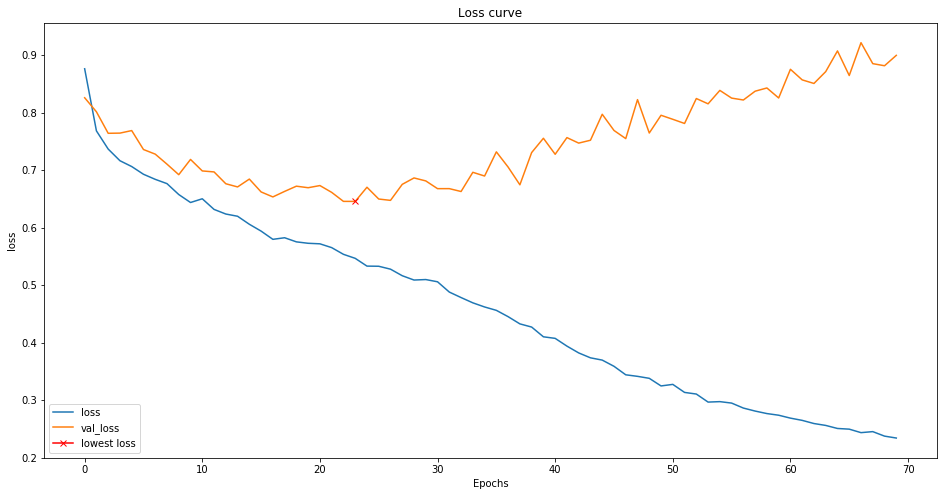

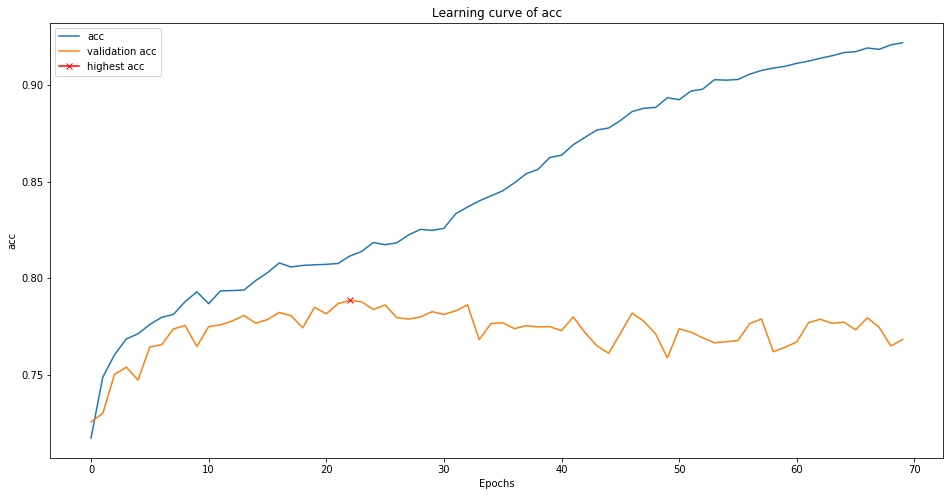

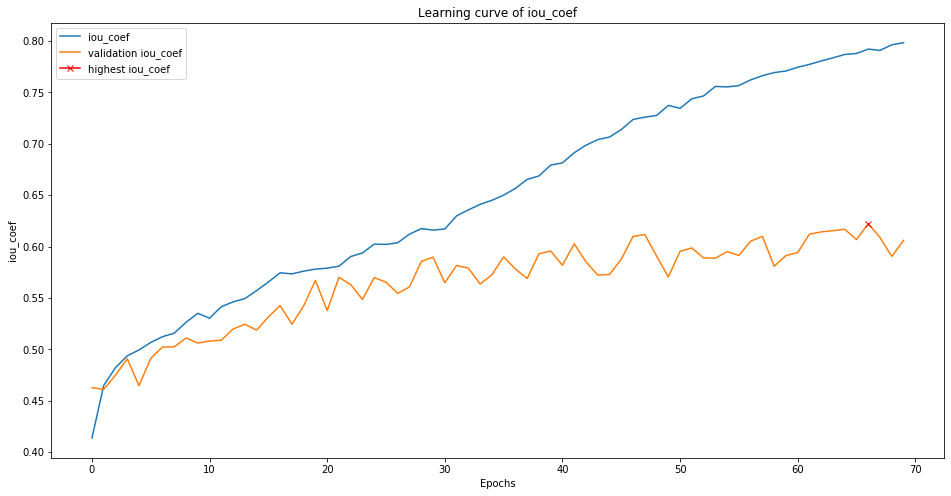

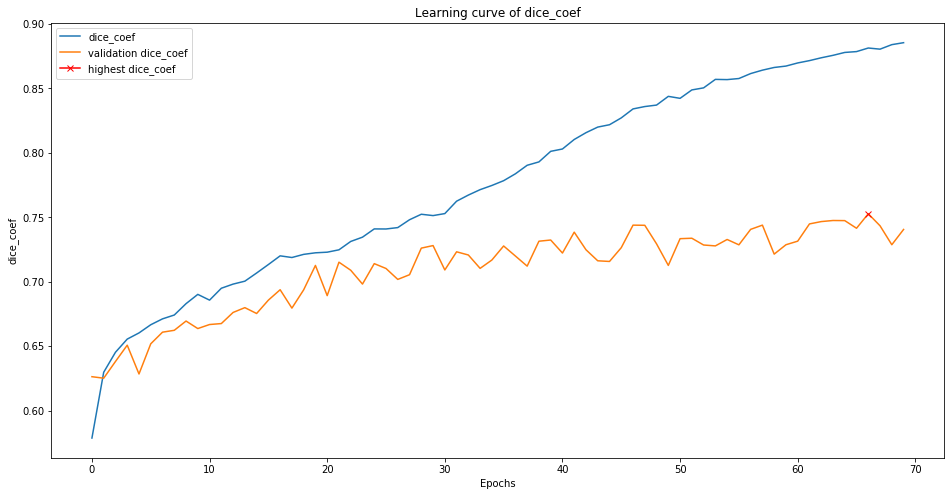

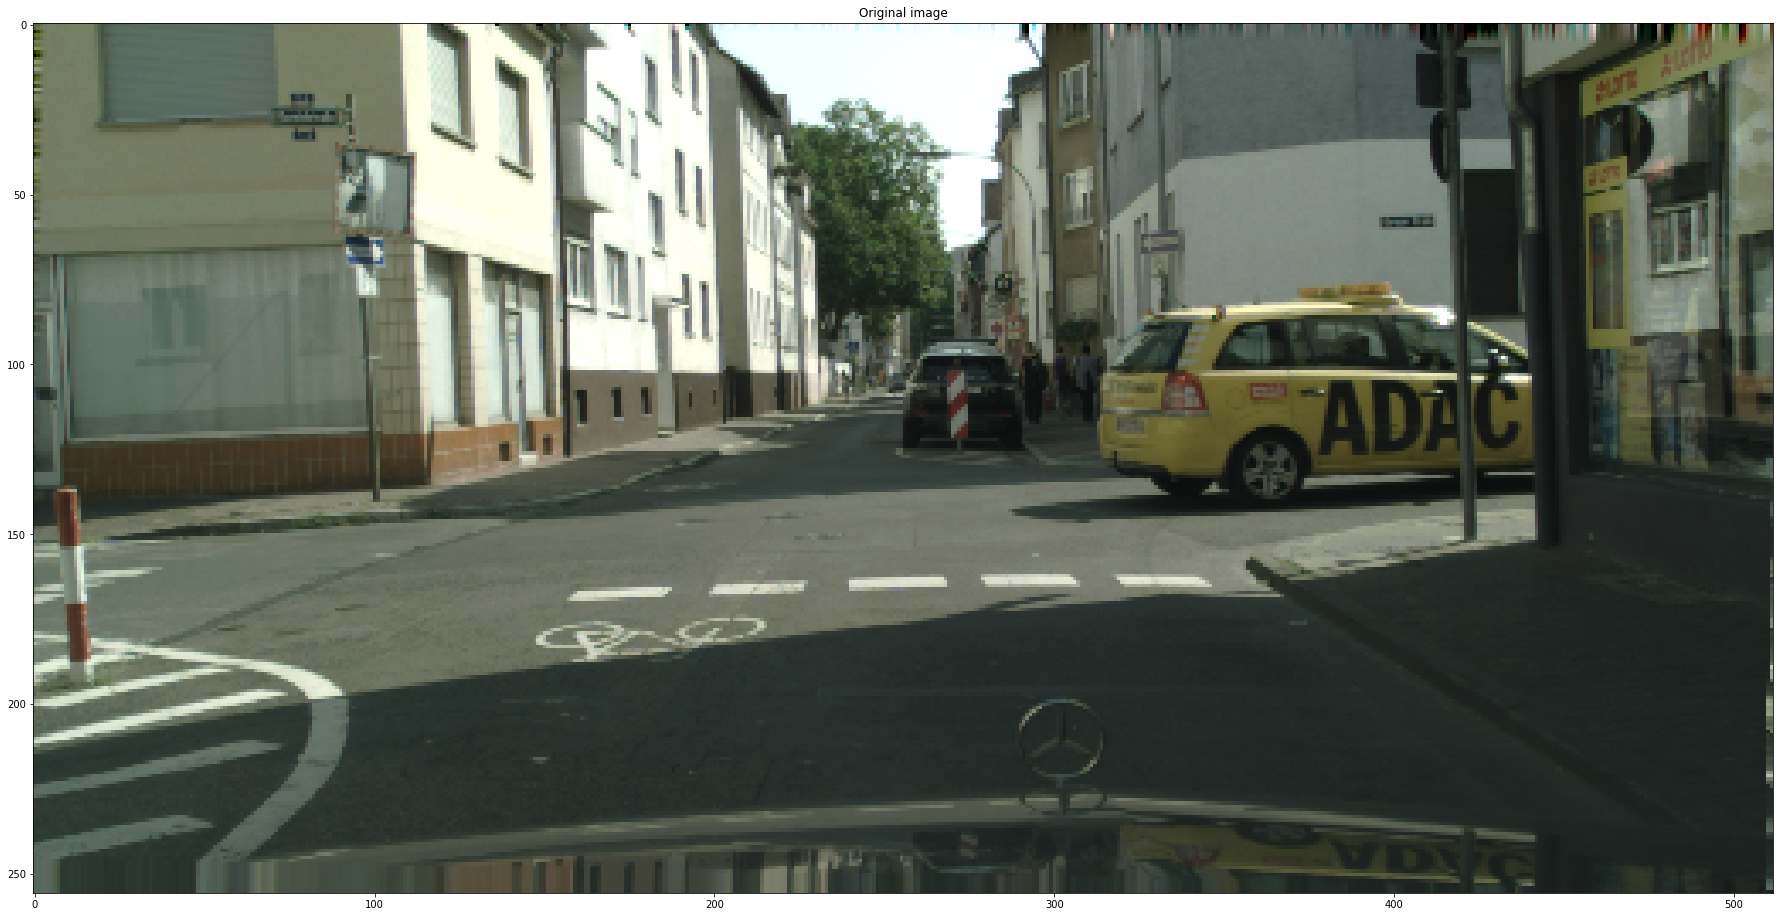

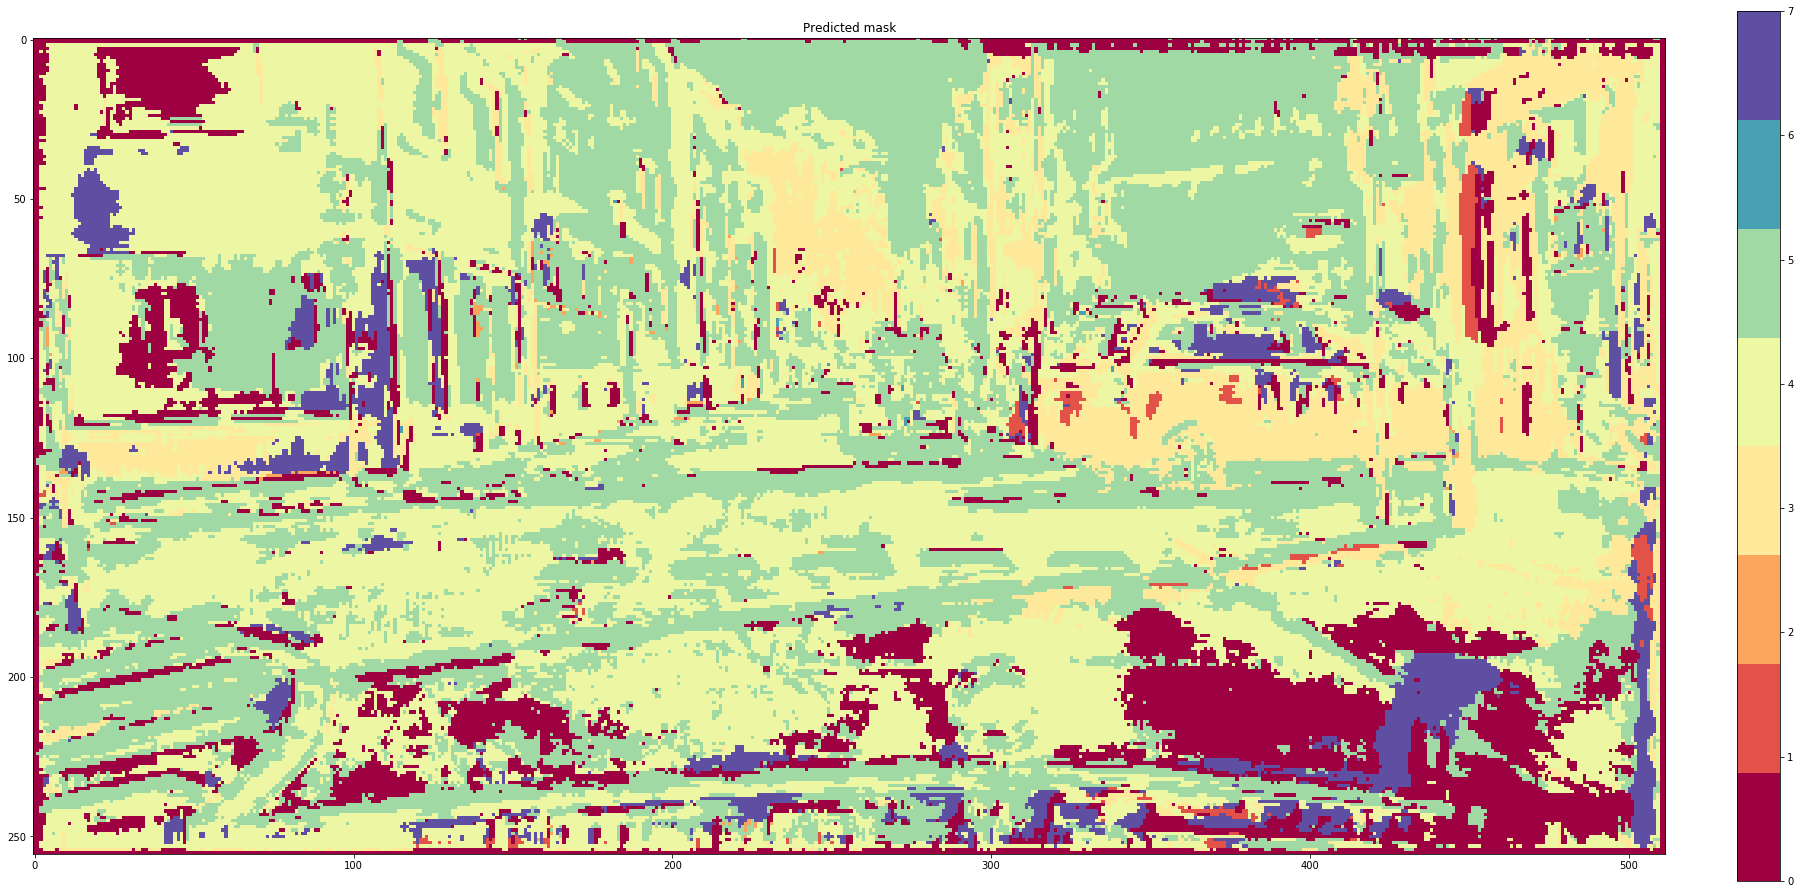

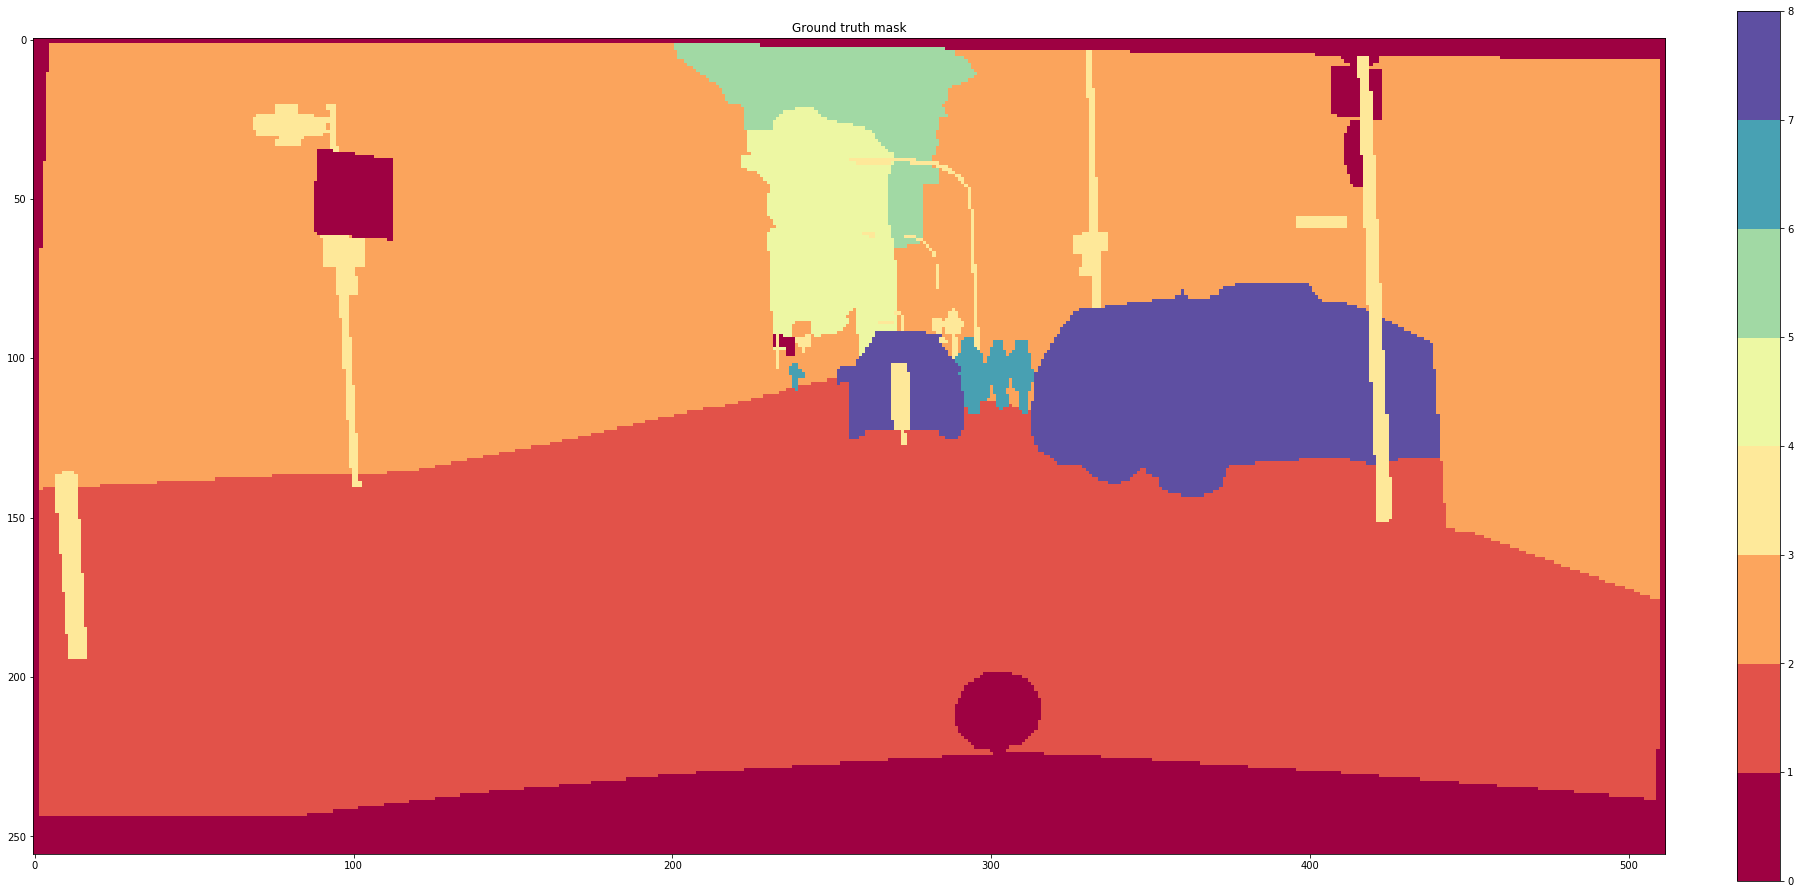

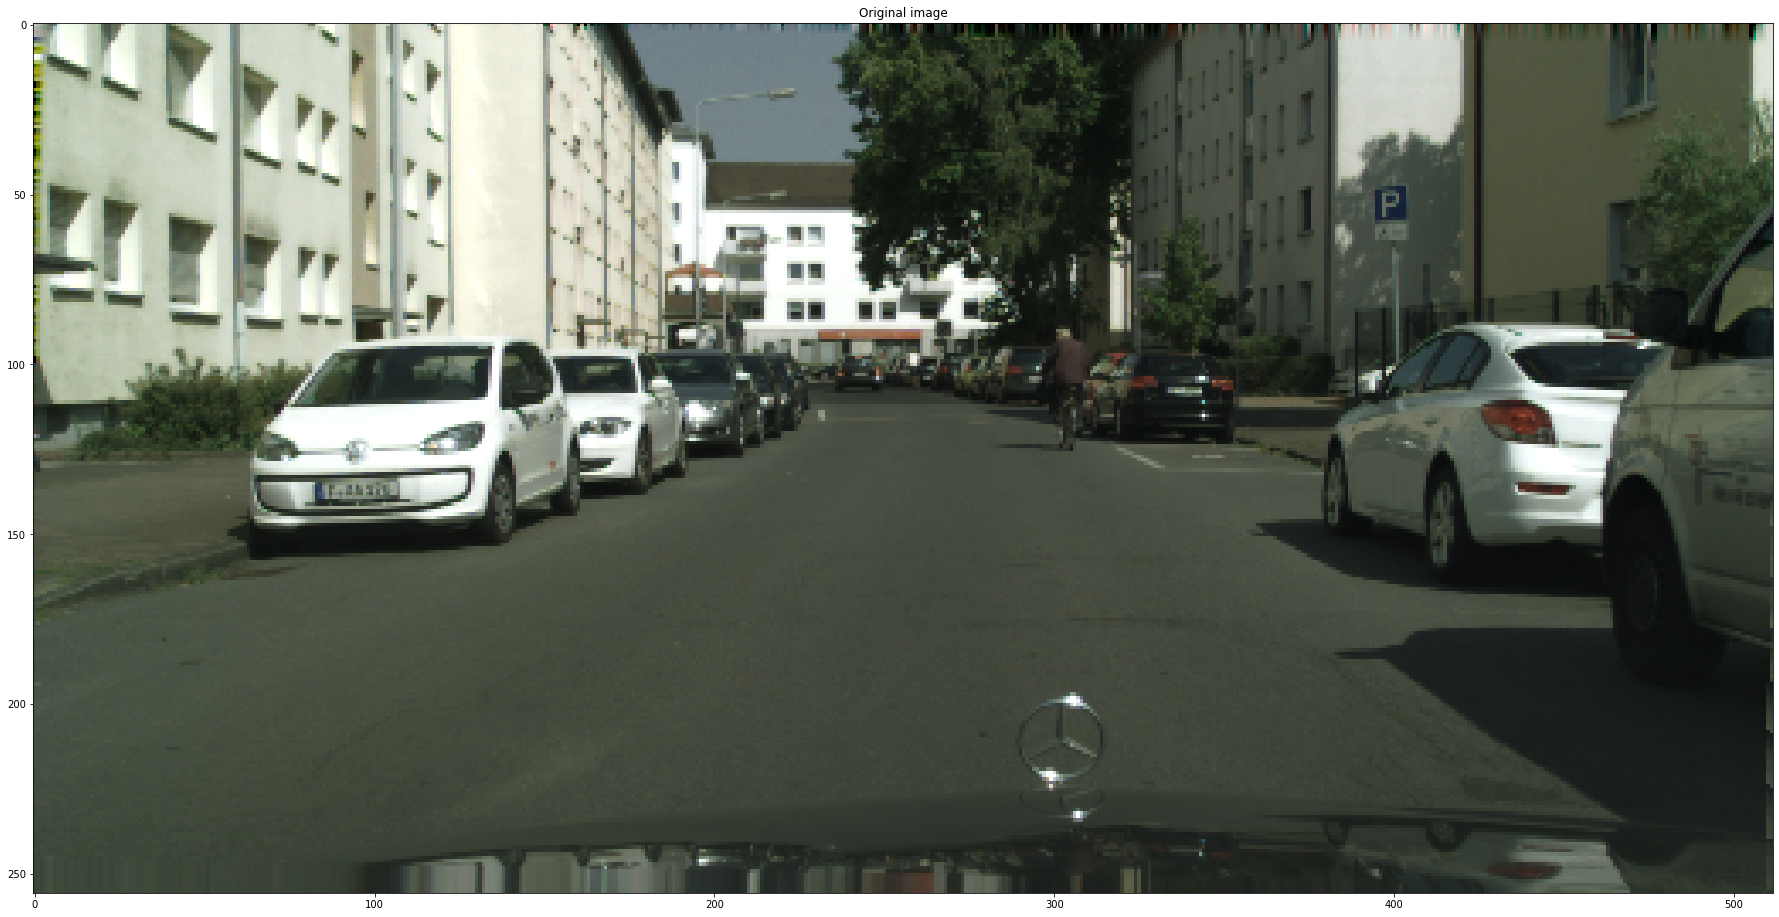

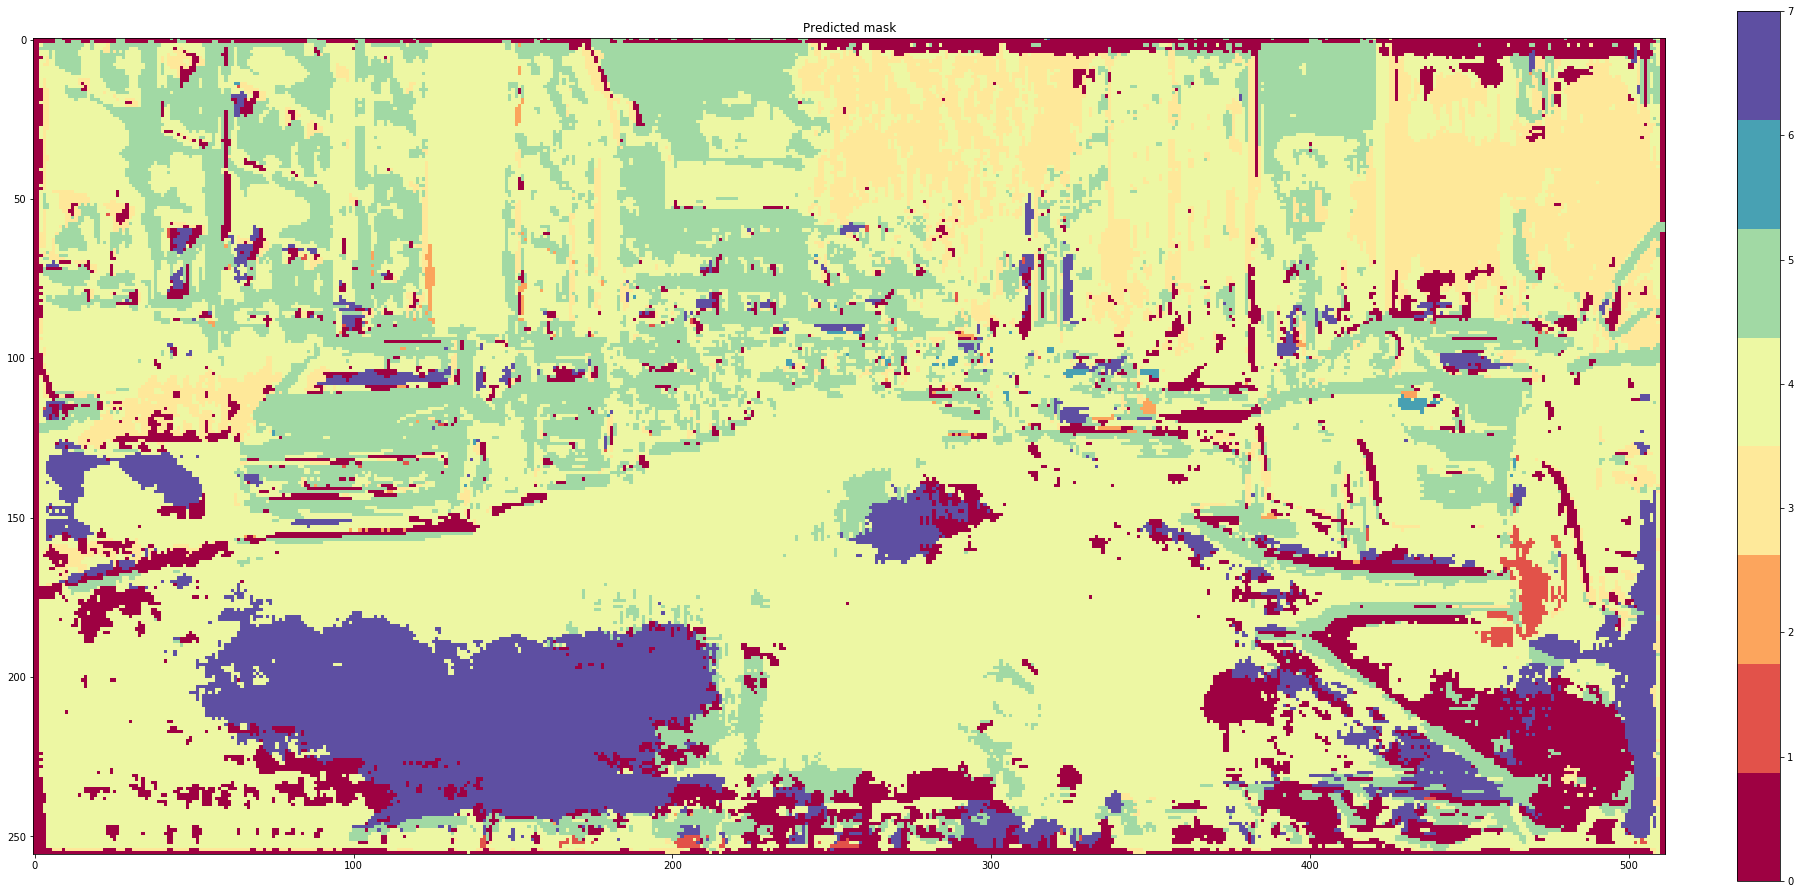

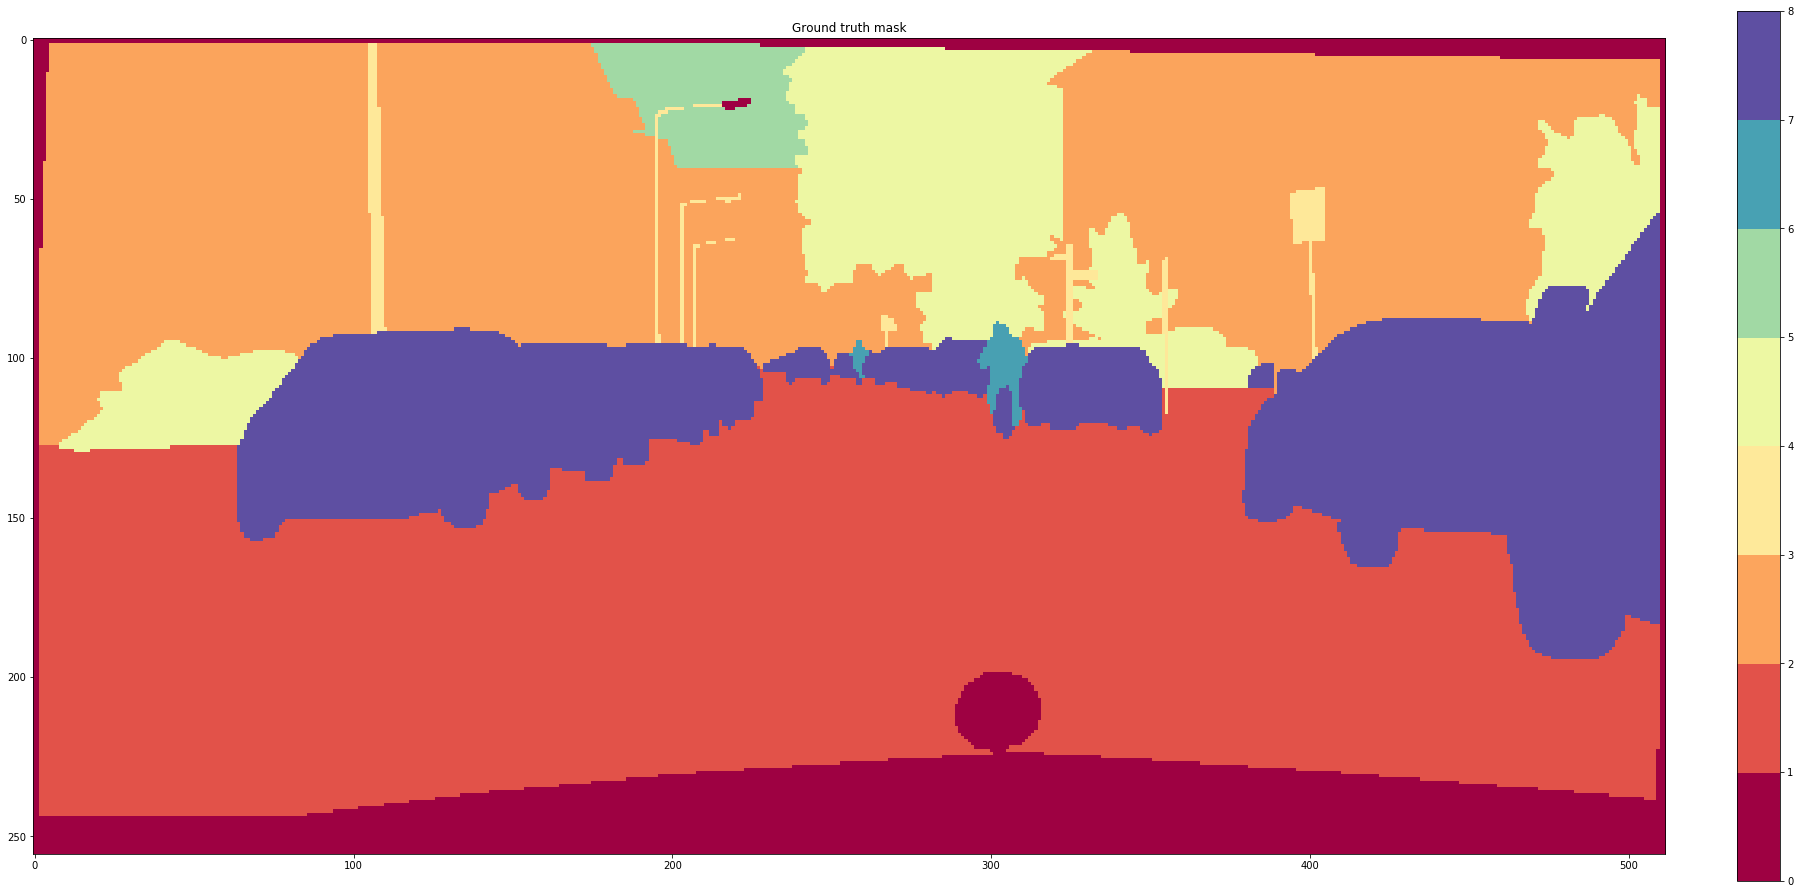

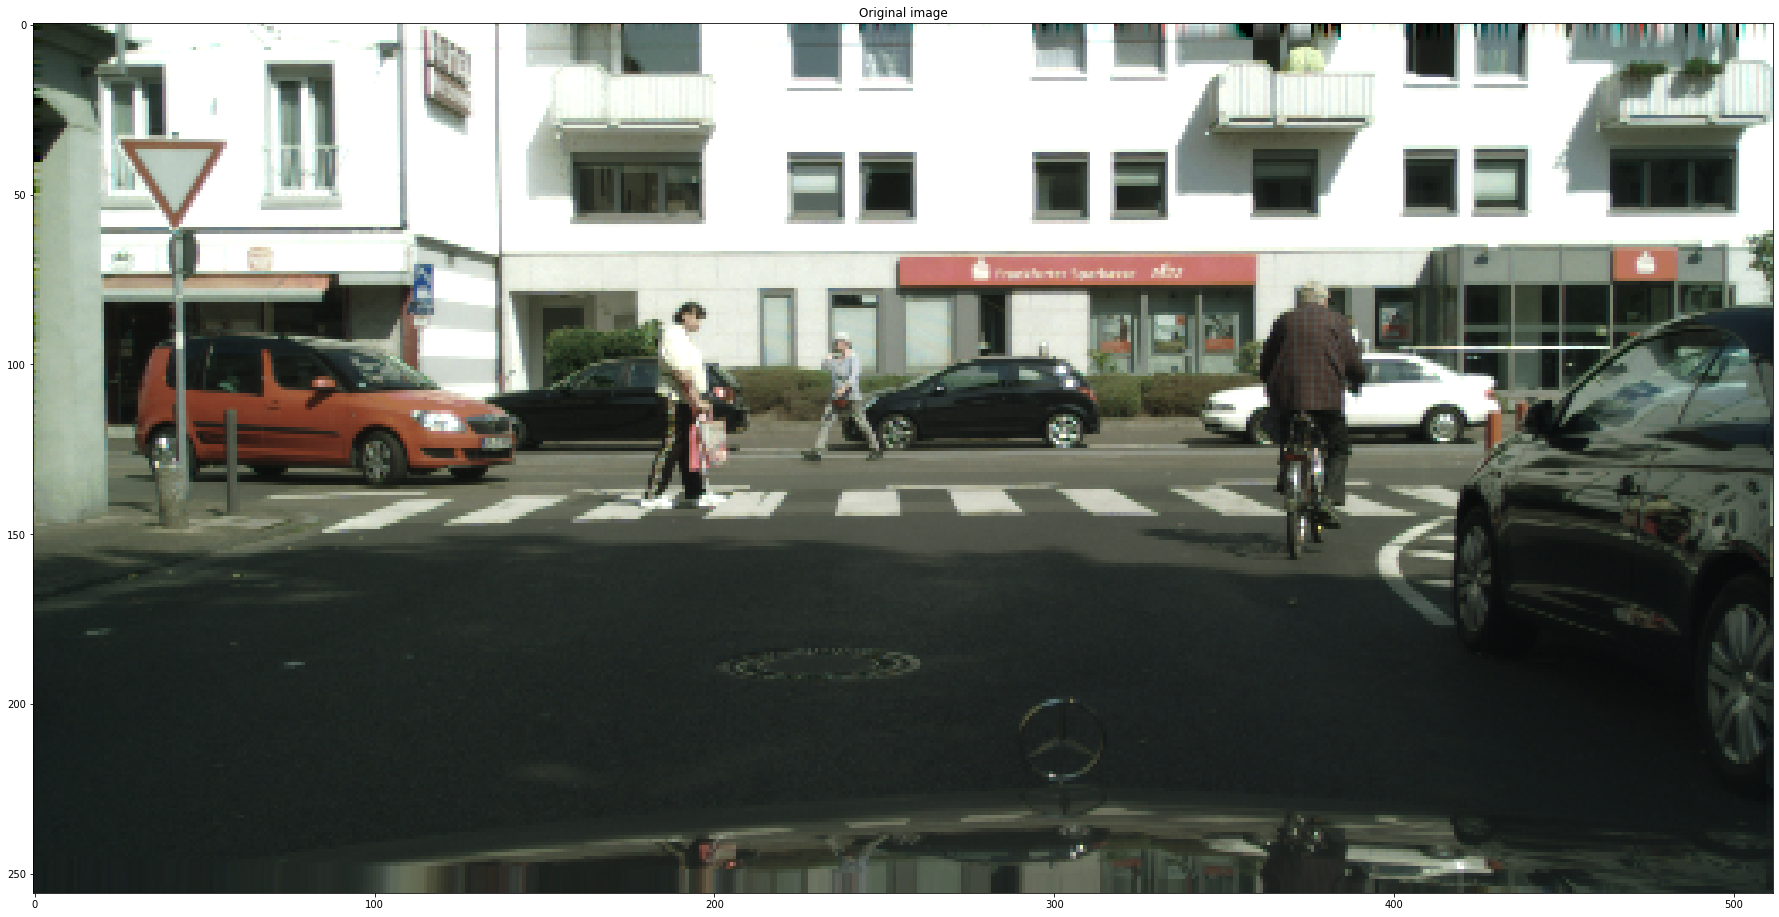

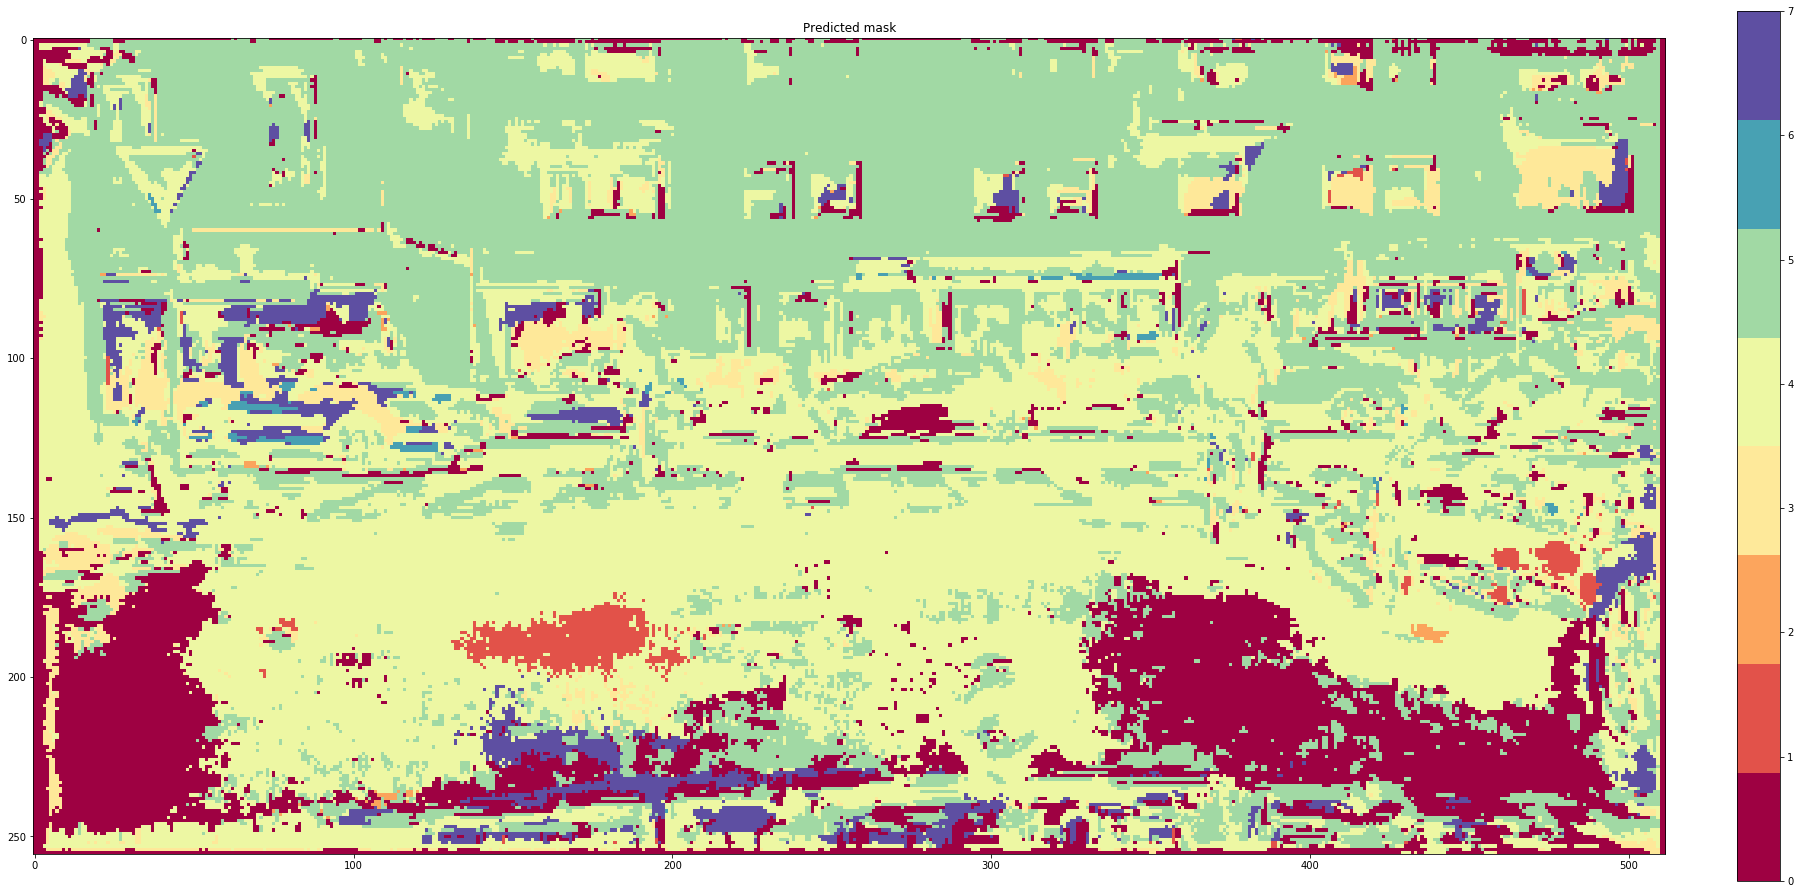

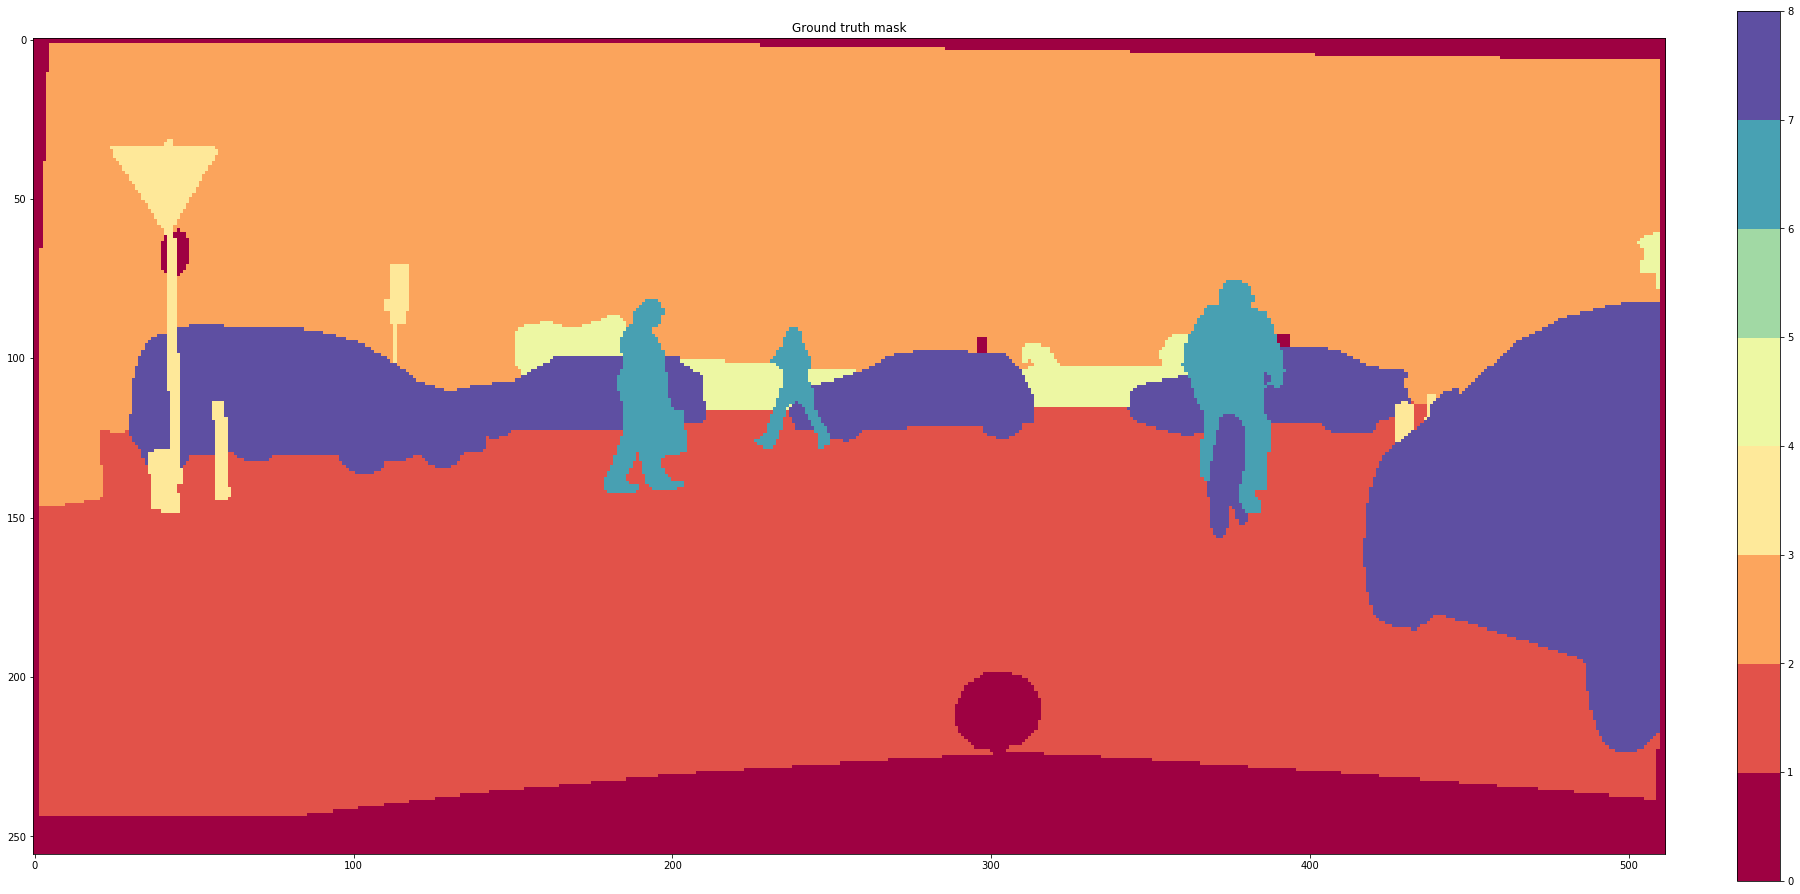

In [5]:
# save few predictions to the folder
str_folder = str(trainparam.outfolder)
# plot loss and other metrics
plot_loss(fit_out,  str_folder)
plot_metric(trainparam.metrics, fit_out, str_folder)
# plot predictions
plot_predict_and_gt(trainunet.model, valset.X, valset.Y, range(3), str_folder, trainparam.n_classes)

In [1]:
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


In [7]:
trainunet.compile()
trainunet.model.load_weights("../../output/Cityscapes/07_23_03_36_fil32_depth4_lr0.0003_scale4_batch4/weights.h5") #07_14_00_05_fil32_depth4_lr0.0003_scale4_batch4/weights.h5")

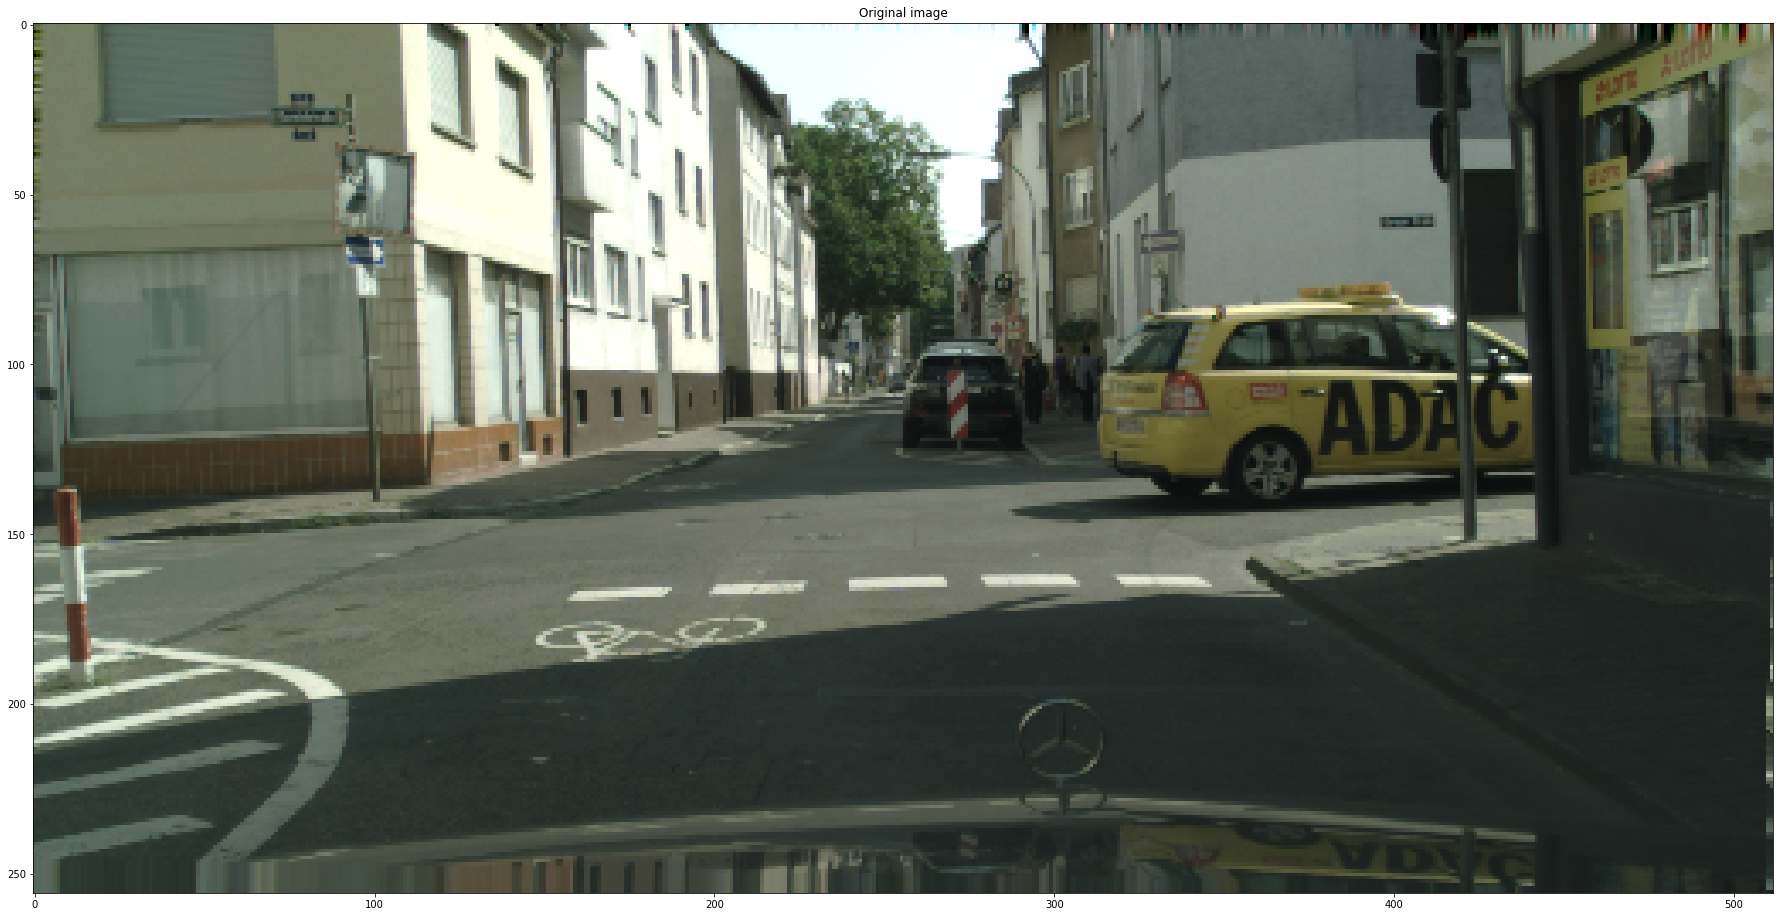

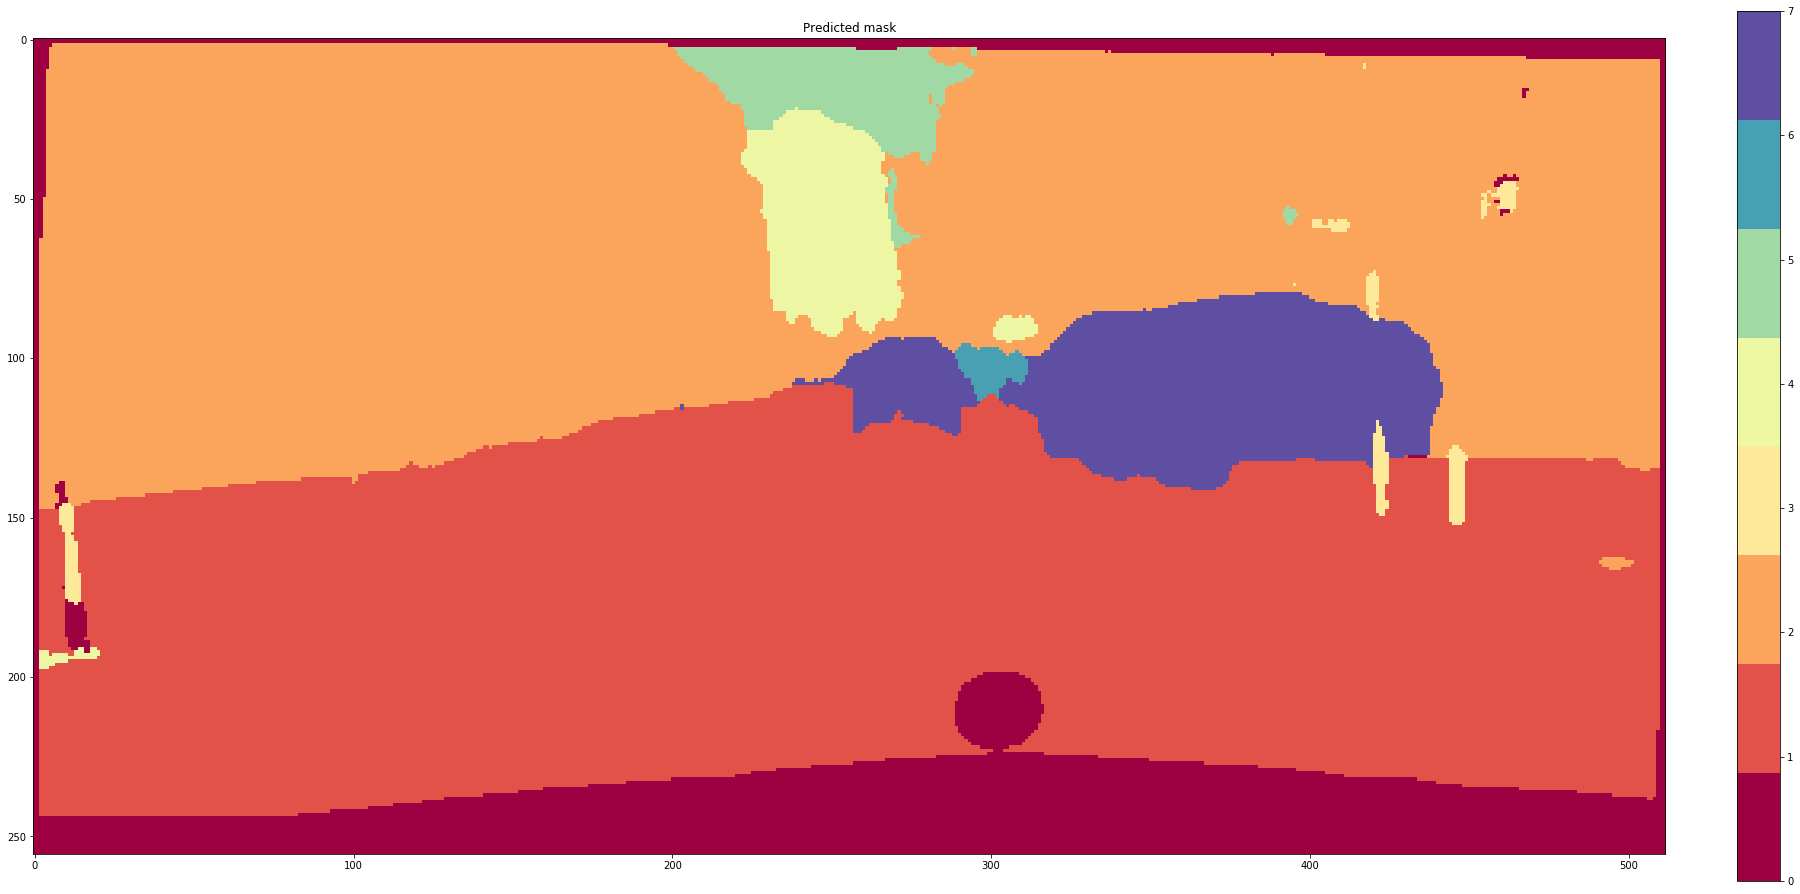

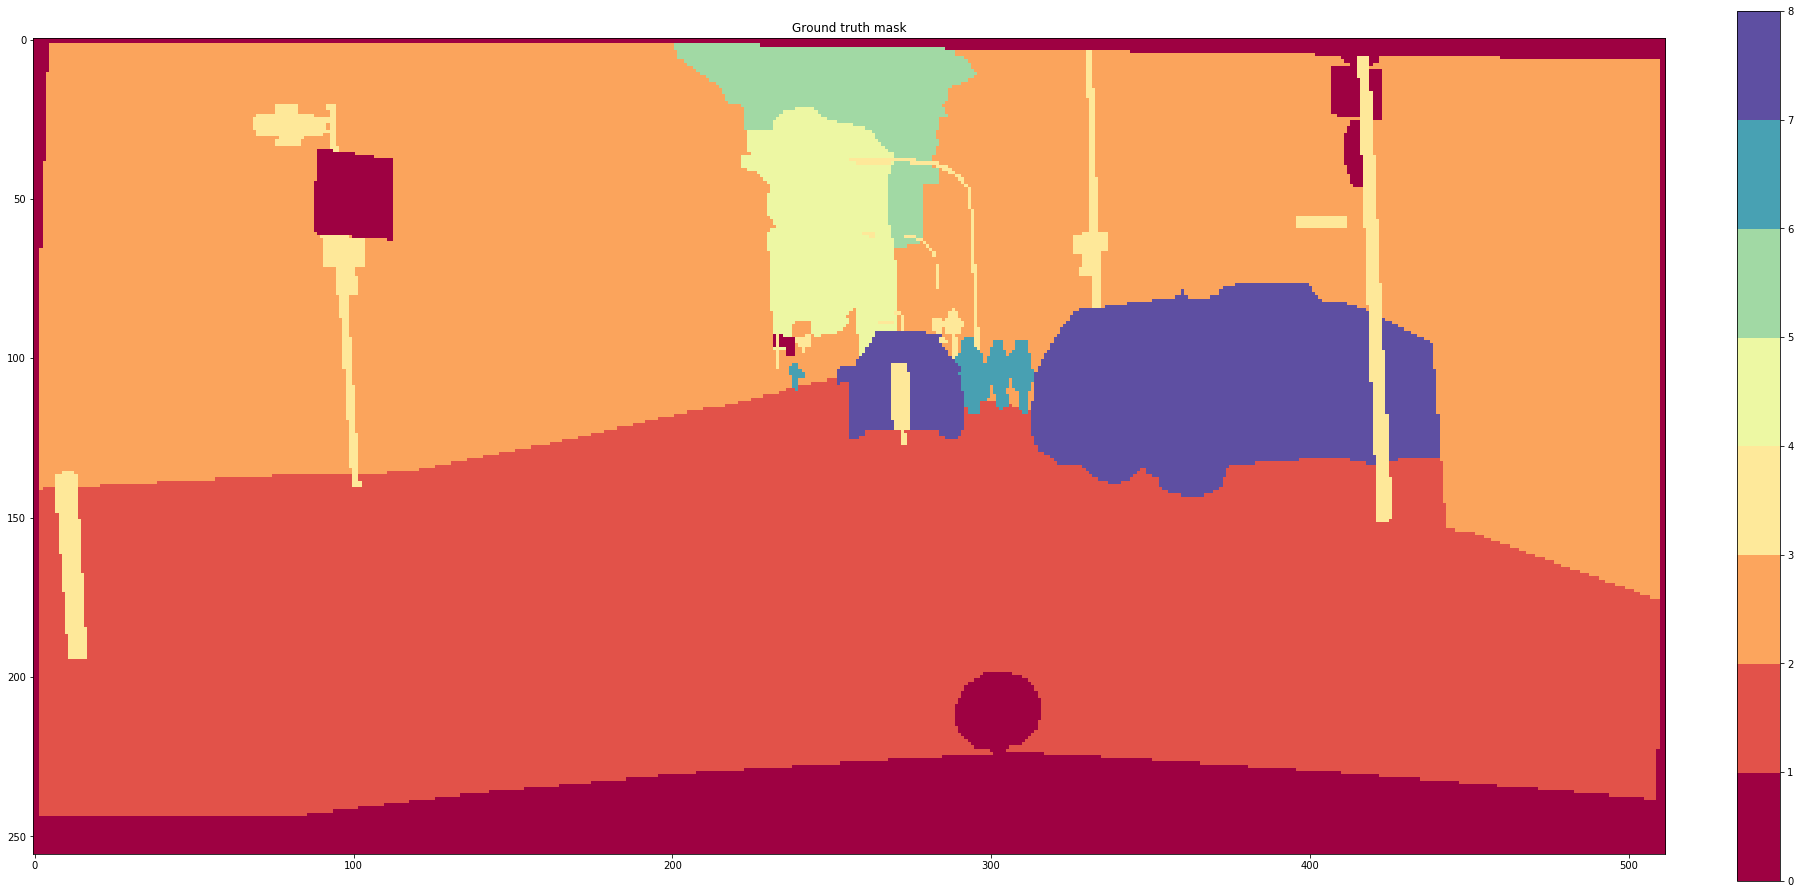

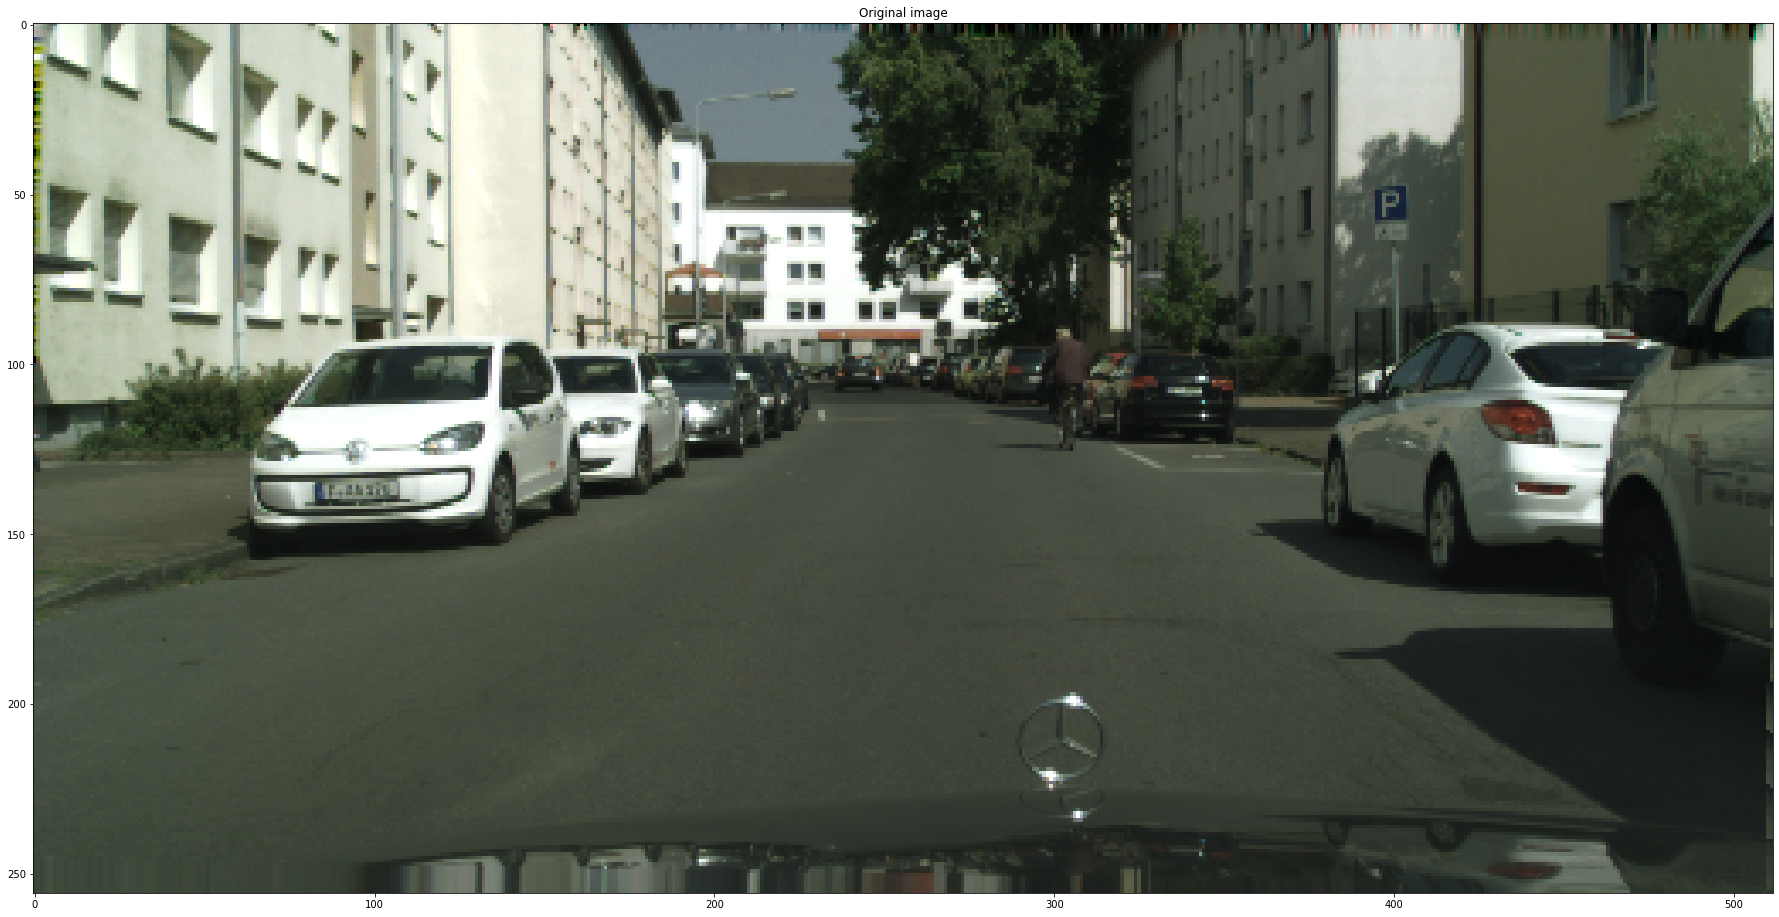

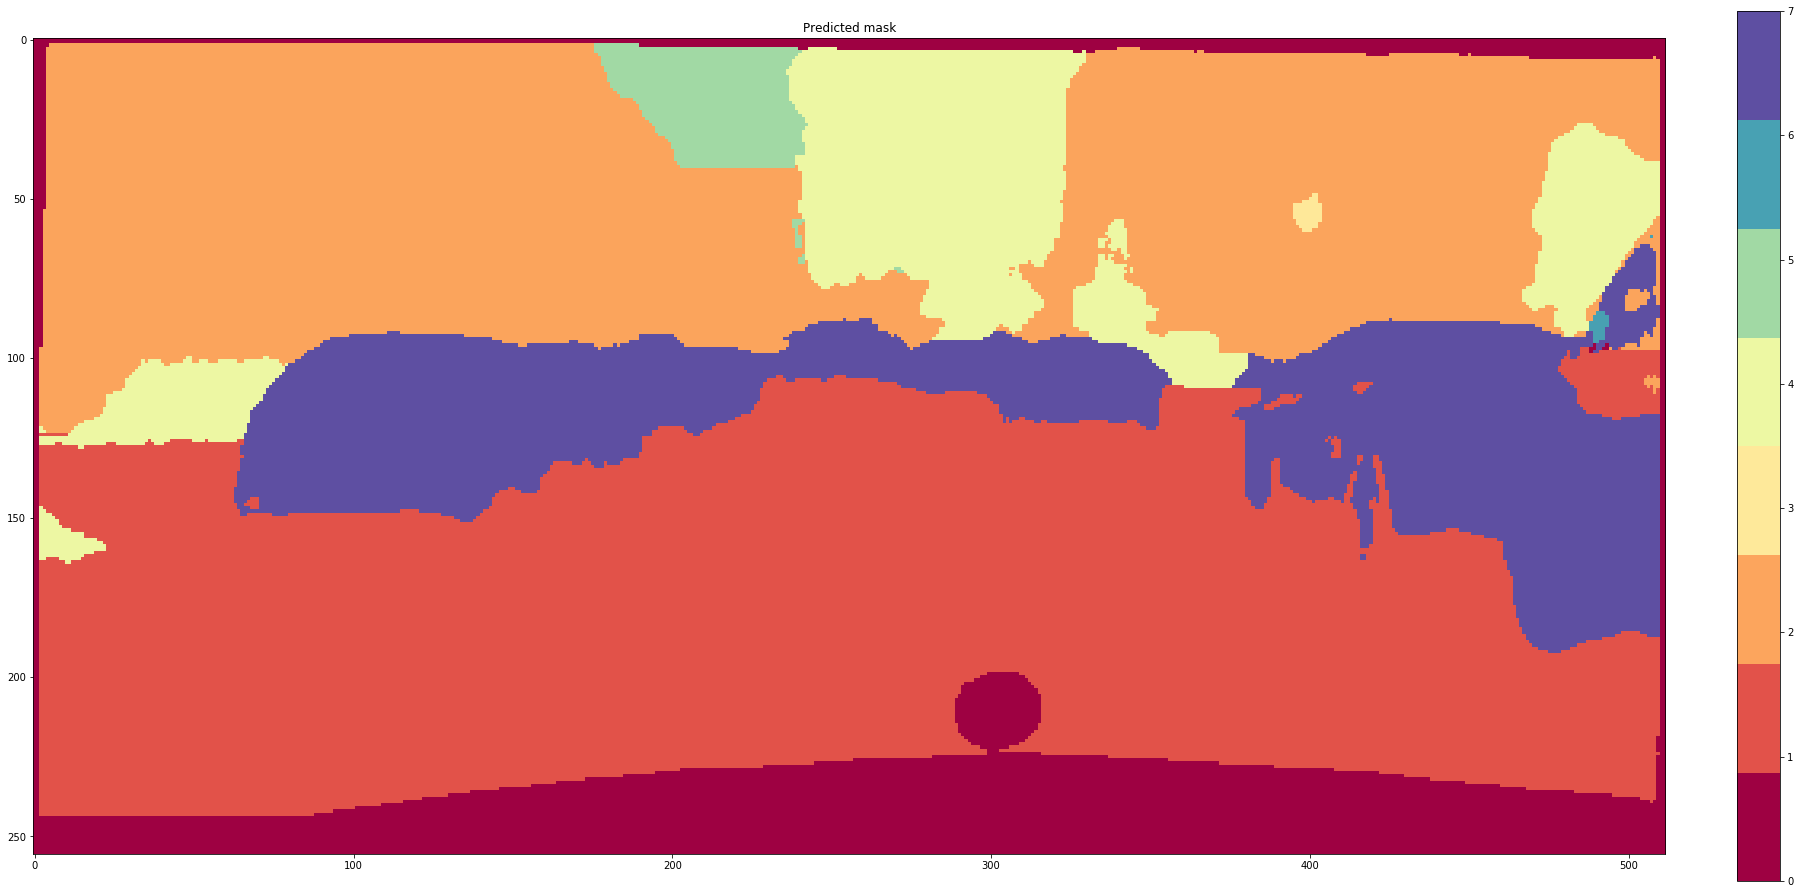

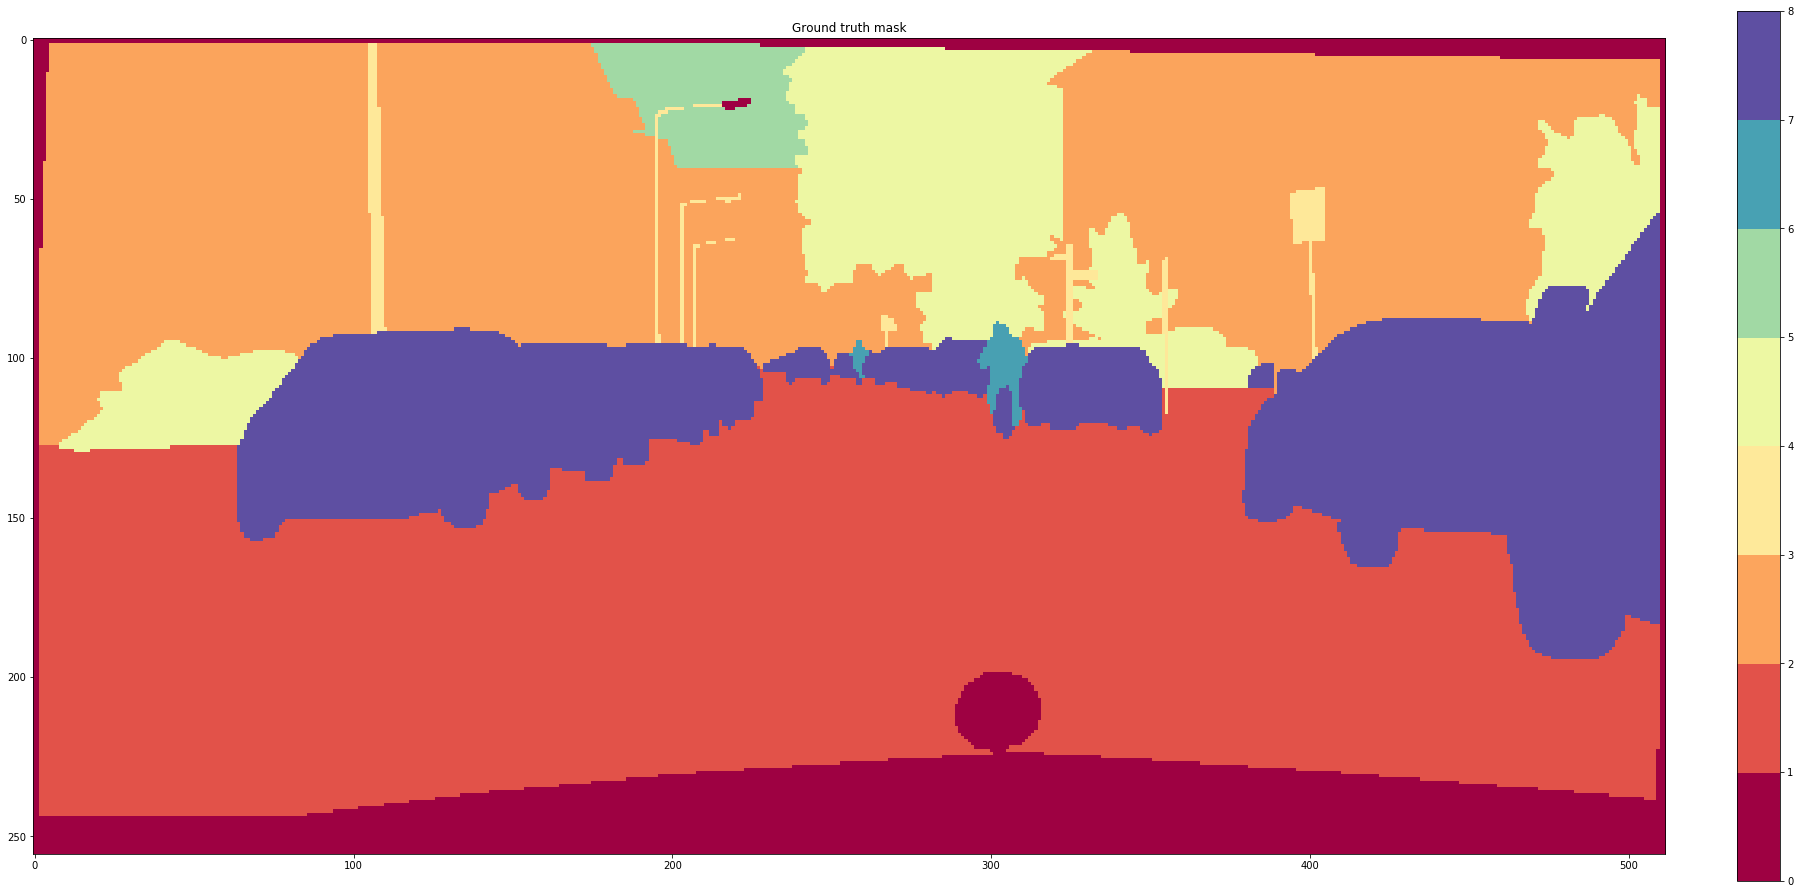

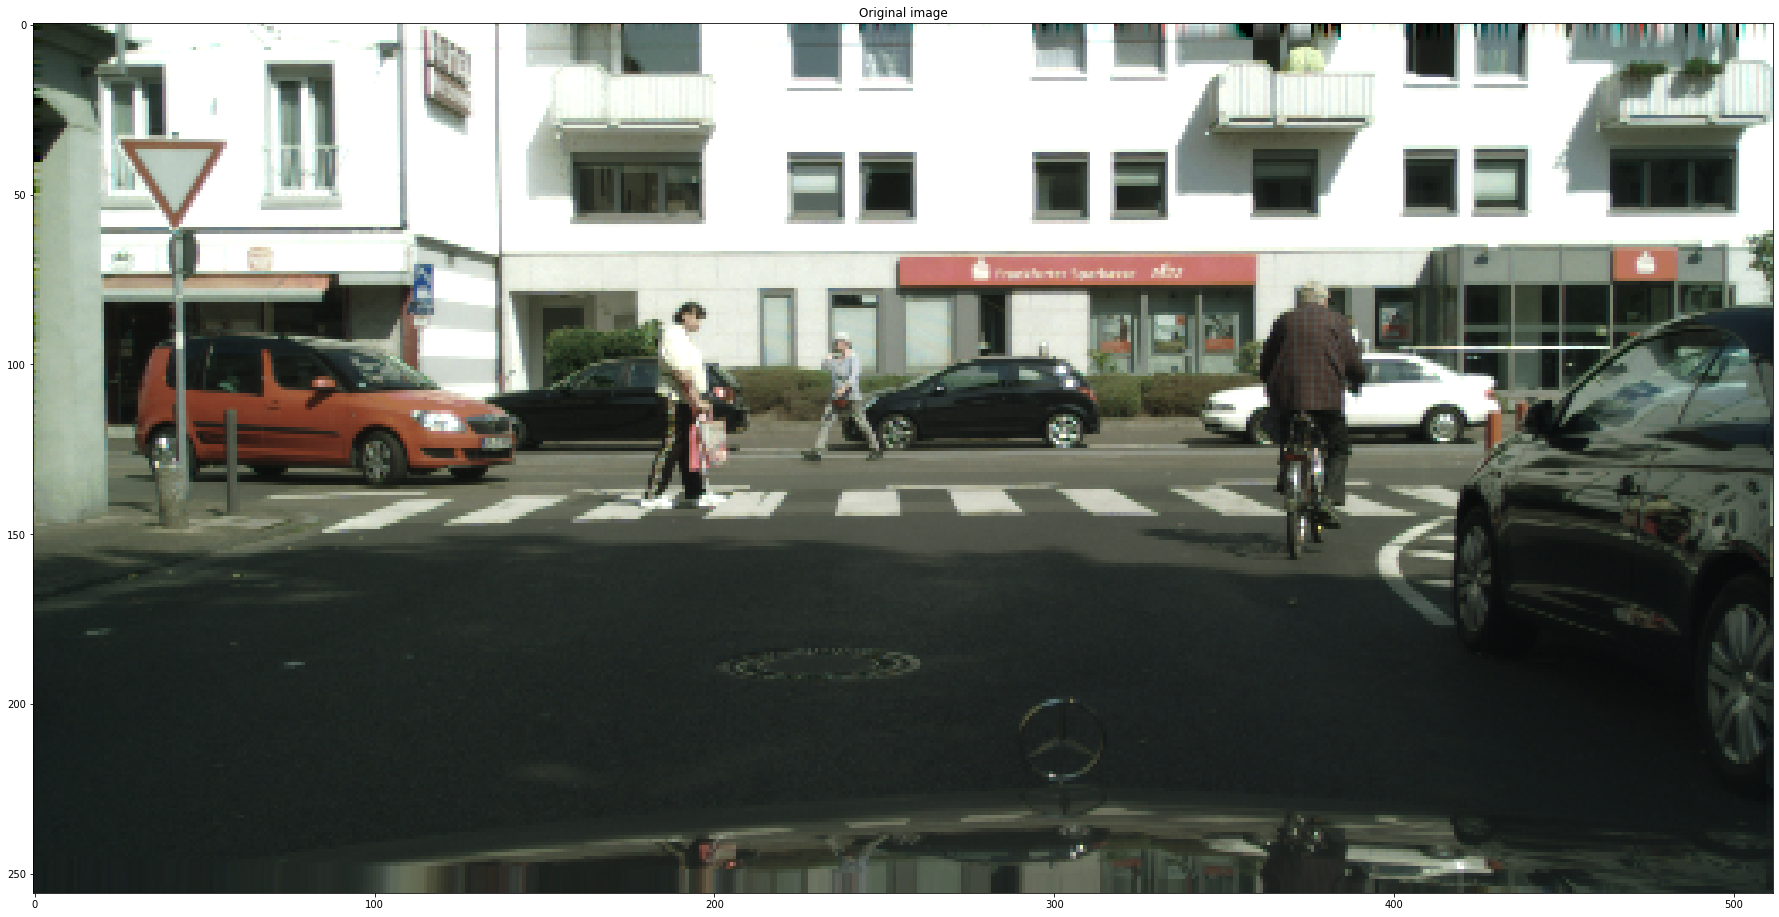

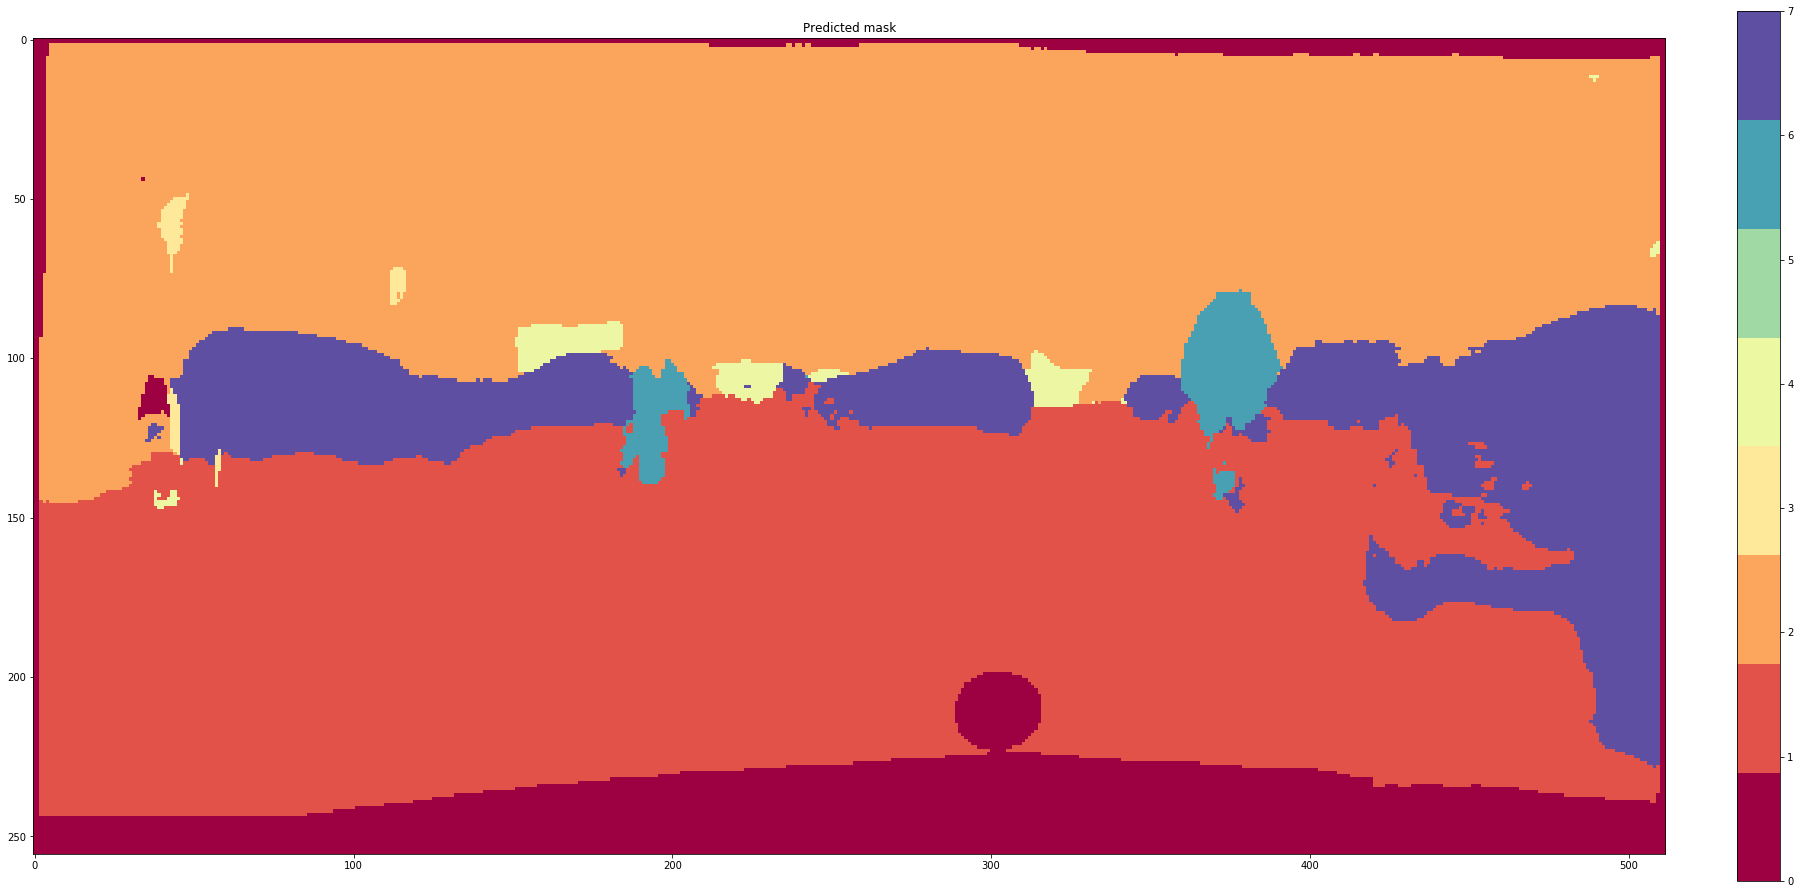

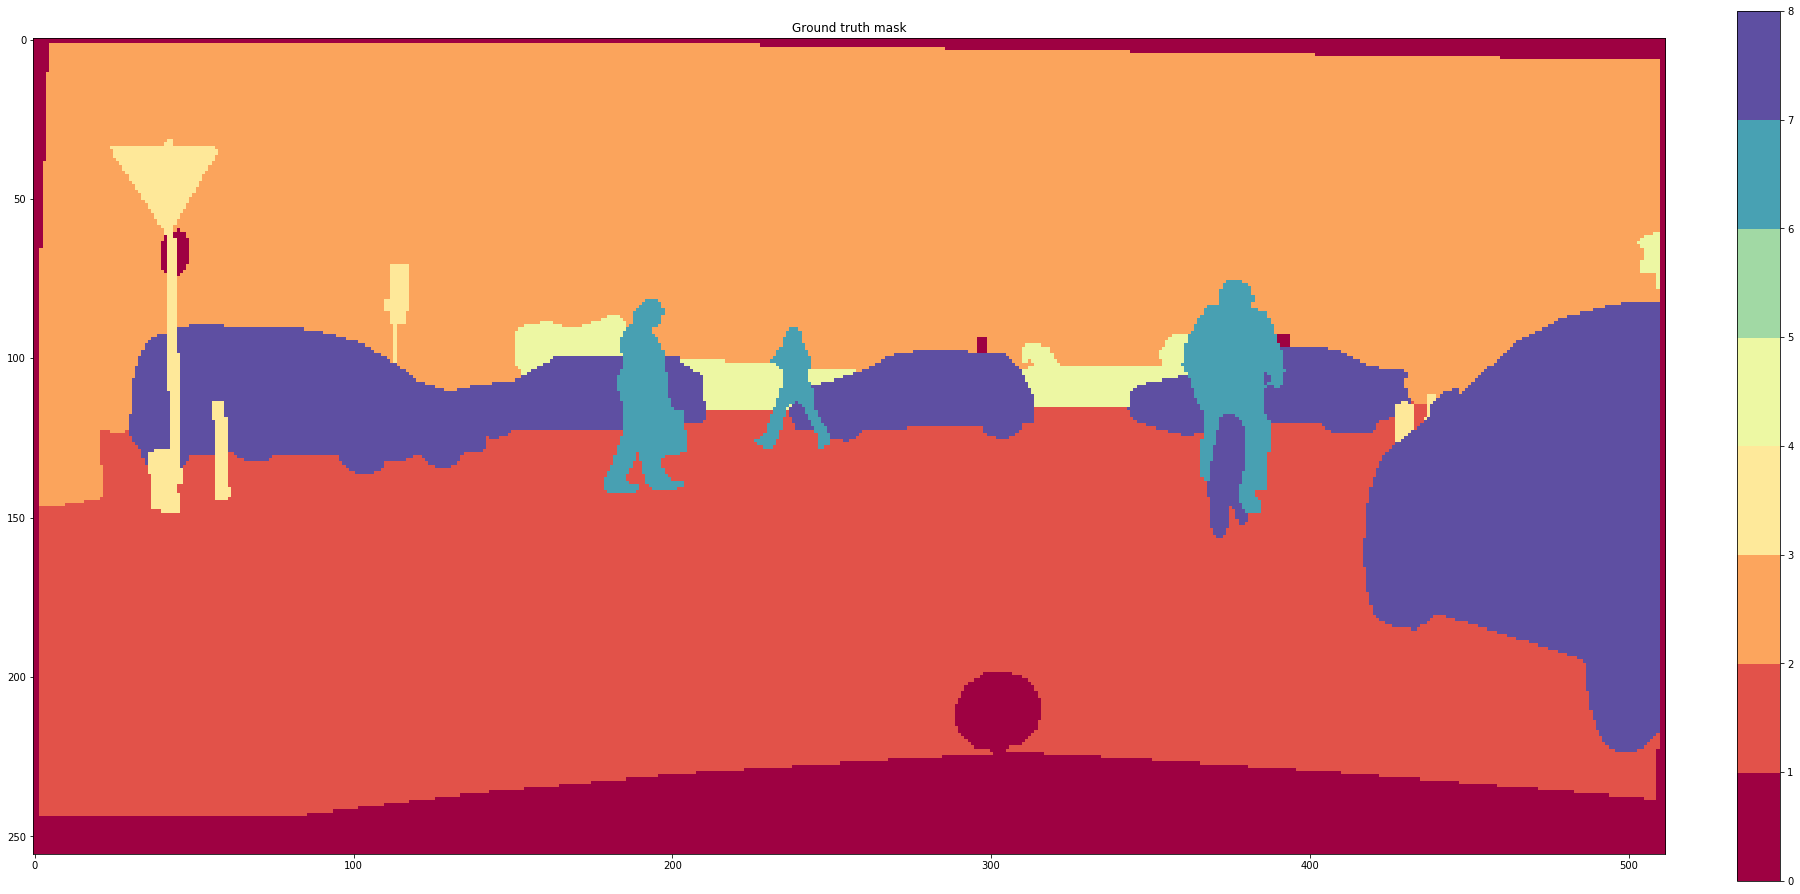

In [8]:
str_folder = "../../output/Cityscapes/07_23_03_36_fil32_depth4_lr0.0003_scale4_batch4" #str(trainparam.outfolder) #"07_23_03_36_fil32_depth4_lr0.0003_scale4_batch4"
plot_predict_and_gt(trainunet.model, valset.X, valset.Y, range(3), str_folder, trainparam.n_classes)

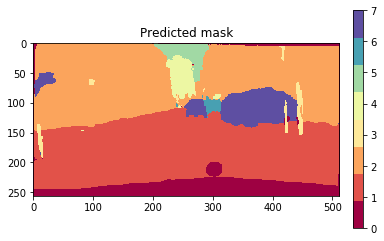

In [13]:
import numpy as np
ind = 0
plt.title('Predicted mask')
cm = plt.get_cmap('Spectral', trainparam.n_classes)
pred = trainunet.model.predict(np.expand_dims(valset.X[ind]/255., 0))
pred_int = np.argmax(pred, axis=-1)[0, ...]
plt.imshow(pred_int, vmin=0, vmax=trainparam.n_classes-1, cmap=cm)
plt.colorbar(fraction=0.046, pad=0.04, cmap=cm)